**INSTALLATION**

In [1]:
!git clone --recurse-submodules https://github.com/safednn-nasa/ProphecyPlus

fatal: destination path 'ProphecyPlus' already exists and is not an empty directory.


In [2]:
%cd ./ProphecyPlus
!pwd
!ls -lt dataset_models/mnist/

/content/ProphecyPlus
/content/ProphecyPlus
total 15096
-rw-r--r-- 1 root root   940648 Jan  1 02:10 mnist_cnn.h5
-rw-r--r-- 1 root root       38 Jan  1 02:10 readme.txt
-rw-r--r-- 1 root root 14250974 Jan  1 02:10 mnist.zip
-rw-r--r-- 1 root root   237800 Jan  1 02:10 cnn_max_mnist2.h5
-rw-r--r-- 1 root root    12850 Jan  1 02:10 inp_arr_acts.csv


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.1 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing 

**LOAD MODEL AND DATA**

In [3]:
import numpy as np
import tensorflow as tf
import time
import keras


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))


np.save('./x_train_npy.npy', x_train)
np.save('./x_test_npy.npy', x_test)
np.save('./y_train_npy.npy', y_train)
np.save('./y_test_npy.npy', y_test)


!wget https://raw.githubusercontent.com/safednn-nasa/ProphecyPlus/master/dataset_models/mnist/cnn_max_mnist2.h5 -O ./cnn_max_mnist2.h5

#!wget https://raw.githubusercontent.com/safednn-nasa/ProphecyPlus/master/mnist/mnist_cnn.h5 -O ./mnist_cnn.h5

print('Loading the model:')
model=tf.keras.models.load_model('cnn_max_mnist2.h5')
print("Printing summary of the model:")
model.summary()

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)
--2025-01-01 02:12:13--  https://raw.githubusercontent.com/safednn-nasa/ProphecyPlus/master/dataset_models/mnist/cnn_max_mnist2.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237800 (232K) [application/octet-stream]
Saving to: ‘./cnn_max_mnist2.h5’

./cnn_max_mnist2.h5 100%[===================>] 232.23K  --.-KB/s    in 0.04s   

2025-01-01 02:12:13 (6.42 MB/s) - ‘./cnn_max_mnist2.h5’ saved [237800/237800]

Loading the model:
Printing summary of the model:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          

**INVOKE PROPHECY TO EXTRACT RULES**

In [15]:
!python -m prophecy.main -m ./'cnn_max_mnist2.h5' -wd '/content/ProphecyPlus/results/mnist/rules_all/' analyze -h

usage: main.py analyze [-h] -tx TRAIN_FEATURES -ty TRAIN_LABELS -vx VAL_FEATURES -vy VAL_LABELS
                       [-odl] [-oal] [-sr] [-b] [-c] [-rs RANDOM_STATE] [-type TYPE]
                       [-inptype INPTYPE] [-acts ACTS] [-layer_name LAYER_NAME] [-top TOP]

options:
  -h, --help            show this help message and exit
  -tx TRAIN_FEATURES, --train_features TRAIN_FEATURES
                        Train features
  -ty TRAIN_LABELS, --train_labels TRAIN_LABELS
                        Train labels
  -vx VAL_FEATURES, --val_features VAL_FEATURES
                        Validation features
  -vy VAL_LABELS, --val_labels VAL_LABELS
                        Validation labels
  -odl, --only-dense-layers
                        Consider only dense layers
  -oal, --only-activation-layers
                        Include the activation layers associated to the dense layers
  -sr, --skip-rules     Skip rules extraction
  -b, --balance         Balance classes in the dataset for traini

**PARAMETERS: rules per label (model output), rules in terms of neuron values, all rules, all dense and activation layers.**

In [16]:
import os
import shutil
if os.path.exists('/results/mnist/rules/'):
  shutil.rmtree('/results/mnist/rules/')

os.makedirs('/results/mnist/rules/')

!pwd

!python -m prophecy.main -m ./'cnn_max_mnist2.h5' -wd '/content/ProphecyPlus/results/mnist/rules/' analyze -tx ./x_train_npy.npy -ty ./y_train_npy.npy -vx ./x_test_npy.npy -vy ./y_test_npy.npy -odl -oal -type 0

/content/ProphecyPlus/ProphecyPlus
CONFIG PARAMS: LAYER NAME: None ,TYPE: 0 ,INP TYPE: 0 ,ACTS: False ,Top/All: False
Dense layers and associated activation layers are considered for fingerprinting
Layers to be considered for fingerprinting: ['dense_14', 'dense_15']
469/469 [==============================] - 4s 9ms/step
Evaluating train set: 100% 60000/60000 [00:00<00:00, 467997.63it/s]
TRAIN: Label 0: 5897, Label 1: 6722, Label 2: 5889, Label 3: 6211, Label 4: 5832, Label 5: 5496, Label 6: 5833, Label 7: 6159, Label 8: 5748, Label 9: 6213, 
TRAIN LABELS: (60000,)
TRAIN ACCURACY: 100.0
TRAIN LABELS COUNT: {0: 5897, 1: 6722, 2: 5889, 3: 6211, 4: 5832, 5: 5496, 6: 5833, 7: 6159, 8: 5748, 9: 6213}
Invoking Dec-tree classifier based on FEATURES

Fingerprinting TRAIN data after dense_14 layer
Processing dense_14: 100% 235/235 [00:01<00:00, 124.02it/s]
Fingerprint after dense_14. ((60000, 32) inputs, (60000, 32) neurons)

Fingerprinting TRAIN data after dense_15 layer
Processing dense_15: 10

**Printing extracted rules**

In [17]:
import pandas as pd
_output_path = "/content/ProphecyPlus/results/mnist/rules/ruleset.csv"


print("****** RULES ********")
df_op = pd.read_csv(_output_path)
df_op

#print("****** dense_15 RULES ********")
#filter_df = df_op[df_op['layer'] == 'dense_15']
#filter_df

****** RULES ********


layer  layer_count  \
0     dense_14            1   
1     dense_14            1   
2     dense_14            1   
3     dense_14            1   
4     dense_14            1   
...        ...          ...   
1949  dense_15            2   
1950  dense_15            2   
1951  dense_15            2   
1952  dense_15            2   
1953  dense_15            2   

                                                neurons  \
0     [16, 2, 14, 12, 17, 0, 6, 11, 18, 0, 20, 5, 1,...   
1             [16, 1, 6, 25, 12, 15, 31, 14, 19, 27, 6]   
2                [16, 1, 20, 11, 30, 12, 17, 23, 9, 27]   
3     [16, 2, 14, 12, 17, 0, 6, 11, 18, 0, 1, 17, 31...   
4     [16, 2, 14, 12, 17, 0, 6, 11, 18, 0, 20, 5, 1,...   
...                                                 ...   
1949  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 8, 9, 5, 3, 4, ...   
1950   [1, 7, 0, 6, 3, 2, 8, 4, 3, 9, 8, 2, 4, 3, 2, 6]   
1951                                 [1, 7, 2, 9, 3, 5]   
1952                              [1, 7, 2, 7, 5, 5, 5]   
1953                                       [1, 2, 1, 3]   

                                              signature  support  label  \
0     ['<=', 1076.4263305664062, '<=', 443.640563964...     3941      2   
1     ['>', 1076.4263305664062, '>', 1318.0906982421...      694      2   
2     ['>', 1076.4263305664062, '<=', 1318.090698242...      134      2   
3     ['<=', 1076.4263305664062, '<=', 443.640563964...       87      2   
4     ['<=', 1076.4263305664062, '<=', 443.640563964...       80      2   
...                                                 ...      ...    ...   
1949  ['<=', 1210.0545043945312, '<=', 1388.89111328...        1      7   
1950  ['<=', 1210.0545043945312, '<=', 1388.89111328...        1      7   
1951  ['<=', 1210.0545043945312, '>', 1388.891113281...        1      7   
1952  ['<=', 1210.0545043945312, '>', 1388.891113281...        1      7   
1953  ['>', 1210.0545043945312, '>', 1701.8366088867...        1      7   

      train_coverage  train_precision  train_recall   train_f1  test_coverage  \
0           6.568333              100     66.921379  80.183113           7.12   
1           1.156667              100     11.784683  21.084612           1.02   
2           0.223333              100      2.275429   4.449610           0.19   
3           0.145000              100      1.477331   2.911647           0.20   
4           0.133333              100      1.358465   2.680516           0.12   
...              ...              ...           ...        ...            ...   
1949        0.001667              100      0.016236   0.032468           0.00   
1950        0.001667              100      0.016236   0.032468           0.00   
1951        0.001667              100      0.016236   0.032468           0.00   
1952        0.001667              100      0.016236   0.032468           0.00   
1953        0.001667              100      0.016236   0.032468           0.00   

      test_precision  test_recall    test_f1         f1     kind  
0          99.578652    70.059289  82.250580  81.216846  correct  
1          97.058824     9.782609  17.773788  19.429200  correct  
2         100.000000     1.877470   3.685742   4.067676  correct  
3          95.000000     1.877470   3.682171   3.296909  correct  
4          83.333333     0.988142   1.953125   2.316820  correct  
...              ...          ...        ...        ...      ...  
1949        0.000000     0.000000   0.000000   0.016234  correct  
1950        0.000000     0.000000   0.000000   0.016234  correct  
1951        0.000000     0.000000   0.000000   0.016234  correct  
1952        0.000000     0.000000   0.000000   0.016234  correct  
1953        0.000000     0.000000   0.000000   0.016234  correct  

[1954 rows x 16 columns]

In [18]:
print("****** label 5 , dense_15 RULES ********")
df_op = pd.read_csv(_output_path)
filter_df = df_op[df_op['layer'] == 'dense_15'][df_op['label'] == 5]
filter_df

****** label 5 , dense_15 RULES ********


<ipython-input-18-56bba1b76e15>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_df = df_op[df_op['layer'] == 'dense_15'][df_op['label'] == 5]


layer  layer_count  \
1653  dense_15            2   
1654  dense_15            2   
1655  dense_15            2   
1656  dense_15            2   
1657  dense_15            2   
1658  dense_15            2   
1659  dense_15            2   
1660  dense_15            2   
1661  dense_15            2   
1662  dense_15            2   
1663  dense_15            2   
1664  dense_15            2   
1665  dense_15            2   
1666  dense_15            2   
1667  dense_15            2   
1668  dense_15            2   
1669  dense_15            2   
1670  dense_15            2   
1671  dense_15            2   
1672  dense_15            2   
1673  dense_15            2   
1674  dense_15            2   
1675  dense_15            2   
1676  dense_15            2   
1677  dense_15            2   
1678  dense_15            2   
1679  dense_15            2   
1680  dense_15            2   
1681  dense_15            2   
1682  dense_15            2   
1683  dense_15            2   
1684  dense_15            2   
1685  dense_15            2   
1686  dense_15            2   
1687  dense_15            2   
1688  dense_15            2   
1689  dense_15            2   
1690  dense_15            2   
1691  dense_15            2   
1692  dense_15            2   
1693  dense_15            2   
1694  dense_15            2   
1695  dense_15            2   
1696  dense_15            2   
1697  dense_15            2   
1698  dense_15            2   
1699  dense_15            2   
1700  dense_15            2   
1701  dense_15            2   

                                                neurons  \
1653               [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 8]   
1654                  [1, 7, 0, 6, 3, 2, 4, 9, 5, 9, 9]   
1655                              [1, 7, 0, 6, 3, 5, 3]   
1656  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1657            [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 8, 5]   
1658                              [1, 7, 0, 6, 4, 5, 6]   
1659                     [1, 7, 0, 6, 4, 5, 5, 6, 8, 8]   
1660      [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 8, 9, 5, 3, 7]   
1661               [1, 7, 0, 6, 3, 2, 4, 9, 5, 9, 9, 1]   
1662                     [1, 7, 0, 6, 3, 5, 8, 2, 5, 3]   
1663      [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 5, 3, 9]   
1664                  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 5]   
1665               [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 5, 9]   
1666  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 5, 9, 7, ...   
1667                  [1, 7, 0, 6, 4, 5, 5, 6, 8, 8, 6]   
1668                     [1, 7, 0, 6, 4, 5, 5, 6, 6, 5]   
1669                        [1, 7, 0, 6, 8, 9, 2, 5, 0]   
1670  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1671  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1672  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 8, 9, 4, 3, 8, ...   
1673                        [1, 7, 0, 6, 4, 5, 6, 9, 9]   
1674   [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, 5]   
1675               [1, 7, 0, 6, 4, 5, 5, 6, 8, 8, 6, 5]   
1676                  [1, 7, 2, 9, 3, 4, 7, 3, 9, 2, 5]   
1677                     [1, 7, 2, 9, 3, 4, 7, 3, 9, 0]   
1678  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1679  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1680  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1681  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1682  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1683  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1684  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1685  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1686  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1687  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1688  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1689  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 5, 9, ...   
1690  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 1, 7, 6, ...   
1691  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 3, 5, 9, 7, ...   
1692  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 9, 4, 9, 7, ...   
1693   [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 8

**PARAMETERS: rules per label (model output), rules in terms of neuron values, TOP rules (highest train recall), all dense and activation layers.**


In [19]:
if os.path.exists('/results/mnist/rules/'):
  shutil.rmtree('/results/mnist/rules/')

os.makedirs('/results/mnist/rules/')

!pwd

!python -m prophecy.main -m ./'cnn_max_mnist2.h5' -wd '/content/ProphecyPlus/results/mnist/rules/' analyze -tx ./x_train_npy.npy -ty ./y_train_npy.npy -vx ./x_test_npy.npy -vy ./y_test_npy.npy -odl -oal -type 0 -top True

/content/ProphecyPlus/ProphecyPlus
CONFIG PARAMS: LAYER NAME: None ,TYPE: 0 ,INP TYPE: 0 ,ACTS: False ,Top/All: True
Dense layers and associated activation layers are considered for fingerprinting
Layers to be considered for fingerprinting: ['dense_14', 'dense_15']
469/469 [==============================] - 4s 9ms/step
Evaluating train set: 100% 60000/60000 [00:00<00:00, 465736.22it/s]
TRAIN: Label 0: 5897, Label 1: 6722, Label 2: 5889, Label 3: 6211, Label 4: 5832, Label 5: 5496, Label 6: 5833, Label 7: 6159, Label 8: 5748, Label 9: 6213, 
TRAIN LABELS: (60000,)
TRAIN ACCURACY: 100.0
TRAIN LABELS COUNT: {0: 5897, 1: 6722, 2: 5889, 3: 6211, 4: 5832, 5: 5496, 6: 5833, 7: 6159, 8: 5748, 9: 6213}
Invoking Dec-tree classifier based on FEATURES

Fingerprinting TRAIN data after dense_14 layer
Processing dense_14: 100% 235/235 [00:01<00:00, 126.04it/s]
Fingerprint after dense_14. ((60000, 32) inputs, (60000, 32) neurons)

Fingerprinting TRAIN data after dense_15 layer
Processing dense_15: 100

In [20]:
_output_path = "/content/ProphecyPlus/results/mnist/rules/ruleset.csv"


print("****** RULES ********")
df_op = pd.read_csv(_output_path)
df_op


****** RULES ********


layer  layer_count                                            neurons  \
0   dense_14            1  [16, 2, 14, 12, 17, 0, 6, 11, 18, 0, 20, 5, 1,...   
1   dense_14            1  [16, 2, 19, 5, 20, 23, 10, 1, 14, 3, 15, 24, 1...   
2   dense_14            1  [16, 1, 6, 25, 14, 0, 12, 9, 19, 29, 30, 3, 17...   
3   dense_14            1  [16, 1, 20, 11, 8, 15, 0, 24, 27, 21, 8, 2, 5,...   
4   dense_14            1  [16, 1, 6, 25, 12, 21, 22, 21, 3, 9, 13, 20, 1...   
5   dense_14            1  [16, 1, 20, 15, 10, 18, 22, 25, 11, 17, 14, 23...   
6   dense_14            1          [16, 1, 20, 15, 1, 5, 10, 13, 10, 26, 19]   
7   dense_14            1  [16, 1, 6, 7, 11, 26, 21, 14, 11, 3, 29, 12, 1...   
8   dense_14            1  [16, 2, 14, 10, 4, 26, 19, 5, 3, 23, 19, 27, 9...   
9   dense_14            1  [16, 2, 14, 10, 4, 11, 6, 8, 14, 19, 5, 22, 29...   
10  dense_15            2         [1, 7, 0, 6, 3, 2, 8, 4, 3, 9, 8, 2, 4, 3]   
11  dense_15            2         [1, 7, 0, 6, 4, 5, 5, 8, 4, 0, 9, 6, 8, 5]   
12  dense_15            2               [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 8]   
13  dense_15            2  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 8, 9, 4, 3, 8, ...   
14  dense_15            2      [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 5, 8, 4, 9, 1]   
15  dense_15            2            [1, 7, 0, 6, 8, 9, 2, 5, 6, 4, 3, 9, 0]   
16  dense_15            2            [1, 7, 0, 6, 3, 2, 4, 9, 9, 5, 8, 4, 9]   
17  dense_15            2                                 [1, 2, 7, 3, 4, 2]   
18  dense_15            2               [1, 7, 0, 6, 3, 5, 8, 2, 5, 9, 5, 5]   
19  dense_15            2                  [1, 7, 2, 9, 3, 4, 7, 3, 9, 2, 3]   

                                            signature  support  label  \
0   ['<=', 1076.4263305664062, '<=', 443.640563964...     3941      2   
1   ['<=', 1076.4263305664062, '>', 443.6405639648...     6159      1   
2   ['>', 1076.4263305664062, '>', 1318.0906982421...     5022      3   
3   ['>', 1076.4263305664062, '<=', 1318.090698242...     4417      7   
4   ['>', 1076.4263305664062, '>', 1318.0906982421...     3690      8   
5   ['>', 1076.4263305664062, '<=', 1318.090698242...     4244      9   
6   ['>', 1076.4263305664062, '<=', 1318.090698242...     3761      4   
7   ['>', 1076.4263305664062, '>', 1318.0906982421...     3872      5   
8   ['<=', 1076.4263305664062, '<=', 443.640563964...     4839      0   
9   ['<=', 1076.4263305664062, '<=', 443.640563964...     4753      6   
10  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5048      2   
11  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5336      6   
12  ['<=', 1210.0545043945312, '<=', 1388.89111328...     4677      5   
13  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5029      8   
14  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5450      9   
15  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5736      0   
16  ['<=', 1210.0545043945312, '<=', 1388.89111328...     4890      4   
17  ['>', 1210.0545043945312, '<=', 1701.836608886...     6446      1   
18  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5576      3   
19  ['<=', 1210.0545043945312, '>', 1388.891113281...     5630      7   

    train_coverage  train_precision  train_recall   train_f1  test_coverage  \
0         6.568333              100     66.921379  80.183113           7.12   
1        10.265000              100     91.624517  95.629221          10.54   
2         8.370000              100     80.856545  89.415116           8.38   
3         7.361667              100     71.716188  83.528744           6.81   
4         6.150000              100     64.196242  78.194533           6.08   
5         7.073333              100     68.308386  81.170508           7.24   
6         6.268333              100     64.489026  78.411342           6.55   
7         6.453333              100     70.451237  82.664389           6.51   
8         8.065000              100     82.058674  90.145306           7.82   
9 

**PARAMETERS: rules per label (model output), rules in terms of neuron values, TOP rules (highest train recall), just layer dense_15.**

In [29]:
if os.path.exists('/results/mnist/rules/'):
  shutil.rmtree('/results/mnist/rules/')

os.makedirs('/results/mnist/rules/')

!pwd

!python -m prophecy.main -m ./'cnn_max_mnist2.h5' -wd '/content/ProphecyPlus/results/mnist/rules/' analyze -tx ./x_train_npy.npy -ty ./y_train_npy.npy -vx ./x_test_npy.npy -vy ./y_test_npy.npy -type 0 -layer_name 'dense_15' -top True

/content/ProphecyPlus/ProphecyPlus
CONFIG PARAMS: LAYER NAME: dense_15 ,TYPE: 0 ,INP TYPE: 0 ,ACTS: False ,Top/All: True
Layer Name: dense_15
Layers to be considered for fingerprinting: ['dense_15']
469/469 [==============================] - 4s 9ms/step
Evaluating train set: 100% 60000/60000 [00:00<00:00, 417728.85it/s]
TRAIN: Label 0: 5897, Label 1: 6722, Label 2: 5889, Label 3: 6211, Label 4: 5832, Label 5: 5496, Label 6: 5833, Label 7: 6159, Label 8: 5748, Label 9: 6213, 
TRAIN LABELS: (60000,)
TRAIN ACCURACY: 100.0
TRAIN LABELS COUNT: {0: 5897, 1: 6722, 2: 5889, 3: 6211, 4: 5832, 5: 5496, 6: 5833, 7: 6159, 8: 5748, 9: 6213}
Invoking Dec-tree classifier based on FEATURES

Fingerprinting TRAIN data after dense_15 layer
Processing dense_15: 100% 235/235 [00:02<00:00, 115.39it/s]
Fingerprint after dense_15. ((60000, 10) inputs, (60000, 10) neurons)
Inputs: (neuron signature (On/Off activations) dataset)(labels dataset)
(60000, 10) (60000,)

RULES FROM LAYER DENSE_15 IN TERMS OF FEATURE

In [30]:
_output_path = "/content/ProphecyPlus/results/mnist/rules/ruleset.csv"


print("****** RULES ********")
df_op = pd.read_csv(_output_path)
df_op


****** RULES ********


layer  layer_count                                            neurons  \
0  dense_15            1         [1, 7, 0, 6, 3, 2, 8, 4, 3, 9, 8, 2, 4, 3]   
1  dense_15            1         [1, 7, 0, 6, 4, 5, 5, 8, 4, 0, 9, 6, 8, 5]   
2  dense_15            1               [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 4, 8]   
3  dense_15            1  [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 8, 9, 4, 3, 8, ...   
4  dense_15            1      [1, 7, 0, 6, 3, 2, 4, 9, 5, 8, 5, 8, 4, 9, 1]   
5  dense_15            1            [1, 7, 0, 6, 8, 9, 2, 5, 6, 4, 3, 9, 0]   
6  dense_15            1            [1, 7, 0, 6, 3, 2, 4, 9, 9, 5, 8, 4, 9]   
7  dense_15            1                                 [1, 2, 7, 3, 4, 2]   
8  dense_15            1               [1, 7, 0, 6, 3, 5, 8, 2, 5, 9, 5, 5]   
9  dense_15            1                  [1, 7, 2, 9, 3, 4, 7, 3, 9, 2, 3]   

                                           signature  support  label  \
0  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5048      2   
1  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5336      6   
2  ['<=', 1210.0545043945312, '<=', 1388.89111328...     4677      5   
3  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5029      8   
4  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5450      9   
5  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5736      0   
6  ['<=', 1210.0545043945312, '<=', 1388.89111328...     4890      4   
7  ['>', 1210.0545043945312, '<=', 1701.836608886...     6446      1   
8  ['<=', 1210.0545043945312, '<=', 1388.89111328...     5576      3   
9  ['<=', 1210.0545043945312, '>', 1388.891113281...     5630      7   

   train_coverage  train_precision  train_recall   train_f1  test_coverage  \
0        8.413333              100     85.719137  92.310506           8.73   
1        8.893333              100     91.479513  95.550184           8.38   
2        7.795000              100     85.098253  91.949277           7.47   
3        8.381667              100     87.491301  93.328385           8.23   
4        9.083333              100     87.719298  93.457944           8.99   
5        9.560000              100     97.269798  98.616006           9.56   
6        8.150000              100     83.847737  91.214326           8.30   
7       10.743333              100     95.894079  97.904010          10.77   
8        9.293333              100     89.776204  94.612709           9.17   
9        9.383333              100     91.410943  95.512766           9.17   

   test_precision  test_recall    test_f1         f1     kind  
0       99.656357    85.968379  92.307692  92.309099  correct  
1      100.000000    89.817792  94.635799  95.092991  correct  
2      100.000000    82.632743  90.490612  91.219945  correct  
3       99.635480    85.863874  92.238470  92.783427  correct  
4       99.888765    85.523810  92.149820  92.803882  correct  
5      100.000000    97.154472  98.556701  98.586354  correct  
6      100.000000    83.923155  91.258933  91.236630  correct  
7      100.000000    94.722955  97.289973  97.596991  correct  
8       99.890949    89.105058  94.190231  94.401470  correct  
9       99.672846    90.674603  94.961039  95.236903  correct

**PARAMETERS: rules per label (model output), rules in terms of on/off activation values, TOP rules (highest train recall), all dense and activation layers.**

In [31]:
if os.path.exists('/results/mnist/rules/'):
  shutil.rmtree('/results/mnist/rules/')

os.makedirs('/results/mnist/rules/')

!pwd

!python -m prophecy.main -m ./'cnn_max_mnist2.h5' -wd '/content/ProphecyPlus/results/mnist/rules/' analyze -tx ./x_train_npy.npy -ty ./y_train_npy.npy -vx ./x_test_npy.npy -vy ./y_test_npy.npy -odl -oal -type 0 -top True -acts True

/content/ProphecyPlus/ProphecyPlus
CONFIG PARAMS: LAYER NAME: None ,TYPE: 0 ,INP TYPE: 0 ,ACTS: True ,Top/All: True
Dense layers and associated activation layers are considered for fingerprinting
Layers to be considered for fingerprinting: ['dense_14', 'dense_15']
469/469 [==============================] - 4s 9ms/step
Evaluating train set: 100% 60000/60000 [00:00<00:00, 475105.66it/s]
TRAIN: Label 0: 5897, Label 1: 6722, Label 2: 5889, Label 3: 6211, Label 4: 5832, Label 5: 5496, Label 6: 5833, Label 7: 6159, Label 8: 5748, Label 9: 6213, 
TRAIN LABELS: (60000,)
TRAIN ACCURACY: 100.0
TRAIN LABELS COUNT: {0: 5897, 1: 6722, 2: 5889, 3: 6211, 4: 5832, 5: 5496, 6: 5833, 7: 6159, 8: 5748, 9: 6213}
Invoking Dec-tree classifier based on FEATURES

Fingerprinting TRAIN data after dense_14 layer
Processing dense_14: 100% 235/235 [00:01<00:00, 119.12it/s]
Fingerprint after dense_14. ((60000, 32) inputs, (60000, 32) neurons)

Fingerprinting TRAIN data after dense_15 layer
Processing dense_15: 100%

In [32]:
import pandas as pd
_output_path = "/content/ProphecyPlus/results/mnist/rules/ruleset.csv"


print("****** RULES ********")
df_op = pd.read_csv(_output_path)
df_op


****** RULES ********


layer  layer_count                                            neurons  \
0   dense_14            1  [2, 14, 17, 20, 8, 10, 25, 16, 0, 12, 26, 23, ...   
1   dense_14            1         [2, 14, 17, 19, 31, 4, 15, 21, 24, 20, 16]   
2   dense_14            1  [2, 14, 17, 20, 21, 9, 1, 31, 12, 18, 27, 13, ...   
3   dense_14            1              [2, 22, 15, 9, 7, 1, 18, 4, 14, 3, 5]   
4   dense_14            1  [2, 22, 3, 9, 29, 24, 7, 6, 25, 16, 20, 8, 10, 4]   
5   dense_14            1  [2, 22, 3, 15, 23, 25, 27, 11, 0, 14, 4, 26, 1...   
6   dense_14            1  [2, 14, 10, 24, 7, 26, 9, 1, 16, 3, 19, 25, 13...   
7   dense_14            1   [2, 22, 15, 14, 5, 13, 1, 10, 16, 20, 12, 23, 8]   
8   dense_14            1  [2, 14, 10, 26, 0, 19, 29, 22, 12, 13, 1, 16, ...   
9   dense_14            1  [2, 14, 10, 24, 4, 9, 20, 15, 19, 11, 17, 30, ...   
10  dense_15            2                           [0, 1, 7, 9, 4, 3, 8, 5]   
11  dense_15            2                     [0, 1, 4, 6, 8, 5, 9, 2, 3, 7]   
12  dense_15            2                     [0, 1, 4, 6, 8, 5, 9, 2, 7, 3]   
13  dense_15            2                     [0, 1, 4, 6, 8, 5, 9, 7, 2, 3]   
14  dense_15            2                     [0, 1, 4, 6, 8, 5, 3, 7, 9, 2]   
15  dense_15            2                     [0, 1, 4, 6, 8, 5, 2, 7, 9, 3]   
16  dense_15            2                        [0, 1, 4, 6, 3, 9, 8, 2, 5]   
17  dense_15            2                     [0, 1, 4, 6, 9, 3, 2, 5, 7, 8]   
18  dense_15            2                     [0, 1, 7, 2, 3, 8, 6, 9, 5, 4]   
19  dense_15            2                        [0, 6, 7, 2, 8, 4, 3, 9, 5]   

                                           signature  support  label  \
0      [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1]     1700      3   
1                  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]     1999      7   
2   [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]      917      2   
3                  [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1]     1278      9   
4         [1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]      946      8   
5      [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]     2917      1   
6         [0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]      921      5   
7            [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0]     1418      4   
8      [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1]     1754      0   
9      [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]     1185      6   
10                          [0, 1, 1, 1, 0, 0, 0, 1]       88      7   
11                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]      328      3   
12                    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]      901      2   
13                    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]       70      9   
14                    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]      176      5   
15                    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]      434      8   
16                       [0, 0, 0, 1, 0, 0, 0, 0, 0]      184      6   
17                    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]      382      4   
18                    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]     2862      1   
19                       [1, 0, 0, 0, 0, 0, 0, 0, 0]     3772      0   

    train_coverage  train_precision  train_recall   train_f1  test_coverage  \
0         2.833333              100     27.370794  42.978132           2.85   
1         3.331667              100     32.456568  49.007110           3.39   
2         1.528333              100     15.571404  26.946812           1.86   
3         2.130000              100     20.569773  34.120945           2.40   
4         1.576667              100     16.457898  28.264117           1.32   
5         4.861667              100     43.394823  60.524951           5.23   
6         1.535000              100     16.757642  28.705002           1.48   
7         2.363333              100     24.314129  39.117241           2.70   
8         2.923333              100     29.743938  45.850216           2.83   
9         1.975000     

**PARAMETERS: rules for correct vs incorrect model behavior(label 1000), rules in terms of neuron values, all rules, all dense and activation layers.**

In [33]:
if os.path.exists('/results/mnist/rules/'):
  shutil.rmtree('/results/mnist/rules/')

os.makedirs('/results/mnist/rules/')

!pwd

!python -m prophecy.main -m ./'cnn_max_mnist2.h5' -wd '/content/ProphecyPlus/results/mnist/rules/' analyze -tx ./x_train_npy.npy -ty ./y_train_npy.npy -vx ./x_test_npy.npy -vy ./y_test_npy.npy -odl -oal -type 1

/content/ProphecyPlus/ProphecyPlus
CONFIG PARAMS: LAYER NAME: None ,TYPE: 1 ,INP TYPE: 0 ,ACTS: False ,Top/All: False
Dense layers and associated activation layers are considered for fingerprinting
Layers to be considered for fingerprinting: ['dense_14', 'dense_15']
469/469 [==============================] - 4s 9ms/step
Evaluating train set: 100% 60000/60000 [00:00<00:00, 452059.29it/s]
TRAIN: Label 0: 5897, Label 1: 6722, Label 2: 5889, Label 3: 6211, Label 4: 5832, Label 5: 5496, Label 6: 5833, Label 7: 6159, Label 8: 5748, Label 9: 6213, 
TRAIN LABELS: (60000,)
TRAIN ACCURACY: 98.57166666666667
TRAIN LABELS COUNT: {0: 59143, 1000: 857}
Invoking Dec-tree classifier based on FEATURES

Fingerprinting TRAIN data after dense_14 layer
Processing dense_14: 100% 235/235 [00:01<00:00, 123.78it/s]
Fingerprint after dense_14. ((60000, 32) inputs, (60000, 32) neurons)

Fingerprinting TRAIN data after dense_15 layer
Processing dense_15: 100% 235/235 [00:01<00:00, 117.95it/s]
Fingerprint after de

In [34]:
import pandas as pd
_output_path = "/content/ProphecyPlus/results/mnist/rules/ruleset.csv"


print("****** RULES ********")
df_op = pd.read_csv(_output_path)
df_op


****** RULES ********


layer  layer_count  \
0     dense_14            1   
1     dense_14            1   
2     dense_14            1   
3     dense_14            1   
4     dense_14            1   
...        ...          ...   
1925  dense_15            2   
1926  dense_15            2   
1927  dense_15            2   
1928  dense_15            2   
1929  dense_15            2   

                                                neurons  \
0                  [16, 21, 7, 0, 30, 11, 22, 16, 0, 3]   
1              [16, 21, 7, 7, 1, 2, 12, 23, 16, 18, 27]   
2     [16, 21, 26, 8, 30, 11, 5, 3, 12, 15, 21, 27, ...   
3          [16, 21, 22, 16, 20, 20, 7, 1, 8, 3, 11, 20]   
4        [16, 21, 22, 16, 20, 30, 22, 18, 17, 0, 26, 2]   
...                                                 ...   
1925  [8, 8, 5, 3, 8, 2, 9, 3, 5, 7, 0, 9, 8, 8, 9, ...   
1926                        [8, 8, 5, 3, 8, 2, 5, 0, 5]   
1927                  [8, 8, 5, 3, 8, 9, 5, 3, 9, 4, 5]   
1928                        [8, 8, 5, 3, 8, 9, 5, 8, 5]   
1929                                    [8, 8, 6, 3, 6]   

                                              signature  support  label  \
0     ['<=', 581.2004089355469, '>', 393.40864562988...     6246      0   
1     ['<=', 581.2004089355469, '>', 393.40864562988...     4185      0   
2     ['>', 581.2004089355469, '>', 174.714889526367...     3808      0   
3     ['>', 581.2004089355469, '<=', 174.71488952636...     3765      0   
4     ['>', 581.2004089355469, '<=', 174.71488952636...     2573      0   
...                                                 ...      ...    ...   
1925  ['>', 475.60179138183594, '<=', 2142.918701171...        1      0   
1926  ['>', 475.60179138183594, '<=', 2142.918701171...        1      0   
1927  ['>', 475.60179138183594, '<=', 2142.918701171...        1      0   
1928  ['>', 475.60179138183594, '<=', 2142.918701171...        1      0   
1929  ['>', 475.60179138183594, '>', 2142.9187011718...        1      0   

      train_coverage  train_precision  train_recall   train_f1  test_coverage  \
0          10.410000              100     10.560844  19.104131          11.34   
1           6.975000              100      7.076070  13.216902           6.48   
2           6.346667              100      6.438632  12.098299           6.29   
3           6.275000              100      6.365927  11.969861           5.81   
4           4.288333              100      4.350473   8.338194           4.44   
...              ...              ...           ...        ...            ...   
1925        0.001667              100      0.001691   0.003382           0.01   
1926        0.001667              100      0.001691   0.003382           0.00   
1927        0.001667              100      0.001691   0.003382           0.00   
1928        0.001667              100      0.001691   0.003382           0.00   
1929        0.001667              100      0.001691   0.003382           0.00   

      test_precision  test_recall    test_f1         f1     kind  
0          99.470899    11.486762  20.595216  19.849674  correct  
1          99.691358     6.578411  12.342377  12.779640  correct  
2          99.841017     6.395112  12.020289  12.059294  correct  
3          99.827883     5.906314  11.152774  11.561317  correct  
4          99.099099     4.480652   8.573655   8.455925  correct  
...              ...          ...        ...        ...      ...  
1925      100.000000     0.010183   0.020365   0.011873  correct  
1926        0.000000     0.000000   0.000000   0.001691  correct  
1927        0.000000     0.000000   0.000000   0.001691  correct  
1928        0.000000     0.000000   0.000000   0.001691  correct  
1929        0.000000     0.000000   0.000000   0.001691  correct  

[1930 rows x 16 columns]

In [35]:
print("****** RULES ********")
df_op = pd.read_csv(_output_path)


print("****** Misclassification RULES ********")
filter_df = df_op[df_op['label'] == 1000]
filter_df

****** RULES ********
****** Misclassification RULES ********


layer  layer_count  \
520   dense_14            1   
521   dense_14            1   
522   dense_14            1   
523   dense_14            1   
524   dense_14            1   
...        ...          ...   
1476  dense_15            2   
1477  dense_15            2   
1478  dense_15            2   
1479  dense_15            2   
1480  dense_15            2   

                                                neurons  \
520   [16, 21, 26, 5, 21, 16, 19, 11, 25, 15, 8, 14,...   
521           [16, 21, 26, 5, 21, 16, 19, 4, 11, 12, 6]   
522   [16, 21, 22, 16, 20, 20, 7, 7, 3, 5, 14, 19, 3...   
523     [16, 21, 26, 5, 21, 16, 19, 4, 11, 12, 6, 4, 6]   
524   [16, 21, 26, 5, 21, 16, 19, 11, 25, 15, 8, 14,...   
...                                                 ...   
1476                              [8, 8, 5, 6, 6, 8, 7]   
1477                           [8, 8, 6, 4, 3, 5, 4, 7]   
1478                              [8, 8, 6, 4, 3, 5, 2]   
1479                                    [8, 8, 6, 4, 3]   
1480                                       [8, 8, 6, 4]   

                                              signature  support  label  \
520   ['>', 581.2004089355469, '>', 174.714889526367...       12   1000   
521   ['>', 581.2004089355469, '>', 174.714889526367...       10   1000   
522   ['>', 581.2004089355469, '<=', 174.71488952636...        9   1000   
523   ['>', 581.2004089355469, '>', 174.714889526367...        9   1000   
524   ['>', 581.2004089355469, '>', 174.714889526367...        8   1000   
...                                                 ...      ...    ...   
1476  ['>', 475.60179138183594, '<=', 2142.918701171...        1   1000   
1477  ['>', 475.60179138183594, '>', 2142.9187011718...        1   1000   
1478  ['>', 475.60179138183594, '>', 2142.9187011718...        1   1000   
1479  ['>', 475.60179138183594, '>', 2142.9187011718...        1   1000   
1480  ['>', 475.60179138183594, '>', 2142.9187011718...        1   1000   

      train_coverage  train_precision  train_recall  train_f1  test_coverage  \
520         0.020000              100      1.400233  2.761795           0.01   
521         0.016667              100      1.166861  2.306805           0.02   
522         0.015000              100      1.050175  2.078522           0.00   
523         0.015000              100      1.050175  2.078522           0.00   
524         0.013333              100      0.933489  1.849711           0.02   
...              ...              ...           ...       ...            ...   
1476        0.001667              100      0.116686  0.233100           0.00   
1477        0.001667              100      0.116686  0.233100           0.00   
1478        0.001667              100      0.116686  0.233100           0.00   
1479        0.001667              100      0.116686  0.233100           0.00   
1480        0.001667              100      0.116686  0.233100           0.00   

      test_precision  test_recall  test_f1        f1       kind  
520              0.0          0.0      0.0  1.380898  incorrect  
521              0.0          0.0      0.0  1.153403  incorrect  
522              0.0          0.0      0.0  1.039261  incorrect  
523              0.0          0.0      0.0  1.039261  incorrect  
524              0.0          0.0      0.0  0.924855  incorrect  
...              ...          ...      ...       ...        ...  
1476             0.0          0.0      0.0  0.116550  incorrect  
1477             0.0          0.0      0.0  0.116550  incorrect  
1478             0.0          0.0      0.0  0.116550  incorrect  
1479             0.0          0.0      0.0  0.116550  incorrect  
1480             0.0          0.0      0.0  0.116550  incorrect  

[961 rows x 16 columns]

**PARAMETERS: given fingerprints (as array) and labels (as array), rules in terms of on/off act values, all rules.**

In [4]:
data = np.genfromtxt('/content/ProphecyPlus/dataset_models/mnist/inp_arr_acts.csv', delimiter=',')

# Save the array as an NPY file
np.save('./inp_arr_acts.npy', data)



inp_arr_labels = np.load('./y_train_npy.npy')
inp_arr_labs = np.array(inp_arr_labels)
inp_arr_labs = inp_arr_labs[:50]

np.save('./inp_arr_labs.npy', inp_arr_labs)

In [10]:
import os
import shutil

if os.path.exists('/results/mnist/rules/'):
  shutil.rmtree('/results/mnist/rules/')

os.makedirs('/results/mnist/rules/')

!pwd

!python -m prophecy.main -m './cnn_max_mnist2.h5' -wd '/content/ProphecyPlus/results/mnist/rules/' analyze -tx './inp_arr_acts.npy' -ty './inp_arr_labs.npy' -vx './inp_arr_acts.npy' -vy './inp_arr_labs.npy' -type 3 -inptype 1 -acts True

/content/ProphecyPlus
CONFIG PARAMS: LAYER NAME: None ,TYPE: 3 ,INP TYPE: 1 ,ACTS: True ,Top/All: False
Layers to be considered for fingerprinting: ['conv2d_14', 'conv2d_15', 'max_pooling2d_7', 'flatten_7', 'dense_14', 'dense_15']
Invoking Dec-tree classifier based on FEATURES
Inputs: (neuron signature (On/Off activations) dataset)(labels dataset)
(50, 128) (50,)

RULES FROM LAYER CURRENT IN TERMS OF FEATURES

Obtained all paths
Processing paths for training set: 100% 15/15 [00:00<00:00, 372275.50it/s]
InV 0
PRINTING ALL RULES.


In [11]:
import pandas as pd
_output_path = "/content/ProphecyPlus/results/mnist/rules/ruleset.csv"


print("****** RULES ********")
df_op = pd.read_csv(_output_path)
df_op

****** RULES ********


layer  layer_count                neurons        signature  support  \
0   current            1       [76, 62, 10, 14]     [1, 1, 0, 1]        2   
1   current            1   [76, 0, 108, 49, 17]  [0, 0, 0, 0, 0]        1   
2   current            1  [76, 0, 108, 26, 106]  [0, 0, 1, 0, 0]        1   
3   current            1   [76, 0, 108, 49, 17]  [0, 0, 0, 0, 1]        3   
4   current            1   [76, 0, 108, 26, 16]  [0, 0, 1, 1, 1]        1   
5   current            1       [76, 0, 108, 49]     [0, 0, 0, 1]        5   
6   current            1       [76, 62, 10, 14]     [1, 1, 0, 0]        1   
7   current            1       [76, 62, 10, 47]     [1, 1, 1, 1]        1   
8   current            1  [76, 0, 108, 26, 106]  [0, 0, 1, 0, 1]        4   
9   current            1   [76, 0, 108, 26, 16]  [0, 0, 1, 1, 0]        7   
10  current            1             [76, 0, 3]        [0, 1, 0]        4   
11  current            1             [76, 0, 3]        [0, 1, 1]        4   
12  current            1            [76, 62, 1]        [1, 0, 0]        4   
13  current            1            [76, 62, 1]        [1, 0, 1]        5   
14  current            1       [76, 62, 10, 47]     [1, 1, 1, 0]        7   

    label  train_coverage  train_precision  train_recall    train_f1  \
0       2             4.0              100     50.000000   66.666667   
1       2             2.0              100     25.000000   40.000000   
2       2             2.0              100     25.000000   40.000000   
3       4             6.0              100     75.000000   85.714286   
4       4             2.0              100     25.000000   40.000000   
5       3            10.0              100     71.428571   83.333333   
6       3             2.0              100     14.285714   25.000000   
7       3             2.0              100     14.285714   25.000000   
8       7             8.0              100    100.000000  100.000000   
9       9            14.0              100    100.000000  100.000000   
10      8             8.0              100    100.000000  100.000000   
11      0             8.0              100    100.000000  100.000000   
12      5             8.0              100    100.000000  100.000000   
13      6            10.0              100    100.000000  100.000000   
14      1            14.0              100    100.000000  100.000000   

    test_coverage  test_precision  test_recall     test_f1          f1  \
0             4.0           100.0    50.000000   66.666667   66.666667   
1             2.0           100.0    25.000000   40.000000   40.000000   
2             2.0           100.0    25.000000   40.000000   40.000000   
3             6.0           100.0    75.000000   85.714286   85.714286   
4             2.0           100.0    25.000000   40.000000   40.000000   
5            10.0           100.0    71.428571   83.333333   83.333333   
6             2.0           100.0    14.285714   25.000000   25.000000   
7             2.0           100.0    14.285714   25.000000   25.000000   
8             8.0           100.0   100.000000  100.000000  100.000000   
9            14.0           100.0   100.000000  100.000000  100.000000   
10            8.0           100.0   100.000000  100.000000  100.000000   
11            8.0           100.0   100.000000  100.000000  100.000000   
12            8.0           100.0   100.000000  100.000000  100.000000   
13           10.0           100.0   100.000000  100.000000  100.000000   
14           14.0           100.0   100.000000  100.000000  100.000000   

       kind  
0   correct  
1   correct  
2   correct  
3   correct  
4   correct  
5   correct  
6   correct  
7   correct  
8   correct  
9   correct  
10  correct  
11  correct  
12  correct  
13  correct  
14  correct

**PARAMETERS: rules per label for correct vs incorrect behavior, rules in terms of on/off activation values, TOP rules (highest train recall), all dense and activation layers.**

In [5]:
import os
import shutil

if os.path.exists('/results/mnist/rules/'):
  shutil.rmtree('/results/mnist/rules/')

os.makedirs('/results/mnist/rules/')

!pwd

!python -m prophecy.main -m ./'cnn_max_mnist2.h5' -wd '/content/ProphecyPlus/results/mnist/rules/' analyze -tx ./x_train_npy.npy -ty ./y_train_npy.npy -vx ./x_test_npy.npy -vy ./y_test_npy.npy -odl -type 2 -top True -acts True

/content/ProphecyPlus
CONFIG PARAMS: LAYER NAME: None ,TYPE: 2 ,INP TYPE: 0 ,ACTS: True ,Top/All: True
Only dense layers are considered for fingerprinting
Layers to be considered for fingerprinting: ['dense_14', 'dense_15']
469/469 [==============================] - 4s 8ms/step
Evaluating train set: 100% 60000/60000 [00:00<00:00, 455995.13it/s]
TRAIN: Label 0: 5897, Label 1: 6722, Label 2: 5889, Label 3: 6211, Label 4: 5832, Label 5: 5496, Label 6: 5833, Label 7: 6159, Label 8: 5748, Label 9: 6213, 
TRAIN LABELS: (60000,)
TRAIN ACCURACY: 98.57166666666667
TRAIN LABELS COUNT: {0: 5878, 1: 6689, 2: 5852, 3: 6082, 4: 5769, 5: 5357, 6: 5816, 7: 6117, 8: 5664, 9: 5919, 1000: 857}
Invoking Dec-tree classifier based on FEATURES

Fingerprinting TRAIN data after dense_14 layer
Processing dense_14: 100% 235/235 [00:01<00:00, 136.49it/s]
Fingerprint after dense_14. ((60000, 32) inputs, (60000, 32) neurons)

Fingerprinting TRAIN data after dense_15 layer
Processing dense_15: 100% 235/235 [00:01<00

In [6]:
import pandas as pd
_output_path = "/content/ProphecyPlus/results/mnist/rules/ruleset.csv"


print("****** RULES ********")
df_op = pd.read_csv(_output_path)
df_op


****** RULES ********


layer  layer_count                                            neurons  \
0   dense_14            1  [14, 23, 2, 17, 20, 8, 10, 25, 16, 0, 12, 26, ...   
1   dense_14            1     [14, 23, 2, 17, 19, 31, 4, 15, 21, 24, 20, 16]   
2   dense_14            1  [14, 23, 2, 17, 20, 21, 9, 1, 31, 12, 13, 27, ...   
3   dense_14            1   [14, 23, 4, 15, 9, 29, 0, 19, 2, 18, 31, 25, 26]   
4   dense_14            1  [14, 10, 1, 24, 7, 29, 9, 8, 5, 16, 20, 21, 25...   
5   dense_14            1  [14, 23, 4, 3, 2, 9, 25, 0, 27, 21, 26, 15, 22...   
6   dense_14            1        [14, 23, 2, 9, 3, 4, 22, 1, 21, 31, 15, 18]   
7   dense_14            1      [14, 10, 1, 15, 5, 20, 13, 16, 19, 23, 12, 8]   
8   dense_14            1  [14, 10, 26, 12, 0, 22, 29, 19, 13, 2, 1, 4, 2...   
9   dense_14            1  [14, 10, 1, 24, 7, 25, 11, 9, 16, 26, 3, 13, 1...   
10  dense_14            1  [14, 10, 1, 24, 4, 2, 9, 20, 15, 19, 11, 17, 1...   
11  dense_15            2                              [0, 1, 7, 9, 4, 3, 5]   
12  dense_15            2                     [0, 1, 4, 6, 8, 5, 9, 2, 7, 3]   
13  dense_15            2                     [0, 1, 4, 6, 8, 5, 3, 7, 2, 9]   
14  dense_15            2                              [0, 1, 7, 2, 4, 5, 8]   
15  dense_15            2                        [0, 6, 7, 2, 8, 9, 5, 3, 1]   
16  dense_15            2                        [0, 1, 4, 6, 3, 9, 2, 8, 5]   
17  dense_15            2                     [0, 1, 4, 6, 9, 3, 2, 5, 7, 8]   
18  dense_15            2                        [0, 1, 7, 2, 3, 5, 4, 9, 8]   
19  dense_15            2                     [0, 1, 7, 2, 3, 8, 6, 4, 5, 9]   
20  dense_15            2                           [0, 6, 4, 5, 8, 9, 3, 2]   

                                            signature  support  label  \
0       [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]     1700      3   
1                [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]     1999      7   
2       [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]      917      2   
3             [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]        4   1000   
4   [1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, ...     1013      8   
5    [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]     2917      1   
6                [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]     1211      9   
7                [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]     1787      4   
8    [1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]     1792      0   
9          [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]     1191      5   
10         [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0]     1595      6   
11                              [0, 1, 1, 1, 0, 0, 1]       92      7   
12                     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]      901      2   
13                     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]      176      5   
14                              [0, 1, 0, 1, 0, 1, 1]        2      8   
15                        [1, 0, 0, 0, 1, 0, 0, 0, 1]        2   1000   
16                        [0, 0, 0, 1, 0, 0, 0, 0, 0]      184      6   
17                     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]      382      4   
18                        [0, 1, 0, 0, 1, 1, 0, 1, 1]        2      3   
19                     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]     2862      1   
20                           [1, 1, 0, 0, 0, 0, 0, 1]        3      0   

    train_coverage  train_precision  train_recall   train_f1  test_coverage  \
0         2.833333              100     27.951332  43.690568           2.85   
1         3.331667              100     32.679418  49.260720           3.39   
2         1.528333              100     15.669856  27.094105           1.86   
3         0.006667              100      0.466744   0.929152           0.00   
4         1.688333              100     17.884887  30.342968           1.63   
5         4.861667              100     43.608910  60.732875           5.23   
6         2.018333              100     20.459537  33.969144           2.41   
7      

**Processing rules to obtain neuron patterns (neurons and their respective signatures)**

In [7]:
_output_path = "/content/ProphecyPlus/results/mnist/rules/ruleset.csv"

df_op = pd.read_csv(_output_path)

print("****** Label RULES ********")
dense_14_rule_neurons = df_op[df_op['label'] == 0][df_op['layer'] == 'dense_14']['neurons']
dense_14_rule_signature = df_op[df_op['label'] == 0][df_op['layer'] == 'dense_14']['signature']

print(dense_14_rule_neurons)
print(dense_14_rule_signature)

dense_14_rule_neurons1 = df_op[df_op['label'] == 1][df_op['layer'] == 'dense_14']['neurons']
dense_14_rule_signature1 = df_op[df_op['label'] == 1][df_op['layer'] == 'dense_14']['signature']

print(dense_14_rule_neurons1)
print(dense_14_rule_signature1)

dense_14_rule_neurons2 = df_op[df_op['label'] == 2][df_op['layer'] == 'dense_14']['neurons']
dense_14_rule_signature2 = df_op[df_op['label'] == 2][df_op['layer'] == 'dense_14']['signature']

print(dense_14_rule_neurons2)
print(dense_14_rule_signature2)

dense_14_rule_neurons3 = df_op[df_op['label'] == 3][df_op['layer'] == 'dense_14']['neurons']
dense_14_rule_signature3 = df_op[df_op['label'] == 3][df_op['layer'] == 'dense_14']['signature']

print(dense_14_rule_neurons3)
print(dense_14_rule_signature3)

dense_14_rule_neurons4 = df_op[df_op['label'] == 4][df_op['layer'] == 'dense_14']['neurons']
dense_14_rule_signature4 = df_op[df_op['label'] == 4][df_op['layer'] == 'dense_14']['signature']

print(dense_14_rule_neurons4)
print(dense_14_rule_signature4)


#################################
dense_15_rule_neurons5 = df_op[df_op['label'] == 5][df_op['layer'] == 'dense_15']['neurons']
dense_15_rule_signature5 = df_op[df_op['label'] == 5][df_op['layer'] == 'dense_15']['signature']

dense_15_rule_neurons6 = df_op[df_op['label'] == 6][df_op['layer'] == 'dense_15']['neurons']
dense_15_rule_signature6 = df_op[df_op['label'] == 6][df_op['layer'] == 'dense_15']['signature']

dense_15_rule_neurons7 = df_op[df_op['label'] == 7][df_op['layer'] == 'dense_15']['neurons']
dense_15_rule_signature7 = df_op[df_op['label'] == 7][df_op['layer'] == 'dense_15']['signature']

dense_15_rule_neurons8 = df_op[df_op['label'] == 8][df_op['layer'] == 'dense_15']['neurons']
dense_15_rule_signature8 = df_op[df_op['label'] == 8][df_op['layer'] == 'dense_15']['signature']

dense_15_rule_neurons9 = df_op[df_op['label'] == 9][df_op['layer'] == 'dense_15']['neurons']
dense_15_rule_signature9 = df_op[df_op['label'] == 9][df_op['layer'] == 'dense_15']['signature']

print("RULES as NEURONS AND SIGNATURE:")
rule_neurons_list = []
rule_neurons = (dense_14_rule_neurons.array[0]).split(",")
for indx in range(0, len(rule_neurons)):
    rule_neurons[indx] = (rule_neurons[indx]).strip()
    rule_neurons[indx] = (rule_neurons[indx]).replace("[", "")
    rule_neurons[indx] = (rule_neurons[indx]).replace("]","")
    rule_neurons_list.append(int(rule_neurons[indx]))

print(rule_neurons_list)

rule_sig_list = []
rule_sig = (dense_14_rule_signature.array[0]).split(",")
for indx in range(0, len(rule_sig)):
    rule_sig[indx] = (rule_sig[indx]).strip()
    rule_sig[indx] = (rule_sig[indx]).replace("[", "")
    rule_sig[indx] = (rule_sig[indx]).replace("]","")
    rule_sig_list.append(int(rule_sig[indx]))

print(rule_sig_list)


rule_neurons_list1 = []
rule_neurons = (dense_14_rule_neurons1.array[0]).split(",")
for indx in range(0, len(rule_neurons)):
    rule_neurons[indx] = (rule_neurons[indx]).strip()
    rule_neurons[indx] = (rule_neurons[indx]).replace("[", "")
    rule_neurons[indx] = (rule_neurons[indx]).replace("]","")
    rule_neurons_list1.append(int(rule_neurons[indx]))

print(rule_neurons_list1)

rule_sig_list1 = []
rule_sig = (dense_14_rule_signature1.array[0]).split(",")
for indx in range(0, len(rule_sig)):
    rule_sig[indx] = (rule_sig[indx]).strip()
    rule_sig[indx] = (rule_sig[indx]).replace("[", "")
    rule_sig[indx] = (rule_sig[indx]).replace("]","")
    rule_sig_list1.append(int(rule_sig[indx]))

print(rule_sig_list1)


rule_neurons_list2 = []
rule_neurons = (dense_14_rule_neurons2.array[0]).split(",")
for indx in range(0, len(rule_neurons)):
    rule_neurons[indx] = (rule_neurons[indx]).strip()
    rule_neurons[indx] = (rule_neurons[indx]).replace("[", "")
    rule_neurons[indx] = (rule_neurons[indx]).replace("]","")
    rule_neurons_list2.append(int(rule_neurons[indx]))

print(rule_neurons_list1)

rule_sig_list2 = []
rule_sig = (dense_14_rule_signature2.array[0]).split(",")
for indx in range(0, len(rule_sig)):
    rule_sig[indx] = (rule_sig[indx]).strip()
    rule_sig[indx] = (rule_sig[indx]).replace("[", "")
    rule_sig[indx] = (rule_sig[indx]).replace("]","")
    rule_sig_list2.append(int(rule_sig[indx]))

print(rule_sig_list2)


rule_neurons_list3 = []
rule_neurons = (dense_14_rule_neurons3.array[0]).split(",")
for indx in range(0, len(rule_neurons)):
    rule_neurons[indx] = (rule_neurons[indx]).strip()
    rule_neurons[indx] = (rule_neurons[indx]).replace("[", "")
    rule_neurons[indx] = (rule_neurons[indx]).replace("]","")
    rule_neurons_list3.append(int(rule_neurons[indx]))

print(rule_neurons_list3)

rule_sig_list3 = []
rule_sig = (dense_14_rule_signature3.array[0]).split(",")
for indx in range(0, len(rule_sig)):
    rule_sig[indx] = (rule_sig[indx]).strip()
    rule_sig[indx] = (rule_sig[indx]).replace("[", "")
    rule_sig[indx] = (rule_sig[indx]).replace("]","")
    rule_sig_list3.append(int(rule_sig[indx]))

print(rule_sig_list3)

rule_neurons_list4 = []
rule_neurons = (dense_14_rule_neurons4.array[0]).split(",")
for indx in range(0, len(rule_neurons)):
    rule_neurons[indx] = (rule_neurons[indx]).strip()
    rule_neurons[indx] = (rule_neurons[indx]).replace("[", "")
    rule_neurons[indx] = (rule_neurons[indx]).replace("]","")
    rule_neurons_list4.append(int(rule_neurons[indx]))

print(rule_neurons_list4)

rule_sig_list4 = []
rule_sig = (dense_14_rule_signature4.array[0]).split(",")
for indx in range(0, len(rule_sig)):
    rule_sig[indx] = (rule_sig[indx]).strip()
    rule_sig[indx] = (rule_sig[indx]).replace("[", "")
    rule_sig[indx] = (rule_sig[indx]).replace("]","")
    rule_sig_list4.append(int(rule_sig[indx]))

print(rule_sig_list4)


print("DENSE 15")
rule_neurons_list5 = []
rule_neurons = (dense_15_rule_neurons5.array[0]).split(",")
for indx in range(0, len(rule_neurons)):
    rule_neurons[indx] = (rule_neurons[indx]).strip()
    rule_neurons[indx] = (rule_neurons[indx]).replace("[", "")
    rule_neurons[indx] = (rule_neurons[indx]).replace("]","")
    rule_neurons_list5.append(int(rule_neurons[indx]))

print(rule_neurons_list5)

rule_sig_list5 = []
rule_sig = (dense_15_rule_signature5.array[0]).split(",")
for indx in range(0, len(rule_sig)):
    rule_sig[indx] = (rule_sig[indx]).strip()
    rule_sig[indx] = (rule_sig[indx]).replace("[", "")
    rule_sig[indx] = (rule_sig[indx]).replace("]","")
    rule_sig_list5.append(int(rule_sig[indx]))

print(rule_sig_list5)


rule_neurons_list6 = []
rule_neurons = (dense_15_rule_neurons6.array[0]).split(",")
for indx in range(0, len(rule_neurons)):
    rule_neurons[indx] = (rule_neurons[indx]).strip()
    rule_neurons[indx] = (rule_neurons[indx]).replace("[", "")
    rule_neurons[indx] = (rule_neurons[indx]).replace("]","")
    rule_neurons_list6.append(int(rule_neurons[indx]))

print(rule_neurons_list6)

rule_sig_list6 = []
rule_sig = (dense_15_rule_signature6.array[0]).split(",")
for indx in range(0, len(rule_sig)):
    rule_sig[indx] = (rule_sig[indx]).strip()
    rule_sig[indx] = (rule_sig[indx]).replace("[", "")
    rule_sig[indx] = (rule_sig[indx]).replace("]","")
    rule_sig_list6.append(int(rule_sig[indx]))

print(rule_sig_list6)

rule_neurons_list7 = []
rule_neurons = (dense_15_rule_neurons7.array[0]).split(",")
for indx in range(0, len(rule_neurons)):
    rule_neurons[indx] = (rule_neurons[indx]).strip()
    rule_neurons[indx] = (rule_neurons[indx]).replace("[", "")
    rule_neurons[indx] = (rule_neurons[indx]).replace("]","")
    rule_neurons_list7.append(int(rule_neurons[indx]))

print(rule_neurons_list7)

rule_sig_list7 = []
rule_sig = (dense_15_rule_signature7.array[0]).split(",")
for indx in range(0, len(rule_sig)):
    rule_sig[indx] = (rule_sig[indx]).strip()
    rule_sig[indx] = (rule_sig[indx]).replace("[", "")
    rule_sig[indx] = (rule_sig[indx]).replace("]","")
    rule_sig_list7.append(int(rule_sig[indx]))

print(rule_sig_list7)

rule_neurons_list8 = []
rule_neurons = (dense_15_rule_neurons8.array[0]).split(",")
for indx in range(0, len(rule_neurons)):
    rule_neurons[indx] = (rule_neurons[indx]).strip()
    rule_neurons[indx] = (rule_neurons[indx]).replace("[", "")
    rule_neurons[indx] = (rule_neurons[indx]).replace("]","")
    rule_neurons_list8.append(int(rule_neurons[indx]))

print(rule_neurons_list8)

rule_sig_list8 = []
rule_sig = (dense_15_rule_signature8.array[0]).split(",")
for indx in range(0, len(rule_sig)):
    rule_sig[indx] = (rule_sig[indx]).strip()
    rule_sig[indx] = (rule_sig[indx]).replace("[", "")
    rule_sig[indx] = (rule_sig[indx]).replace("]","")
    rule_sig_list8.append(int(rule_sig[indx]))

print(rule_sig_list8)




****** Label RULES ********
8    [14, 10, 26, 12, 0, 22, 29, 19, 13, 2, 1, 4, 2...
Name: neurons, dtype: object
8    [1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
Name: signature, dtype: object
5    [14, 23, 4, 3, 2, 9, 25, 0, 27, 21, 26, 15, 22...
Name: neurons, dtype: object
5    [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
Name: signature, dtype: object
2    [14, 23, 2, 17, 20, 21, 9, 1, 31, 12, 13, 27, ...
Name: neurons, dtype: object
2    [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
Name: signature, dtype: object
0    [14, 23, 2, 17, 20, 8, 10, 25, 16, 0, 12, 26, ...
Name: neurons, dtype: object
0    [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]
Name: signature, dtype: object
7    [14, 10, 1, 15, 5, 20, 13, 16, 19, 23, 12, 8]
Name: neurons, dtype: object
7    [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]
Name: signature, dtype: object
RULES as NEURONS AND SIGNATURE:
[14, 10, 26, 12, 0, 22, 29, 19, 13, 2, 1, 4, 21, 25, 9, 31]
[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
[14, 23,

<ipython-input-7-803f67733c5b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dense_14_rule_neurons = df_op[df_op['label'] == 0][df_op['layer'] == 'dense_14']['neurons']
<ipython-input-7-803f67733c5b>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dense_14_rule_signature = df_op[df_op['label'] == 0][df_op['layer'] == 'dense_14']['signature']
<ipython-input-7-803f67733c5b>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dense_14_rule_neurons1 = df_op[df_op['label'] == 1][df_op['layer'] == 'dense_14']['neurons']
<ipython-input-7-803f67733c5b>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dense_14_rule_signature1 = df_op[df_op['label'] == 1][df_op['layer'] == 'dense_14']['signature']
<ipython-input-7-803f67733c5b>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dense_14_rule_neurons2 = df_op[df_op['label'] == 2][df_op['

**PROVE RULES USING MARABOU**

**MARABOU SETUP:**

IMPORTANT: INSTALL AND BUILD MARABOU.

The following code assumes /content/drive/MyDrive/Marabou_bld to be the Marabou build directory

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/Marabou_bld')
!pwd
!ls -lt

path = os.environ['PATH']
print(path)
print(os.environ['PATH'])
os.environ['PATH'] = path + ':/content/drive/MyDrive/Marabou_bld:/content/drive/MyDrive/Marabou_bld/build:/content/drive/MyDrive/Marabou_bld/build/bin'
print(os.environ['PATH'])

Mounted at /content/drive
/content/drive/MyDrive/Marabou_bld
total 54578
-rw------- 1 root root   237800 Dec 27 01:00 cnn_max_mnist2.h5
-rw------- 1 root root  7840128 Dec 27 01:00 x_test_npy.npy
-rw------- 1 root root 47040128 Dec 27 01:00 x_train_npy.npy
-rw------- 1 root root    10128 Dec 27 01:00 y_test_npy.npy
-rw------- 1 root root    60128 Dec 27 01:00 y_train_npy.npy
-rw------- 1 root root     7194 Dec 16 18:56 evaluateWithMarabou.log
drwx------ 2 root root     4096 Dec 12 17:57 ProphecyPlus
-rw------- 1 root root   305212 Nov 25 05:34 mnist_cnn.onnx
-rw------- 1 root root   305212 Nov 25 05:33 REDPropiaFinal.onnx
drwx------ 2 root root     4096 Nov 25 05:33 tmp_model
drwx------ 2 root root     4096 Nov 24 21:00 tools
drwx------ 2 root root     4096 Nov 24 20:59 build
drwx------ 2 root root     4096 Nov 24 20:59 resources
drwx------ 2 root root     4096 Nov 24 20:37 maraboupy
-rw------- 1 root root     2092 Nov 24 20:06 AUTHORS
-rw------- 1 root root     2274 Nov 24 20:06 CHANG

*prophecy helper methods*.

In [9]:
def check_pattern(layer_vals: list, neuron_ids: list, neuron_sig: list) -> bool:
    """
        Check if the provided layer values satisfy the provided neuron signature.
    :param layer_vals:
    :param neuron_ids:
    :param neuron_sig:
    :return:
    """
    found = True
    oper = -1
    # layer_vals = (layer_vals).flatten()

    for ind in range(0, len(neuron_sig)):
        if ind % 2 == 0:
            op = neuron_sig[ind]
            if op == '<=':
                oper = 0
            else:
                oper = 1
        else:
            v = int(neuron_ids[(int)(ind / 2)])
            vsig = float(neuron_sig[ind])
            val = float(layer_vals[v])
            # print(v,vsig,val,oper)
            if oper == 0:
                if val > vsig:
                    # print(v,val,vsig,oper)
                    found = False
                    break
            else:
                if val <= vsig:
                    # print(v,val,vsig,oper)
                    found = False
                    break
            oper = -1

    return found

def get_suffix_cluster(neuron_ids, neuron_sig, suffixes, VAL=False):
    # Get the cluster of inputs that such that all inputs in the cluster
    # have provided on/off signature for the provided neurons.
    #
    # The returned cluster is an array of indices (into mnist.train.images).
    print(neuron_ids)
    print(neuron_sig)
    print(np.shape(suffixes))
    print(suffixes[0])
    if (VAL == False):
        return np.where((suffixes[:, neuron_ids] == neuron_sig).all(axis=1))[0]

    matched_ids = []
    # print(len(suffixes))
    for indx in range(0, len(suffixes)):
        if (check_pattern(suffixes[indx], neuron_ids, neuron_sig) == True):
            matched_ids.append(indx)
    # print(matched_ids)
    return matched_ids


In [10]:
! pip install onnx
! pip install onnx-tf

! pip install pybind11
! pip install cmake

import torch


import onnx
!pip install onnxruntime
import onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.2 MB/s eta 0:00:00


In [11]:
onnx_model = onnx.load("./resources/onnx/cnn_max_mninst2.onnx")
onnx.checker.check_model(onnx_model)

**Get fingerprints (neuron values) after dense_14 and dense_15 for train data.**

In [13]:
from keras import backend

func14 = None
func15 = None


for layer in model.layers:
    print(layer.name)
    if (layer.name == 'dense_14'):
      func14 = backend.function(model.input, [layer.output])
    if (layer.name == 'dense_15'):
      func15 = backend.function(model.input, [layer.output])


fingerprints14 = []
fingerprints15 = []

if (func14 != None):
  fingerprints14 = func14(x_train)
if (func15 != None):
  fingerprints15 = func15(x_train)


print(np.shape(fingerprints14))
print(np.shape(fingerprints15))

conv2d_14
conv2d_15
max_pooling2d_7
flatten_7
dense_14
dense_15
(1, 60000, 32)
(1, 60000, 10)


**Get lower and upper bounds for input variables and dense layer neuron outputs based on the rules.**

In [14]:
x_train_flat = []
for indx in range(0,len(x_train)):
  x_train_flat.append(x_train[indx].flatten())

x_train_flat = np.array(x_train_flat)
print(np.shape(x_train_flat))
length = len(x_train_flat[0])
print(length)

x_train_min = np.zeros(length)
x_train_max = np.zeros(length)

for indx in range(0,length):
  x_train_min[indx] = np.min(x_train_flat[:,indx])
  x_train_max[indx] = np.max(x_train_flat[:,indx])

print(x_train_min)
print(x_train_max)

###################################
fingerprints = fingerprints14[0]
fngprnt = (fingerprints > 0.0).astype('int')
indices = get_suffix_cluster(rule_neurons_list, rule_sig_list, fngprnt)
print("indices:", len(indices))

x_train3 = []
fngprnt3 = []
inp_ex = []
finger_ex = []
for indx in range(0, len(indices)):
    if (indx == 0):
     # print("INP:",x_train_flat[indices[indx]])
      inp_ex.append(x_train_flat[indices[indx]])
     # print("FINGER:",fingerprints[indices[indx]])
      finger_ex.append(fingerprints[indices[indx]])
    x_train3.append(x_train_flat[indices[indx]])
    fngprnt3.append(fingerprints[indices[indx]])

x_train3 = np.array(x_train3)
fngprnt3 = np.array(fngprnt3)

print(np.shape(x_train3))
x_train_min3 = np.zeros(length)
x_train_max3 = np.zeros(length)

for indx in range(0,length):
  x_train_min3[indx] = np.min(x_train3[:,indx])
  x_train_max3[indx] = np.max(x_train3[:,indx])

print(x_train_min3)
print(x_train_max3)

print(np.shape(fngprnt3))
fngprnt_min3 = np.zeros(len(fngprnt3[0]))
fngprnt_max3 = np.zeros(len(fngprnt3[0]))

for indx in range(0,len(fngprnt3[0])):
  fngprnt_min3[indx] = np.min(fngprnt3[:,indx])
  fngprnt_max3[indx] = np.max(fngprnt3[:,indx])

print(fngprnt_min3)
print(fngprnt_max3)

print("INPUT EXAM:", inp_ex[0])
print("FINGERPRINT EXAM:", finger_ex[0])

(60000, 784)
784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

**Invoke Marabou to solve the following query**

**Find x s.t. rule_label0(x) /\ F(x) = l is UNSAT (for all l not equal to label0)**

In [16]:
import os
import numpy as np
from maraboupy import Marabou
from maraboupy.MarabouCore import *
from maraboupy.MarabouPythonic import *

options = Marabou.createOptions(verbosity = 1, numWorkers=1, numBlasThreads=1,snc=True)

filename = "./resources/onnx/cnn_max_mninst2.onnx"
network_a = Marabou.read_onnx(filename)


print("INPUT VARS")
invars = network_a.inputVars[0][0].flatten()
print(invars)


for indx in range(0,len(invars)):
    i = invars[indx]
    v = Var(i)
    network_a.setLowerBound(i,x_train_min3[i])
    network_a.setUpperBound(i,x_train_max3[i])
    #network_a.setLowerBound(i,inp_ex[0][indx])
    #network_a.setUpperBound(i,inp_ex[0][indx])


print("LAYER VARS MAP")
print(network_a.layerNameToVariables)

dense_14_neurons = network_a.layerNameToVariables["dense_14_1/Identity:0"][0]
print(np.shape(dense_14_neurons))
print(len(dense_14_neurons))
print(dense_14_neurons[0])




for indx in range(0, len(dense_14_neurons)):
    neuron_indx = dense_14_neurons[indx] - dense_14_neurons[0]

    network_a.setLowerBound(dense_14_neurons[indx], fngprnt_min3[neuron_indx])
    network_a.setUpperBound(dense_14_neurons[indx], fngprnt_max3[neuron_indx])
    #network_a.setLowerBound(dense_14_neurons[indx], finger_ex[0][neuron_indx] - 0.1)
    #network_a.setUpperBound(dense_14_neurons[indx], finger_ex[0][neuron_indx] + 0.1)



print("OUTPUT VARS")
outvars = network_a.outputVars[0].flatten()
print(outvars)

rule_label = 0
prove = True
for label in range(0,  len(outvars)):
  if (label == rule_label):
    continue

  label_var = Var(outvars[label])
  for indx in range(0,  len(outvars)):
    v = Var(outvars[indx])
    if (indx == label):
      continue
    network_a.addConstraint(label_var >= v + 0.001)
    print(v, ":",indx)

  sat_unsat,vals, stats = network_a.solve(options = options)

  print("sat_unsat:", sat_unsat)

  if (sat_unsat == 'sat'):
    print("SAT for label:", label)
    print("vals:", vals)
    prove = False
    break
  else:
    print("UNSAT for label:", label)

if (prove == True):
   print("Rule Proved!!")

INPUT VARS
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243

##**Library to Visualize Rules**

In [ ]:
!pip install tf_keras_vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.6 MB/s eta 0:00:00


In [ ]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam import GradcamPlusPlus


def model_modifier_den14_layer(current_model):
    layer_name = 'dense_14'
    target_layer = current_model.get_layer(name=layer_name) #layer is the name of the intermediate layer
    new_model = tf.keras.Model(inputs=current_model.input,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    print( "NEW SUMMARY INSIDE DENSE 14")
    new_model.summary()
    return new_model

def model_modifier_den15_layer(current_model):
    layer_name = 'dense_15'
    target_layer = current_model.get_layer(name=layer_name) #layer is the name of the intermediate layer
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model


def loss_gen_sum(node_list):
    def loss(output):
        op = np.array(output)

        if (op.ndim > 2):
          op = op.flatten()
          output = np.empty((1,len(op)))
          #print(output.shape)
          output[0] = op

        loss_val = sum([output[0][i] for i in node_list])/len(node_list)
        return loss_val
    return loss


def loss_gen_sum1(node_list):
    def loss(output):
        loss_val = sum([output[0][i] for i in node_list])/len(node_list)
        return loss_val
    return loss

def loss_gen_sep(node):
    def loss(output):
        loss_val = output[0][node]
        return loss_val
    return loss


In [ ]:
model.evaluate

model.summary()

model1 = tf.keras.Model(model.input,model.output)

print("NEW SUMMARY")
model1.summary()

gradcam_dense14 = GradcamPlusPlus(model,model_modifier=model_modifier_den14_layer,clone=True)
gradcam_dense15 = GradcamPlusPlus(model,model_modifier=model_modifier_den15_layer,clone=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 25, 25, 8)         136       
                                                                 
 conv2d_15 (Conv2D)          (None, 22, 22, 4)         516       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 11, 11, 4)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 484)               0         
                                                                 
 dense_14 (Dense)            (None, 32)                15520     
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                      

In [ ]:
from tf_keras_vis.utils import normalize
import matplotlib.pyplot as plt

def visualize(neuron_ids, neuron_sig,suffixes,layer,SUMMARY=False):
        if (len(neuron_ids) == len(neuron_sig)):
          cls = get_suffix_cluster(neuron_ids,neuron_sig,suffixes)
        else:
          cls = get_suffix_cluster(neuron_ids,neuron_sig,suffixes,VAL=True)
        print(len(cls))
        interval = (int)(len(cls)/10)
        sum_pat = np.zeros((1,28,28),dtype=float)
        cnt_pat = 0
        for img_indx in cls:
           # if (img_indx != 3568):
           #   continue
            img = np.zeros((28,28,1),dtype=float)
            for ix in range(0,28):
              for iy in range(0,28):
                  img[ix][iy][0]= (float(x_train[img_indx][ix][iy]))
            img_mod = np.expand_dims(img,axis=0)
            loss_fn = loss_gen_sum1(neuron_ids)
            cam = np.zeros((1,28,28),dtype=float)
            if (layer == 'dense_14'):
             # print("dense_14")
              cam = gradcam_dense14(loss_fn,img_mod,penultimate_layer=-1)
            if (layer == 'dense_15'):
              cam = gradcam_dense15(loss_fn,img_mod,penultimate_layer=-1)


            if (np.isnan(cam).any()):
              continue

            cam = normalize(cam)

            #if ((cnt_pat % interval) == 0):

            subplot_args1 = { 'nrows': 1, 'ncols': 2, 'figsize': (8, 8),'subplot_kw': {'xticks': [], 'yticks': []} }
            f, ax = plt.subplots(**subplot_args1)
            ax[0].set_title('ORIG IMAGE')
            img_prnt = img.reshape(28,28)
            ax[0].imshow(img_prnt)#, cmap='jet', alpha=0.6)
            ax[1].set_title('Pixels Impacting Rule')
            cam_prnt = cam.reshape(28,28)
            ax[1].imshow(cam_prnt, cmap='jet', alpha=0.6)
              #f.close()

            sum_pat = sum_pat + cam
            cnt_pat = cnt_pat + 1


        if (cnt_pat > 0 and SUMMARY == True):
            avg_pat = sum_pat/cnt_pat
            subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
            f_cor, ax_cor = plt.subplots(**subplot_args)
            ax_cor.set_title('AVERAGE GRADCAM IMAGES')
            avg_pat1_cor = avg_pat.reshape(28,28)
            ax_cor.imshow(avg_pat1_cor, cmap='jet', alpha=0.6)
            #f_cor.close()


Visualize Top Rule of Label 0 at dense_14:
Highlight Pixels that impact the rule:
[14, 10, 26, 12, 0, 22, 29, 19, 13, 2, 1, 4, 21, 25, 9, 31]
[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
(60000, 32)
[1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1]
1792


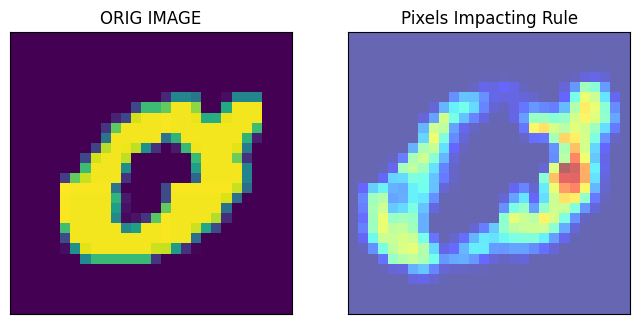

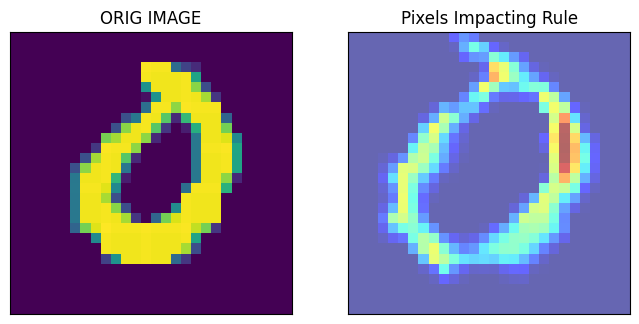

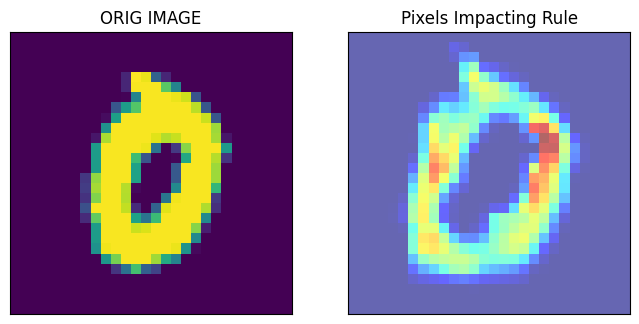

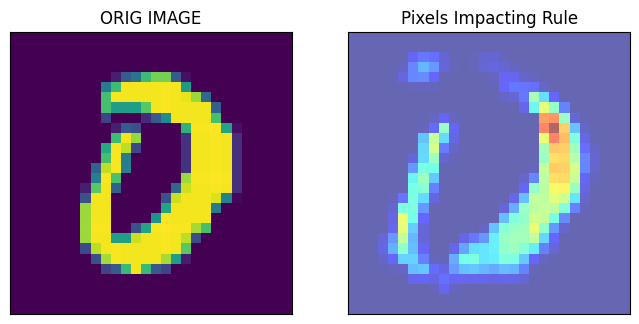

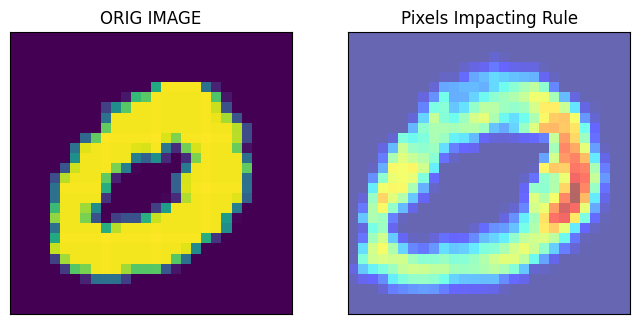

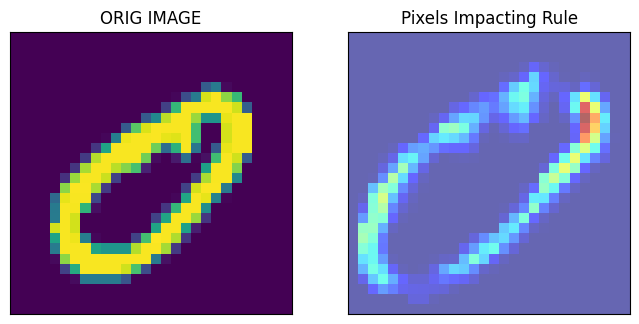

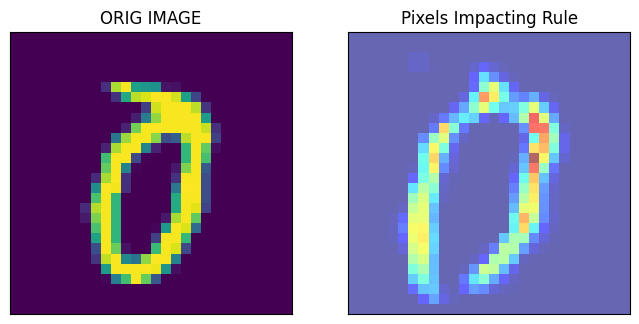

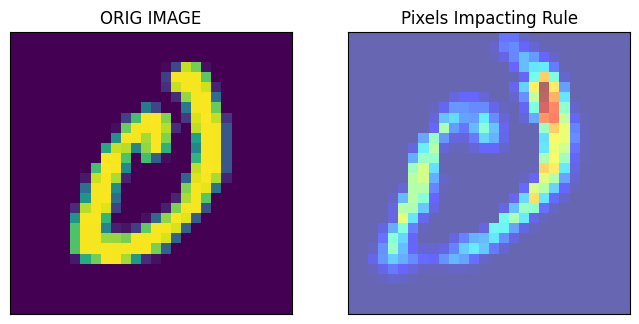

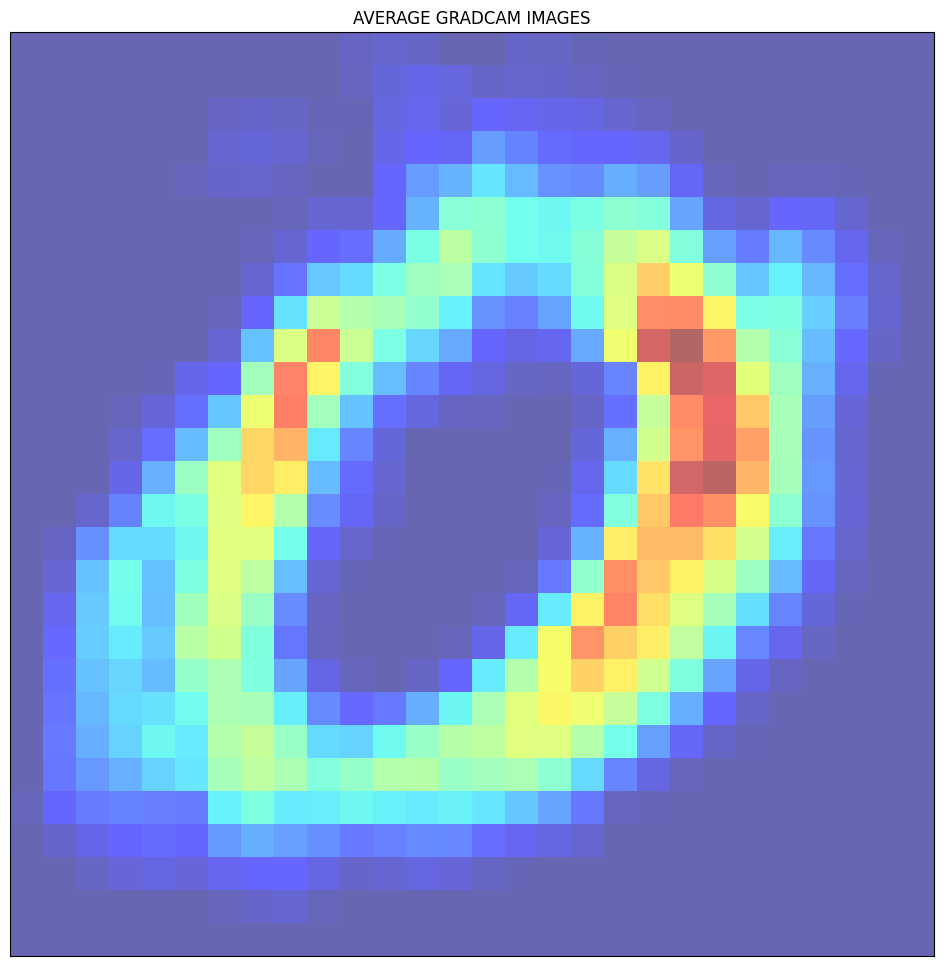

In [ ]:
print("Visualize Top Rule of Label 0 at dense_14:")
print("Highlight Pixels that impact the rule:")

fngprnt = (fingerprints14[0] > 0.0).astype('int')
visualize(rule_neurons_list,rule_sig_list,fngprnt, "dense_14",SUMMARY=True)




Visualize Top Rule of Label 2 at dense_14:
Highlight Pixels that impact the rule:
[14, 23, 2, 17, 20, 21, 9, 1, 31, 12, 13, 27, 4, 29, 3]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
(60000, 32)
[1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1]
917


<ipython-input-103-cb2a1a9127bf>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(**subplot_args1)


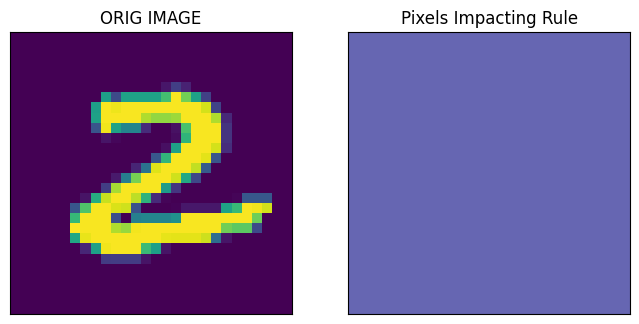

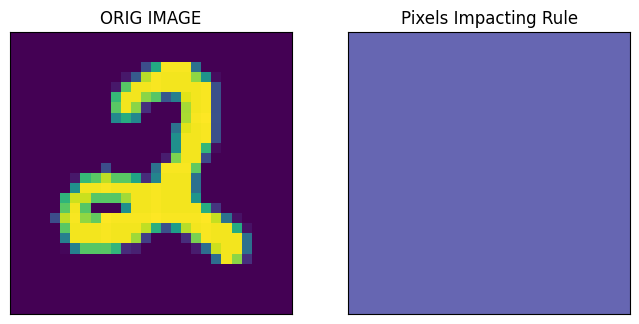

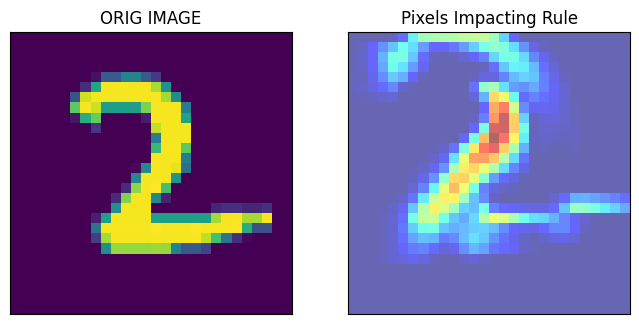

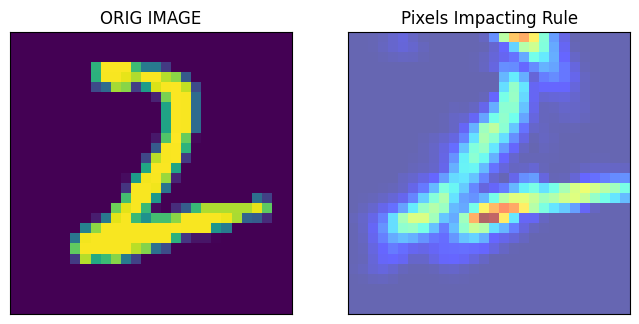

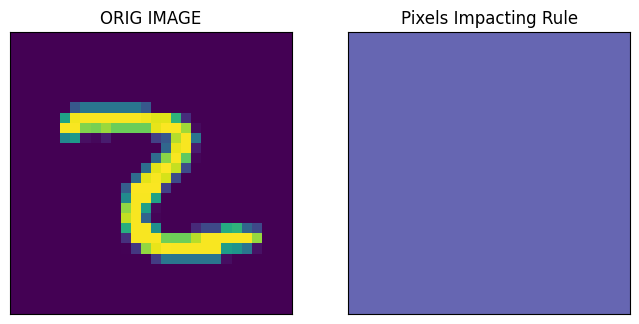

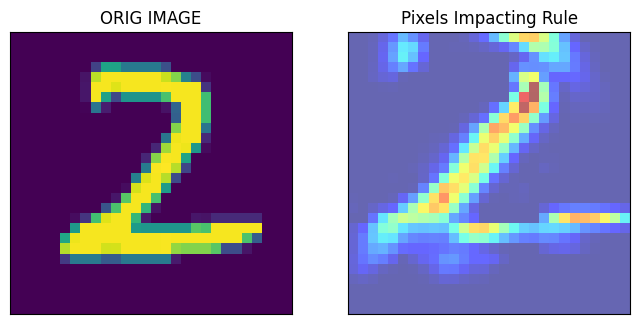

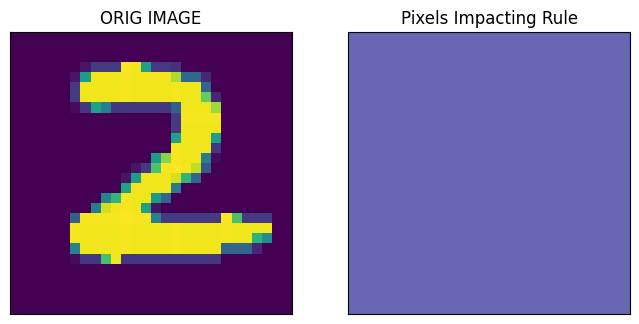

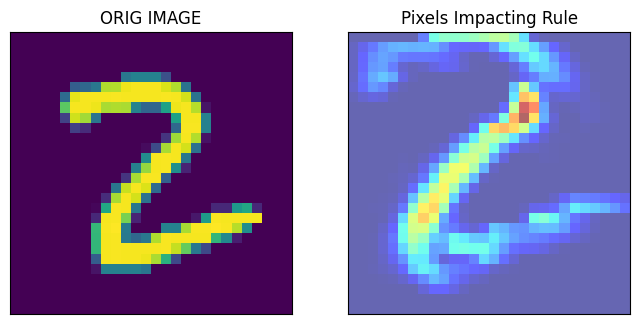

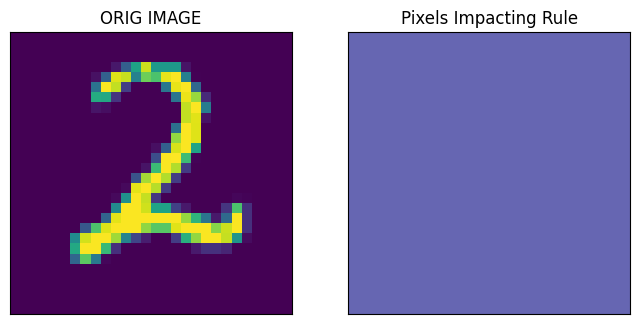

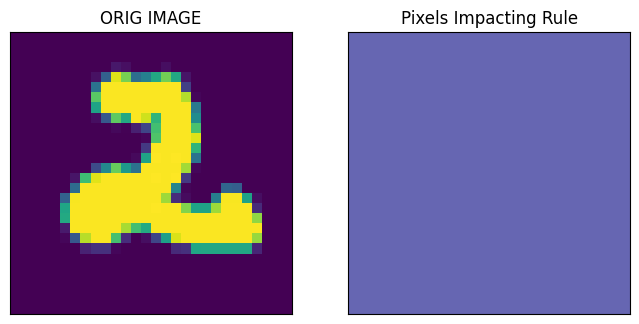

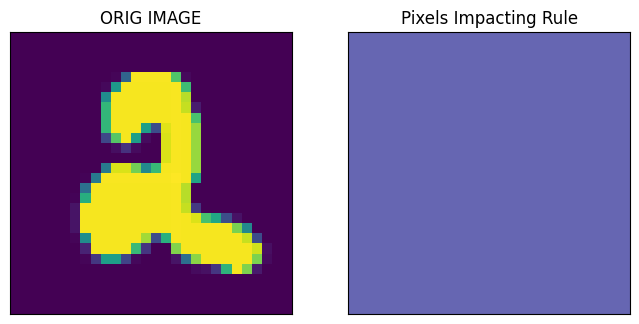

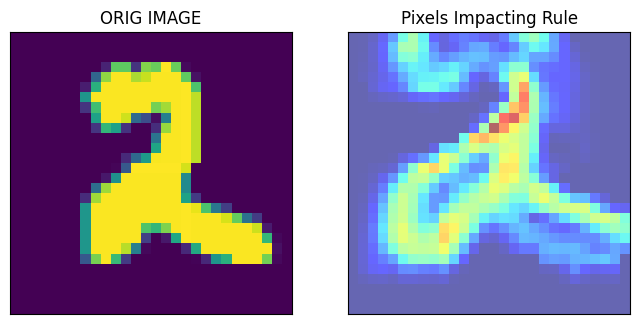

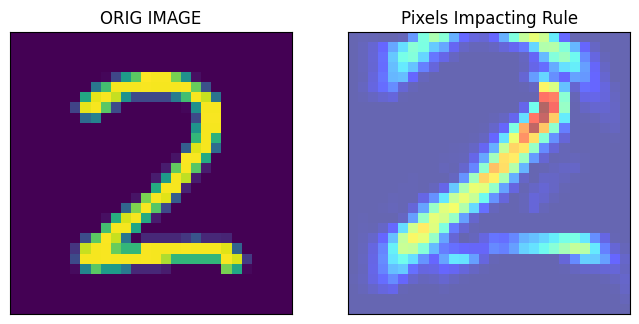

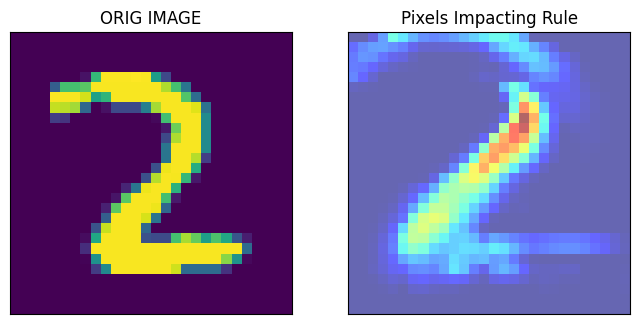

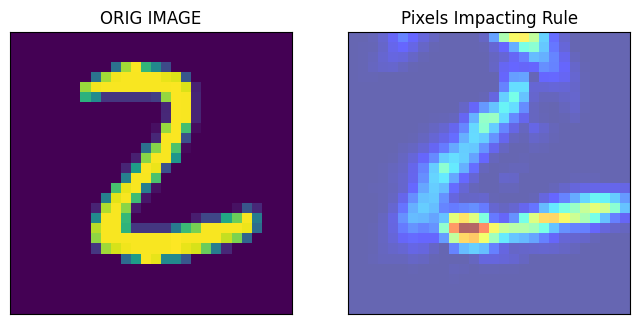

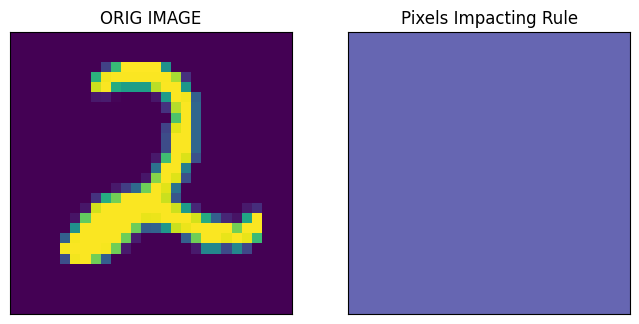

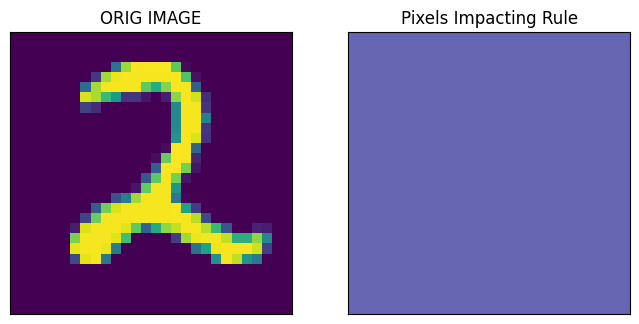

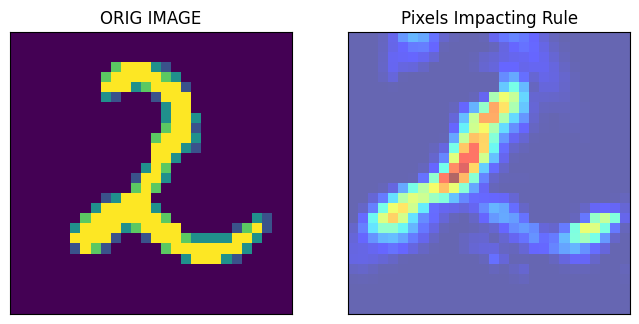

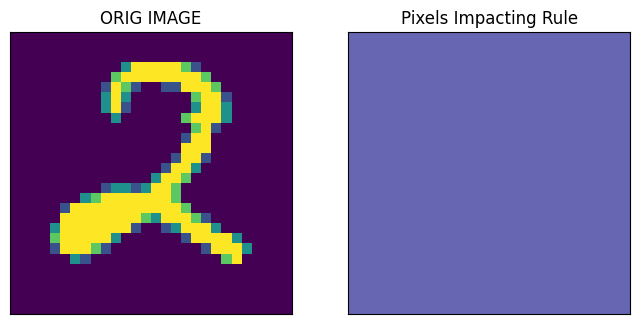

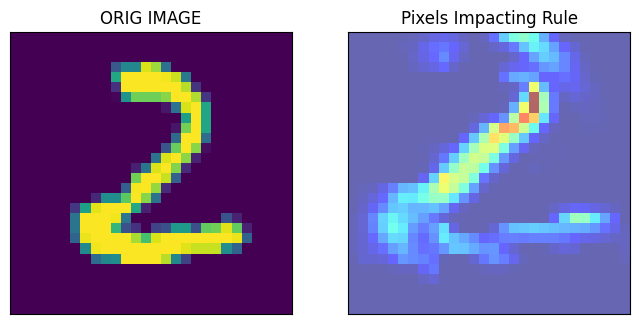

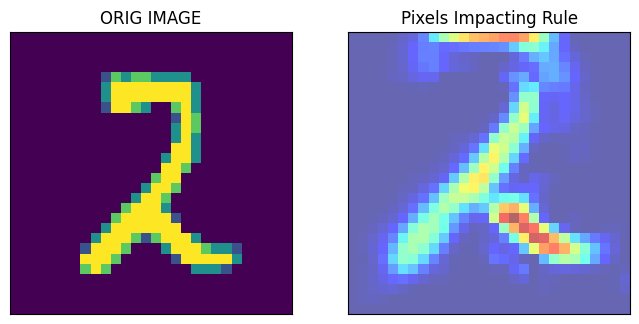

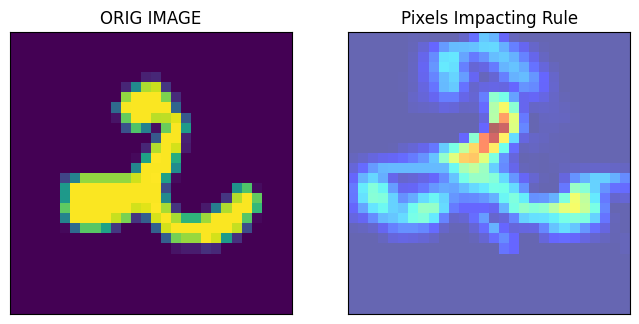

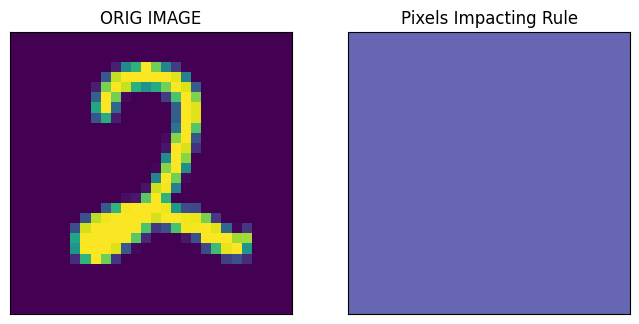

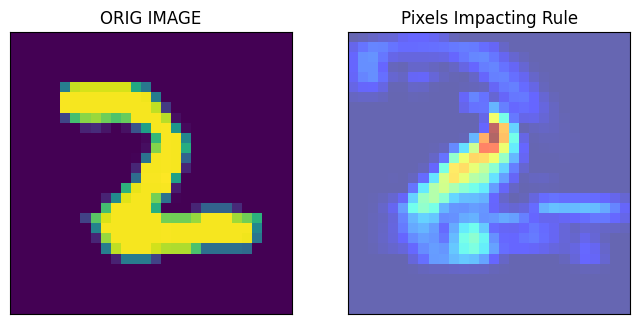

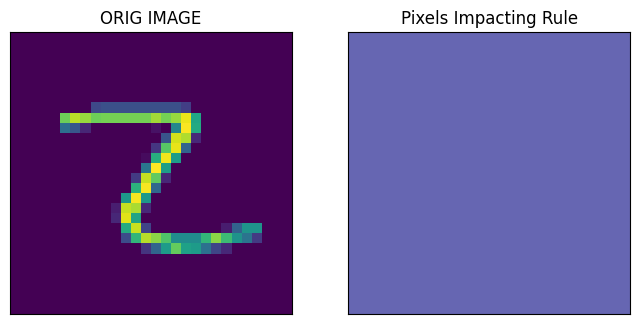

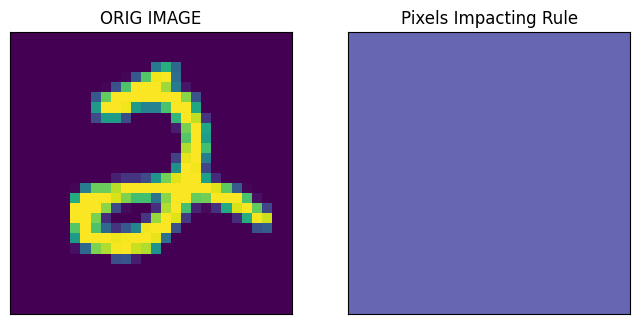

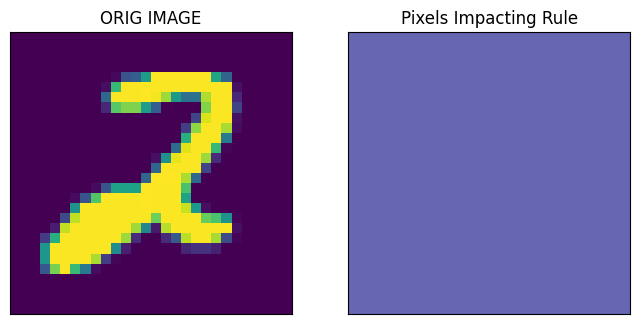

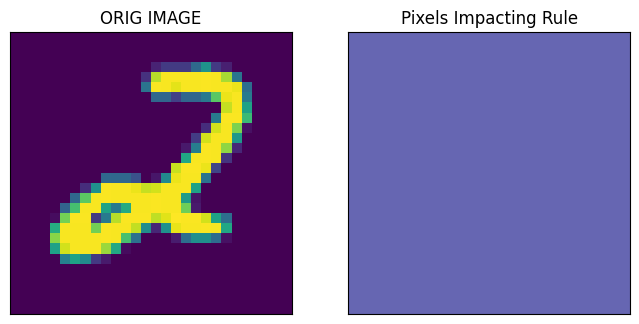

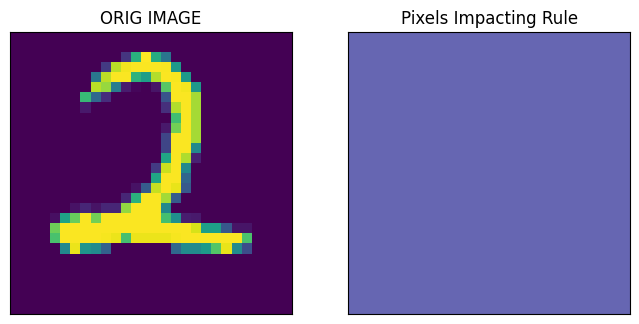

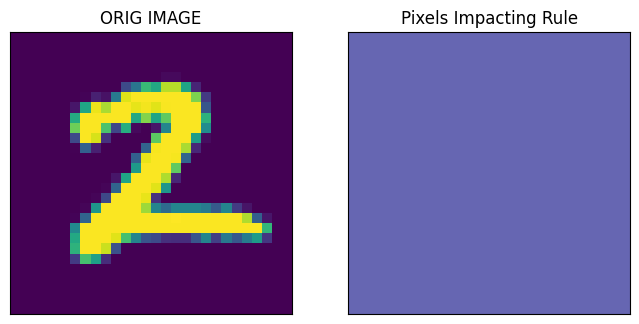

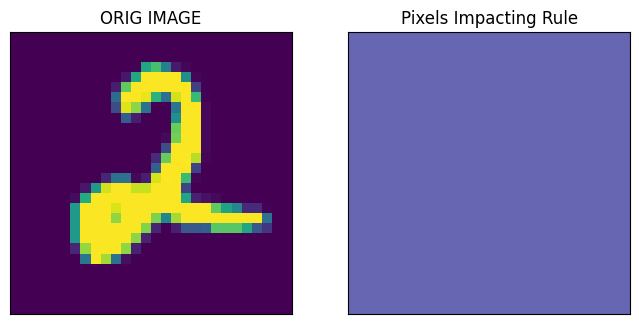

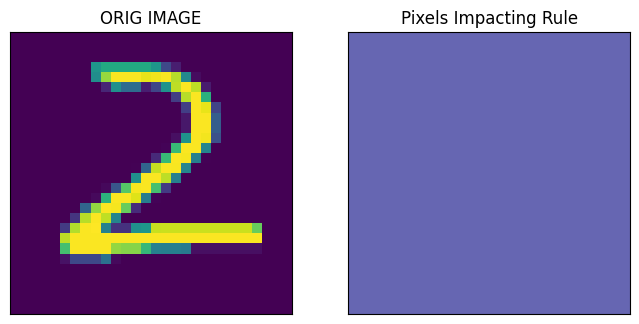

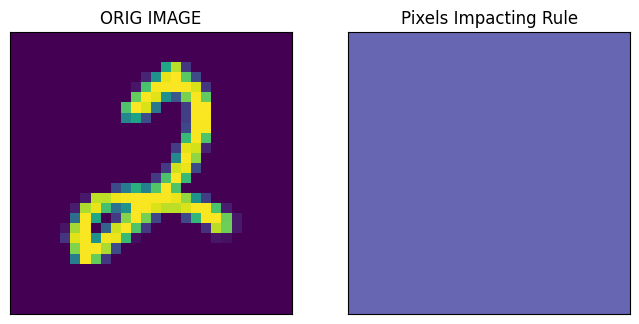

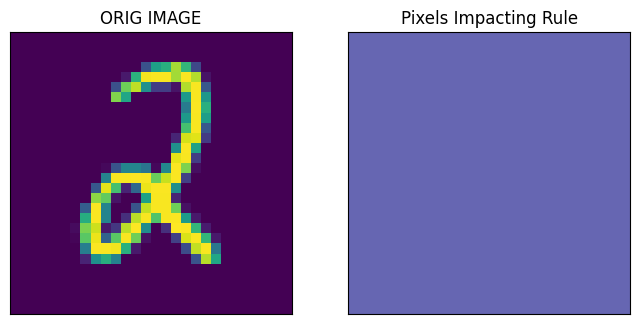

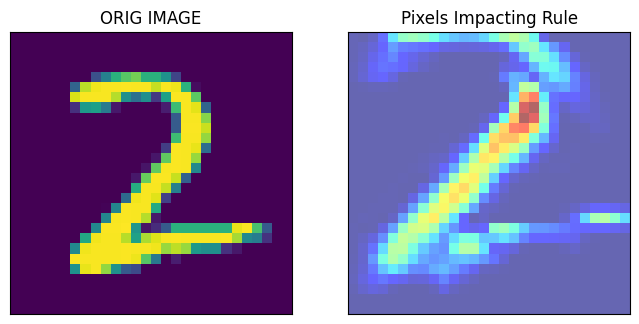

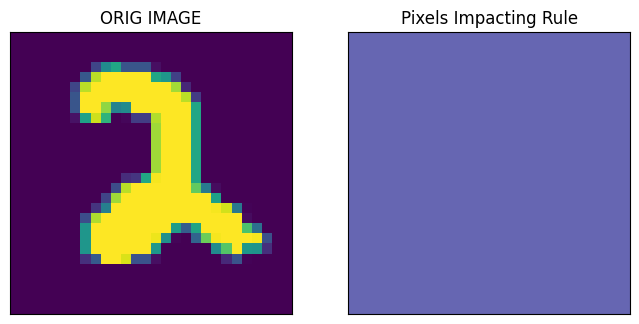

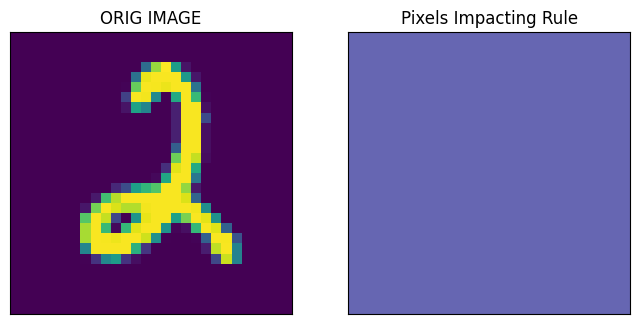

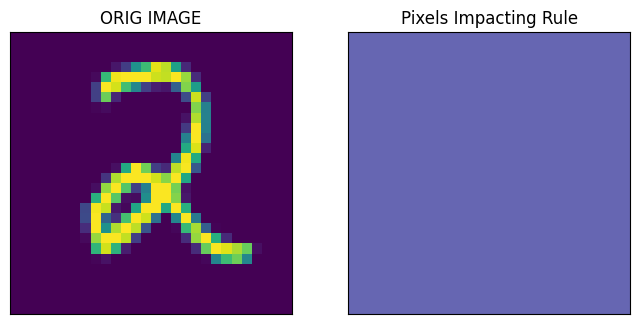

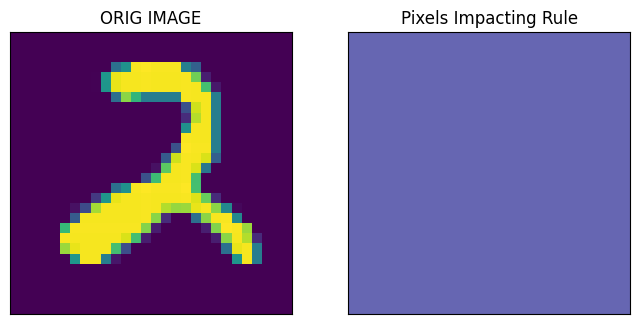

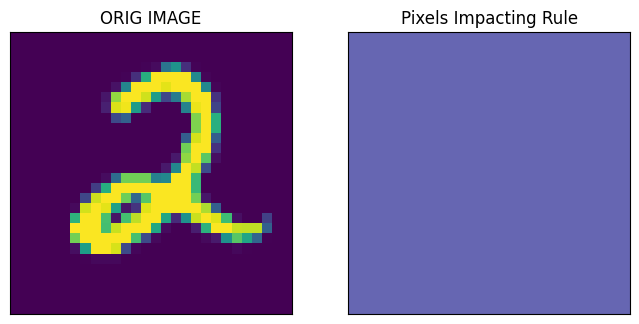

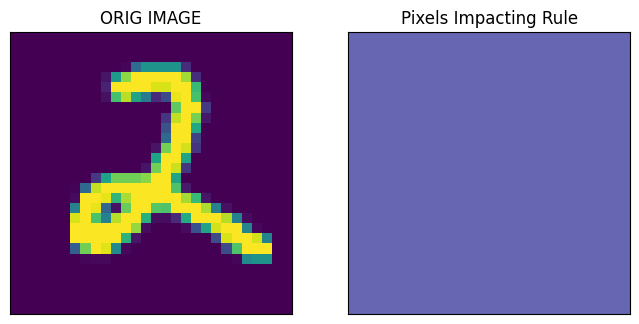

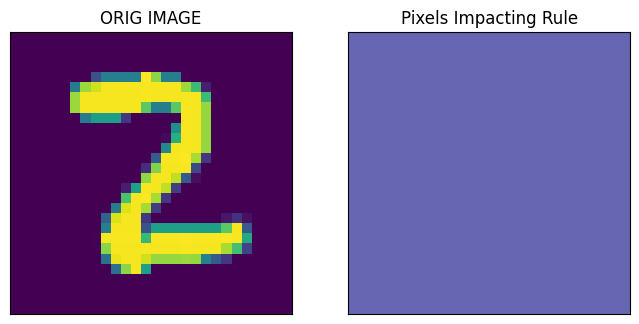

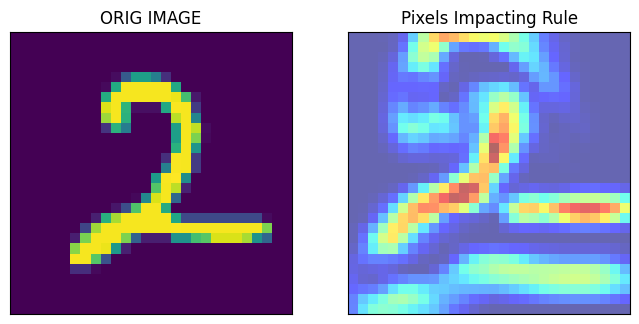

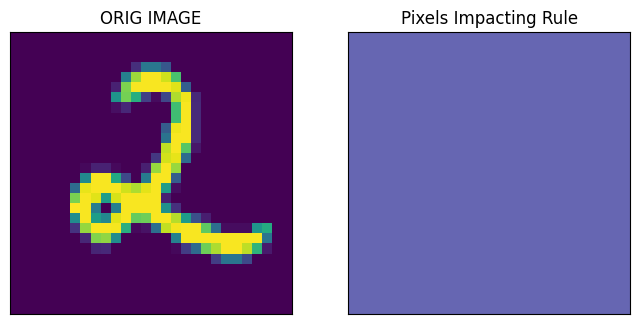

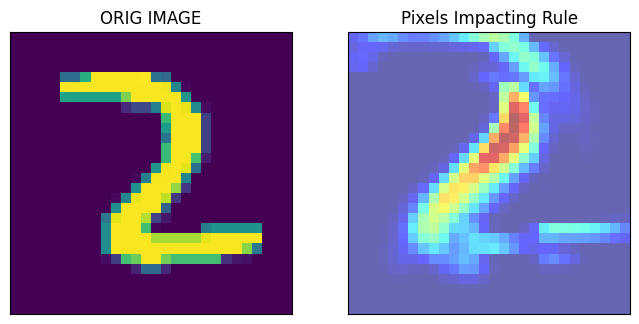

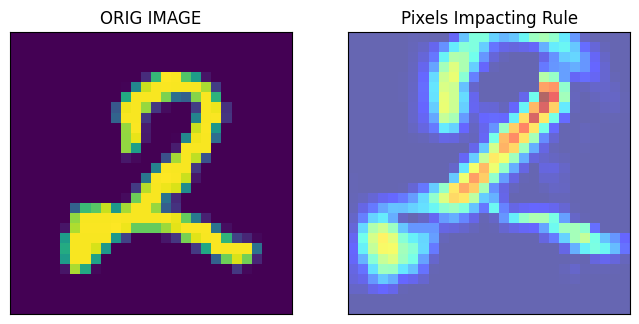

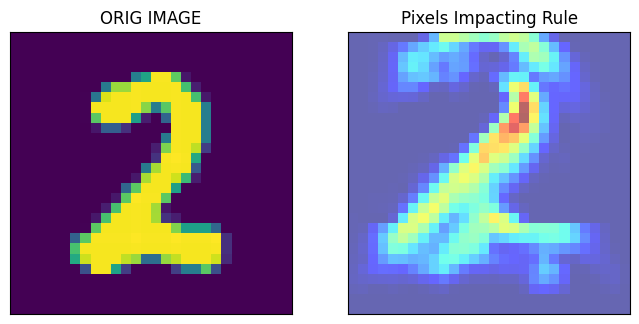

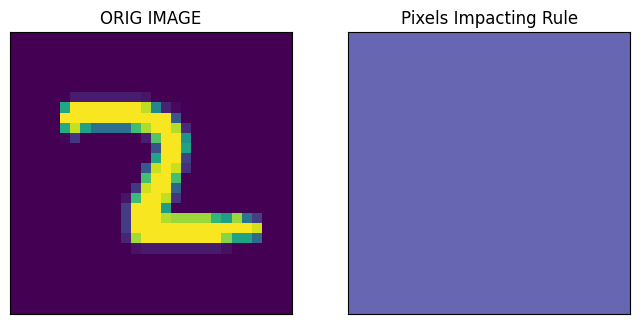

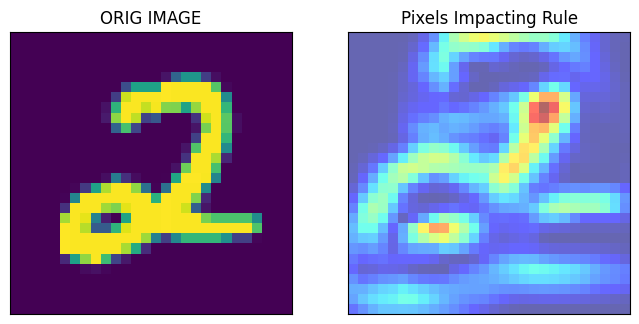

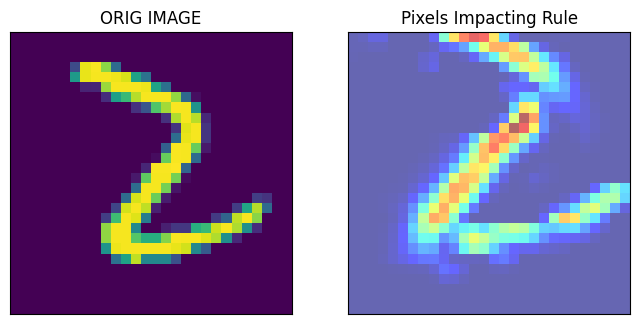

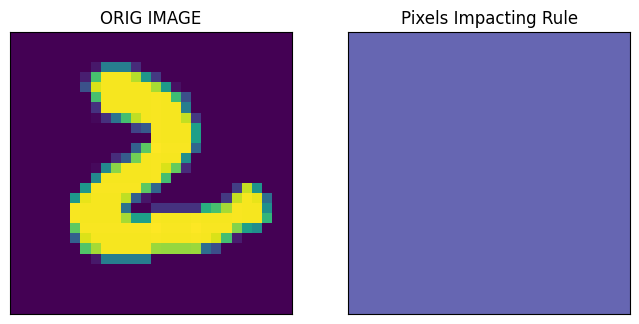

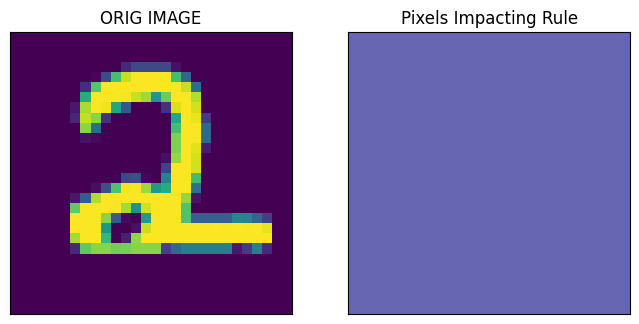

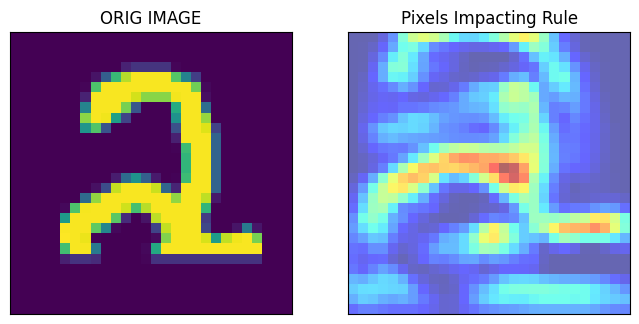

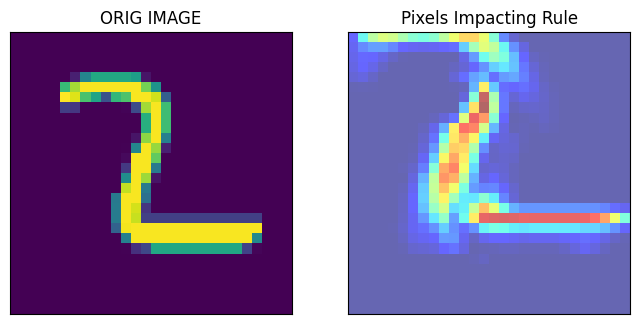

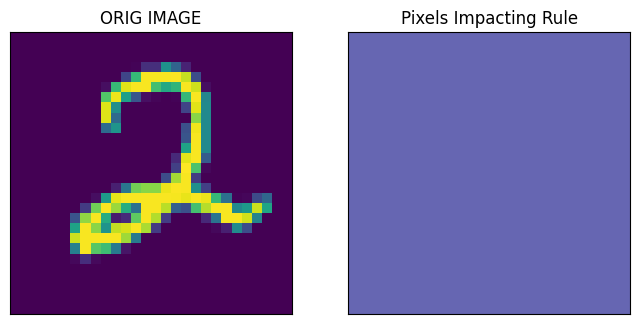

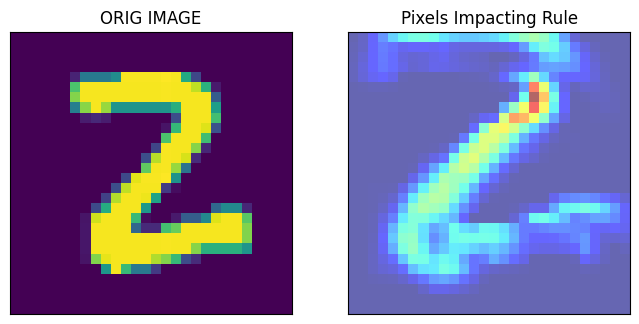

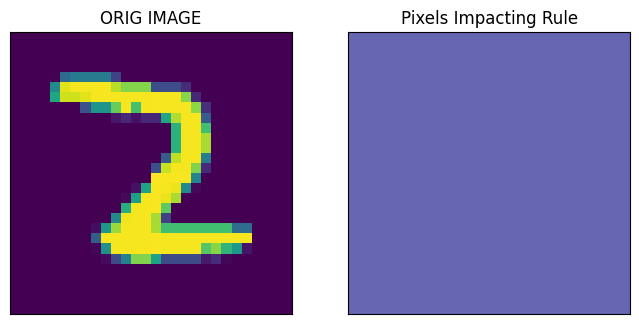

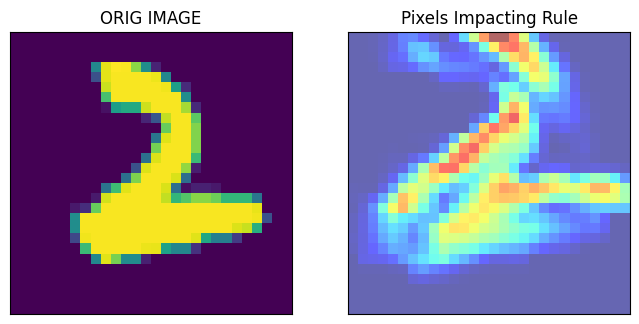

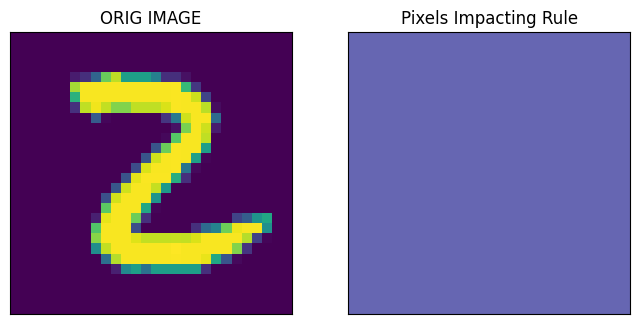

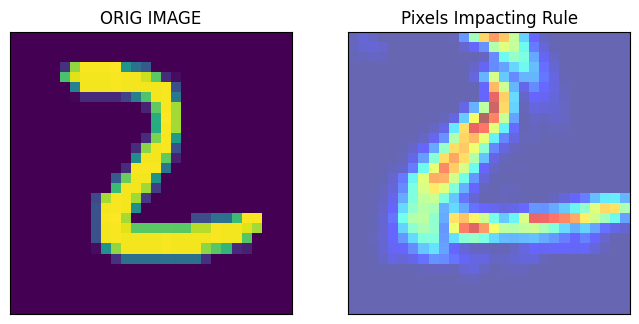

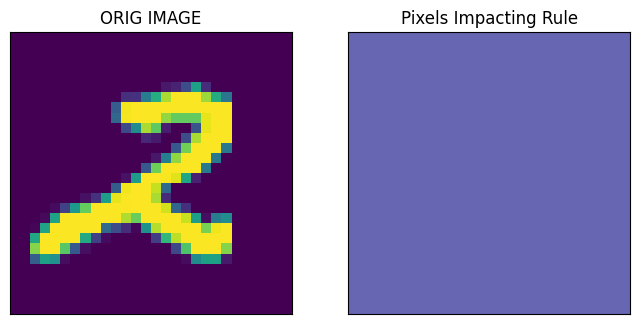

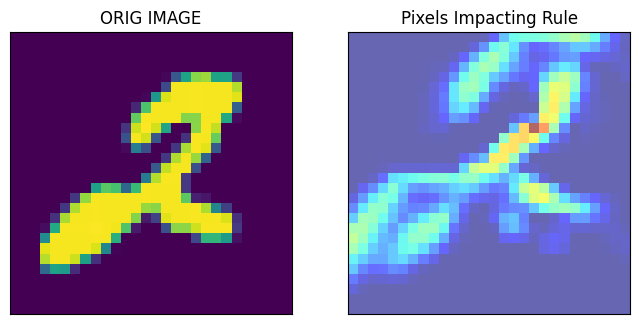

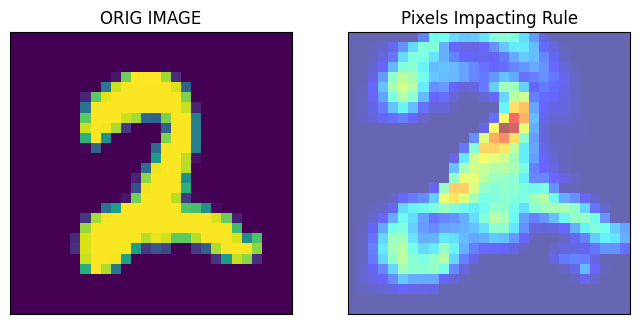

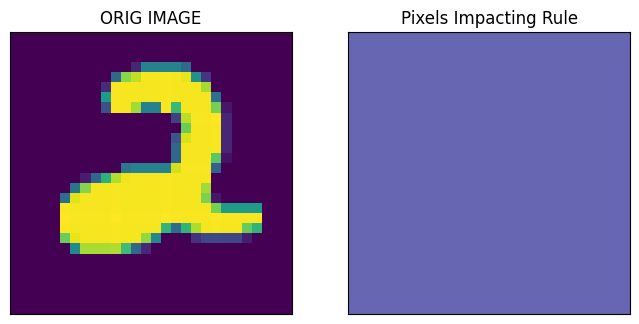

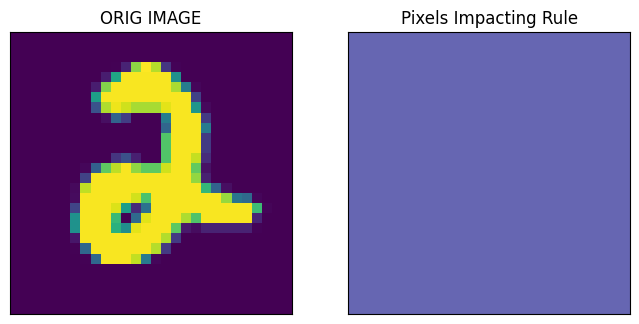

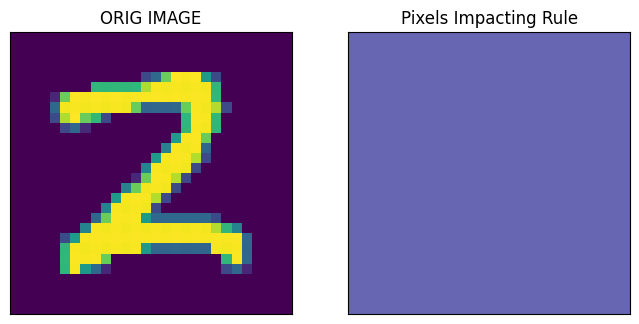

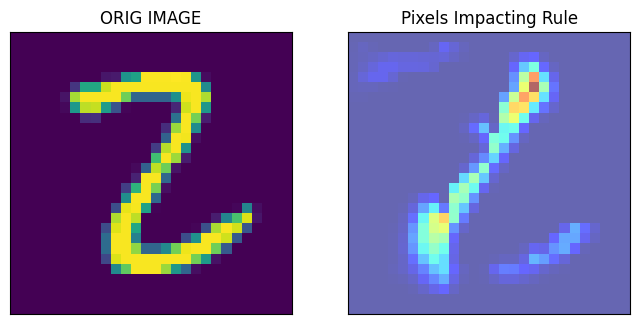

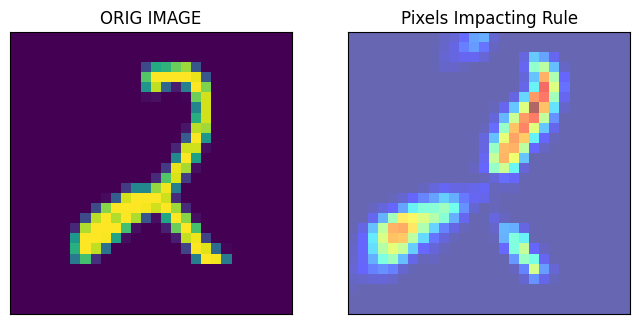

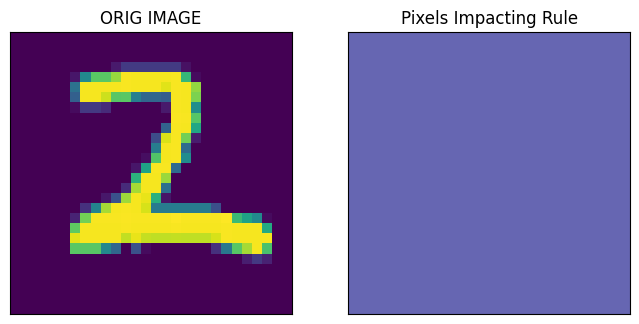

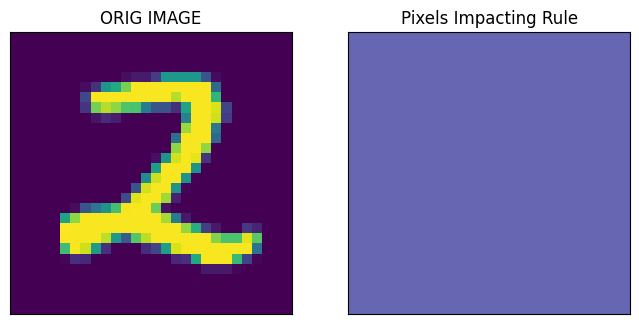

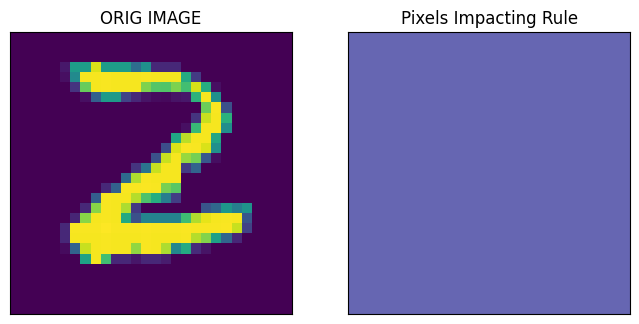

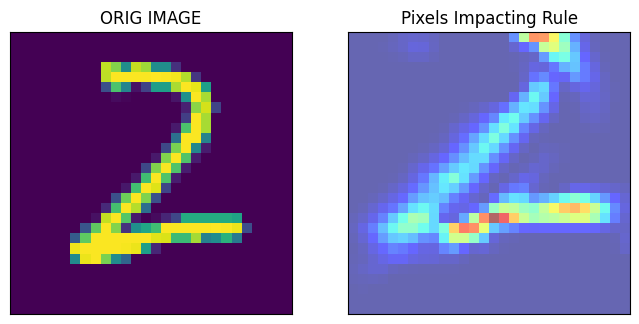

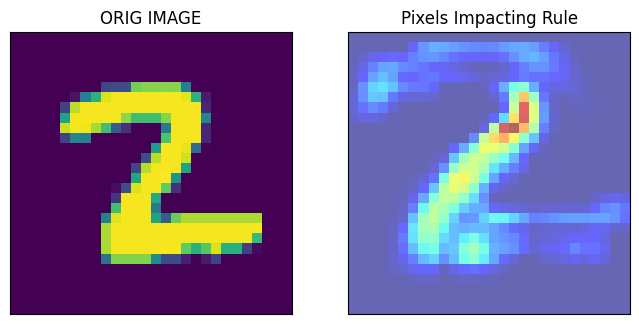

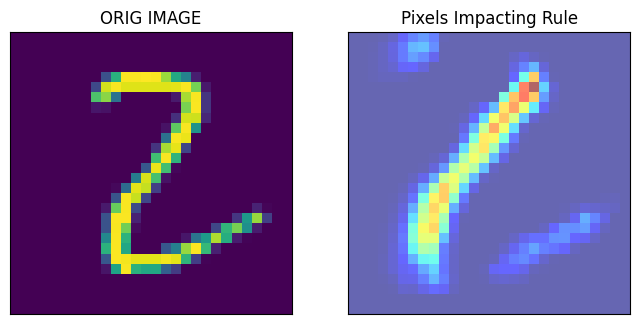

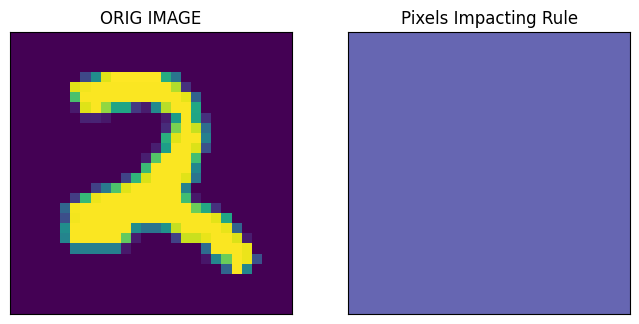

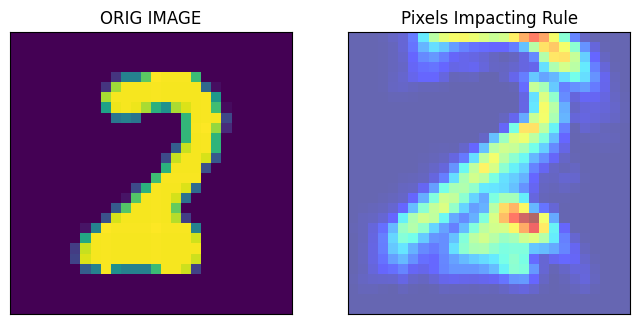

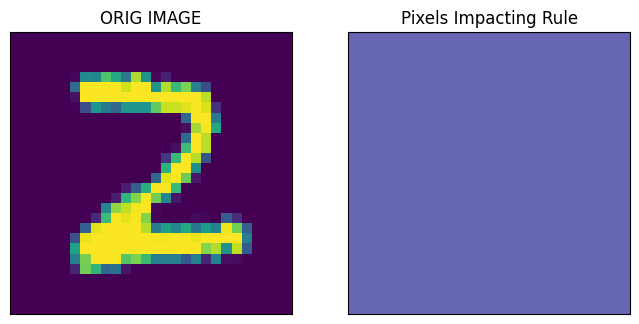

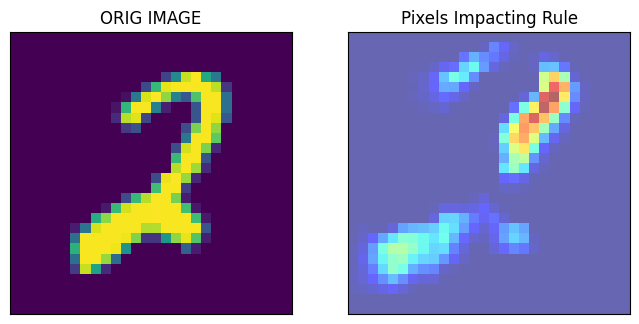

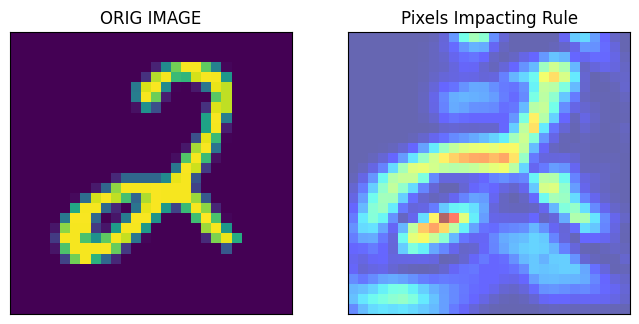

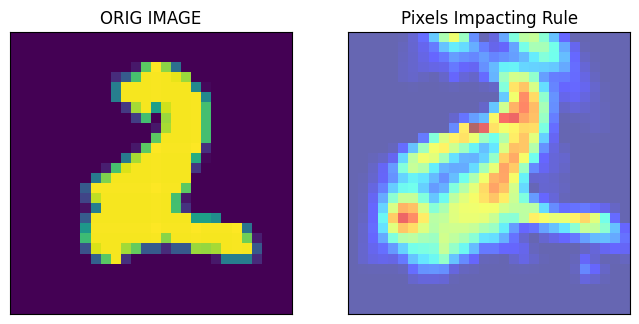

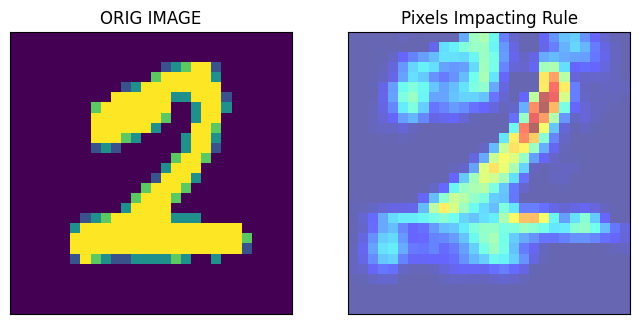

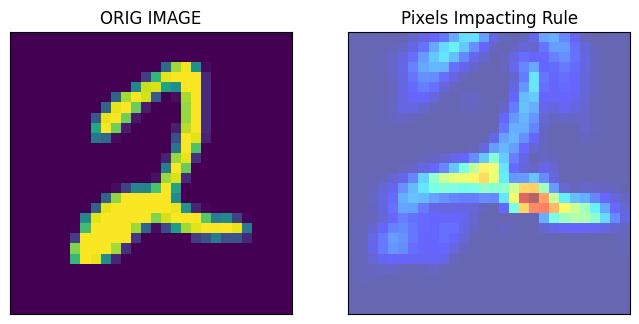

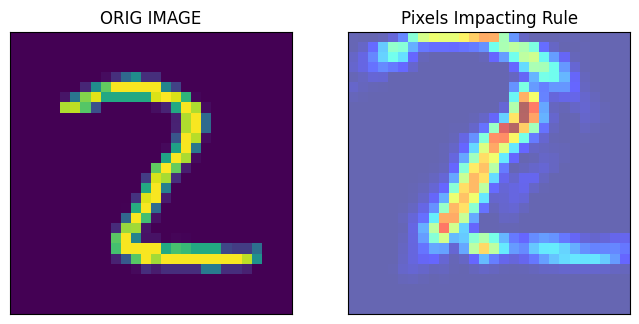

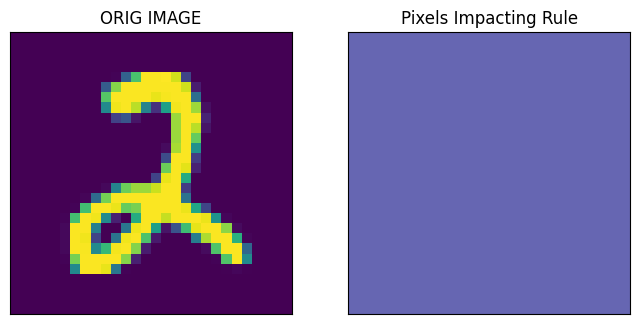

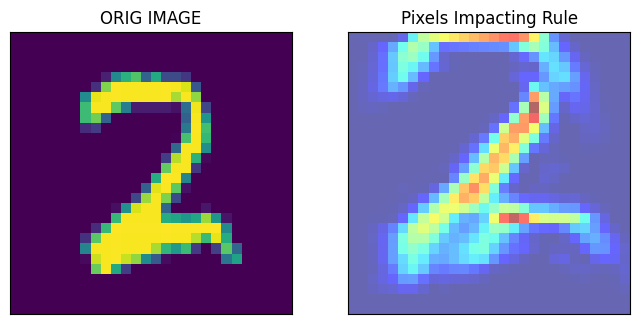

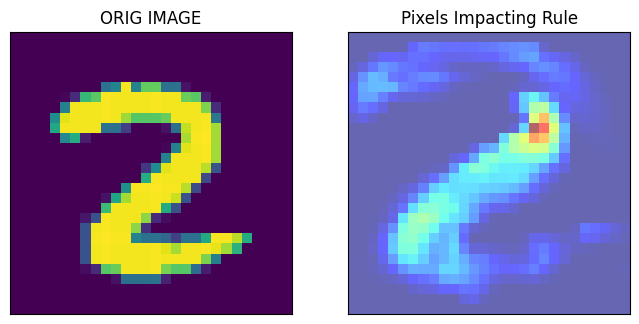

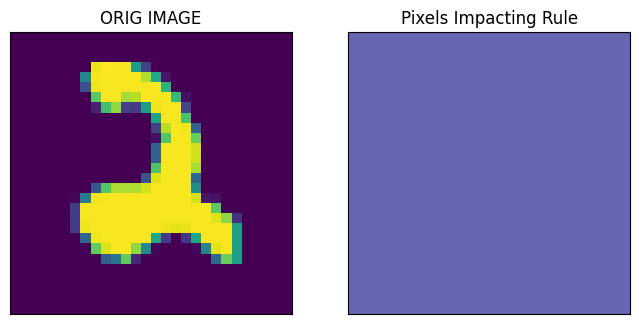

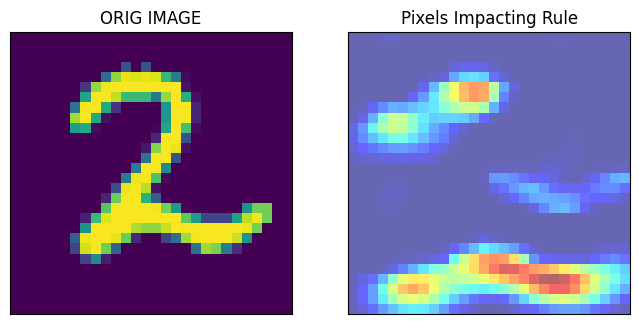

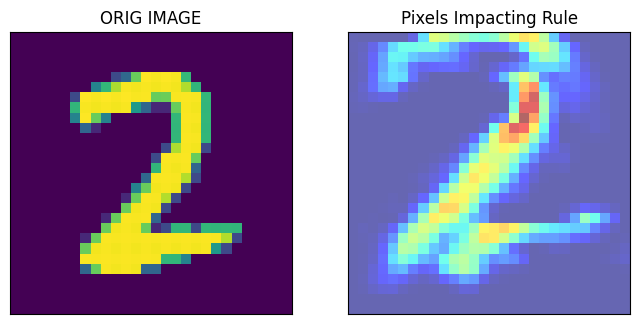

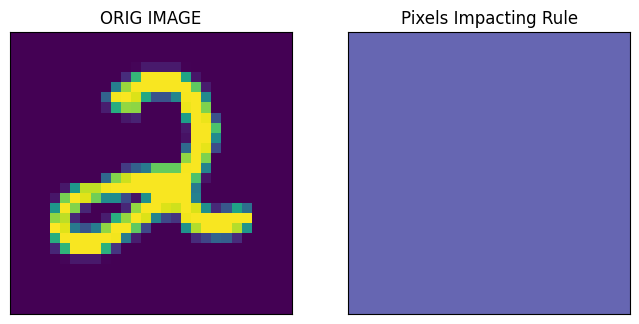

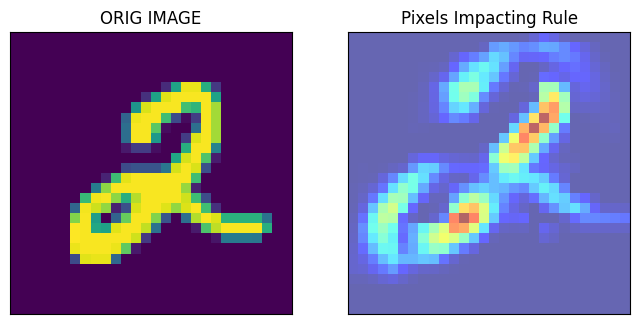

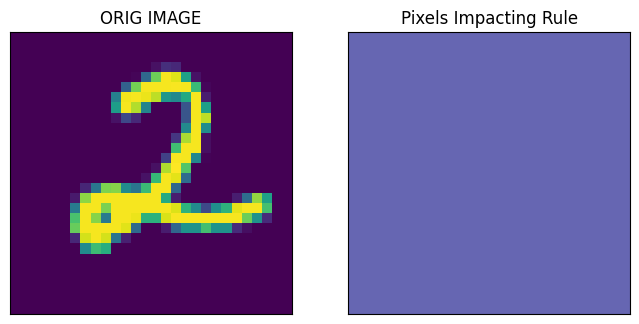

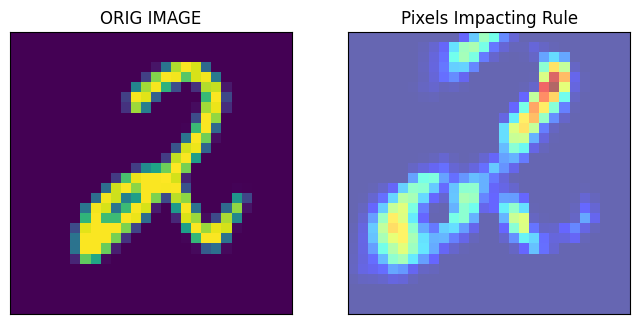

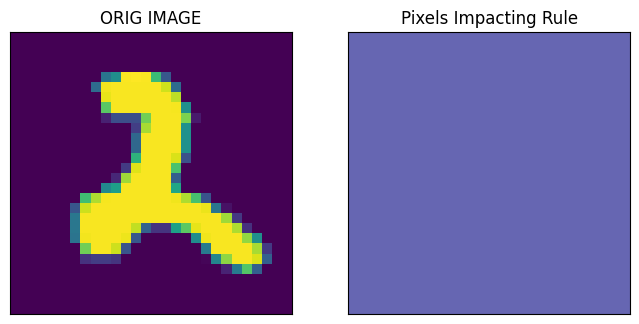

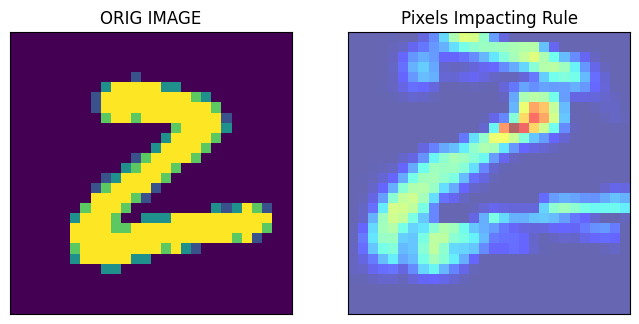

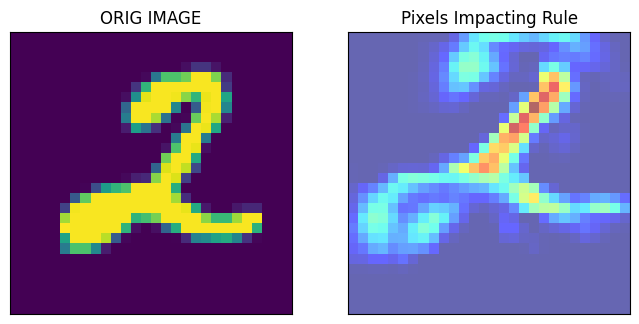

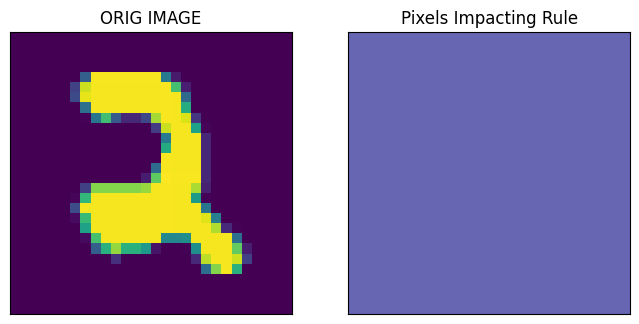

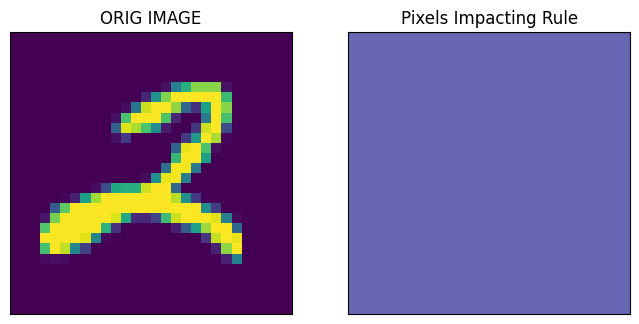

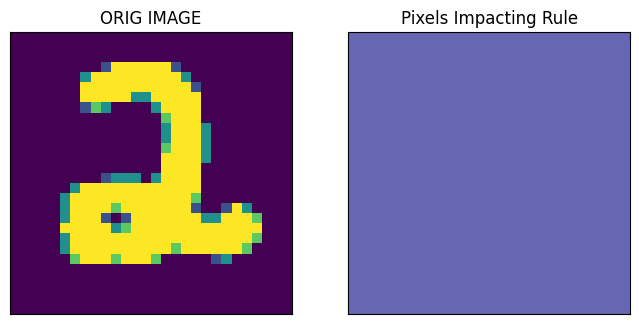

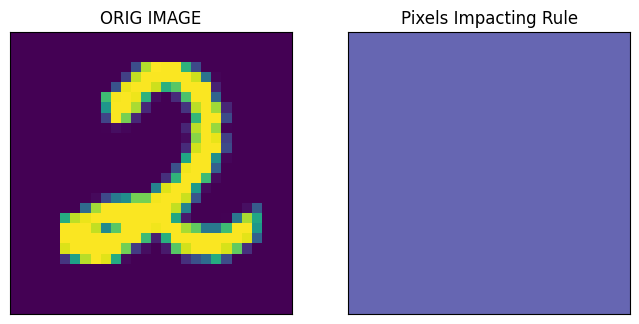

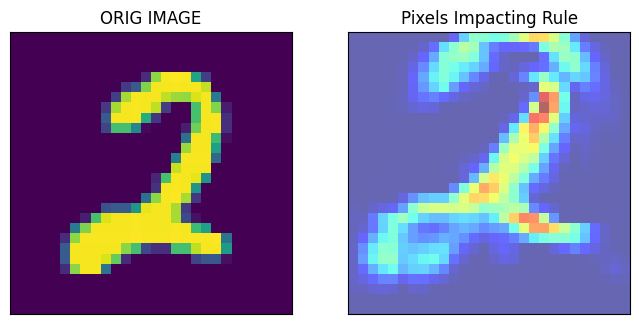

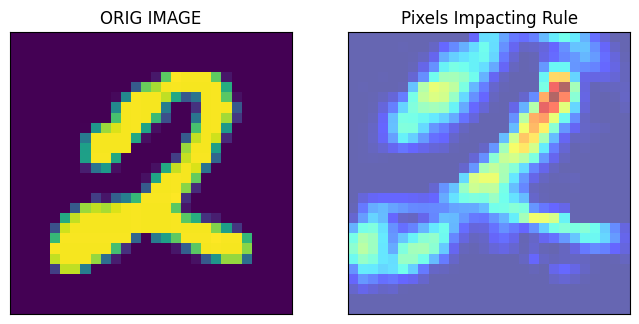

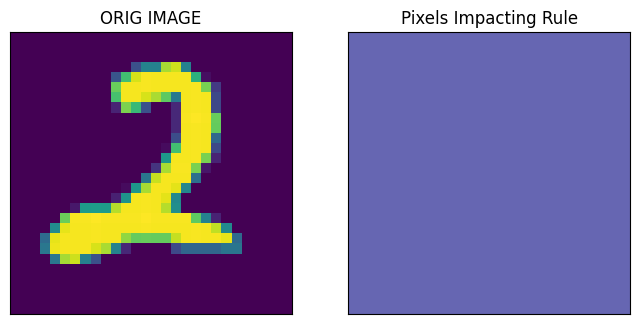

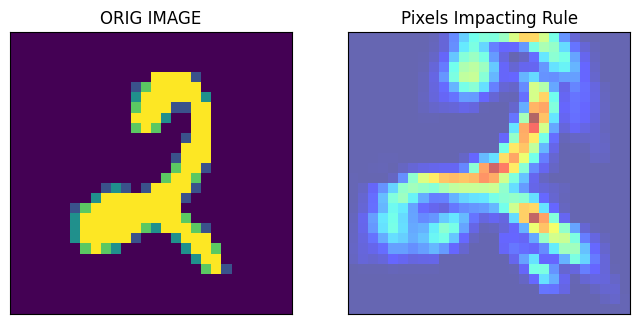

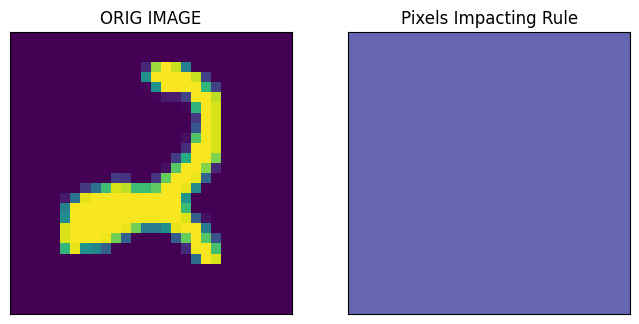

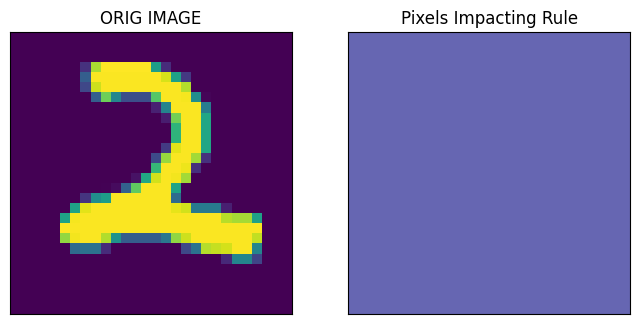

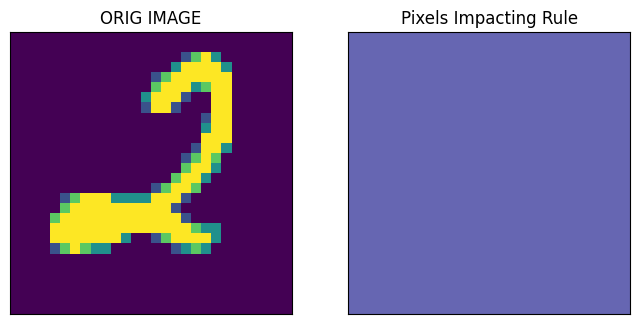

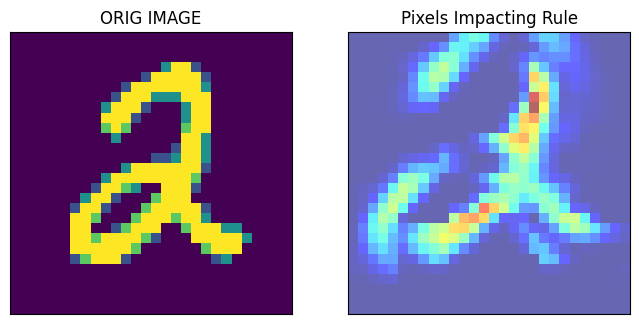

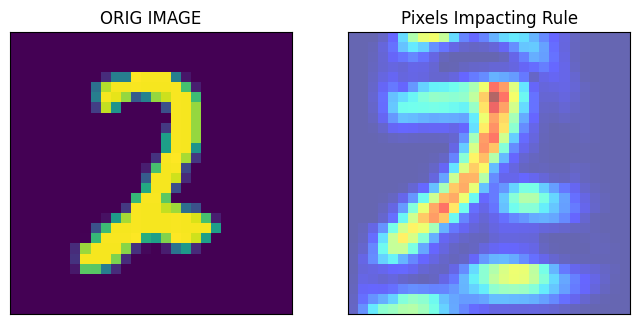

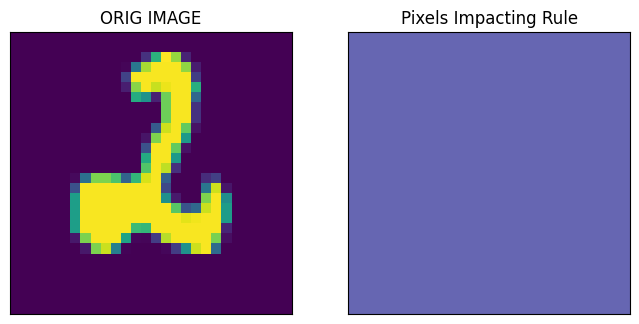

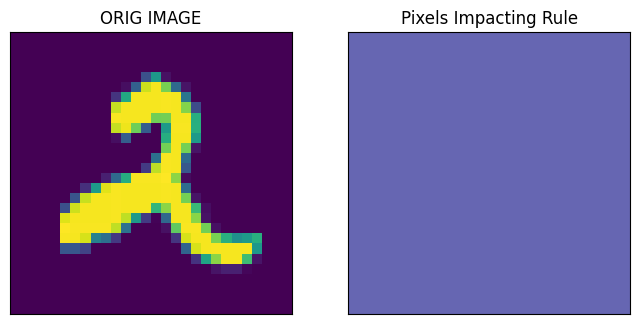

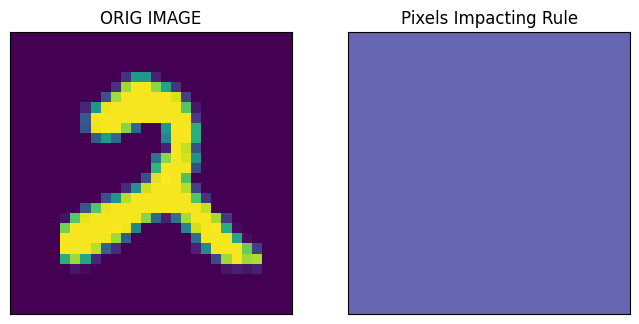

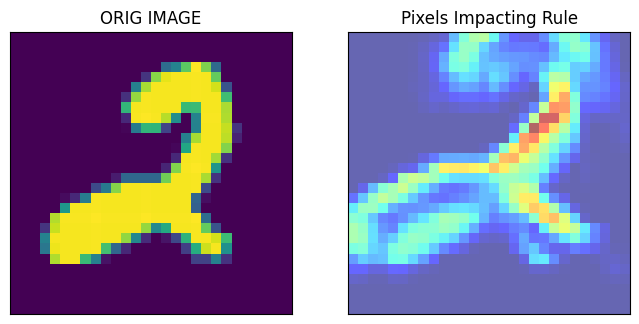

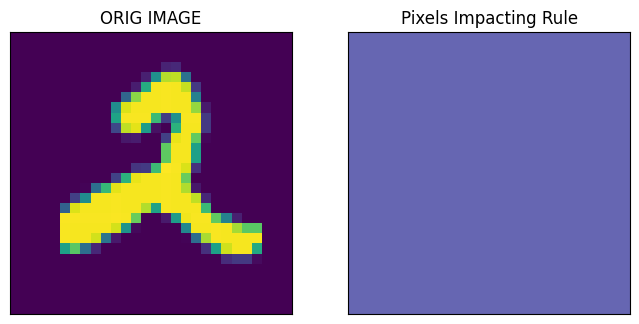

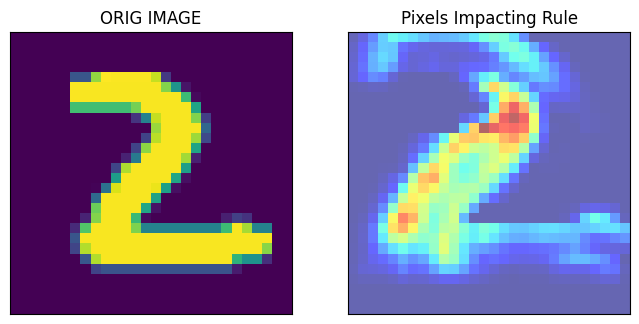

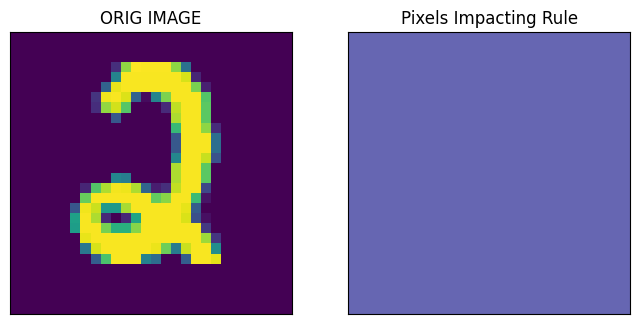

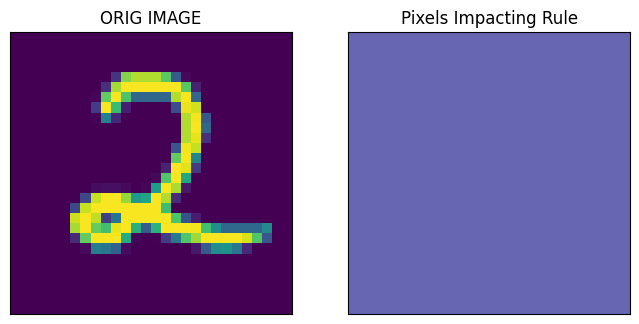

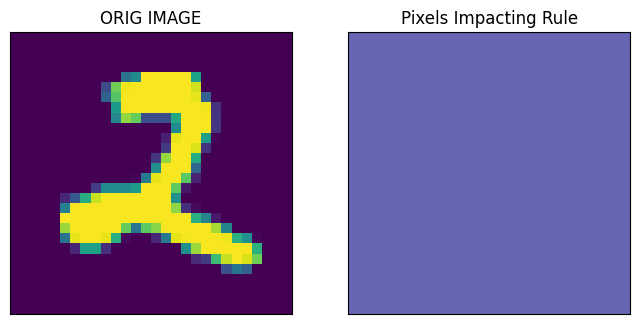

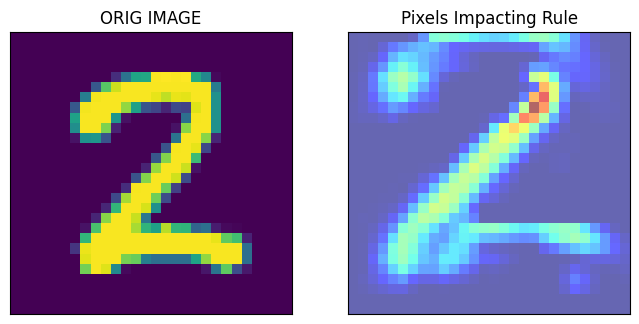

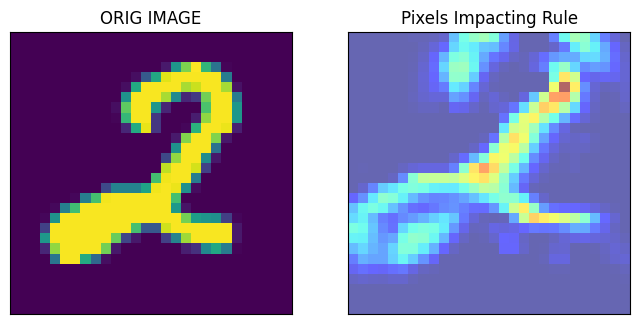

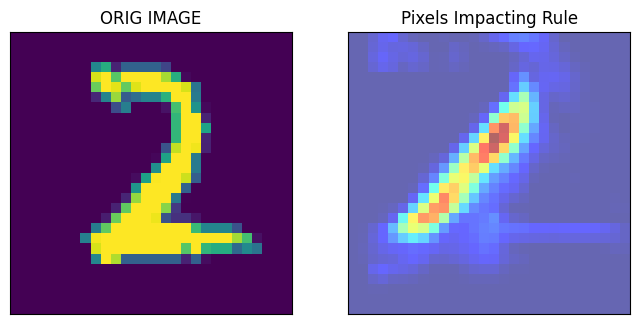

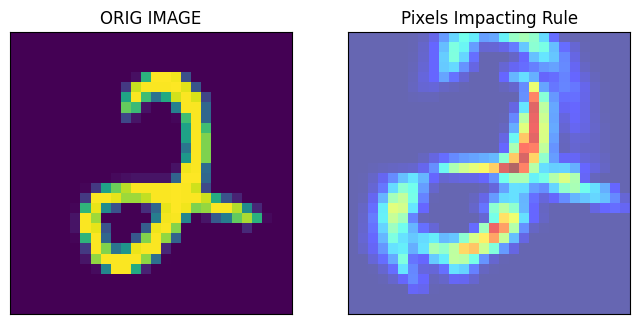

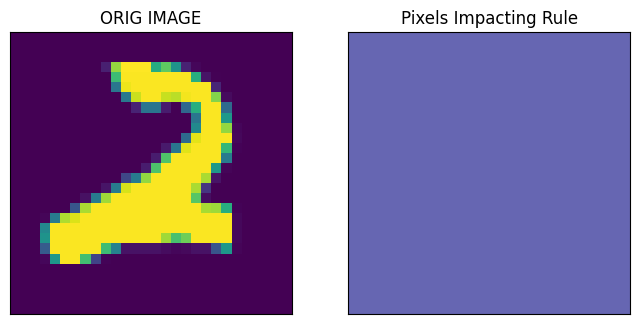

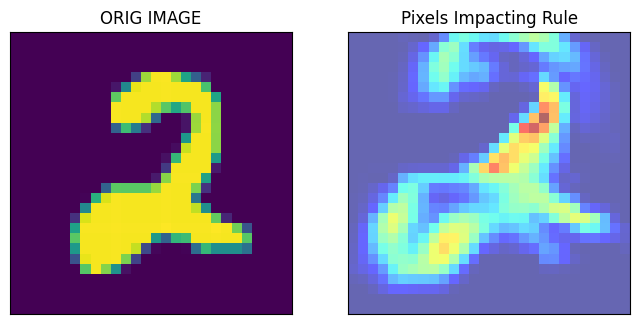

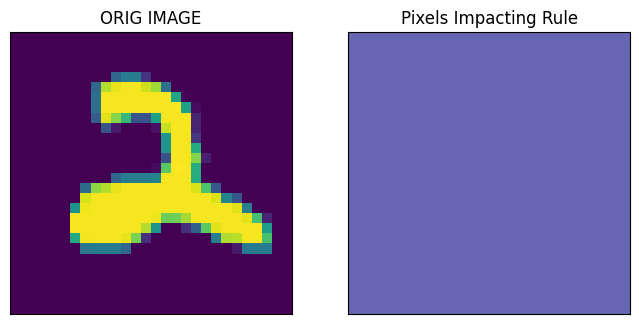

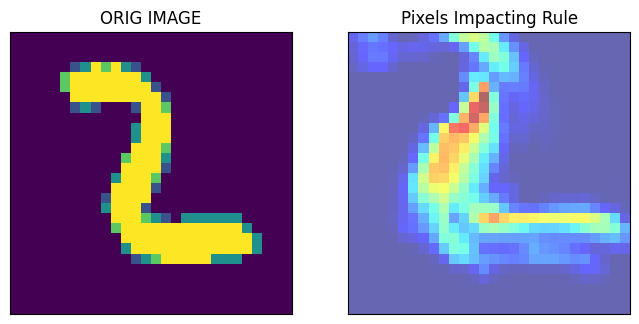

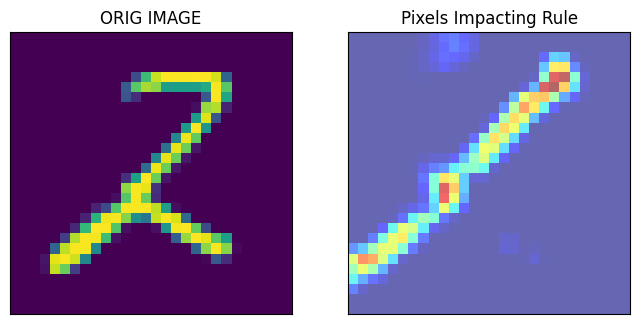

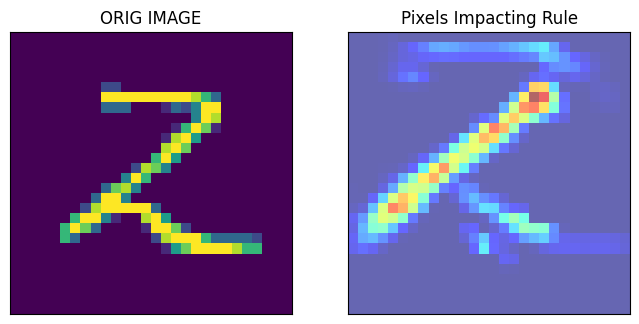

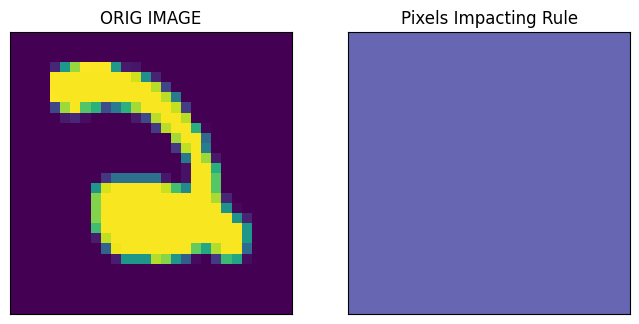

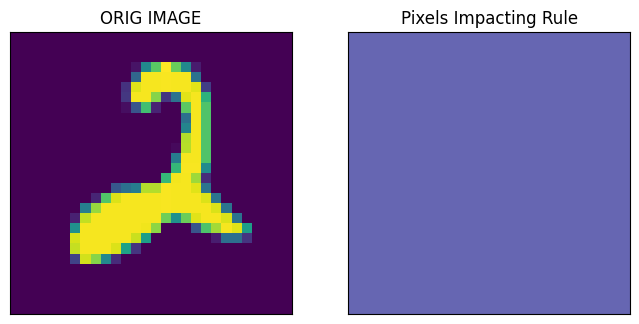

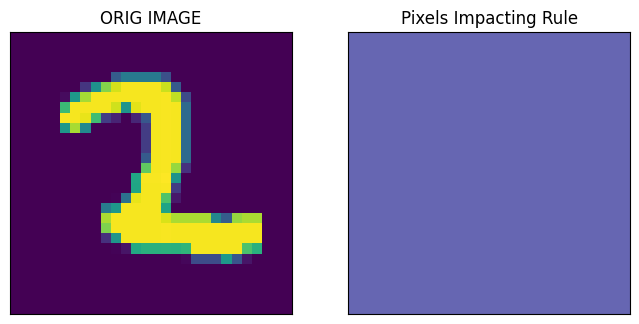

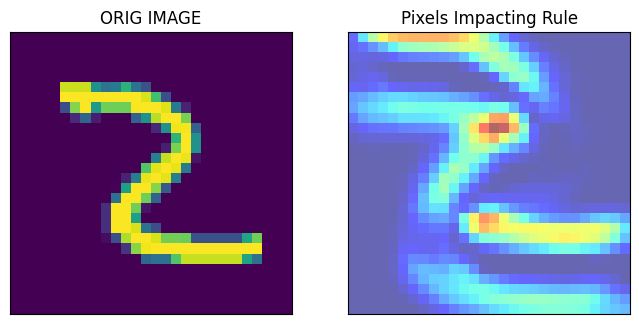

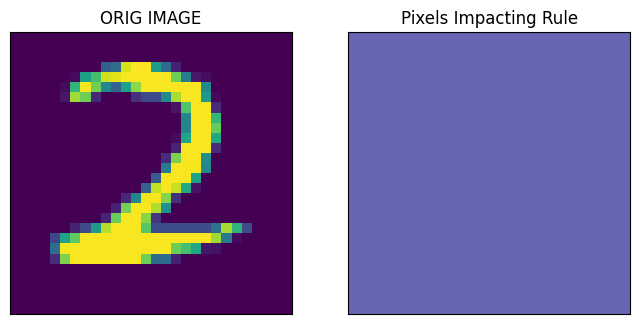

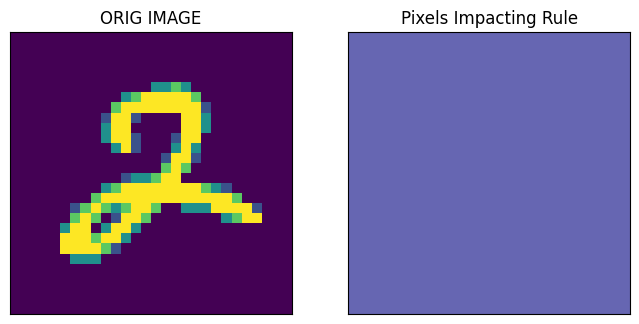

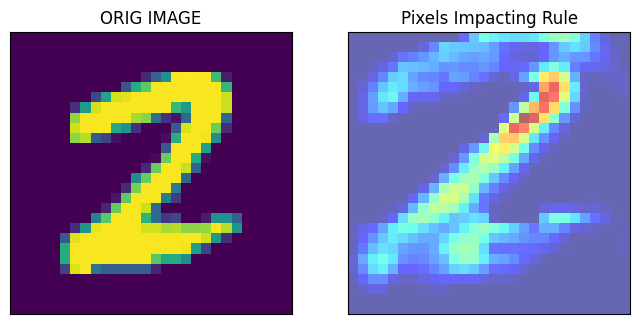

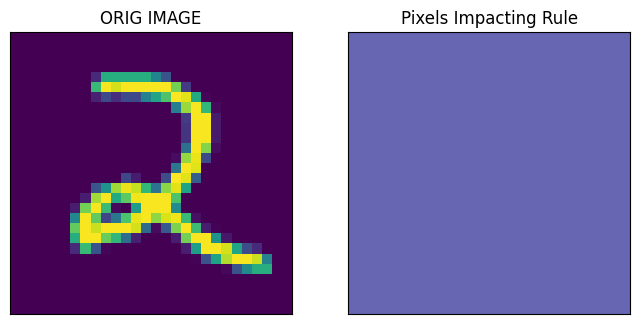

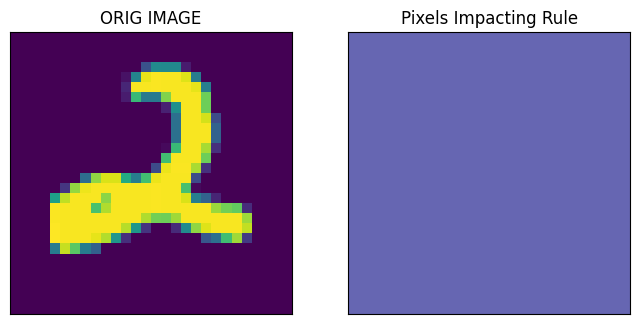

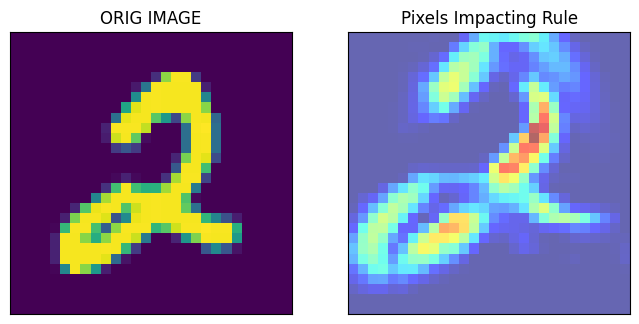

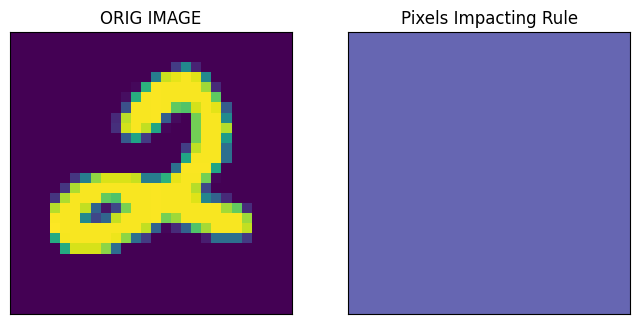

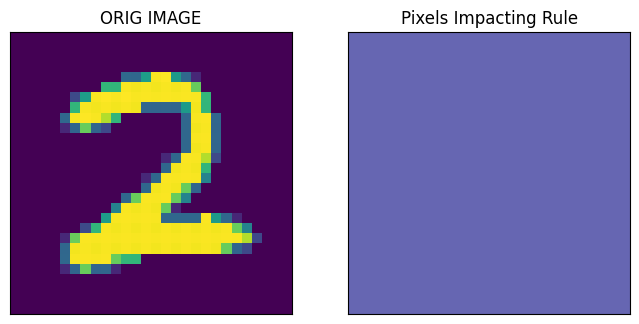

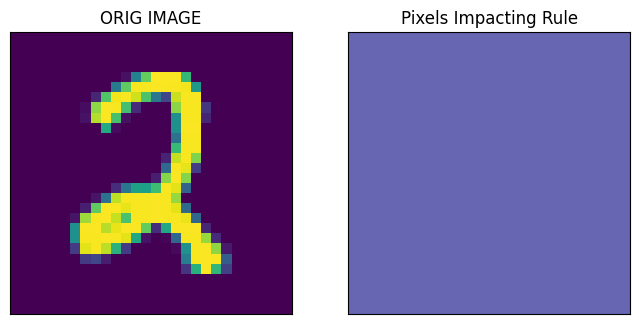

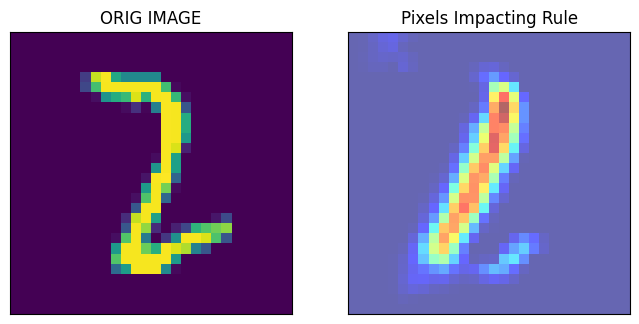

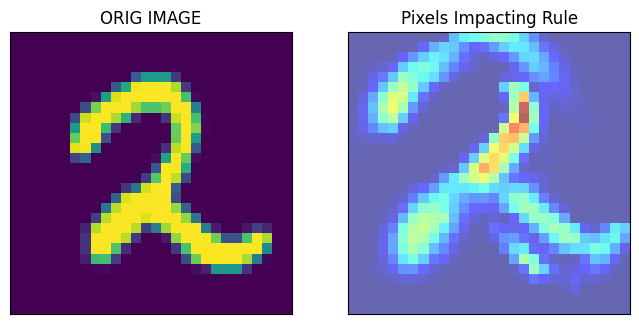

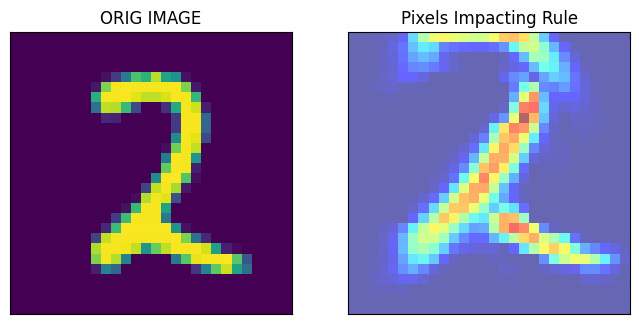

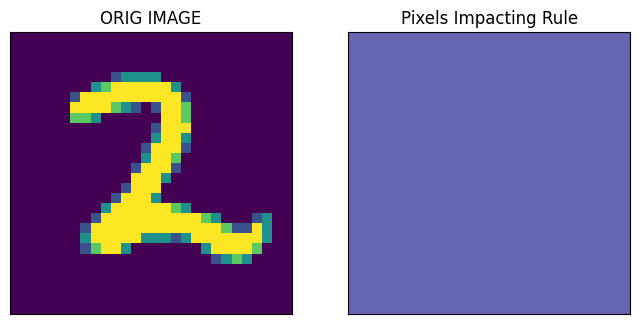

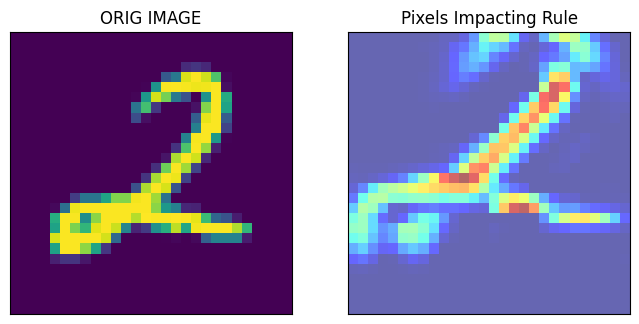

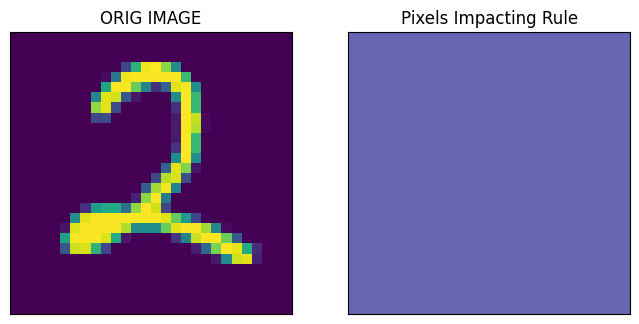

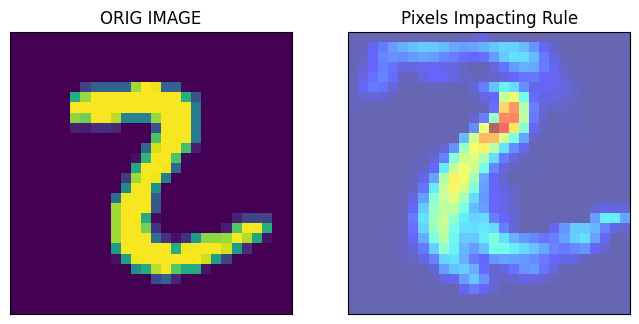

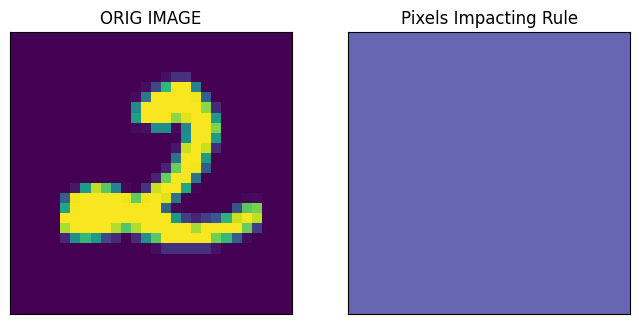

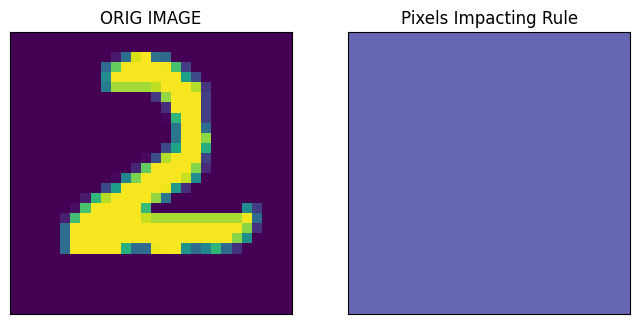

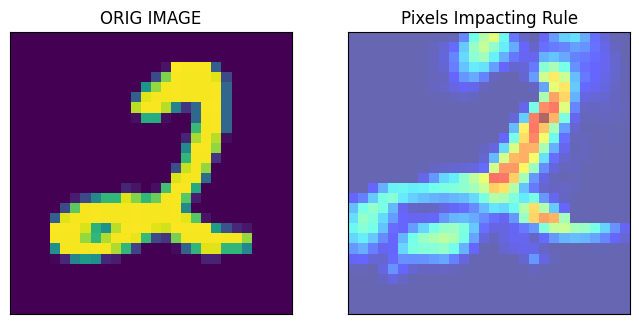

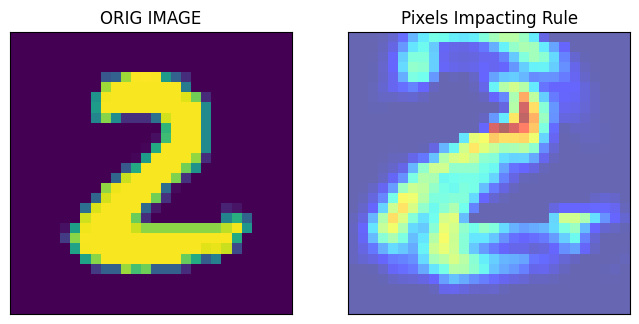

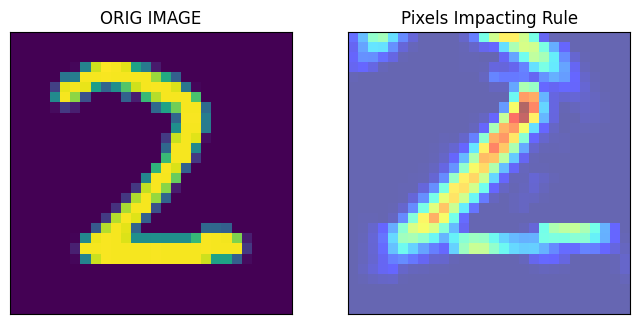

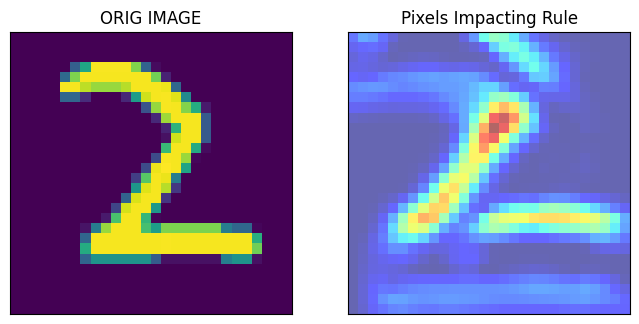

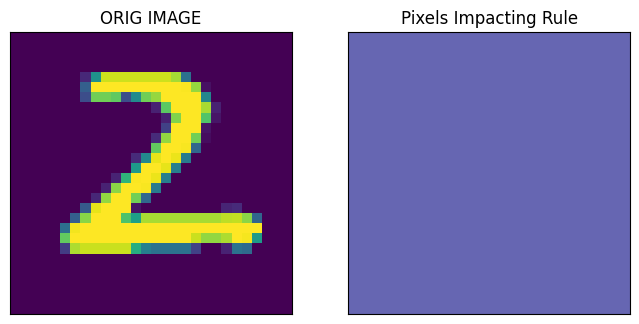

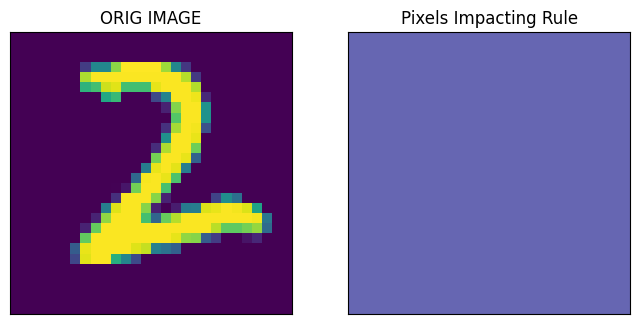

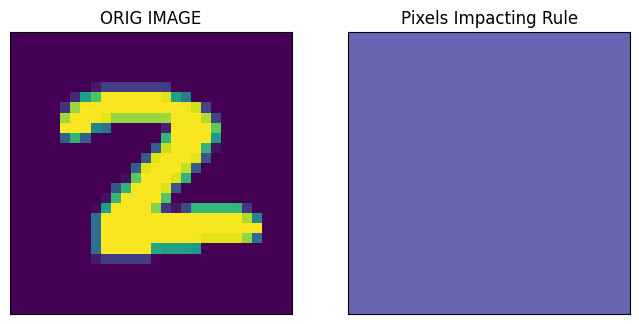

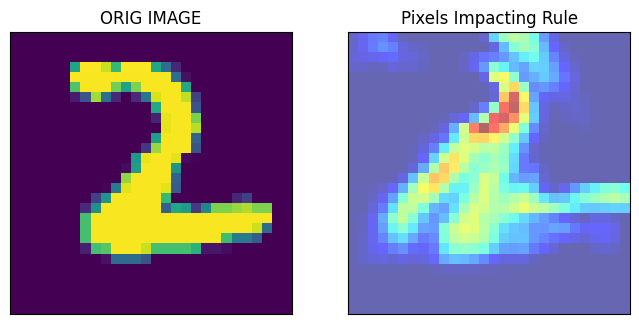

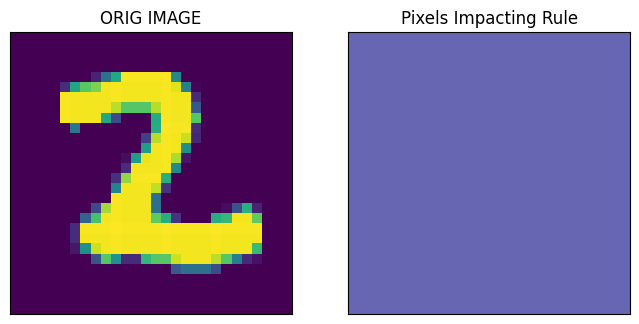

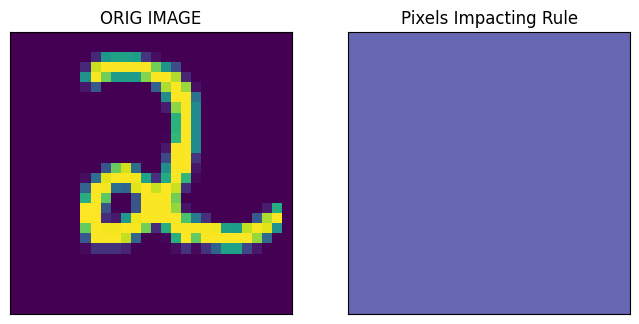

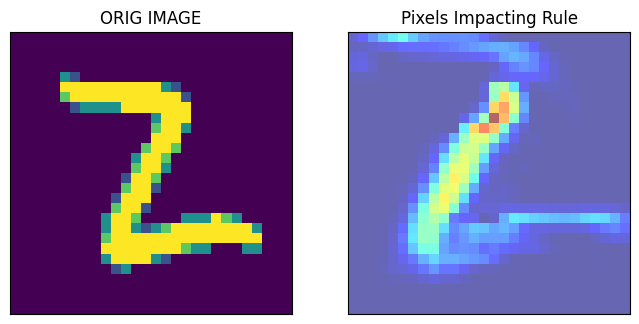

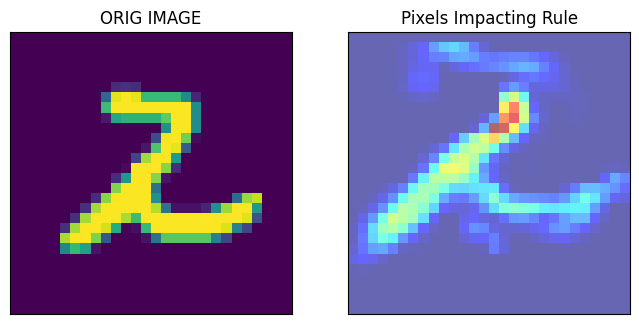

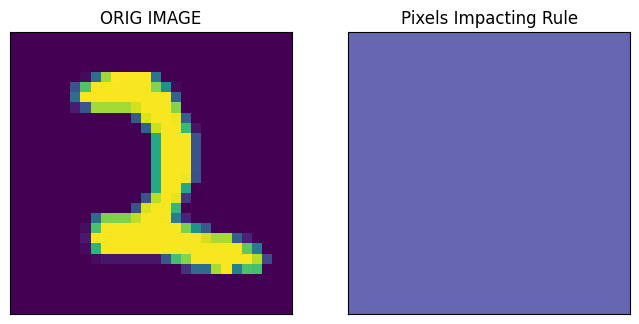

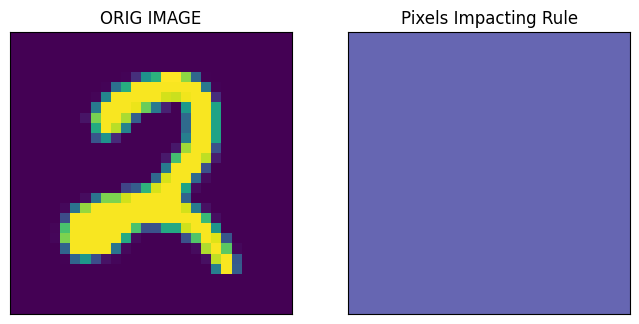

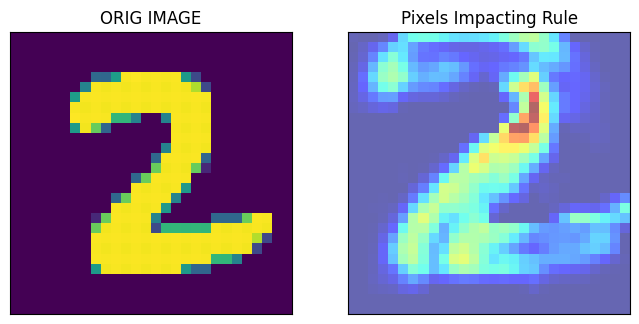

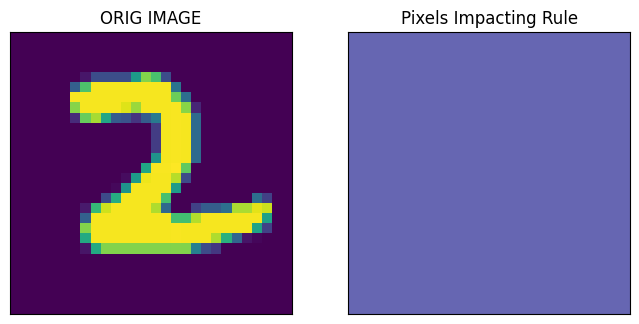

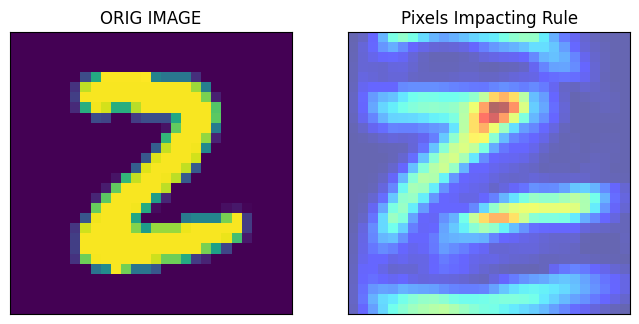

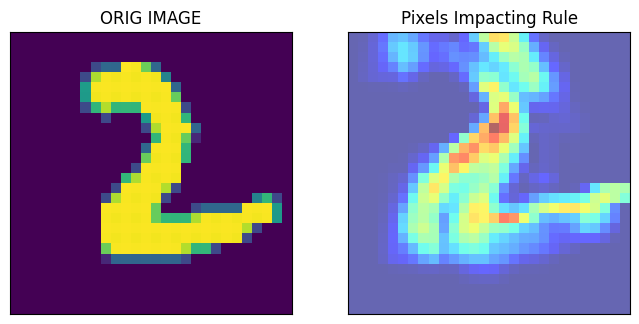

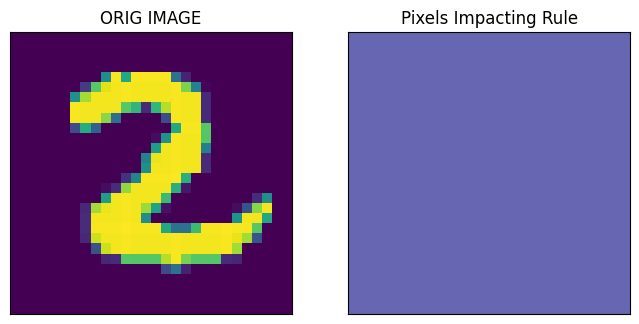

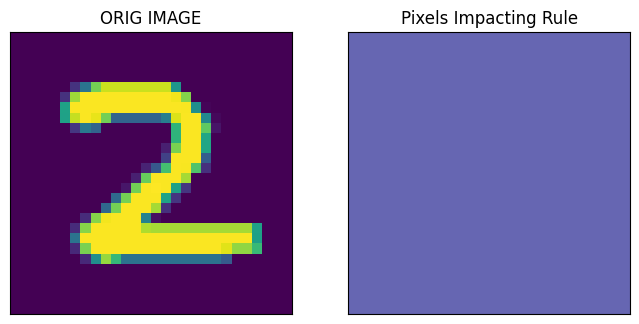

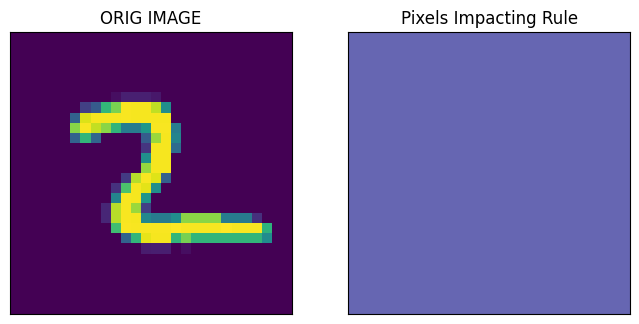

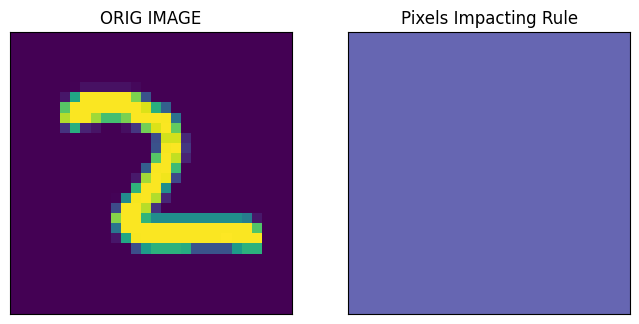

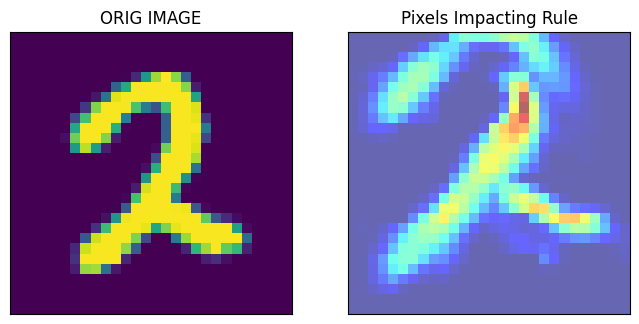

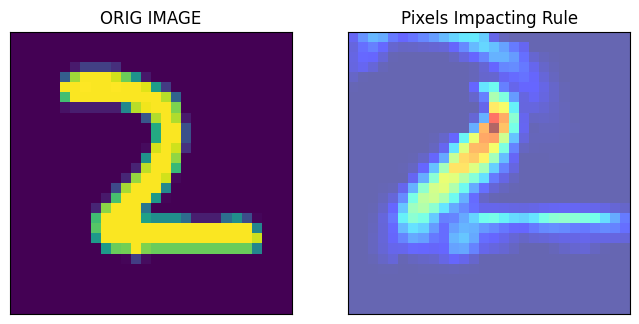

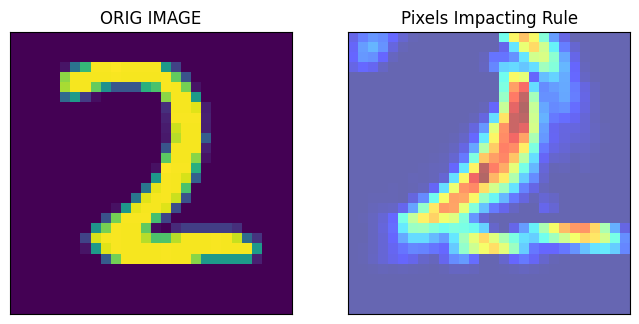

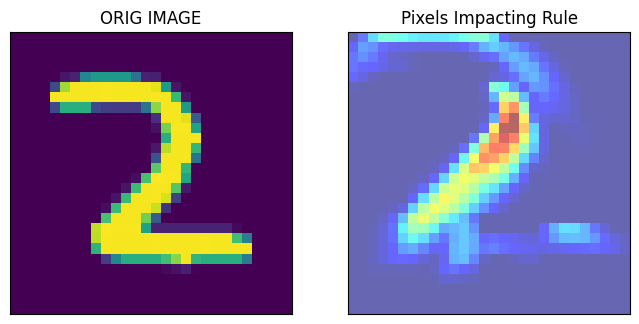

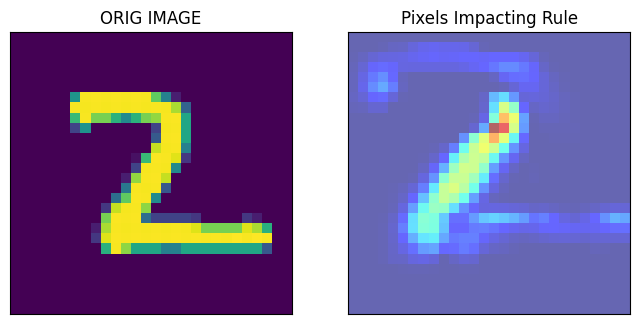

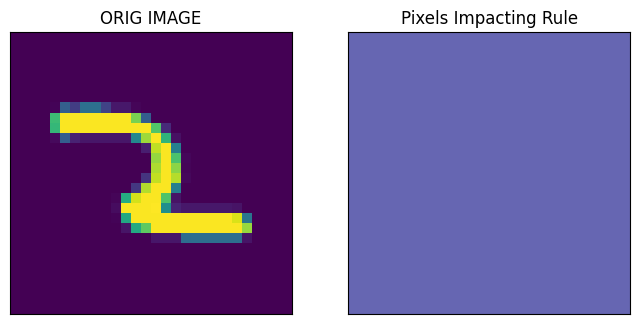

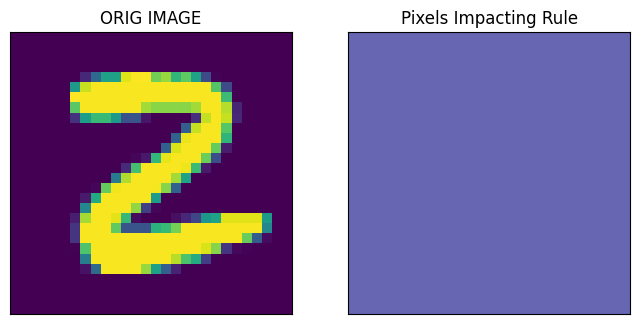

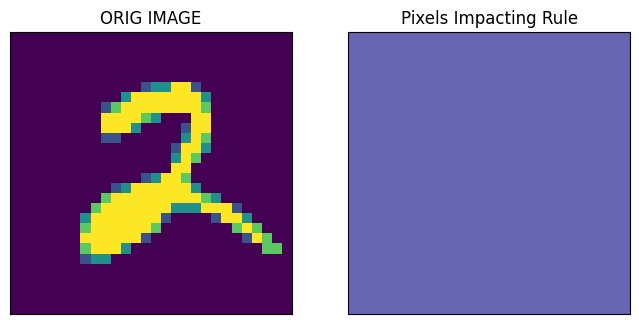

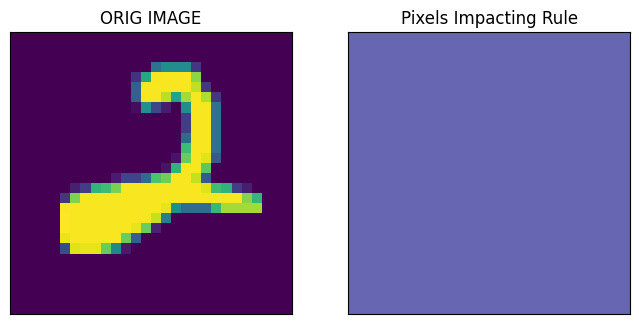

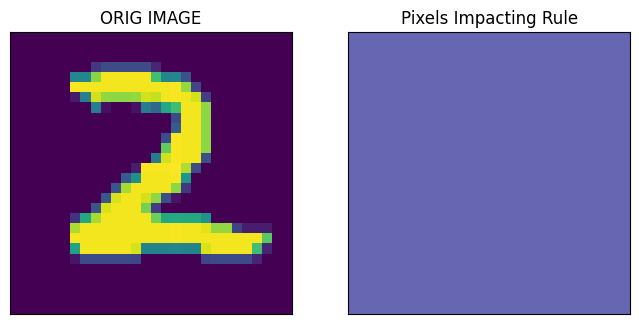

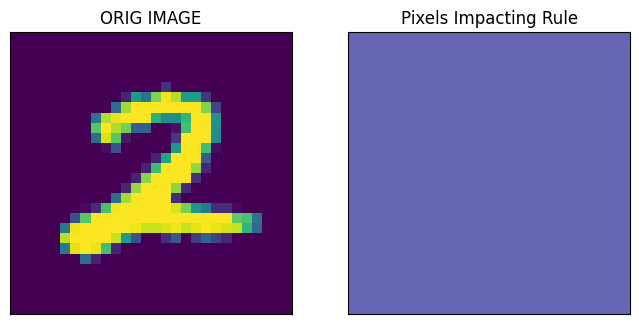

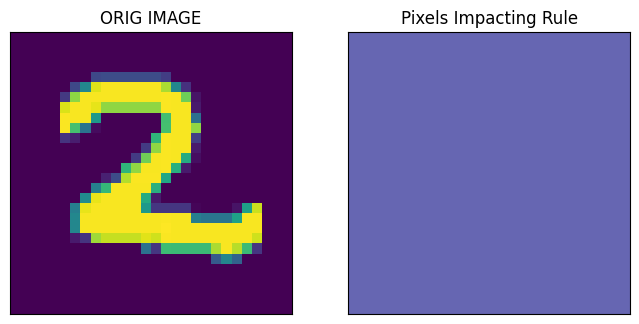

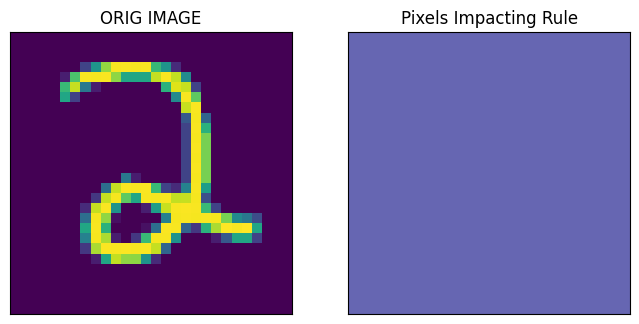

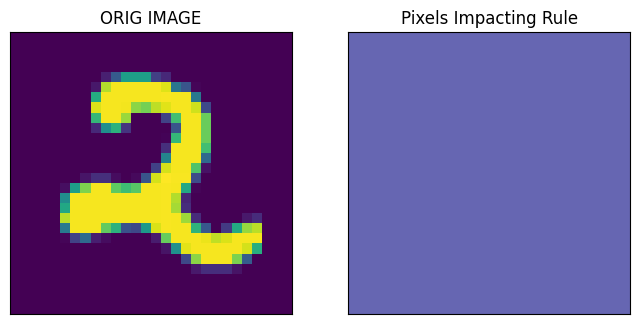

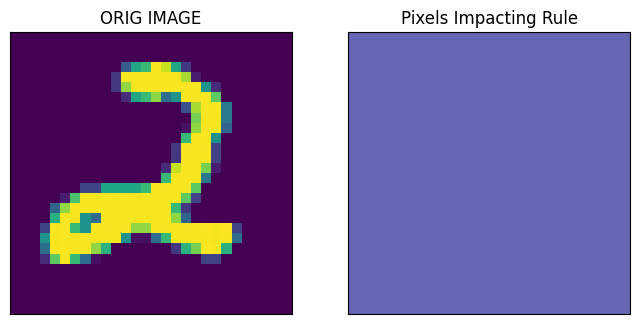

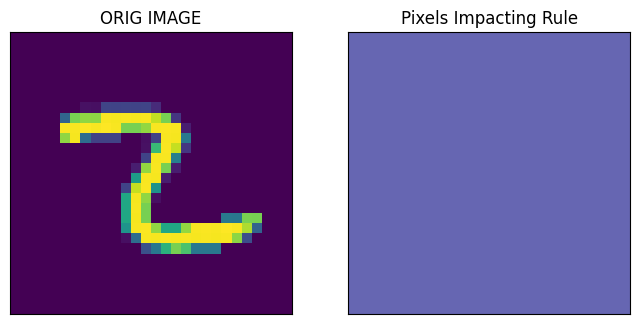

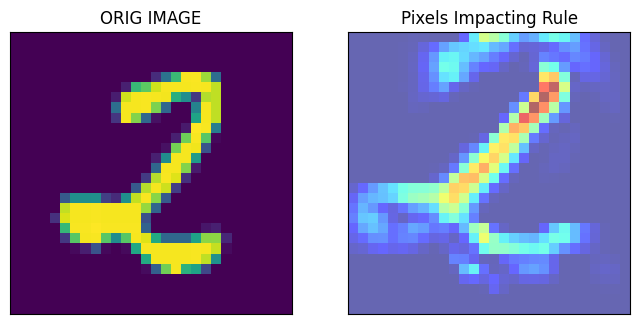

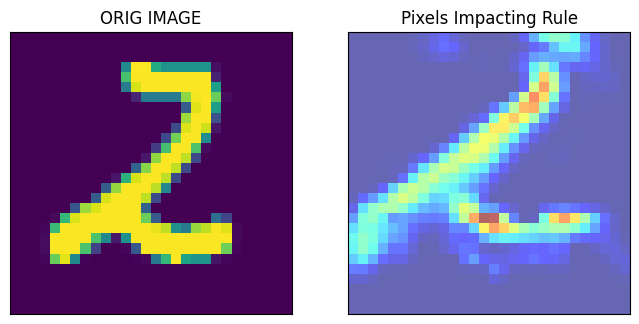

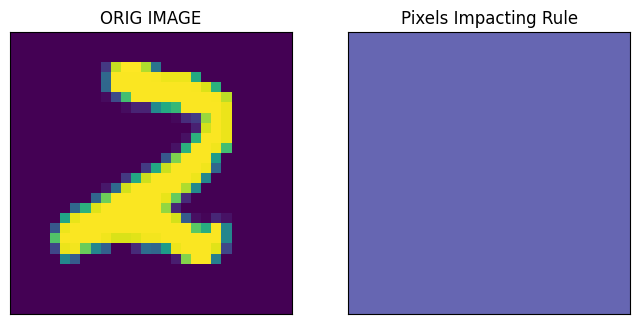

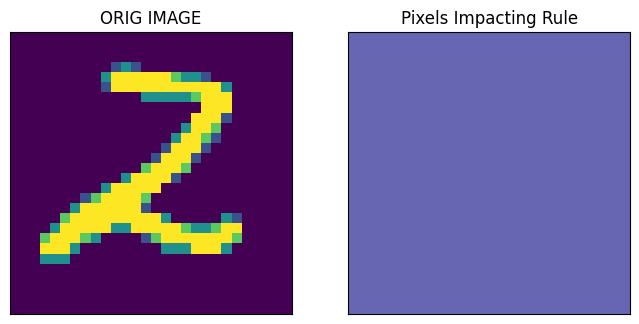

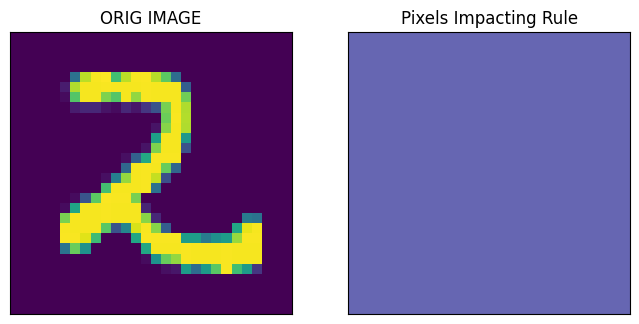

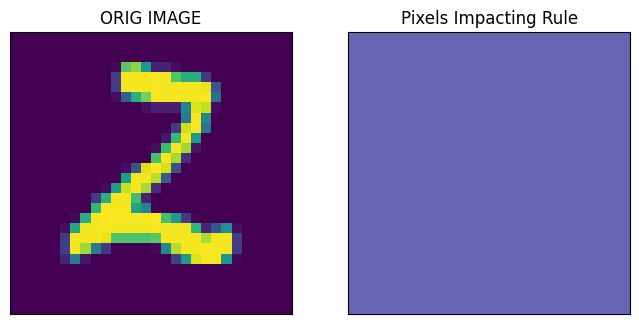

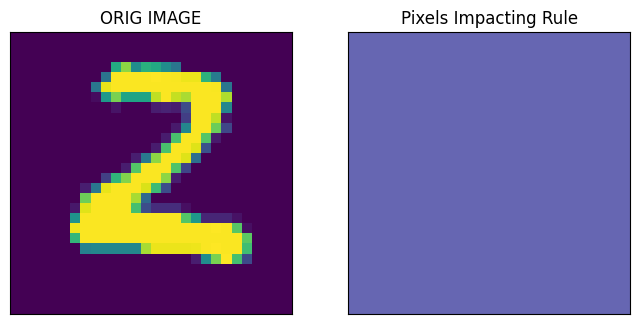

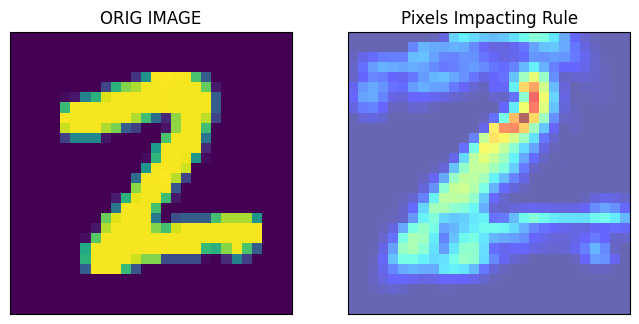

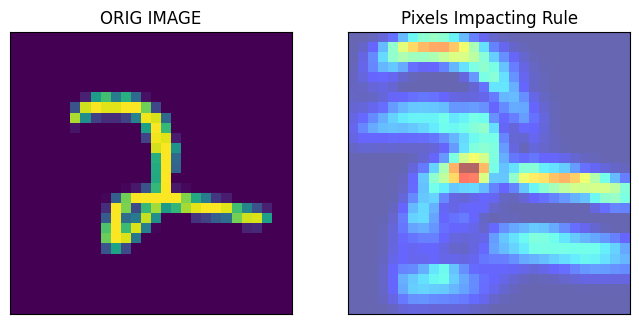

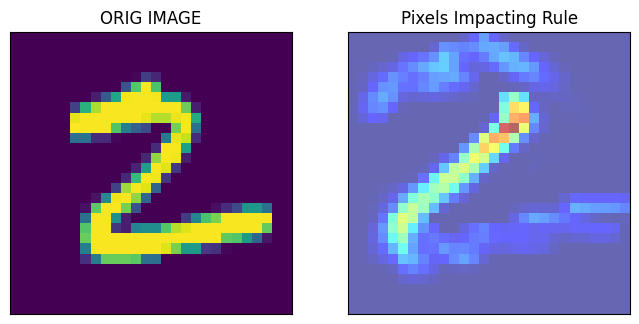

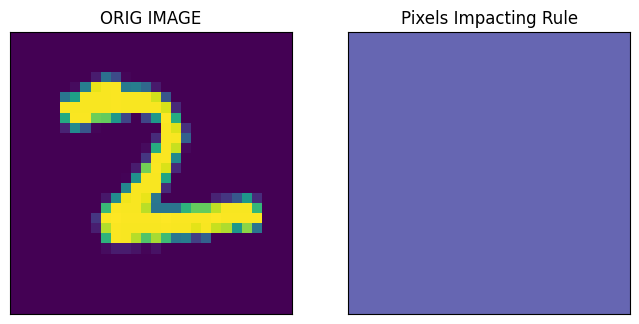

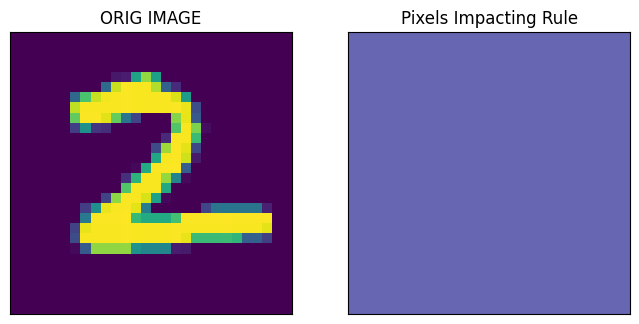

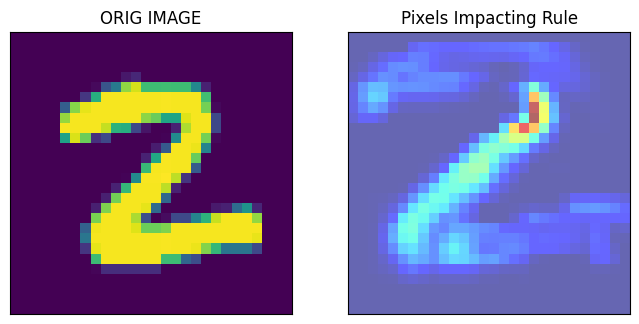

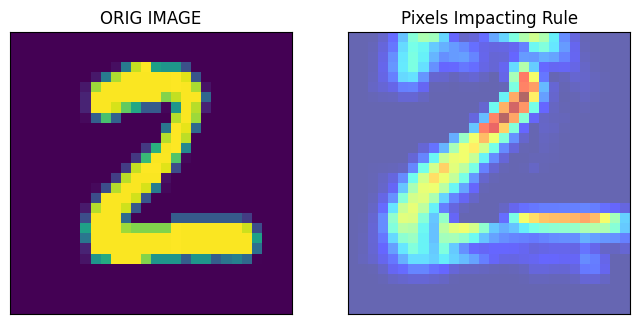

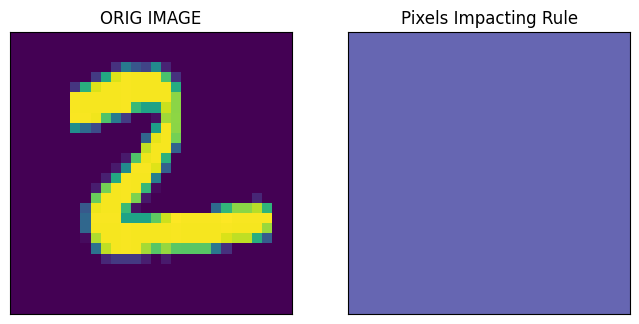

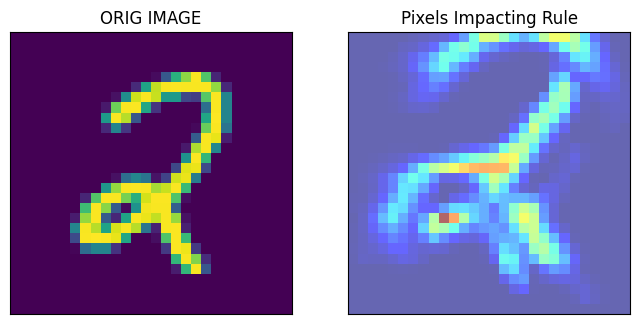

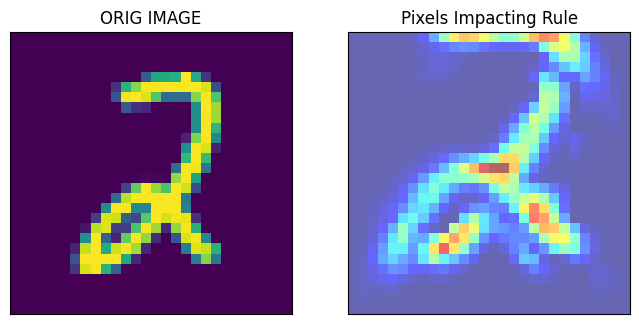

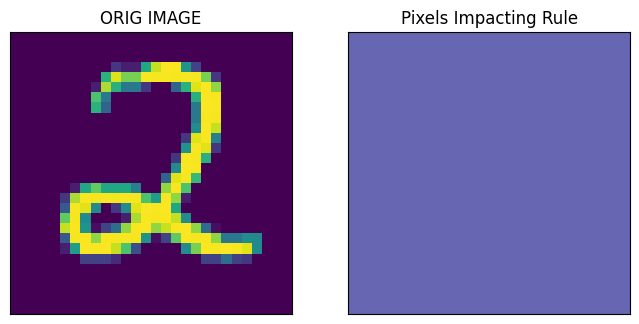

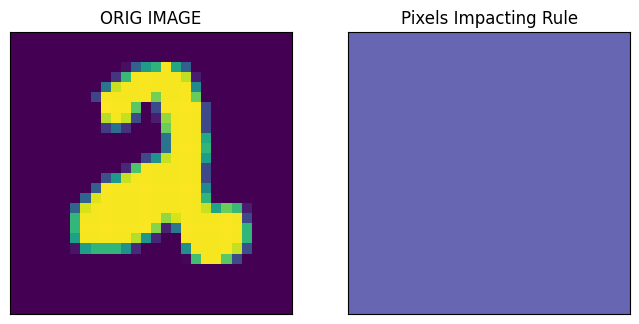

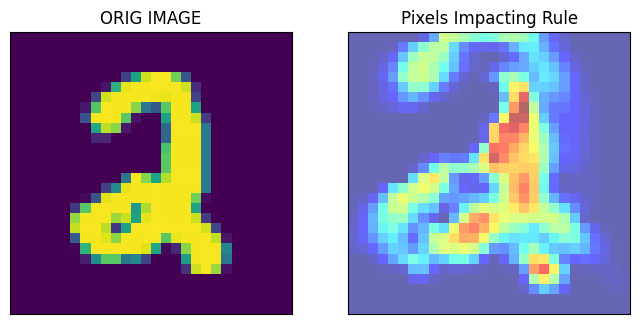

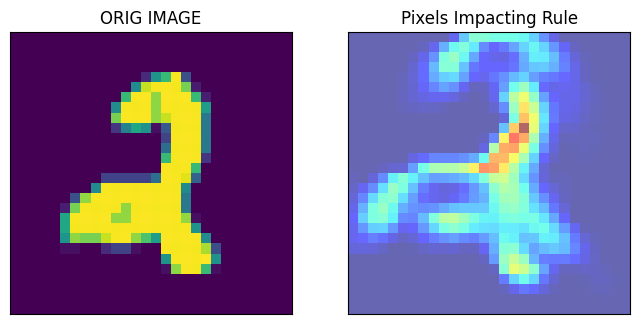

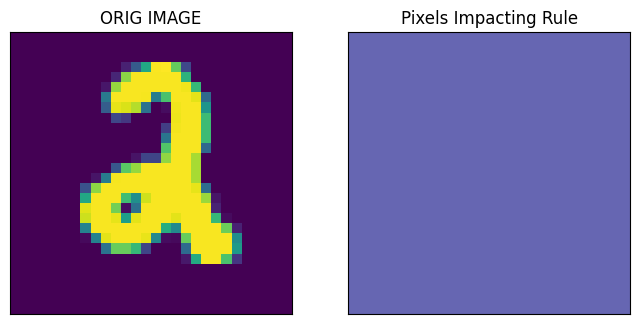

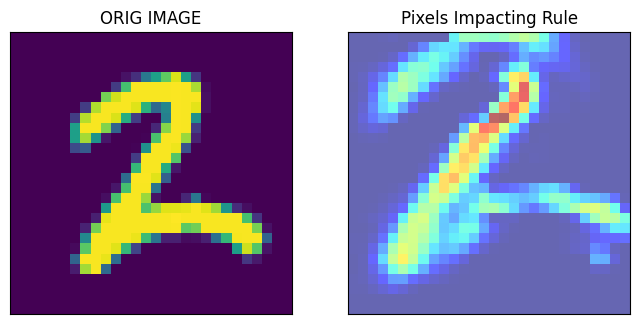

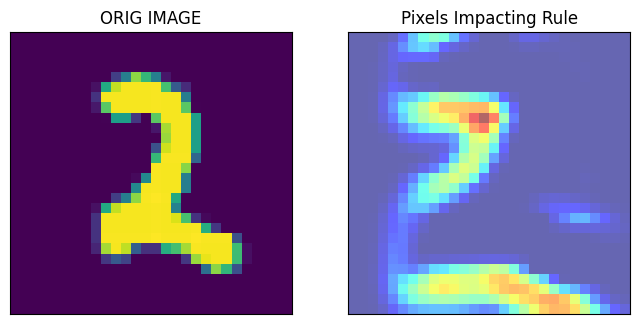

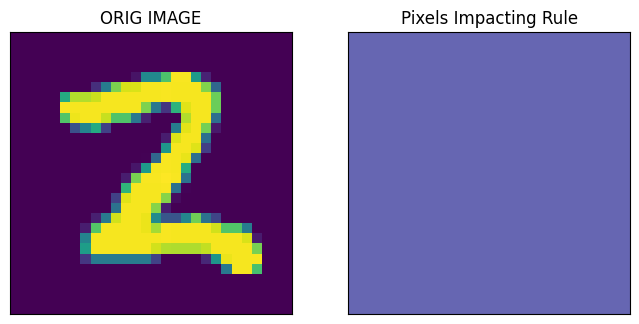

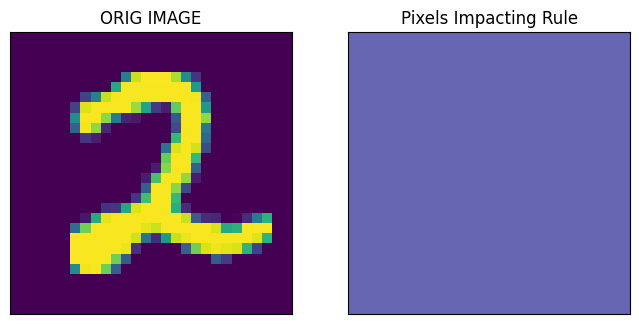

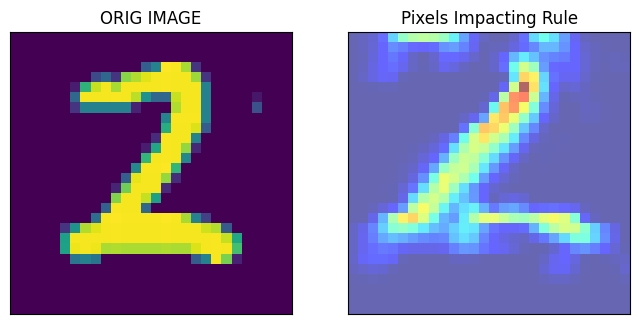

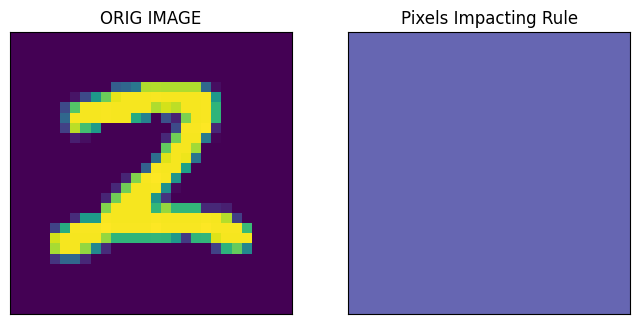

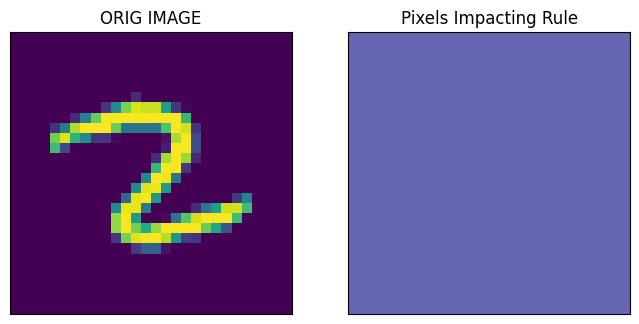

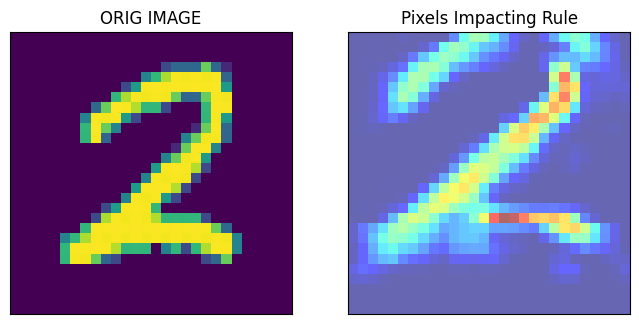

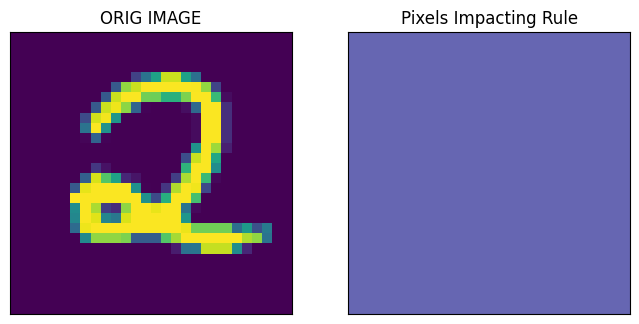

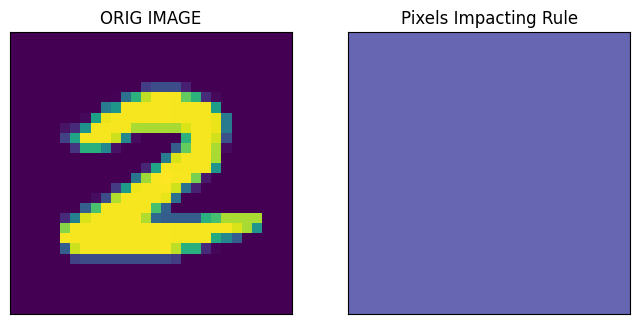

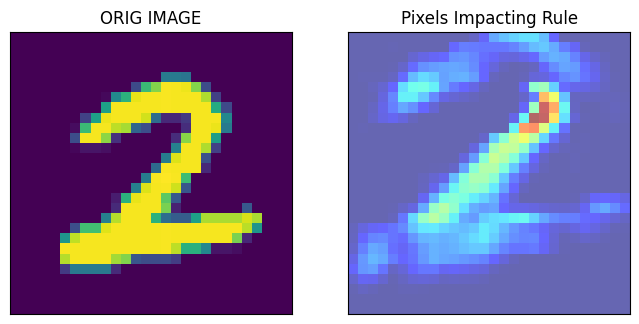

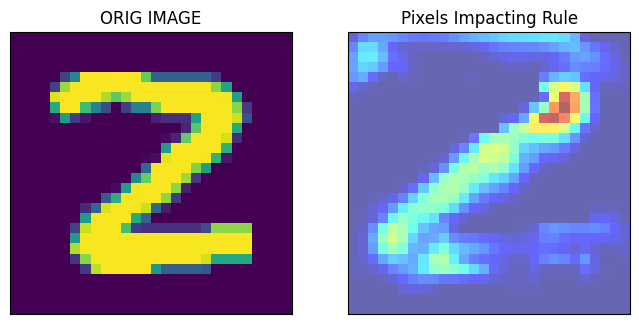

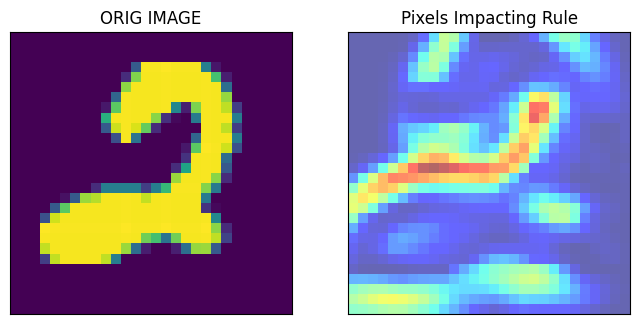

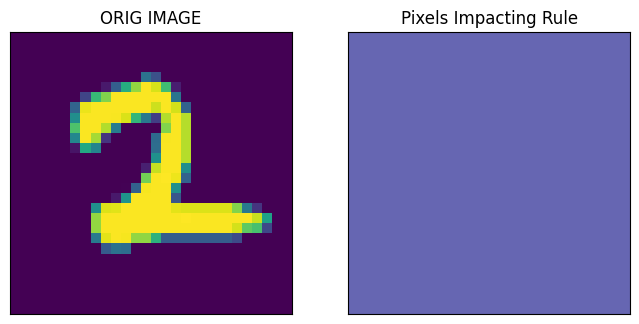

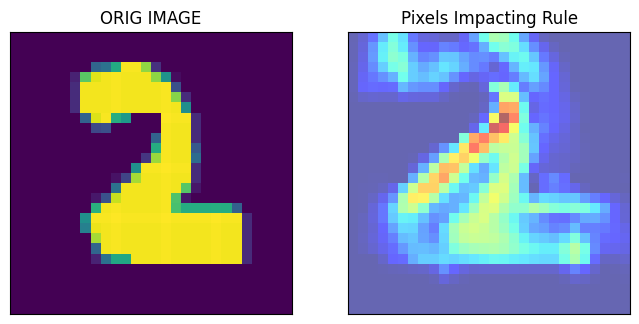

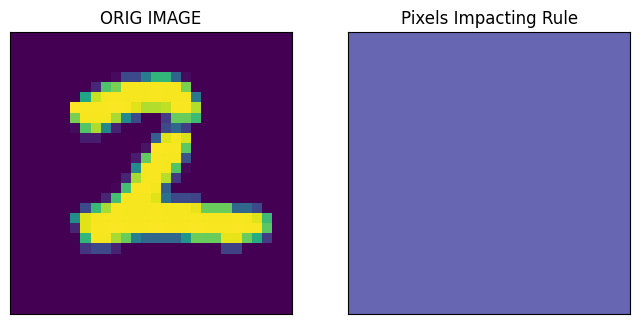

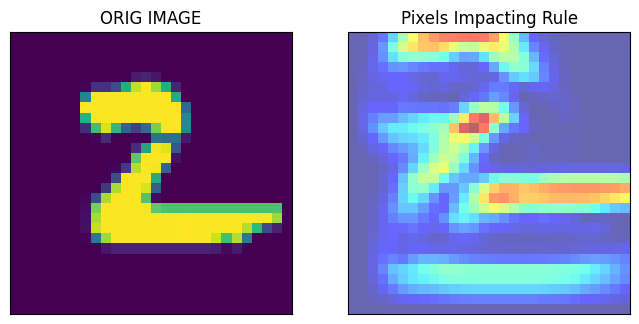

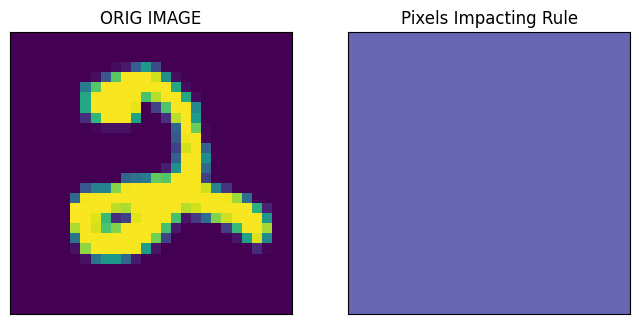

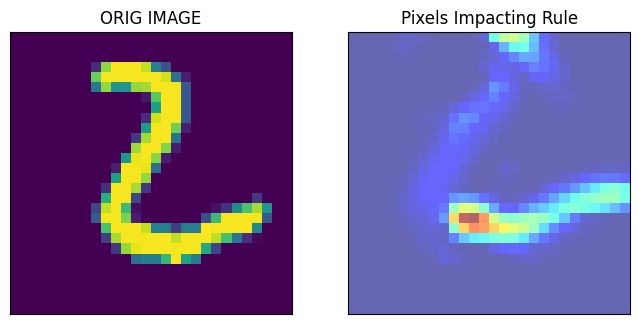

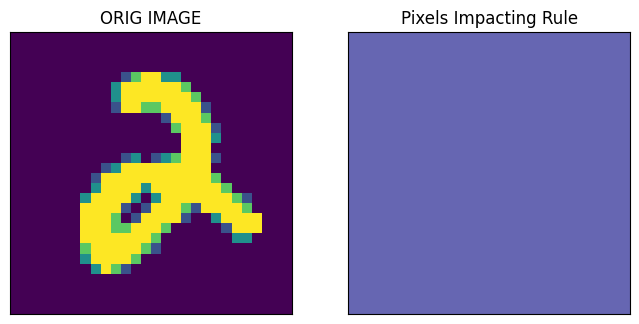

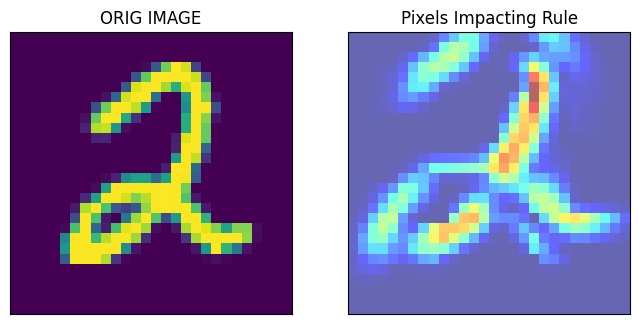

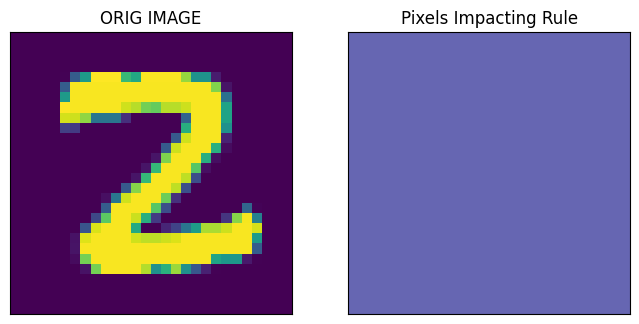

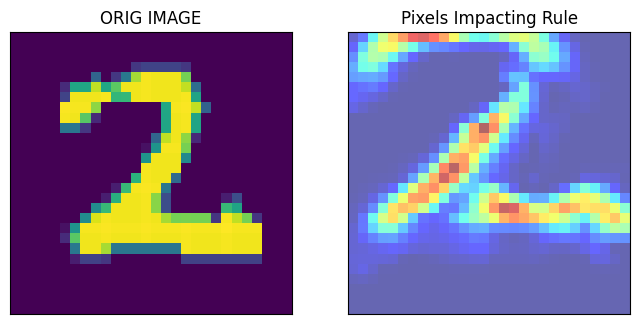

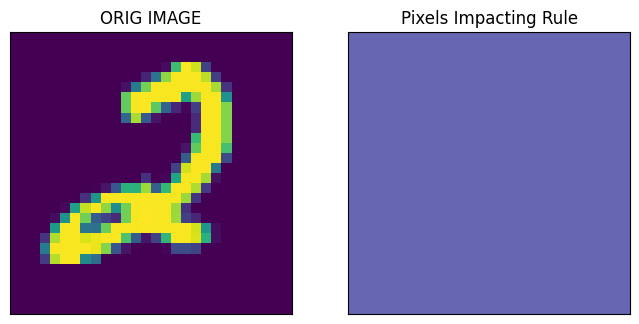

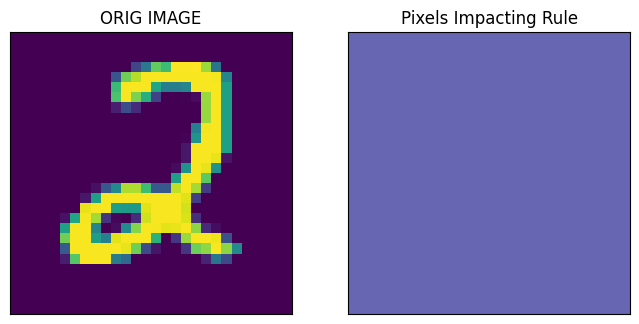

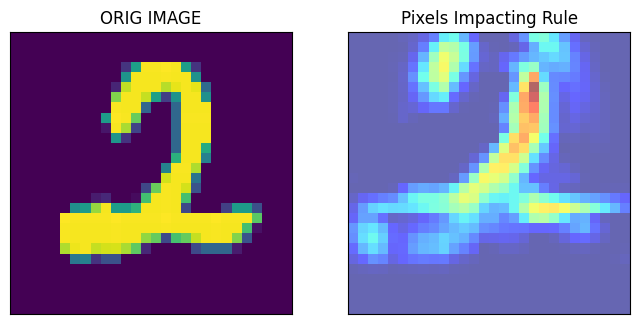

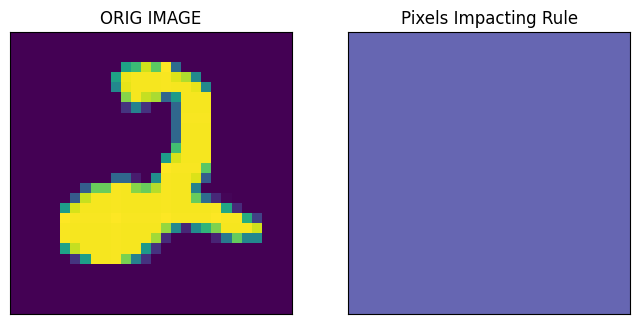

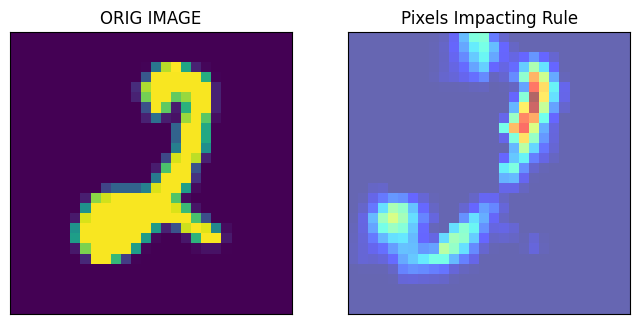

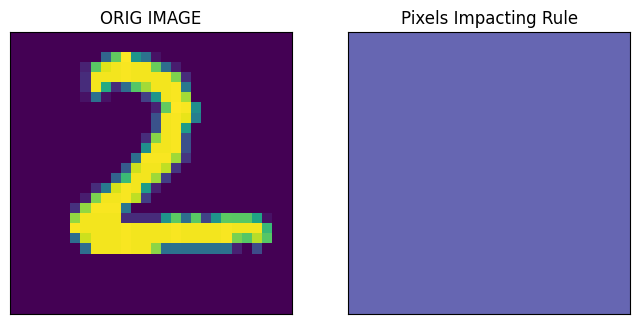

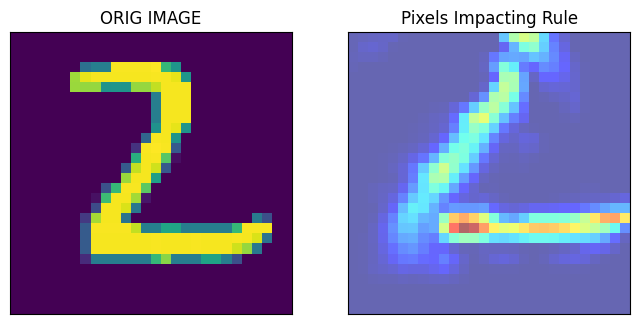

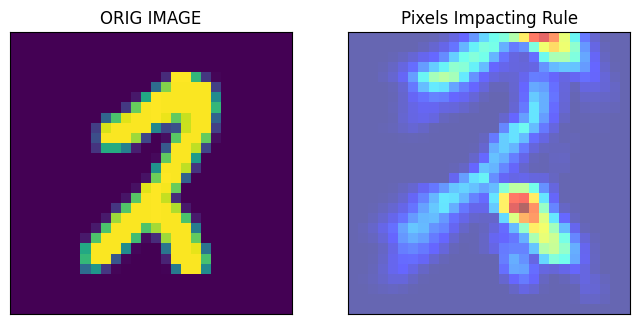

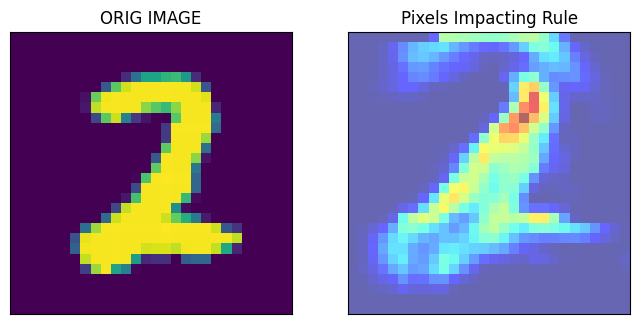

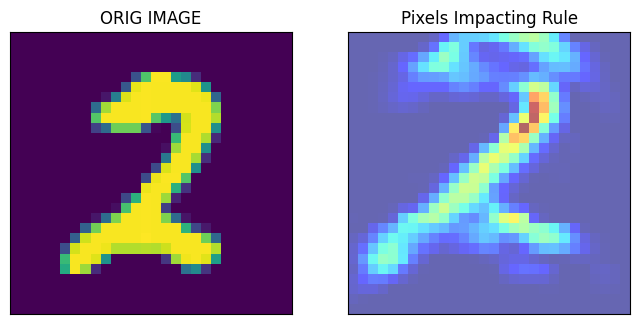

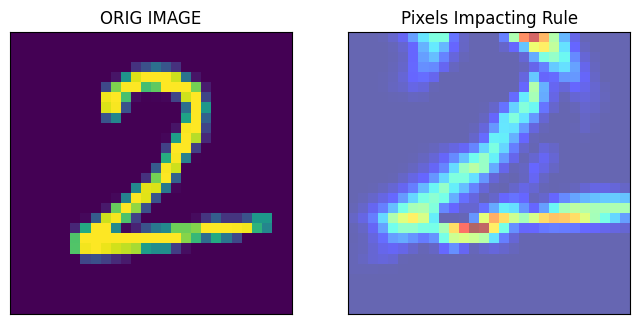

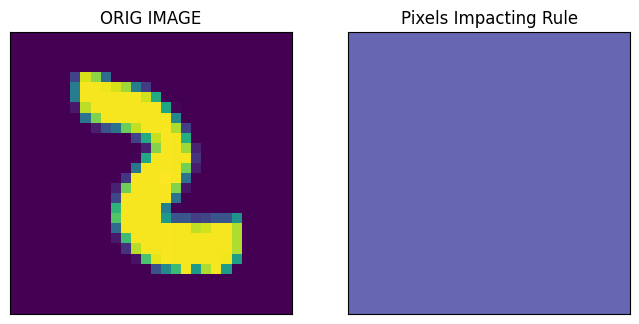

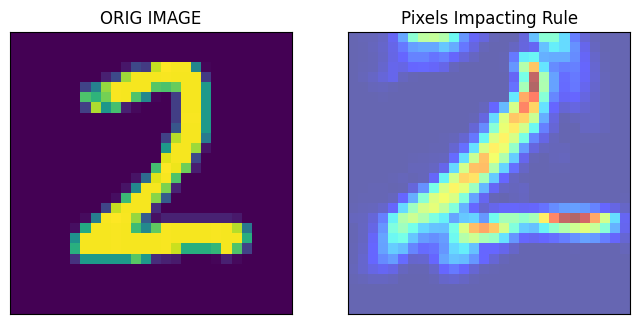

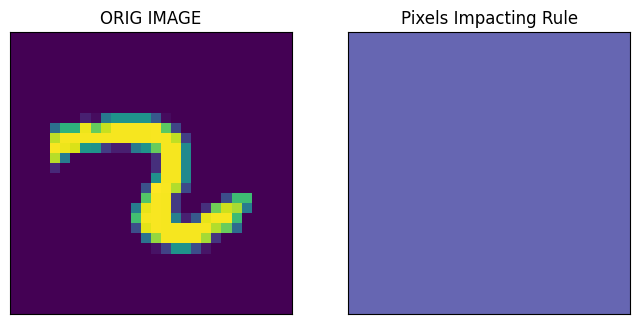

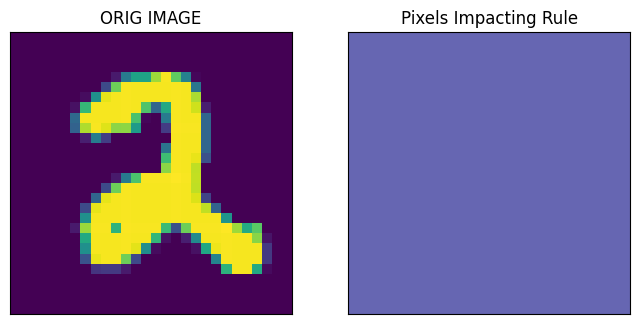

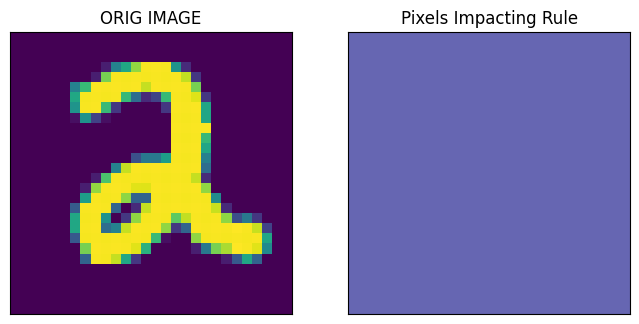

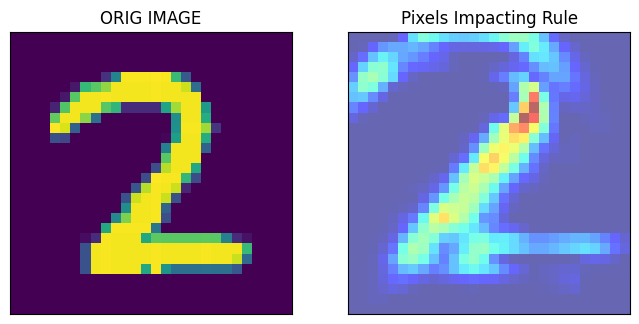

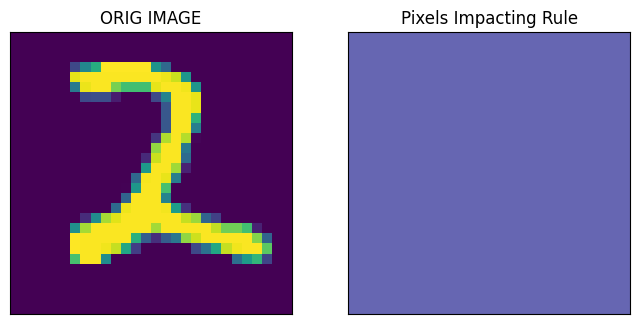

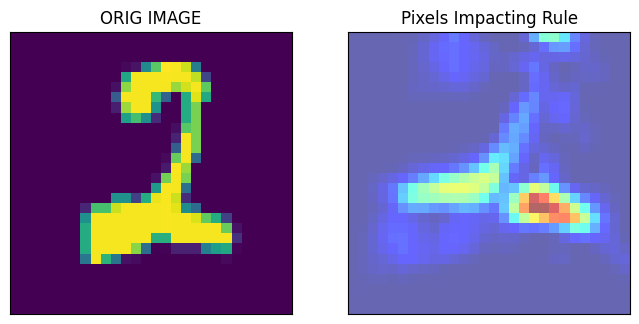

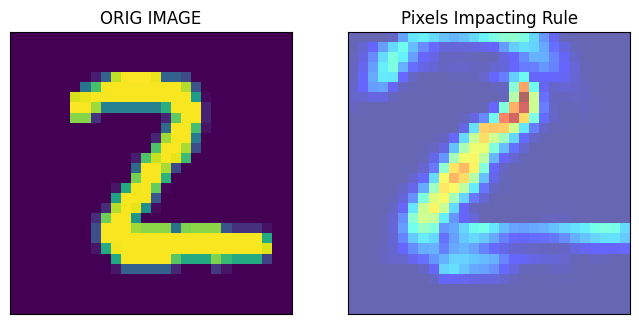

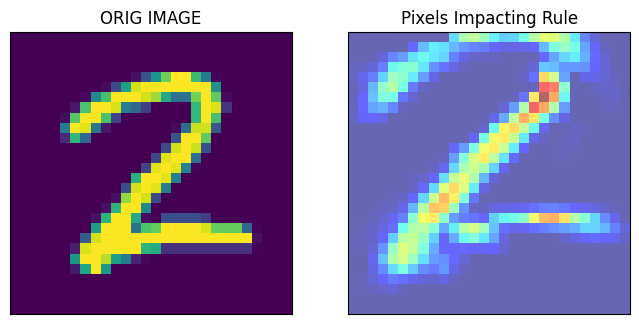

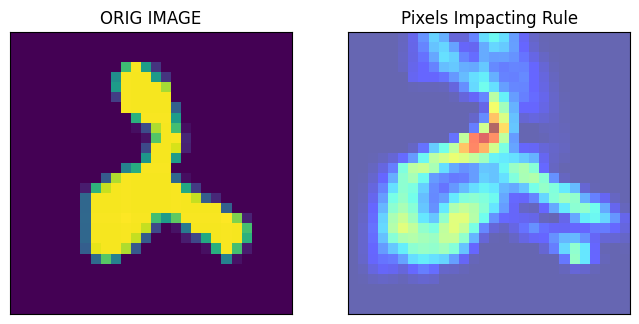

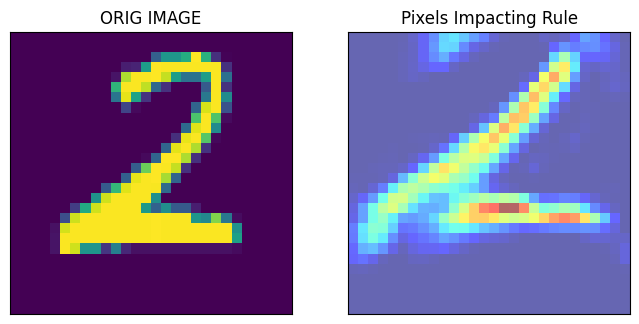

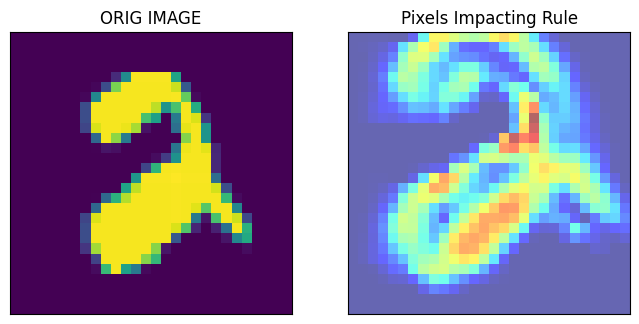

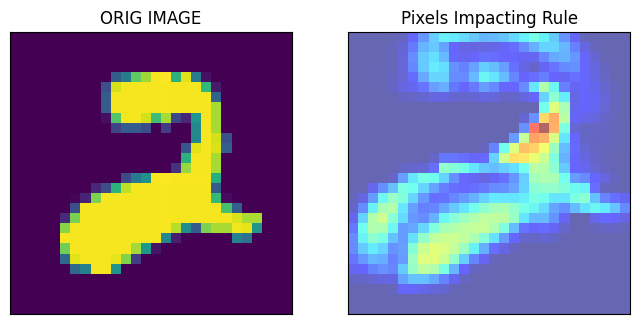

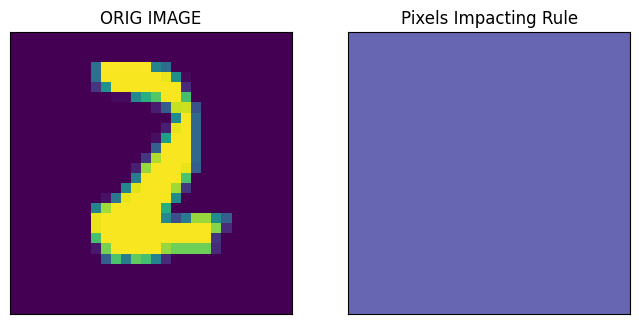

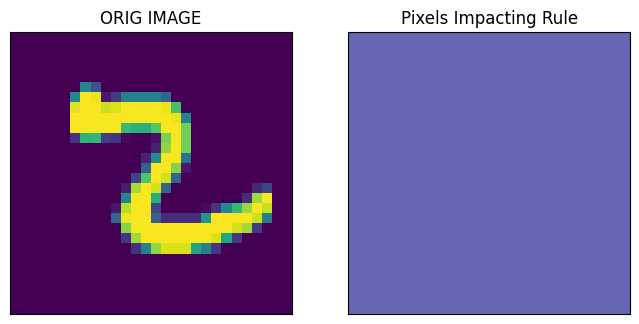

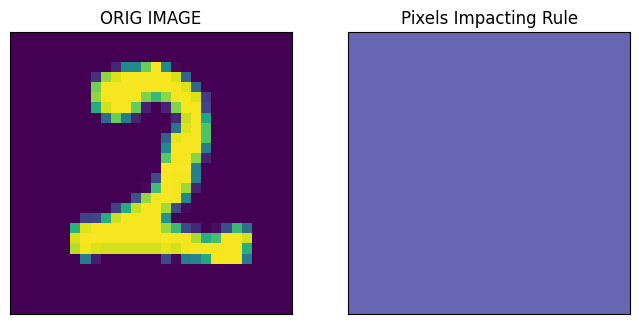

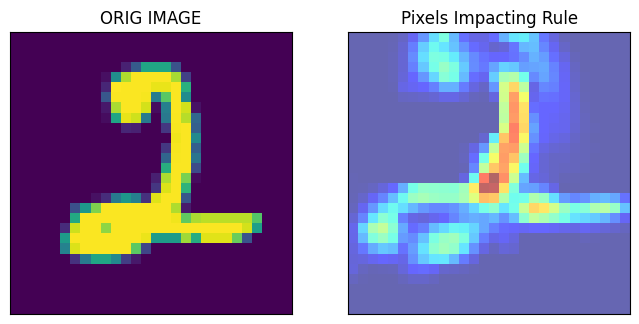

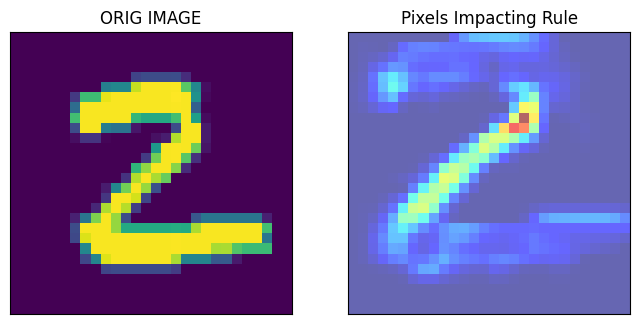

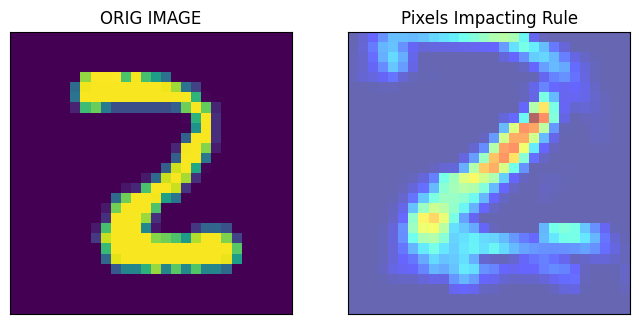

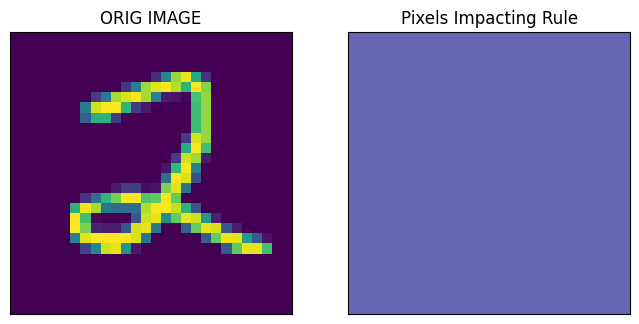

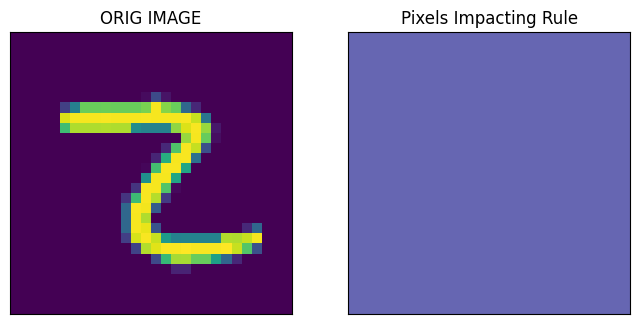

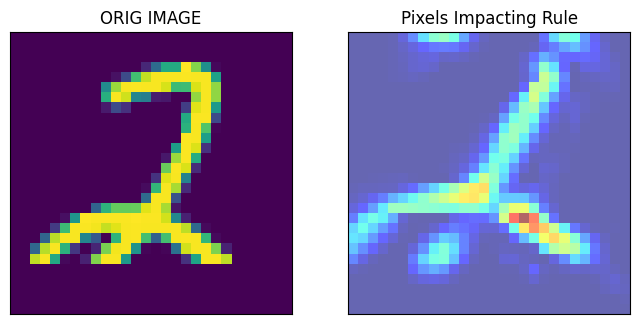

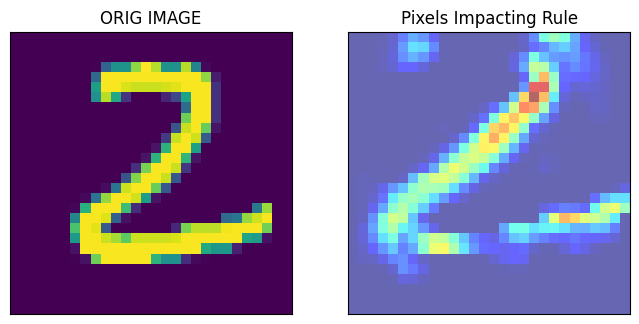

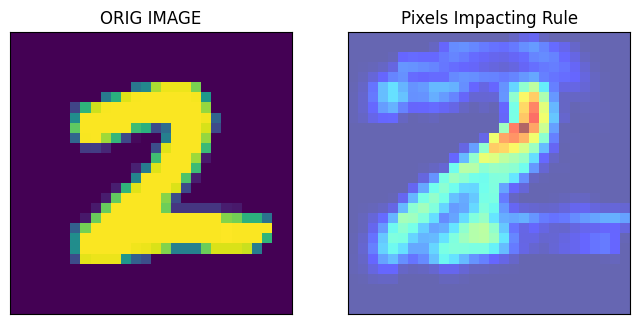

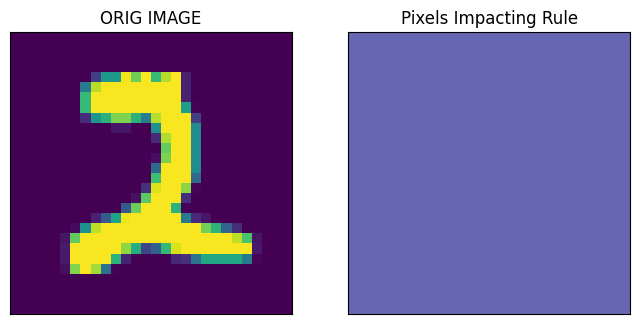

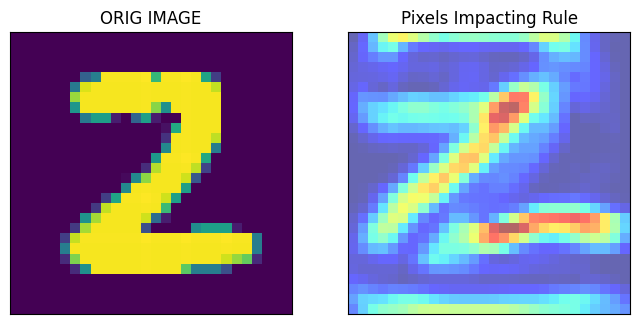

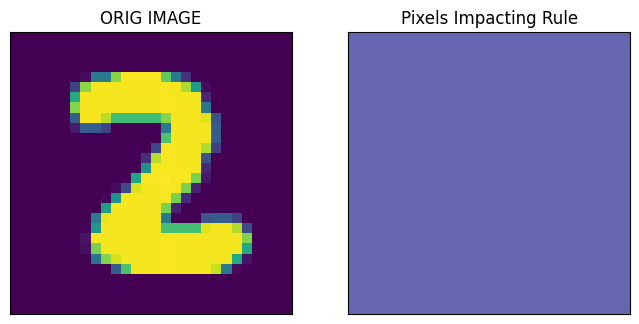

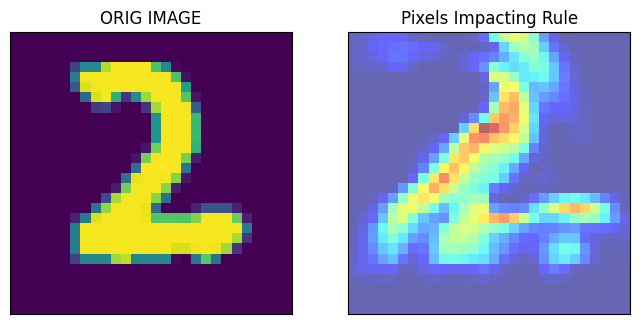

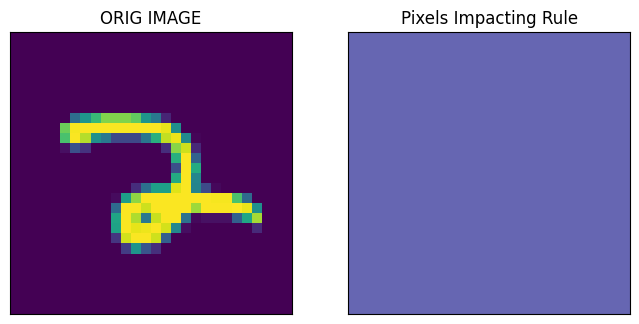

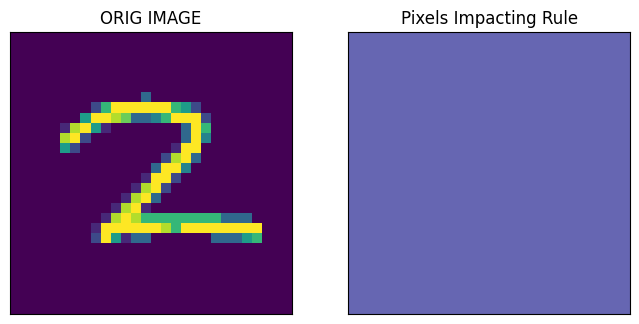

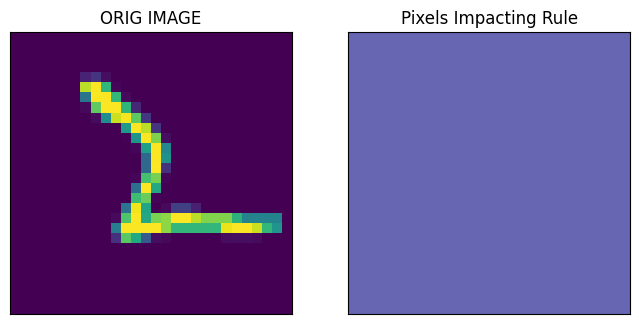

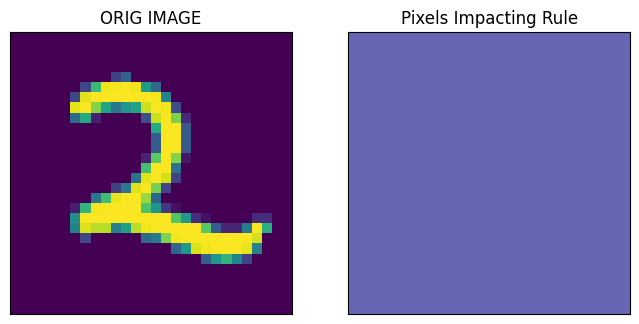

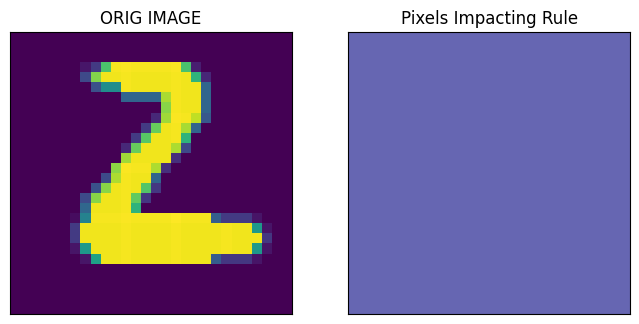

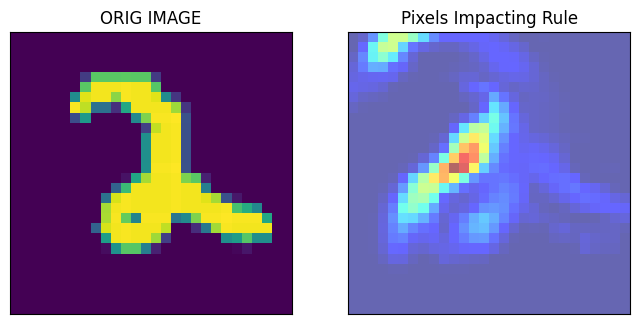

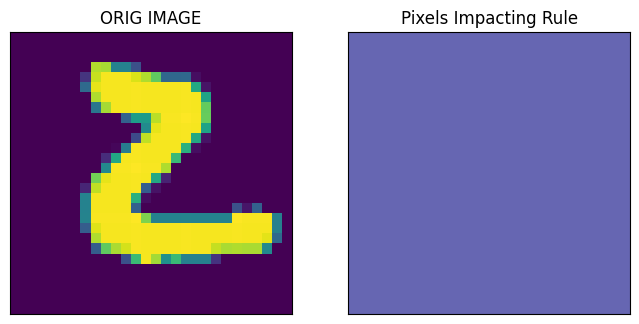

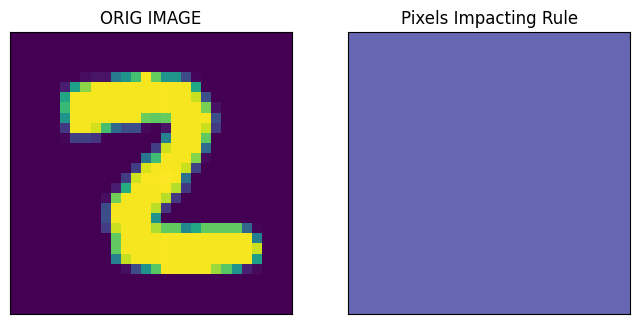

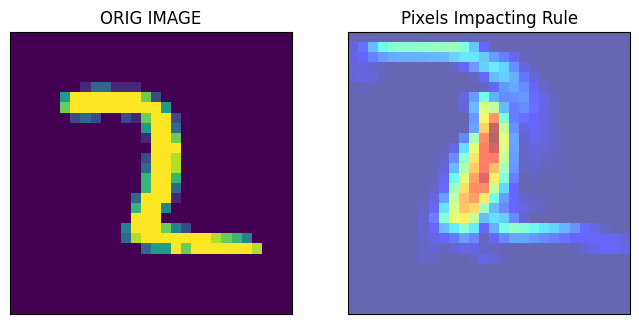

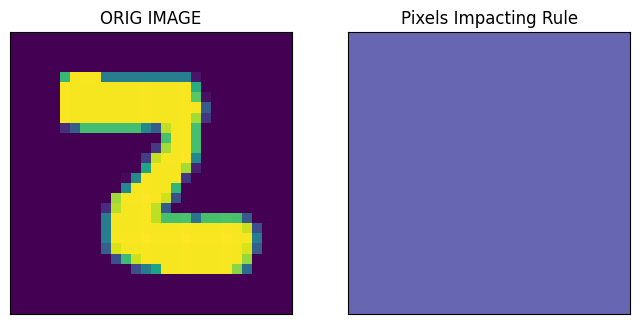

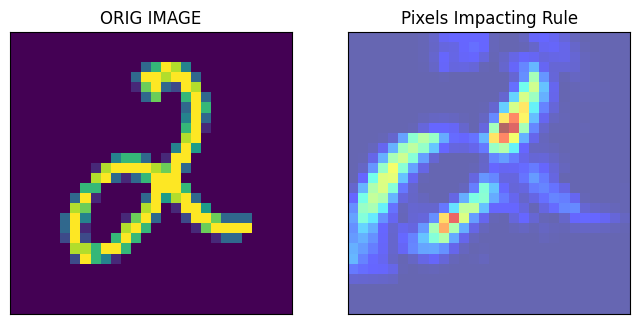

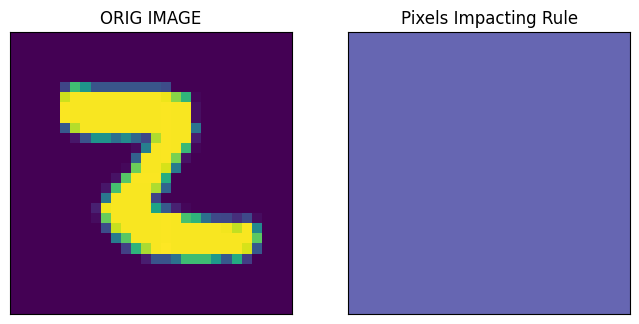

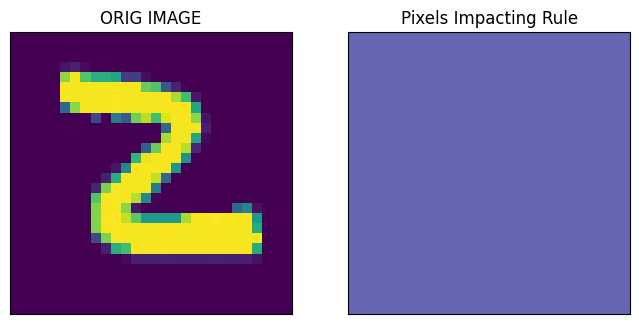

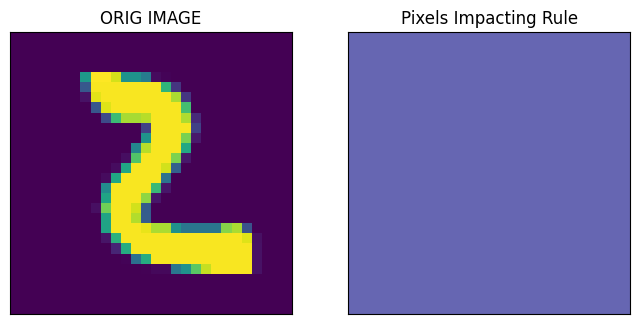

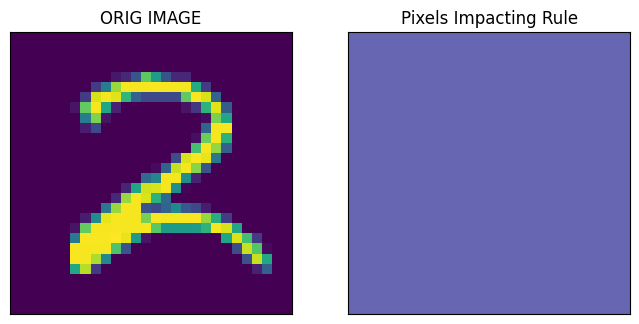

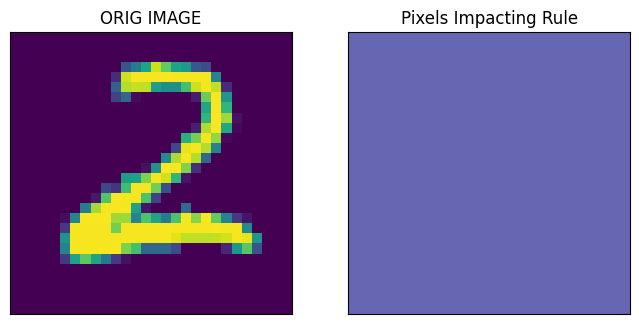

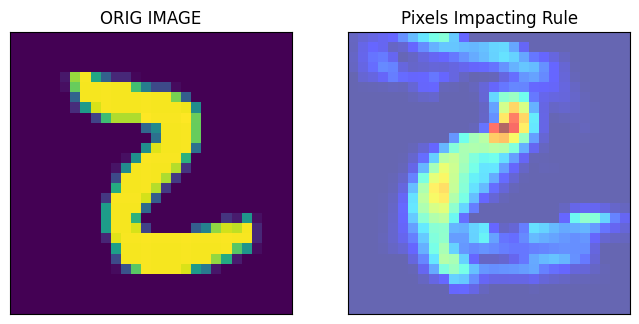

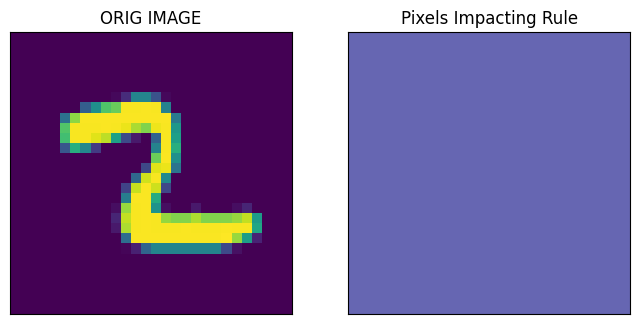

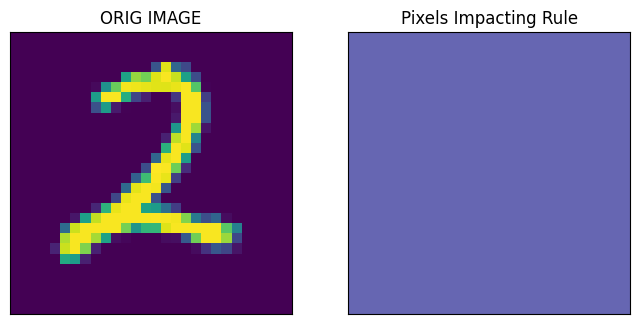

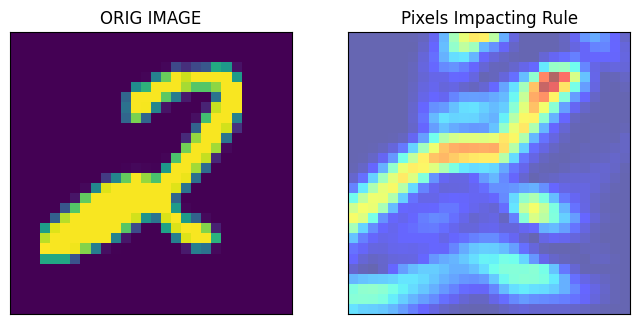

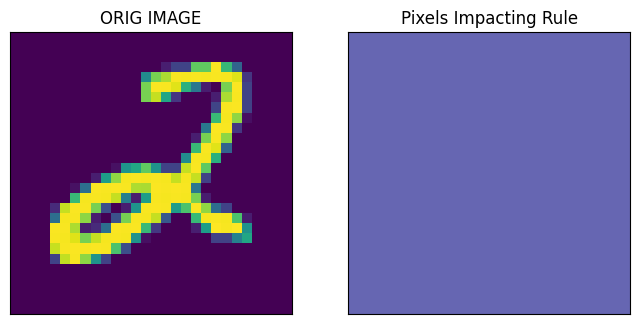

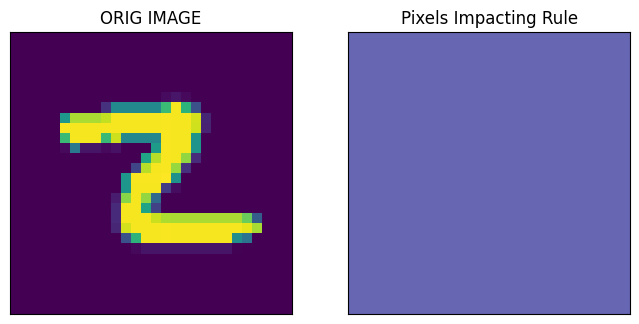

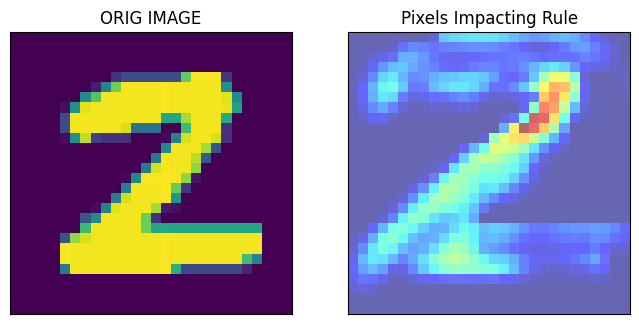

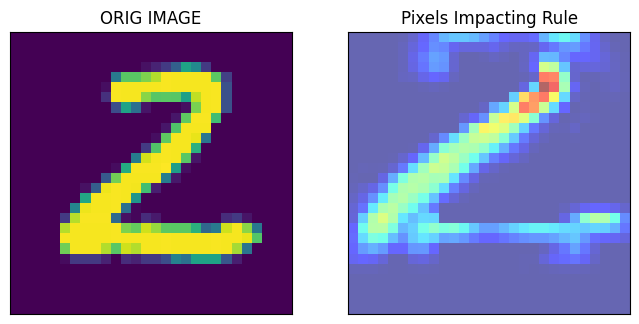

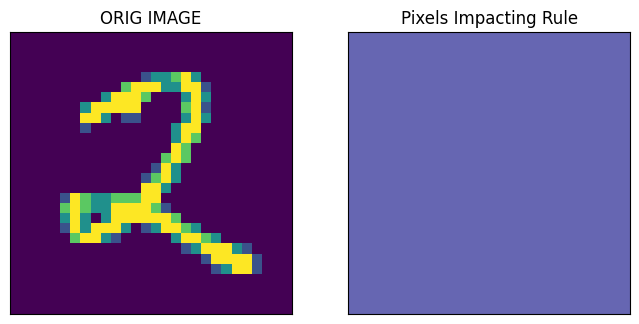

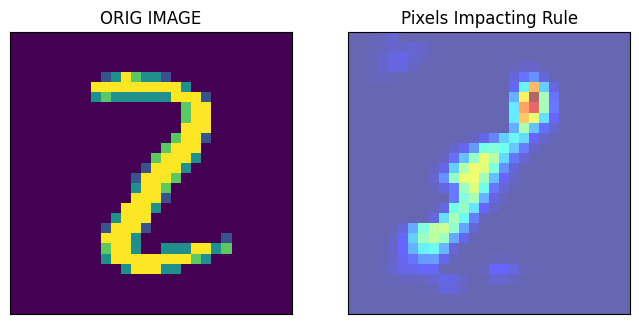

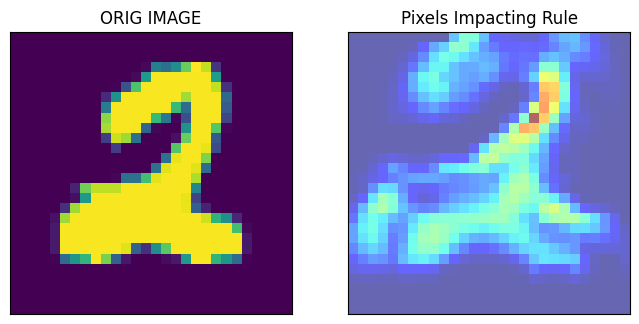

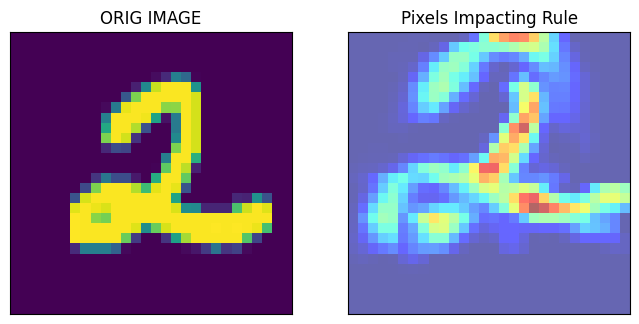

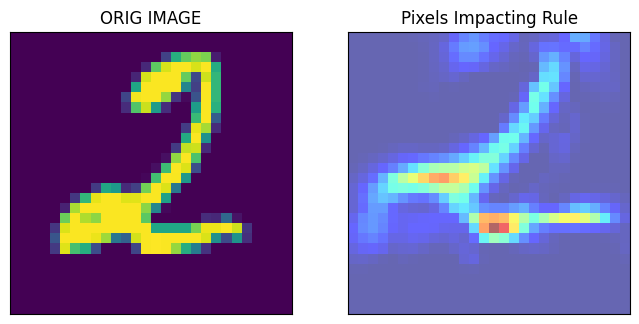

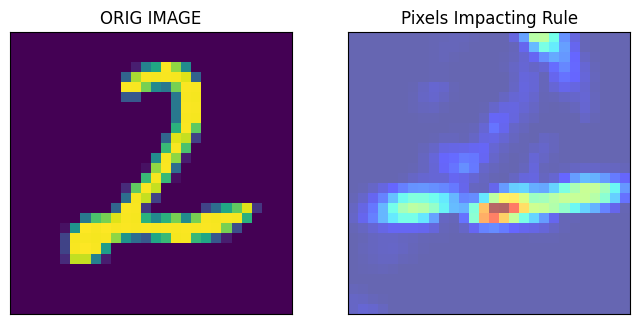

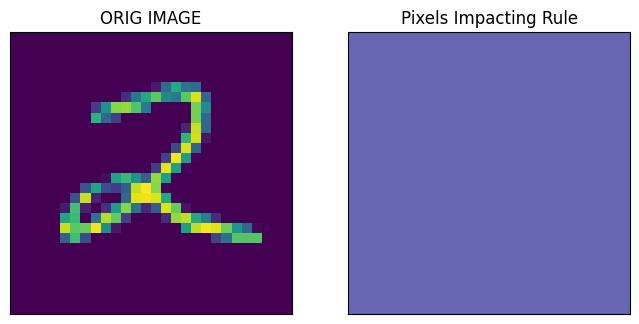

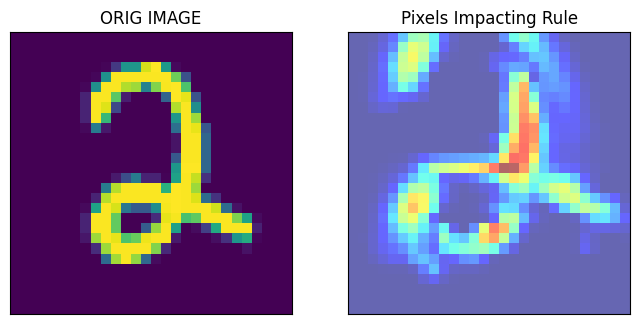

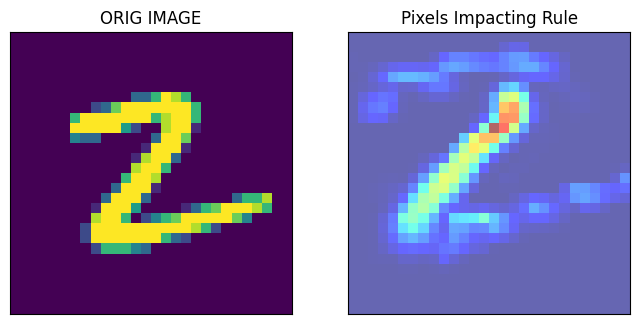

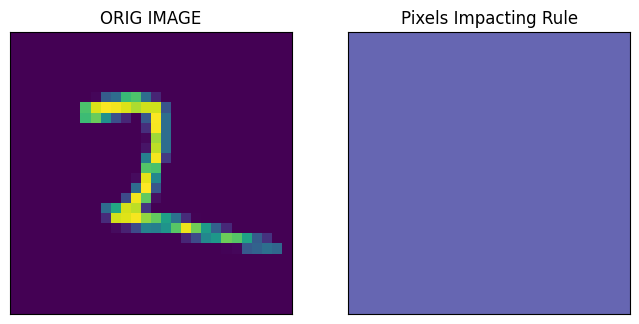

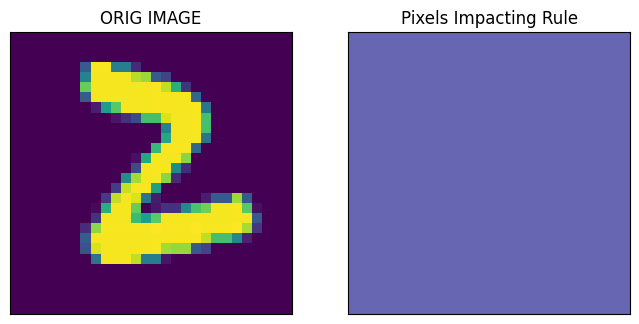

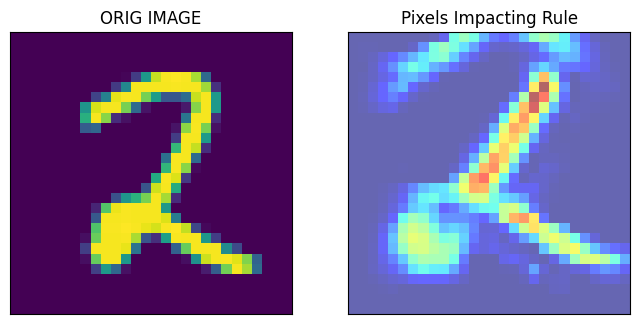

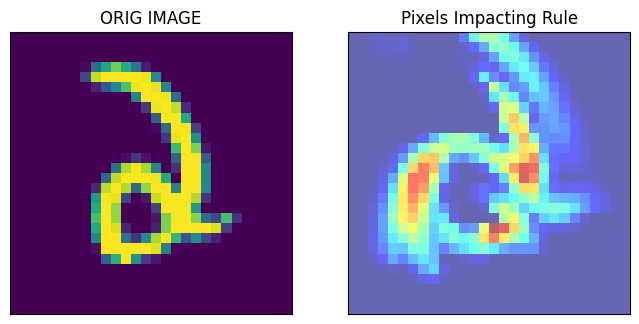

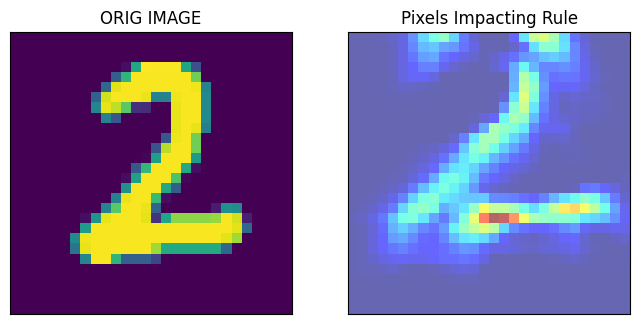

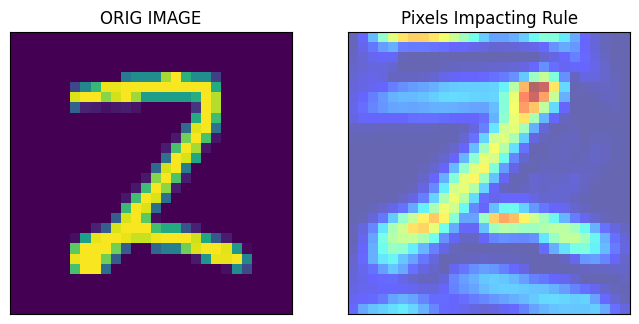

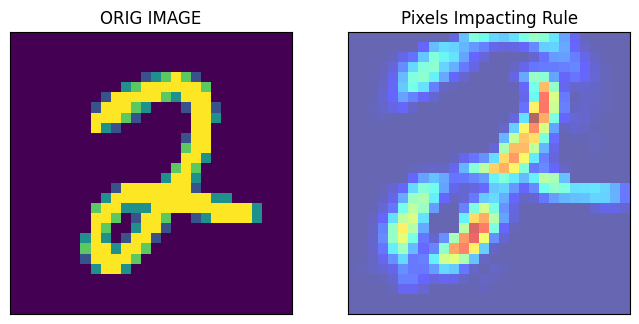

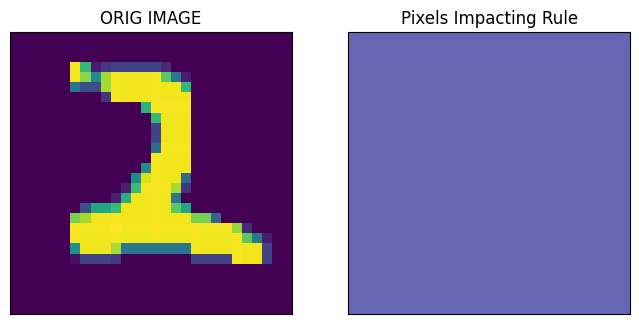

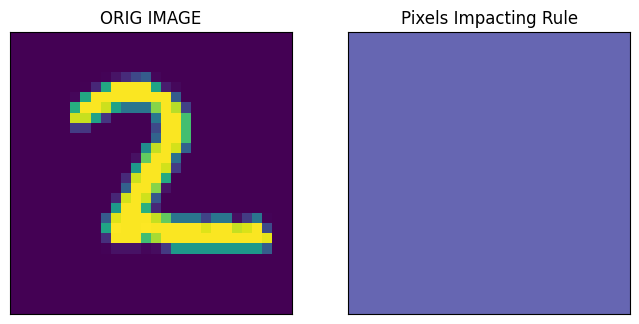

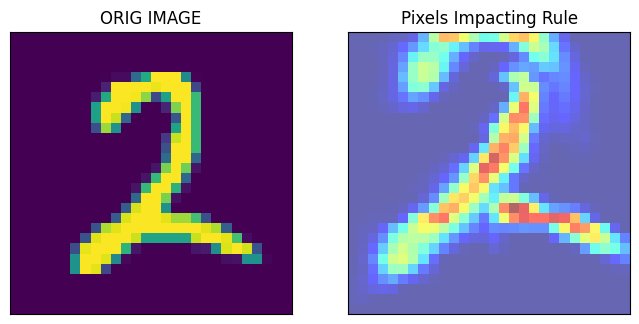

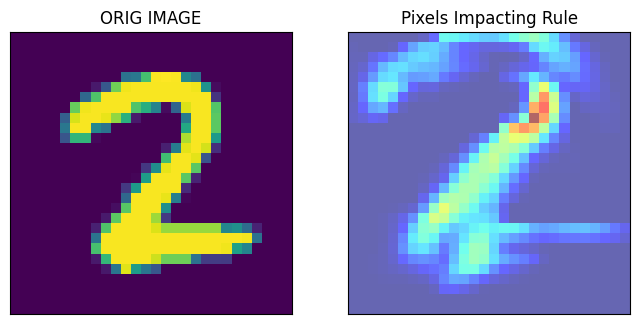

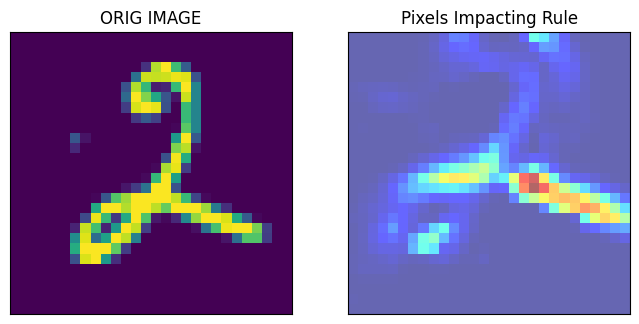

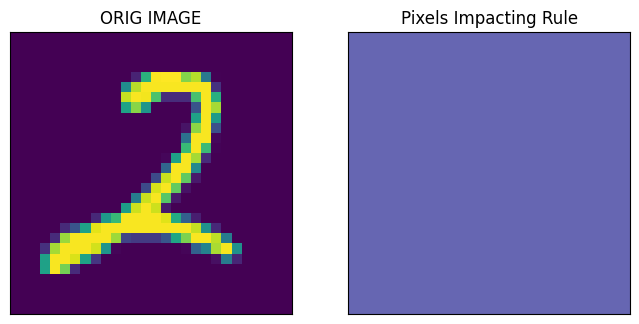

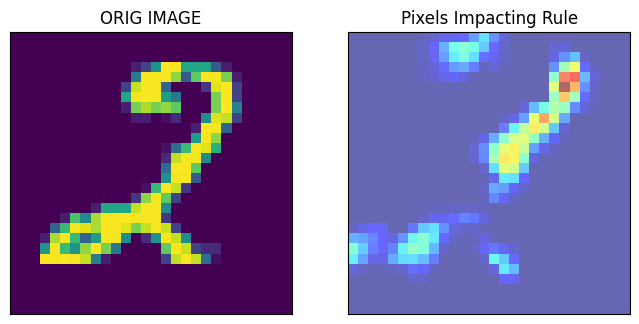

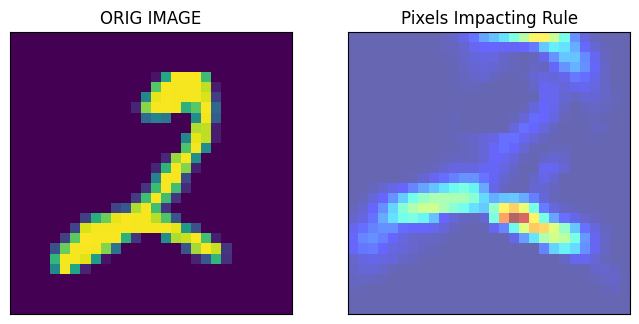

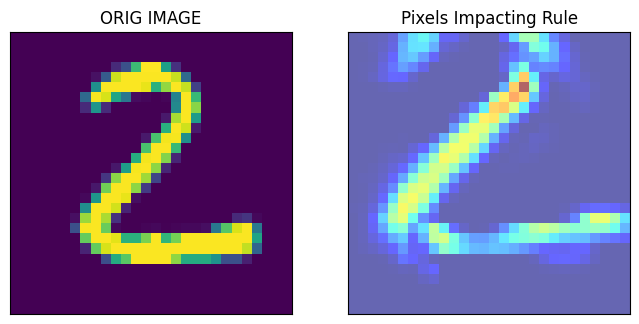

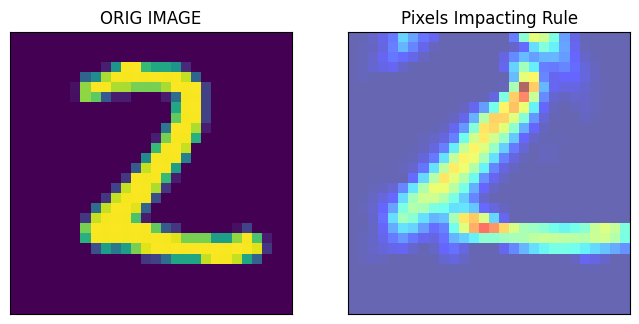

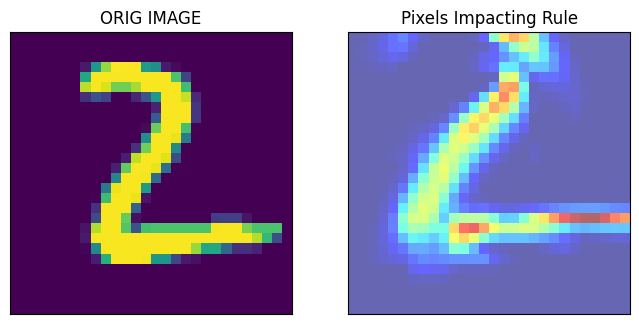

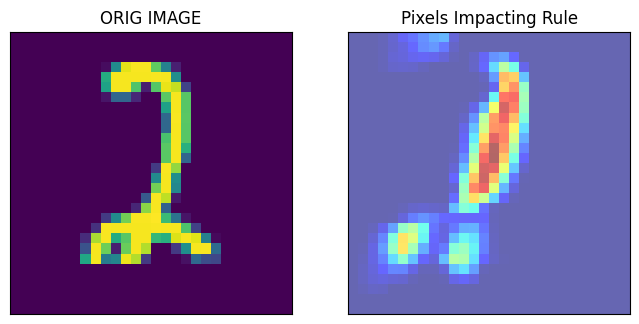

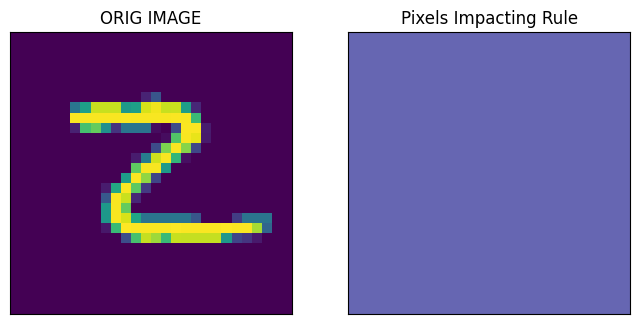

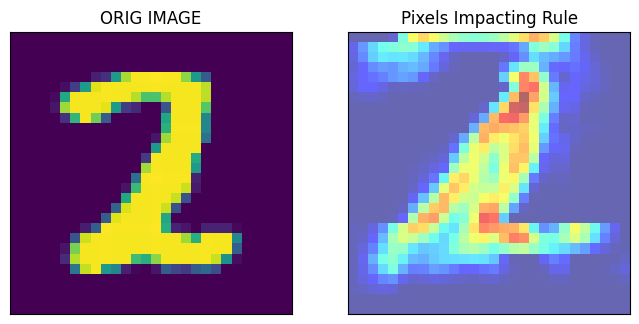

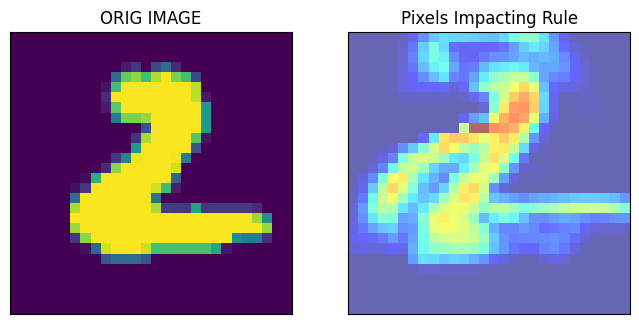

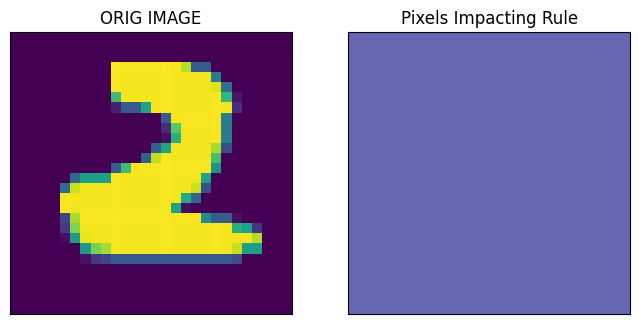

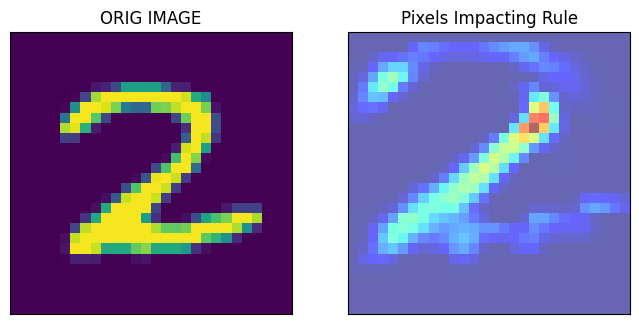

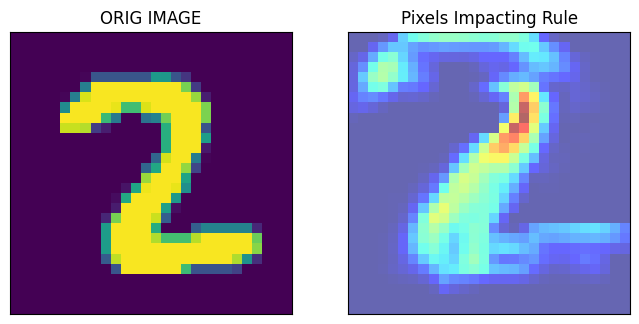

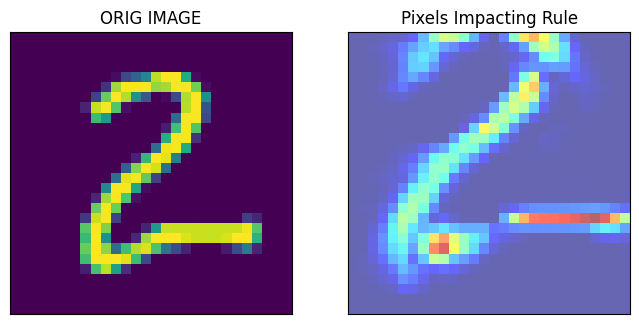

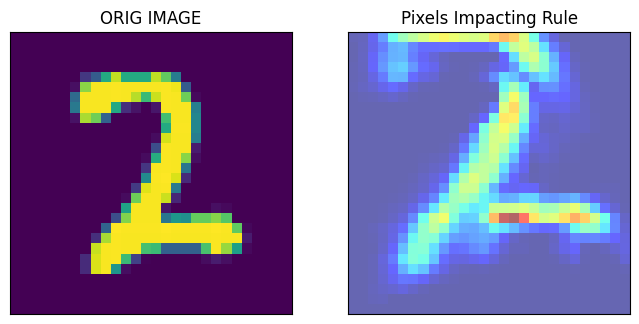

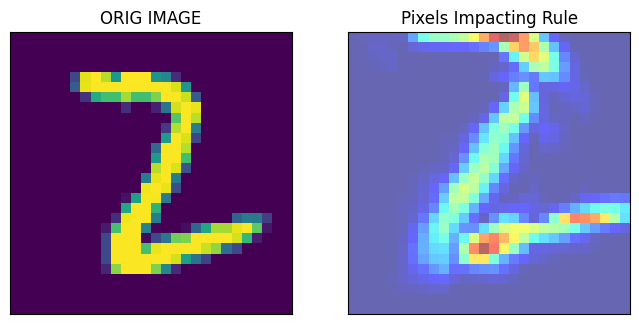

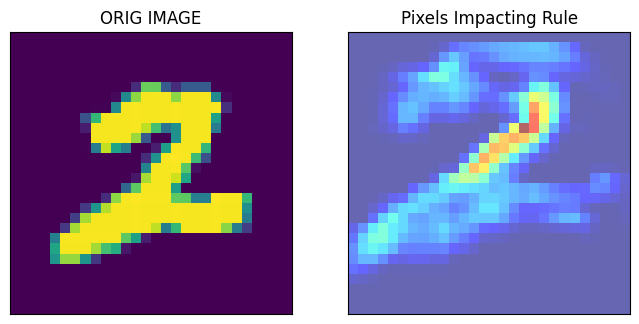

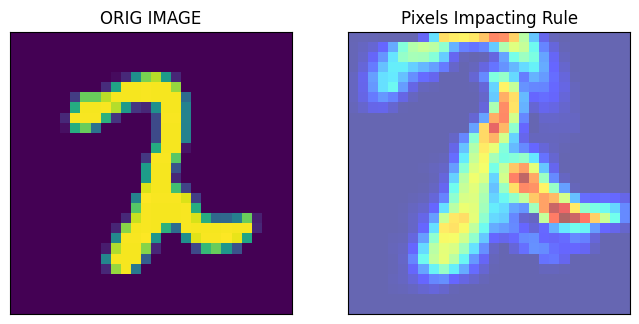

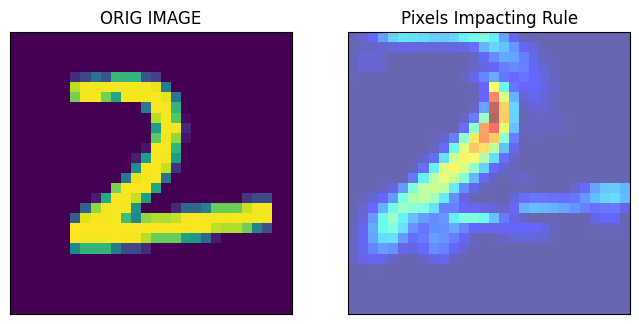

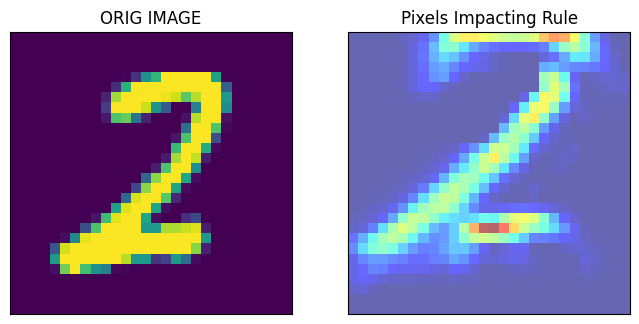

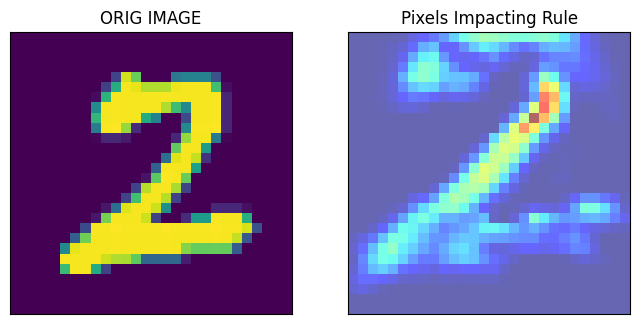

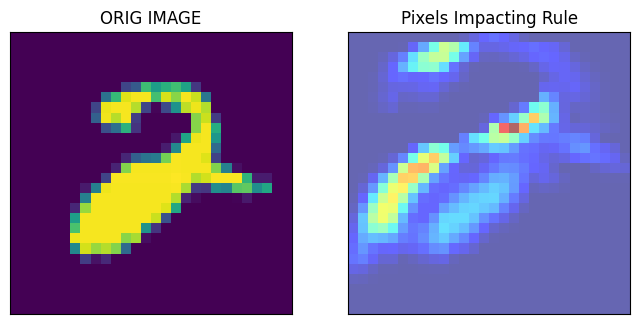

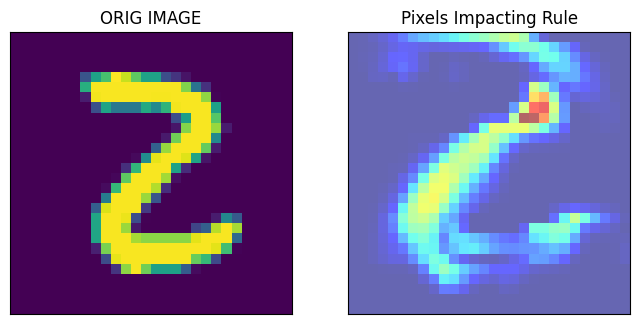

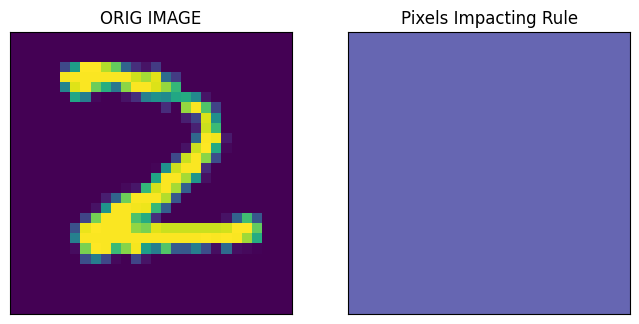

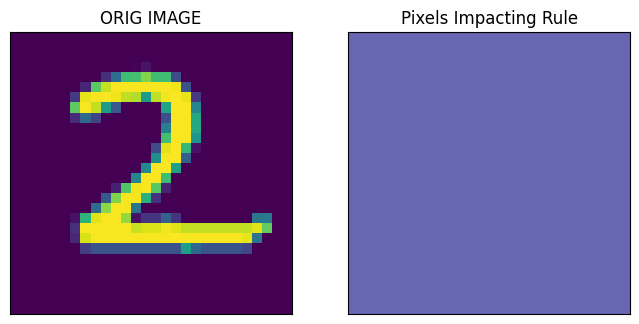

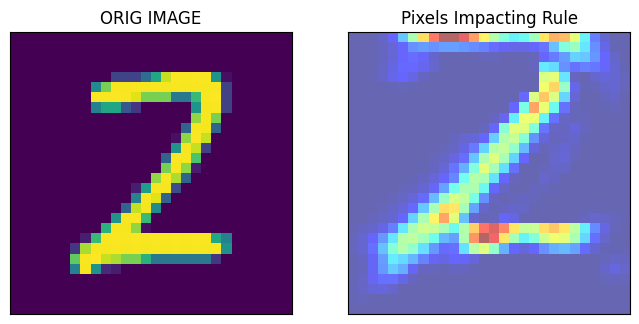

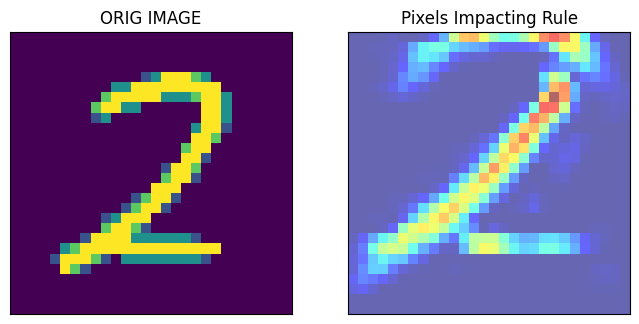

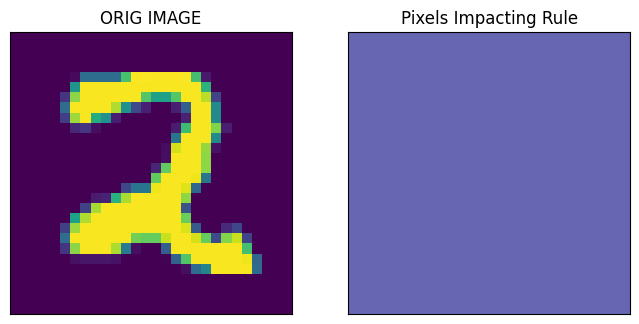

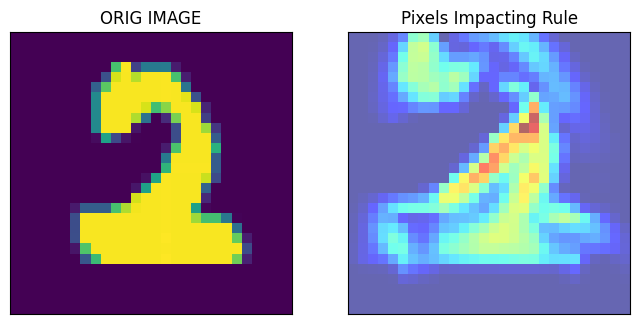

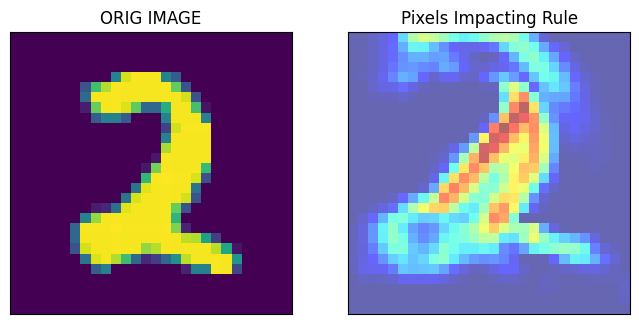

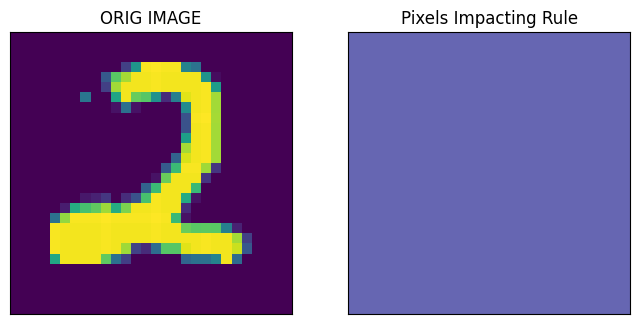

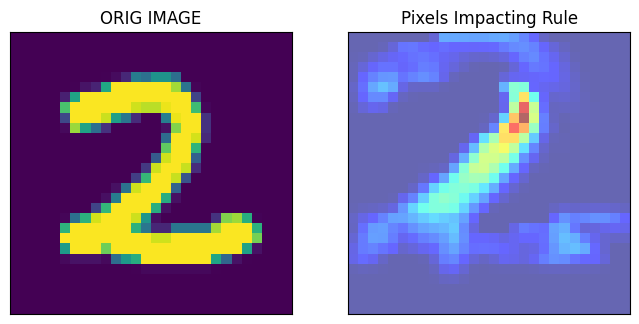

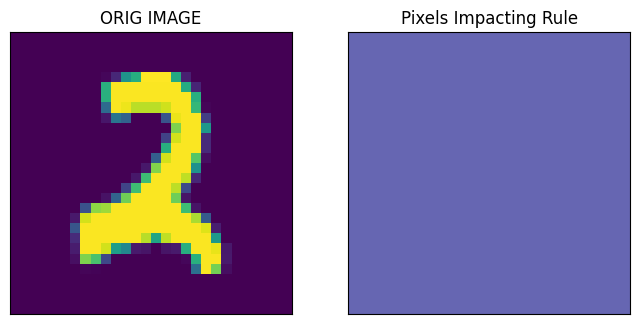

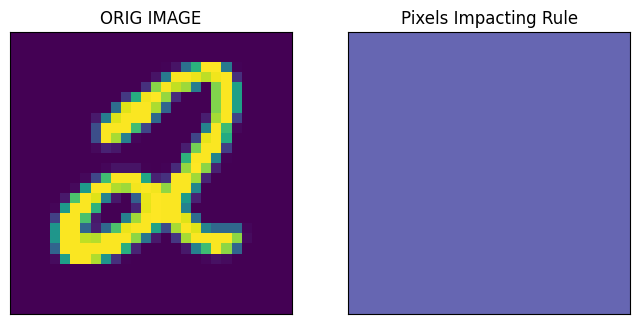

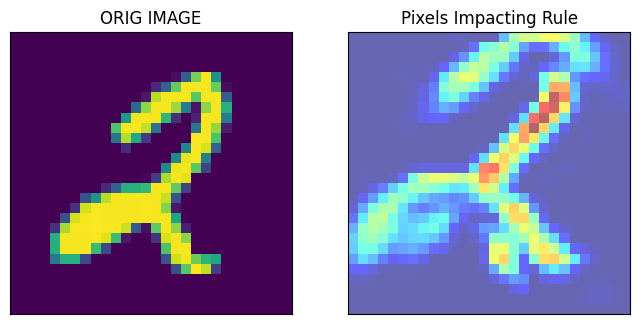

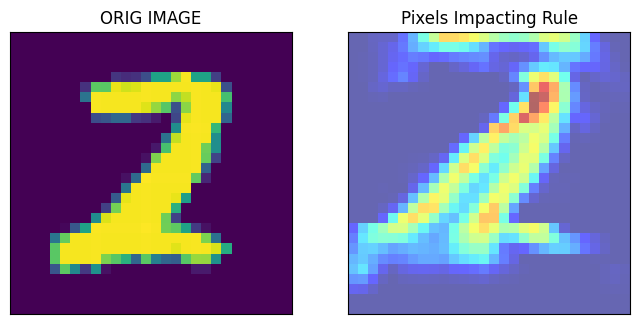

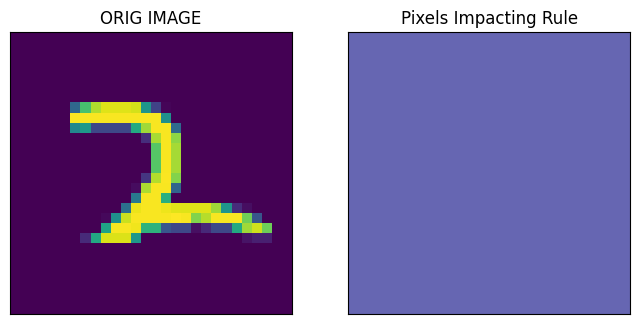

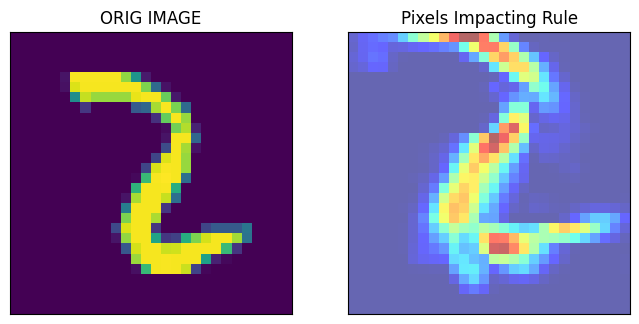

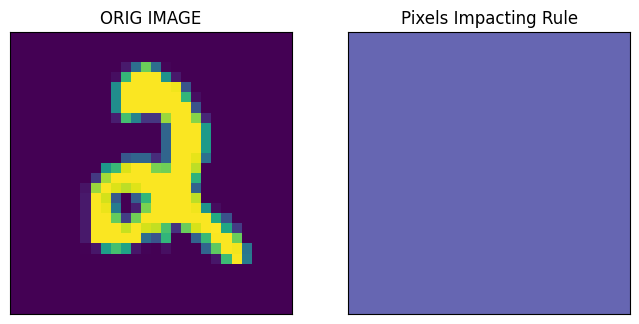

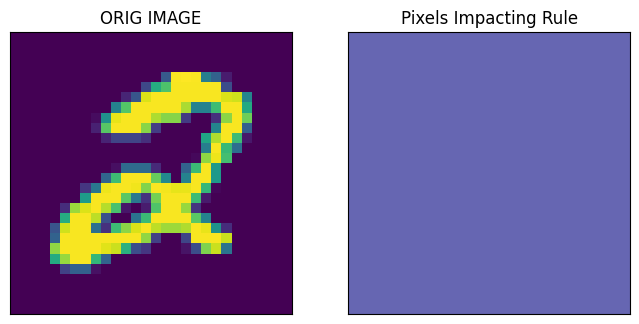

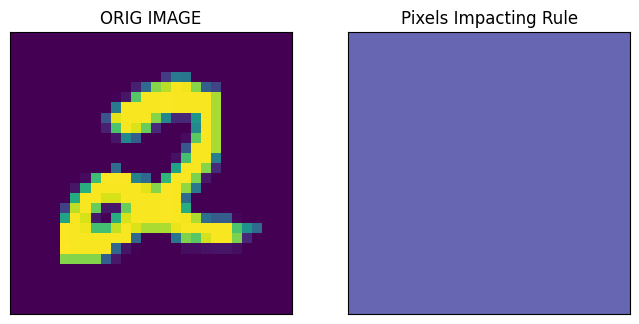

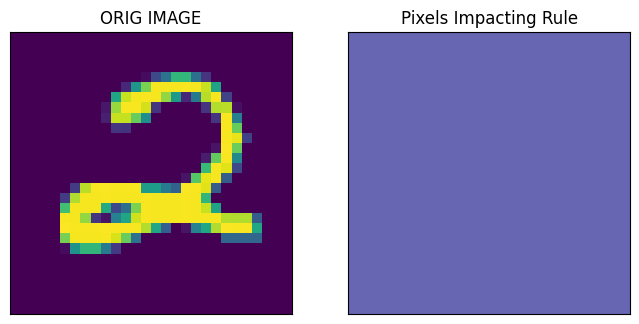

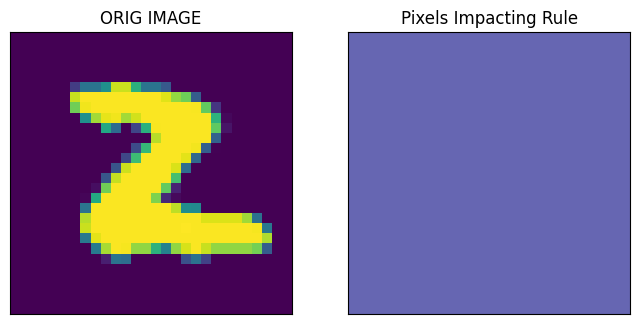

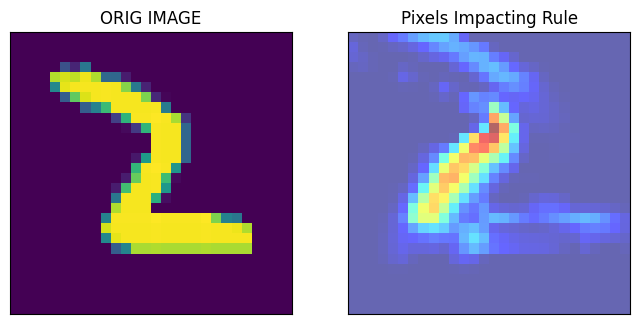

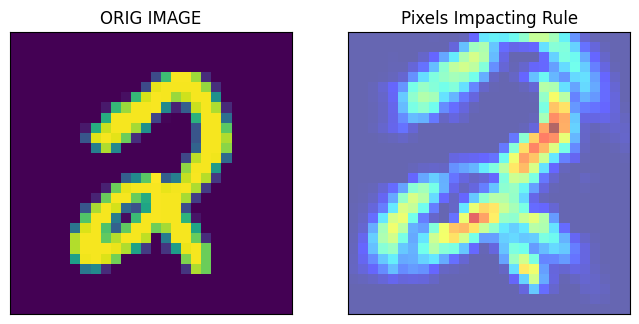

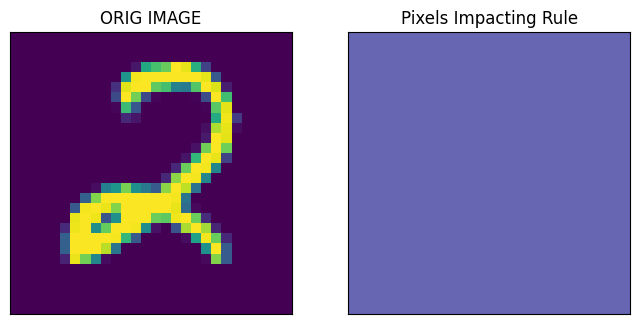

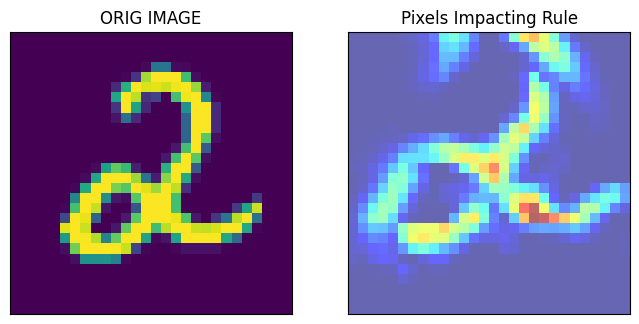

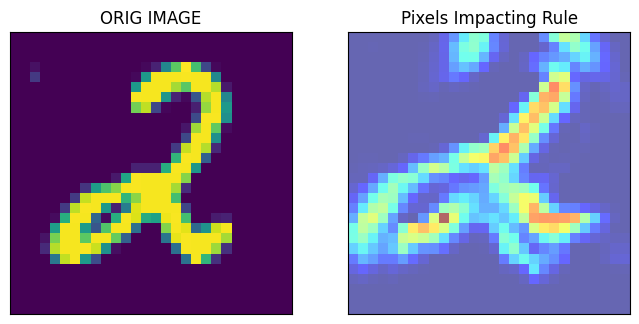

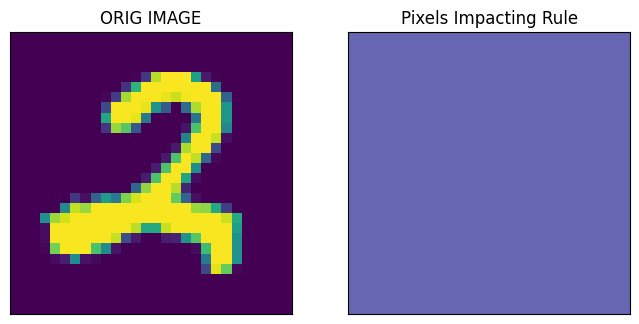

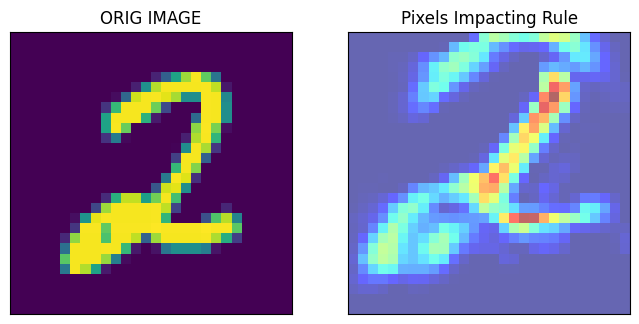

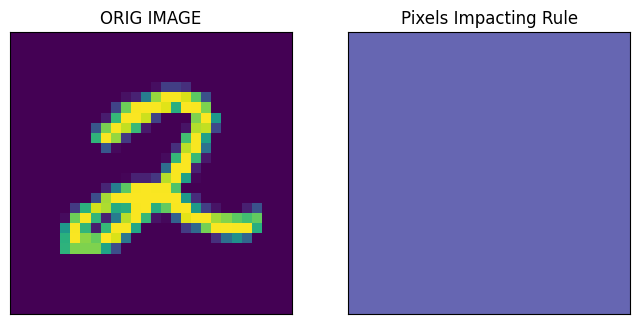

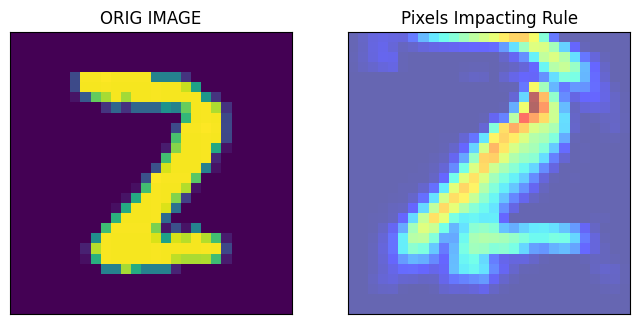

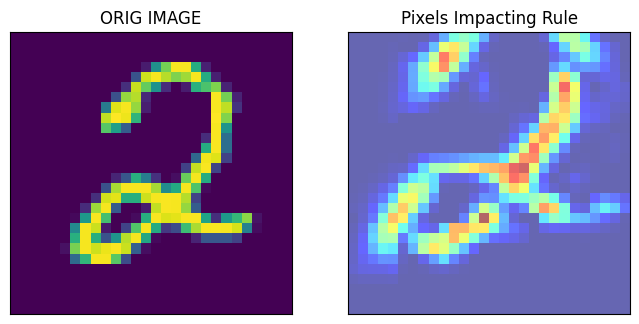

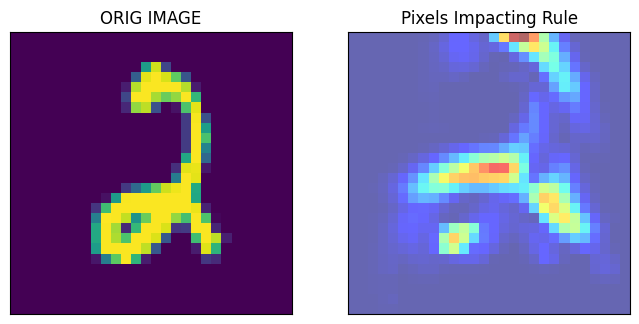

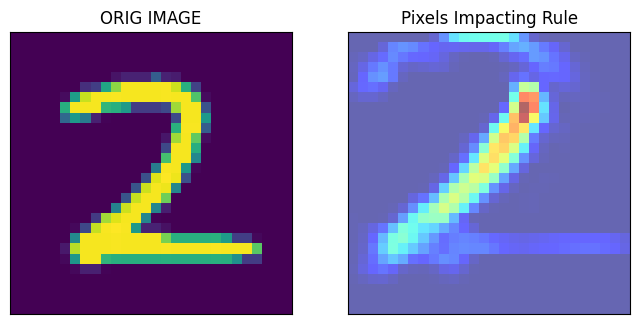

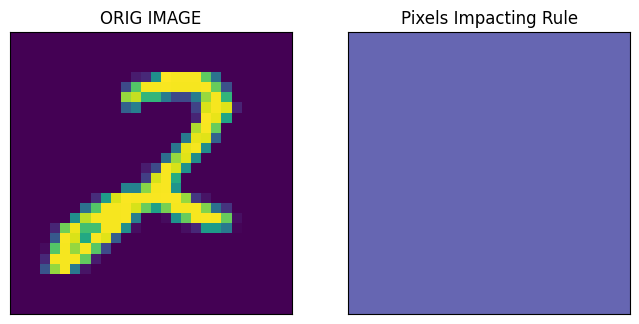

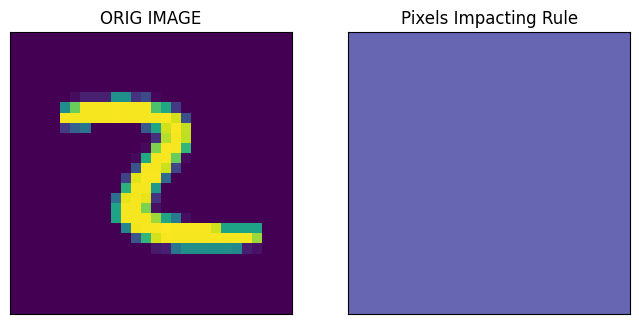

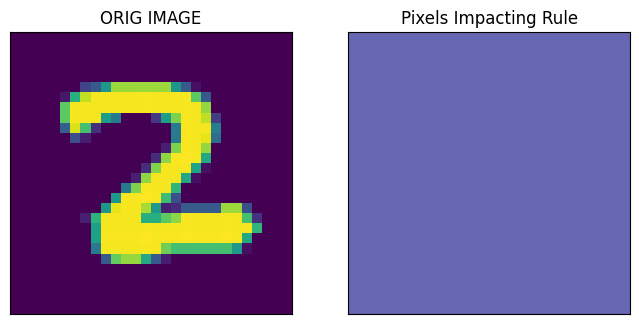

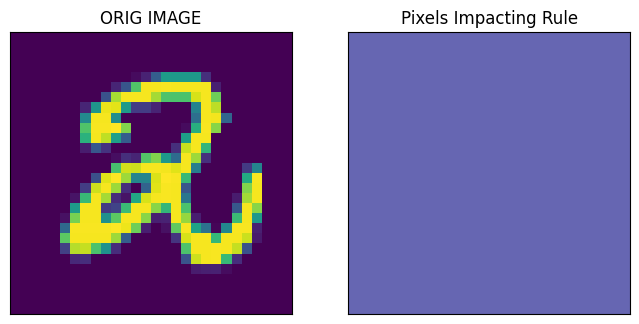

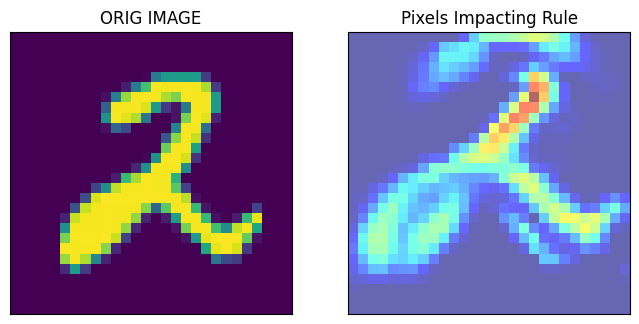

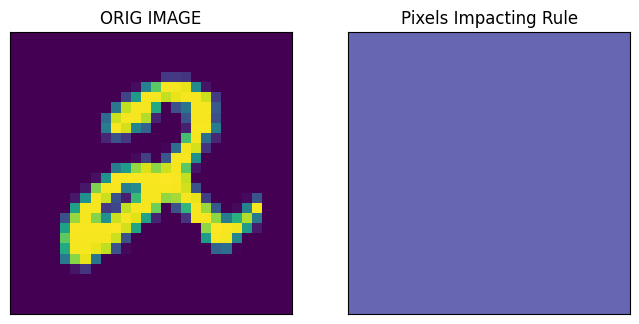

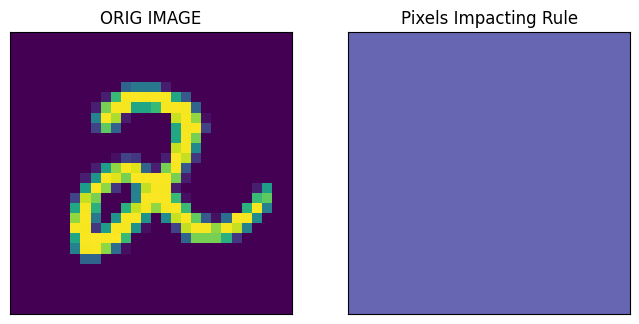

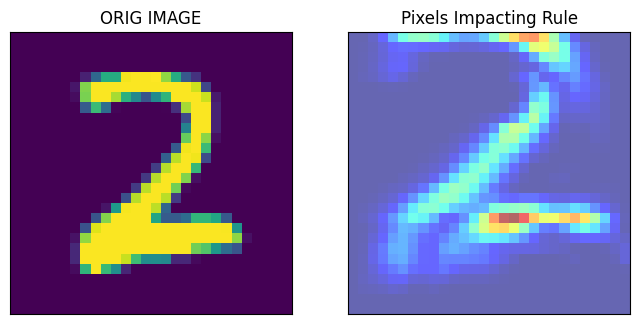

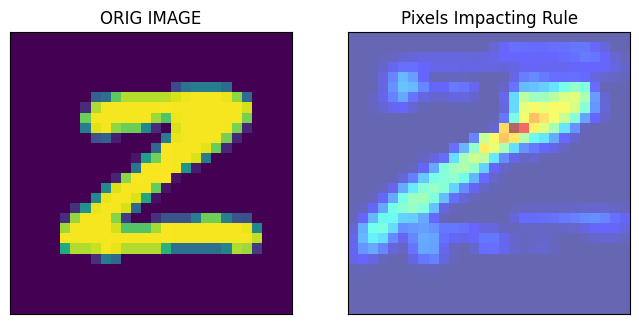

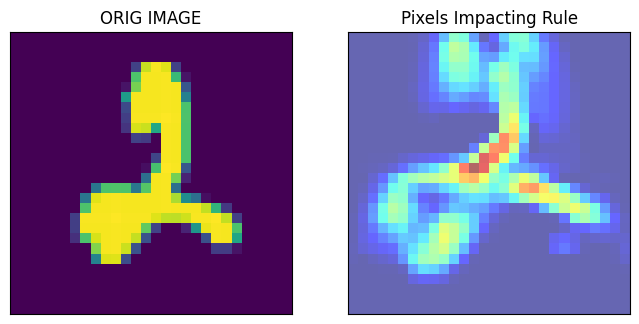

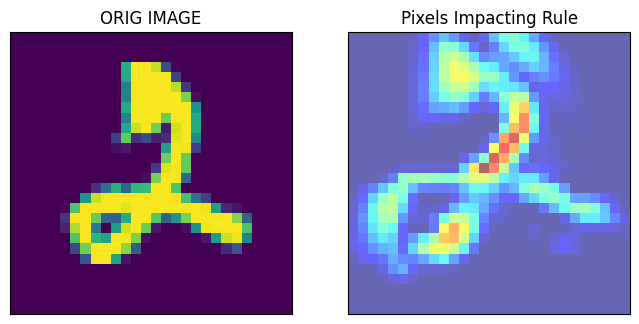

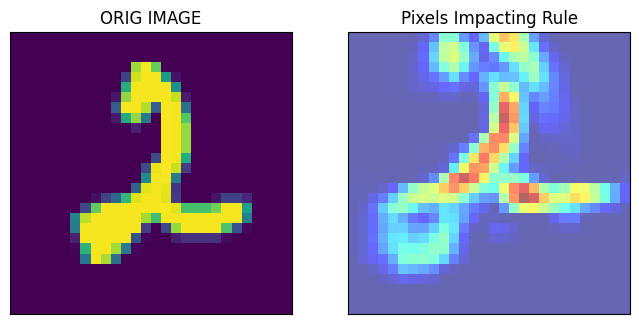

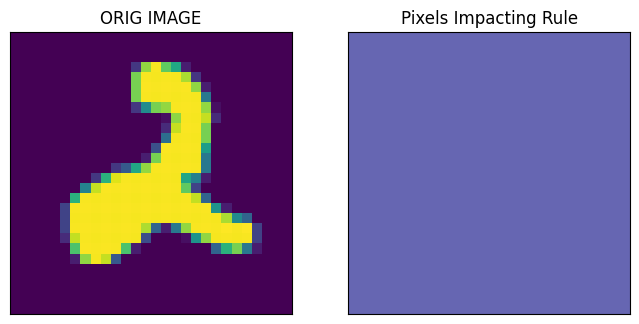

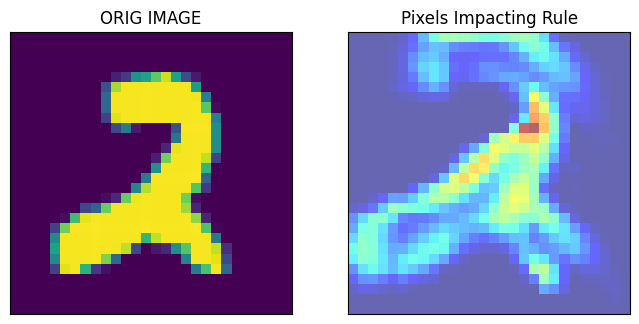

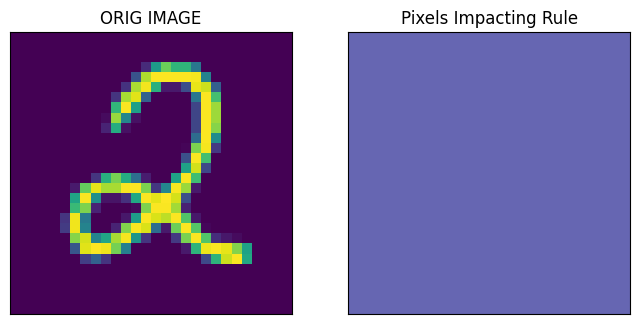

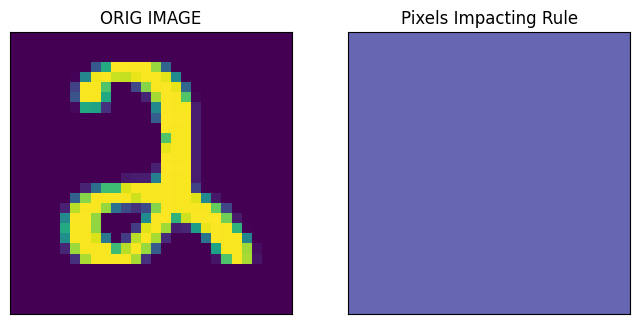

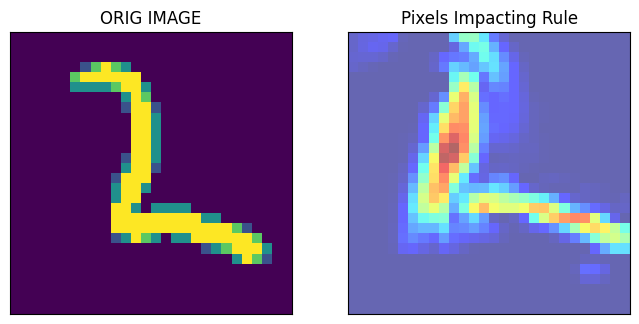

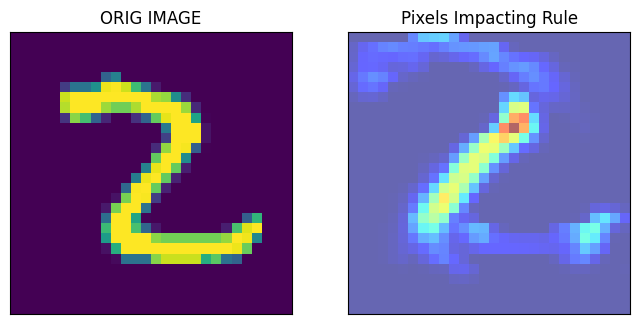

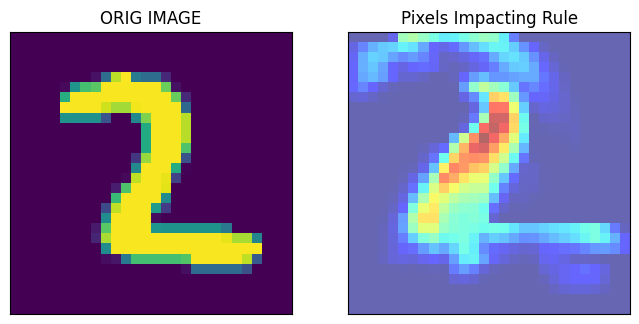

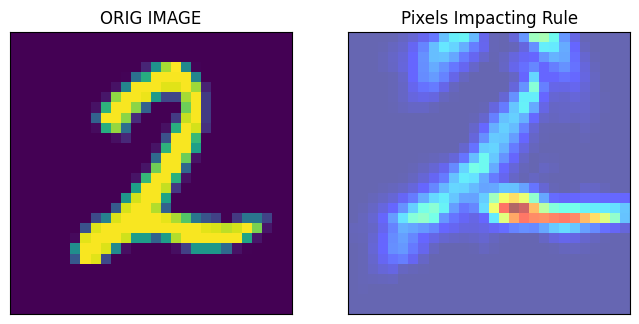

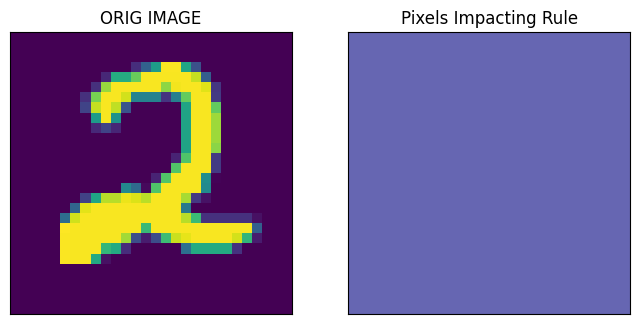

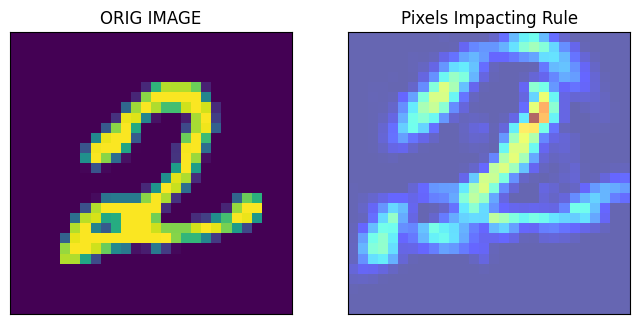

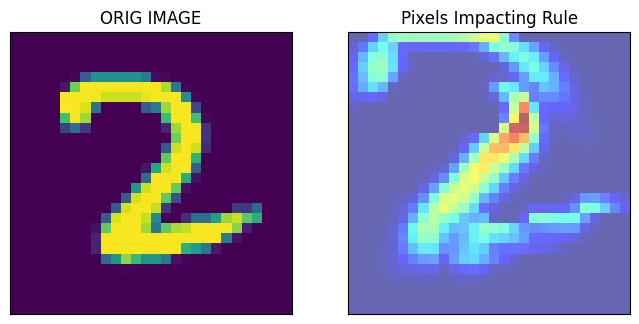

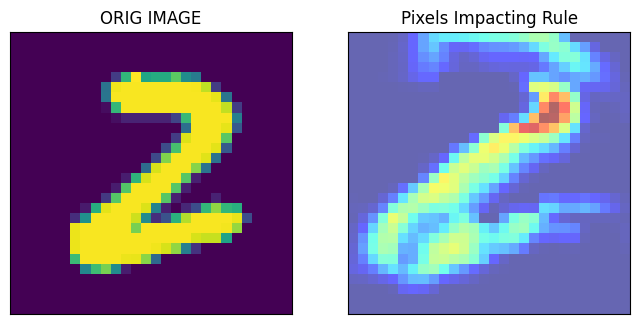

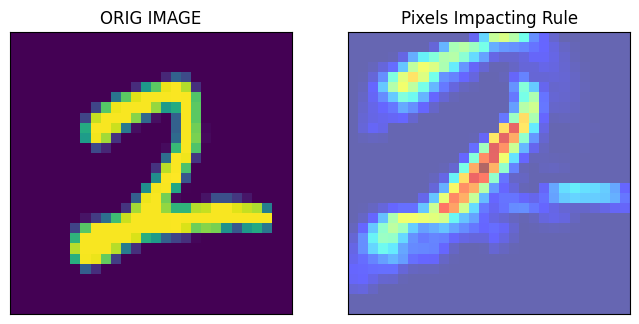

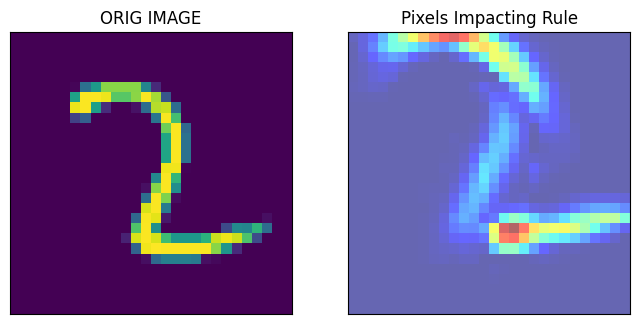

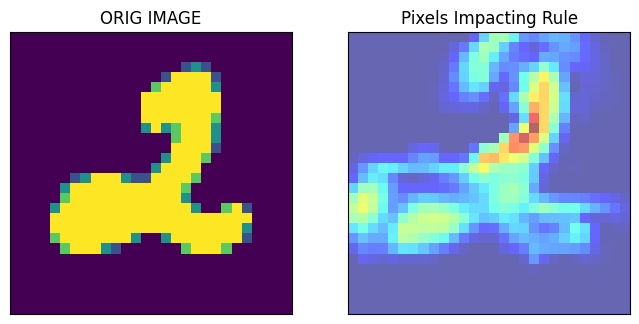

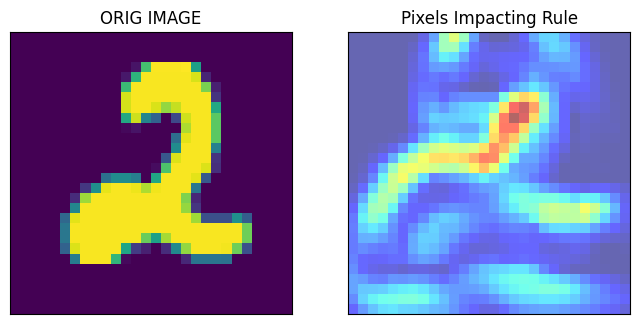

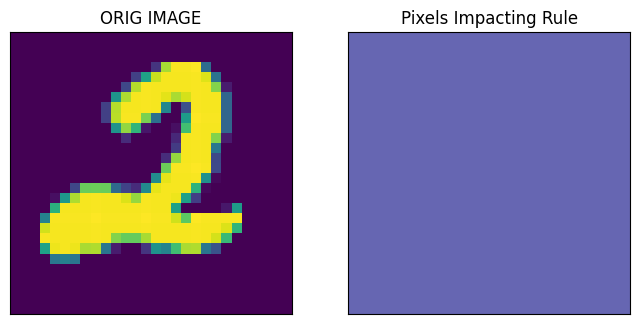

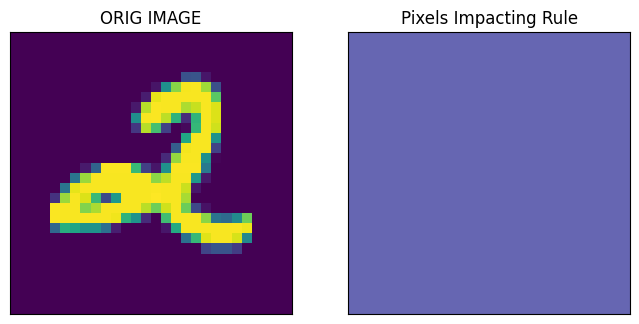

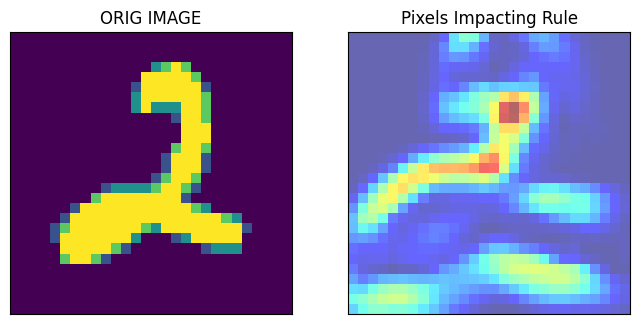

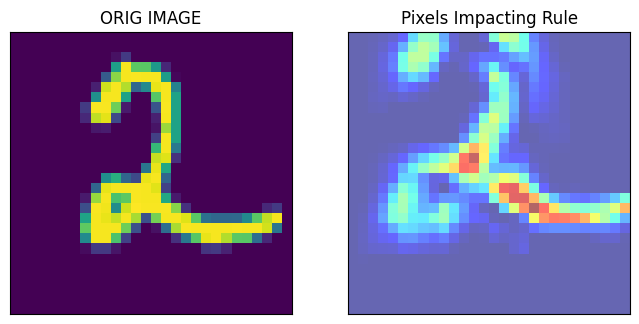

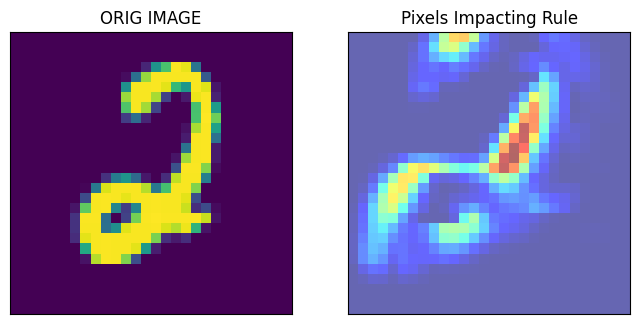

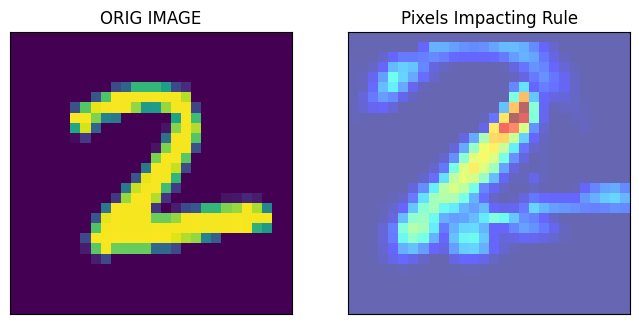

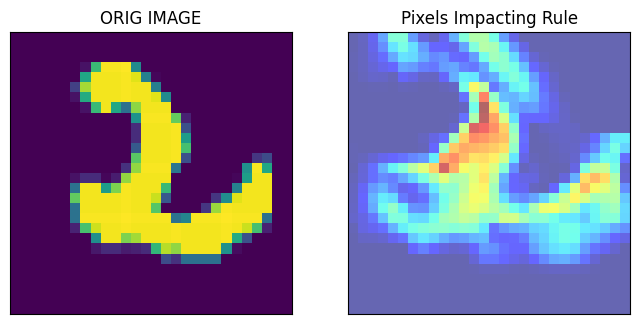

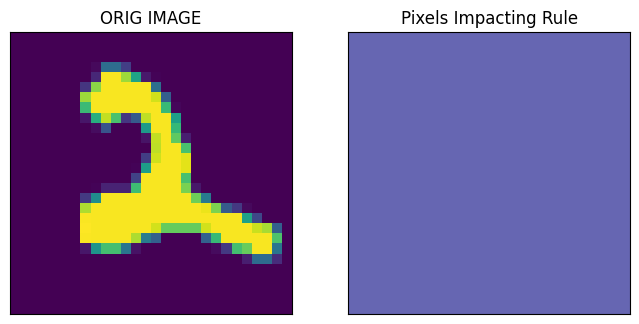

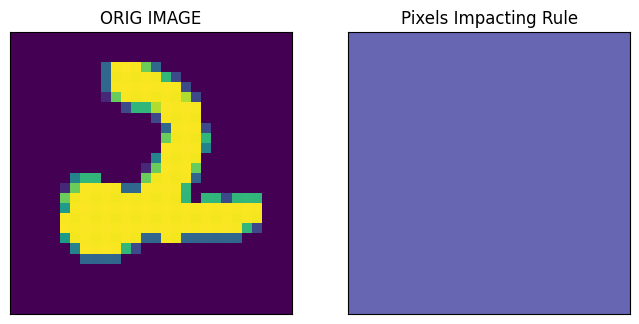

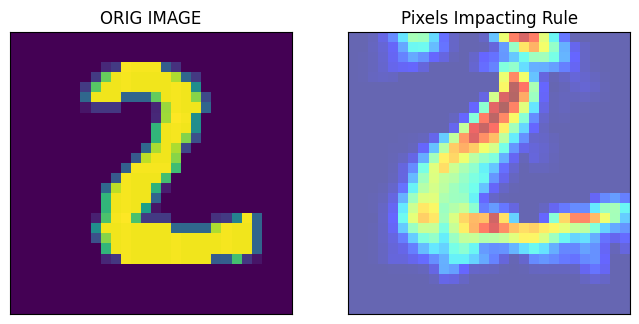

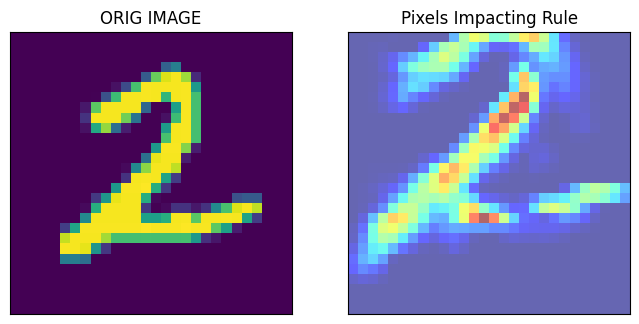

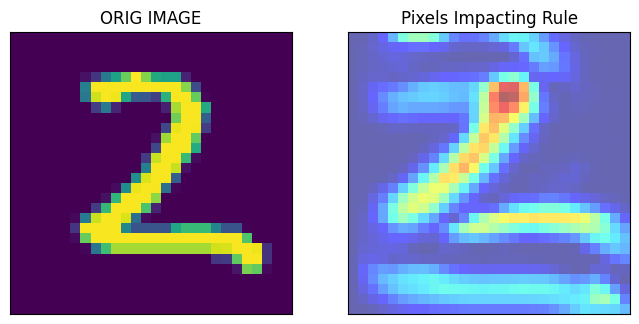

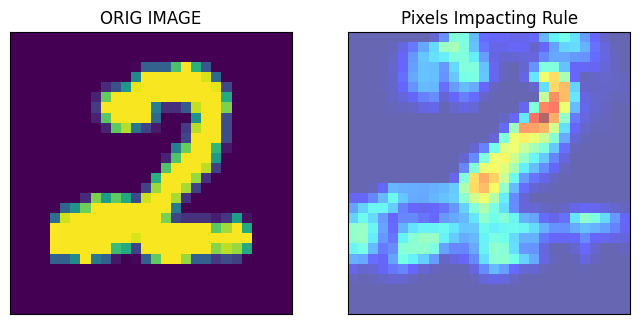

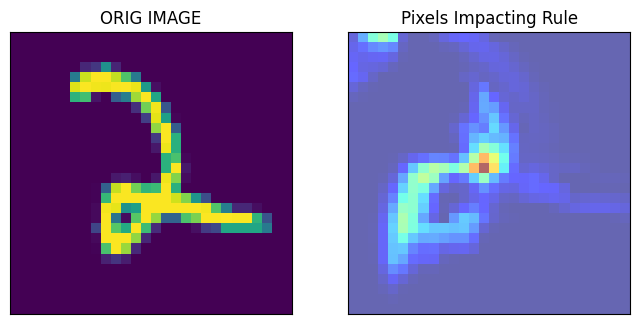

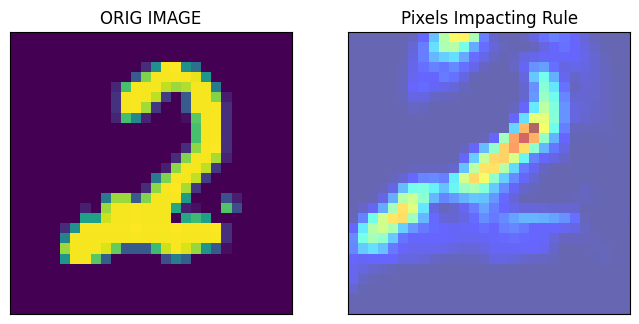

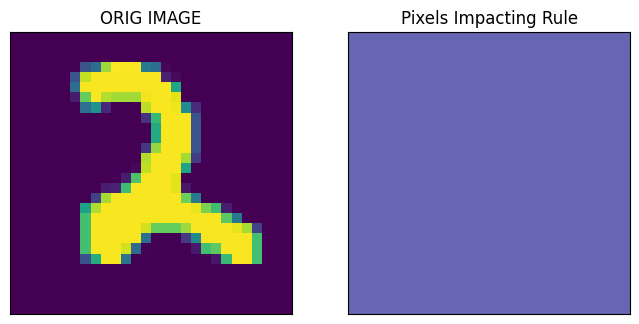

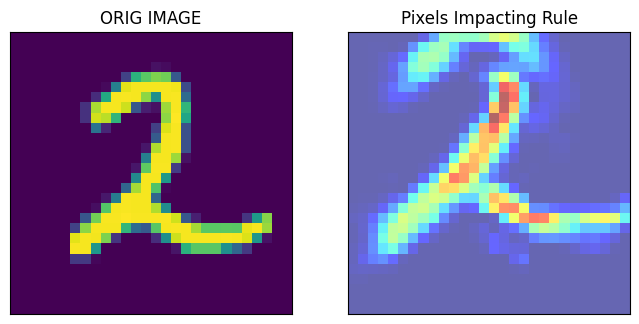

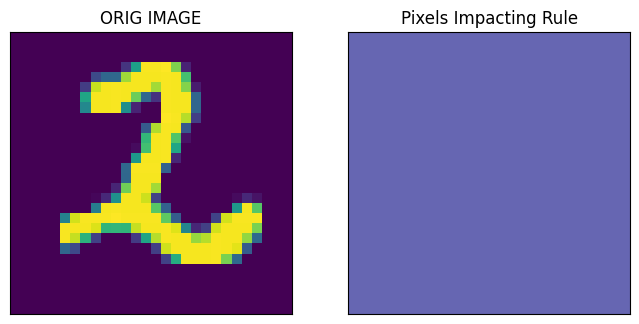

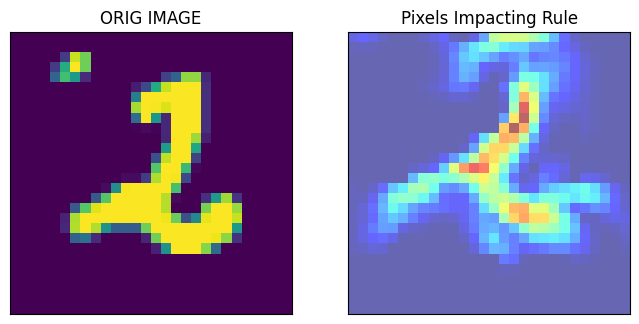

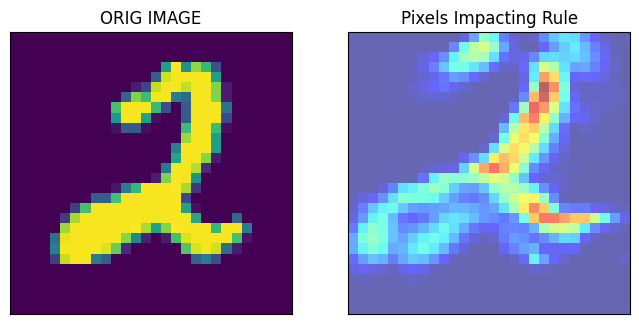

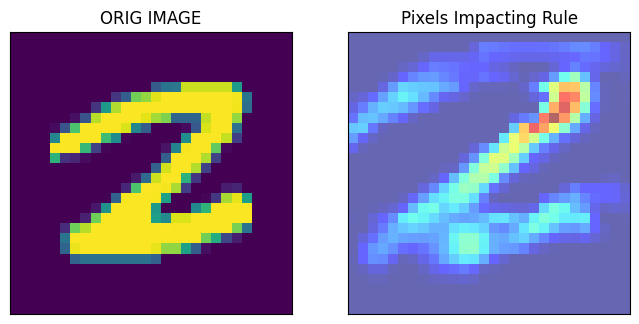

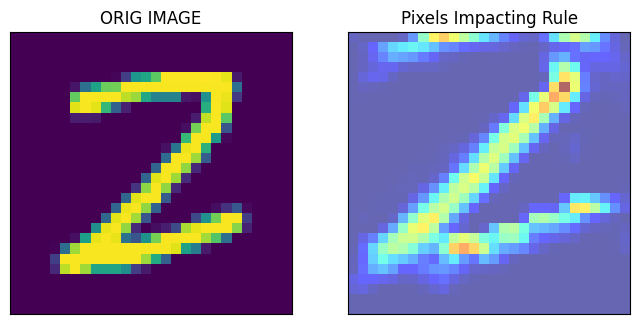

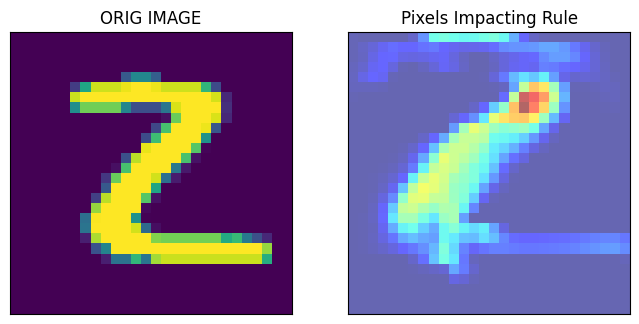

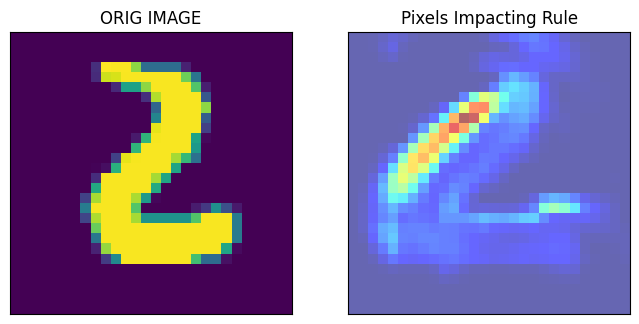

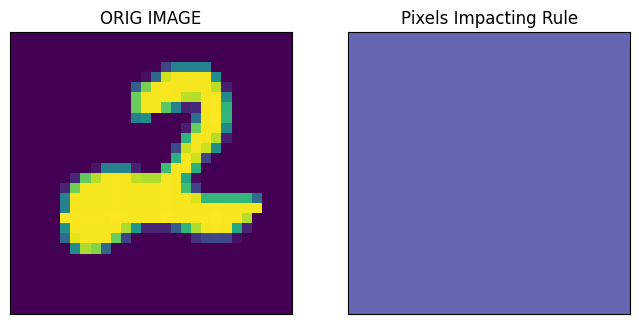

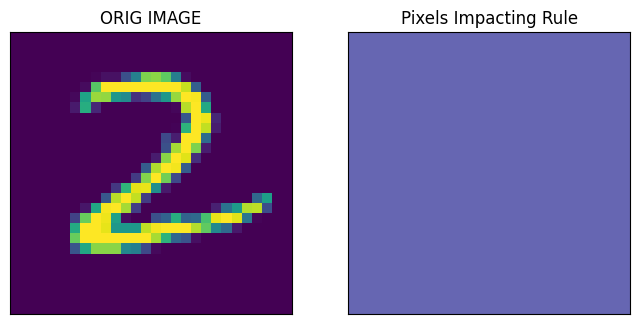

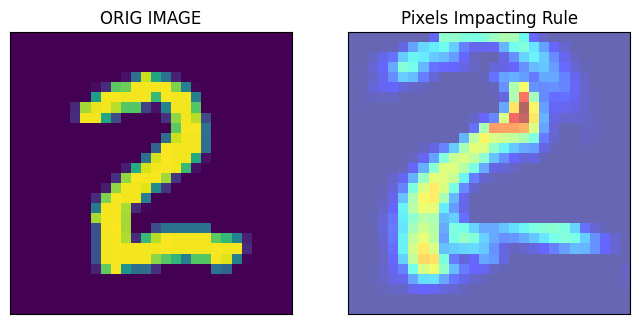

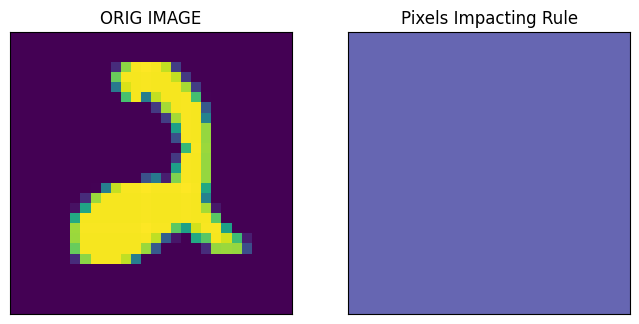

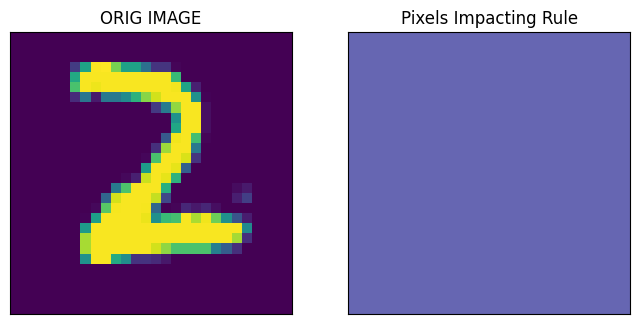

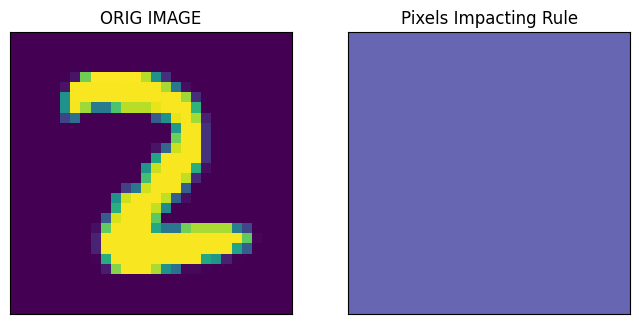

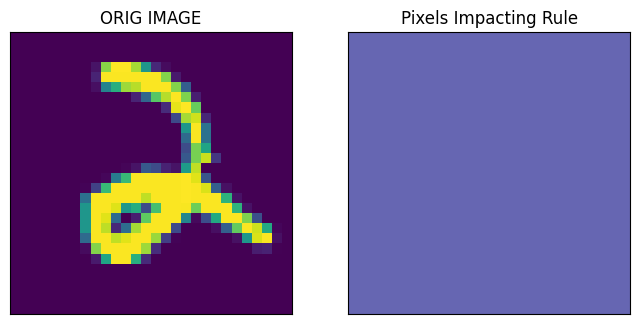

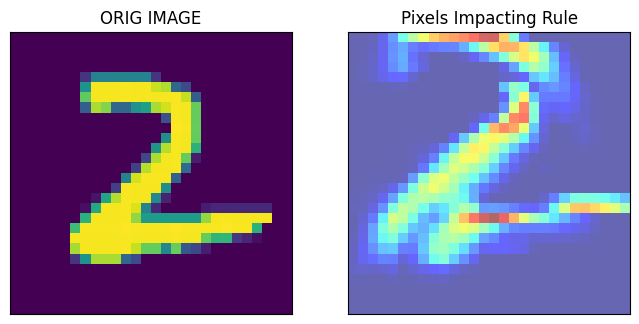

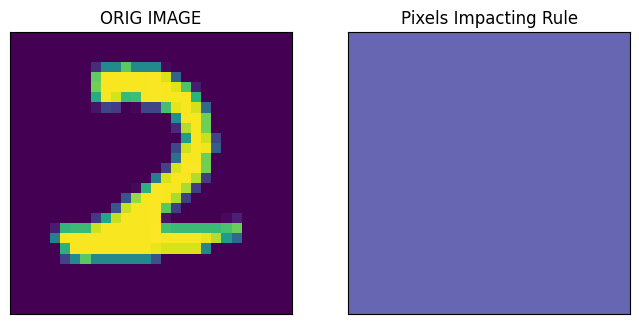

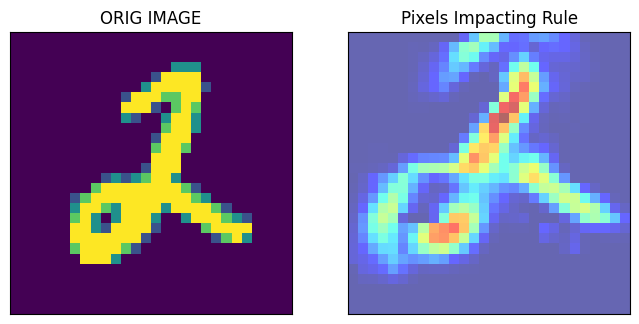

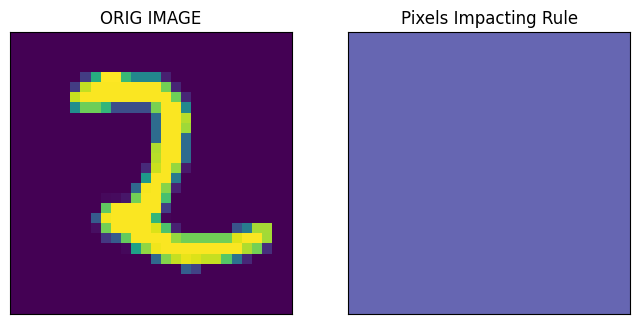

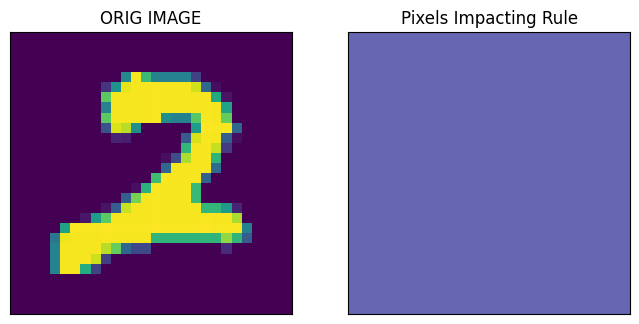

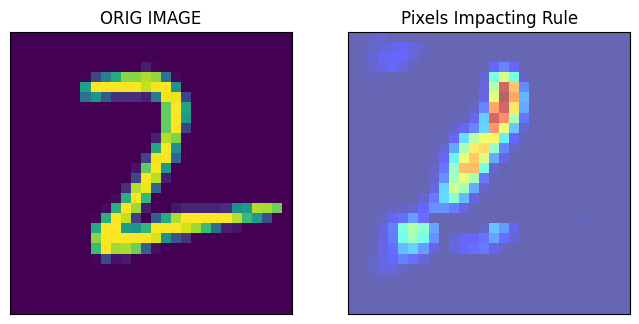

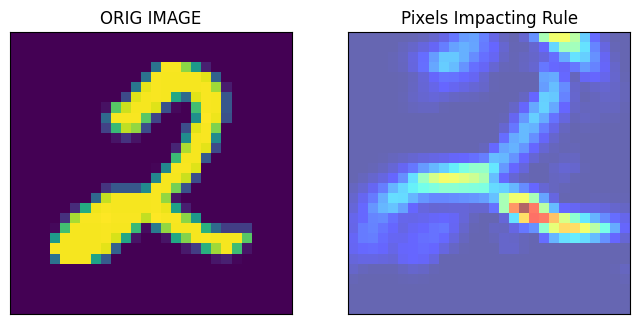

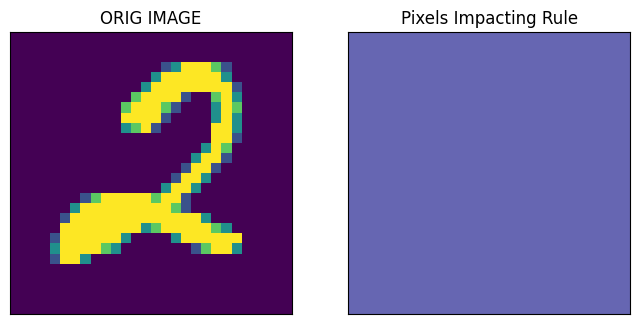

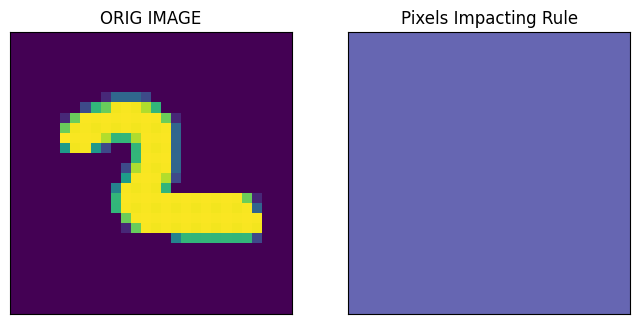

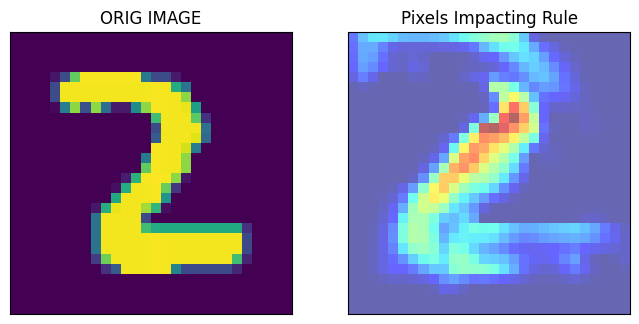

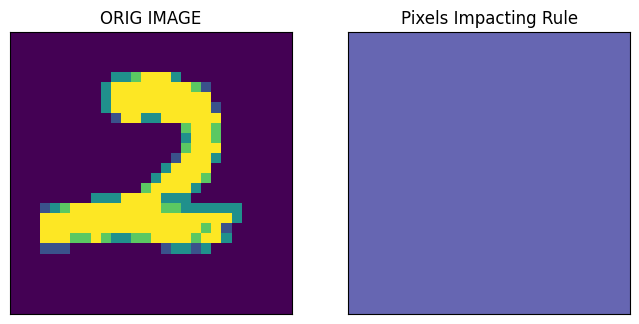

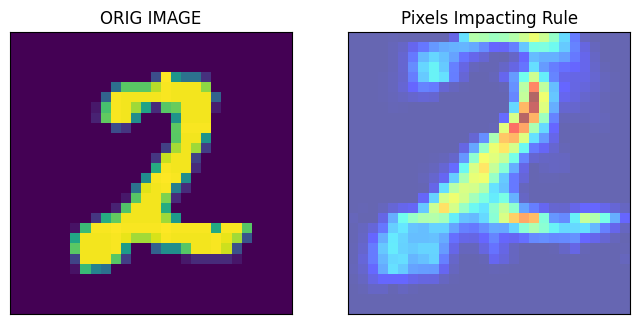

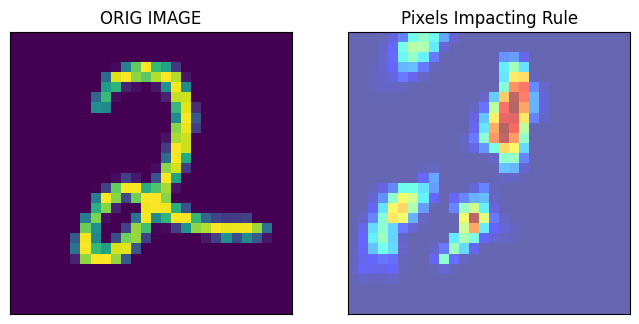

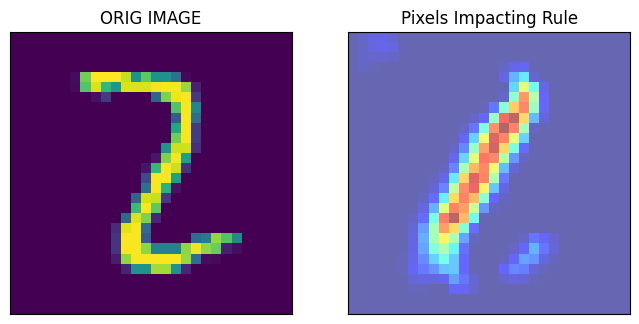

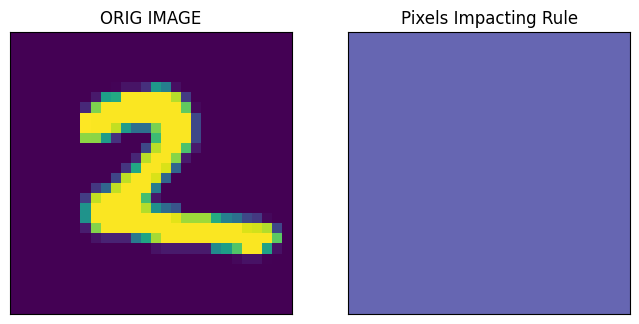

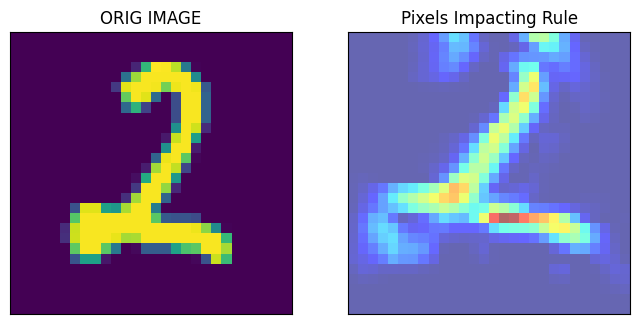

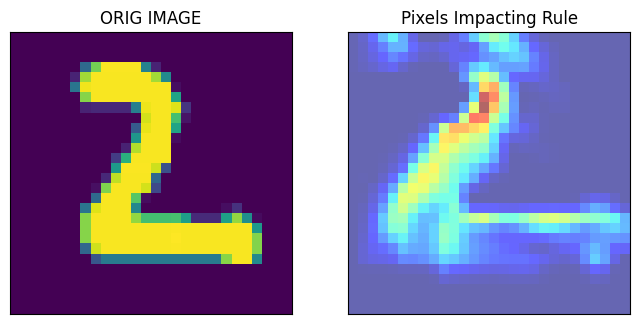

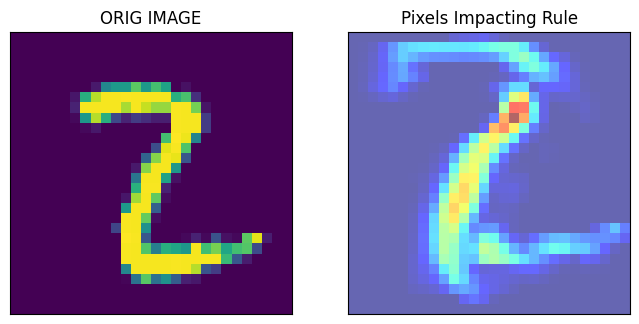

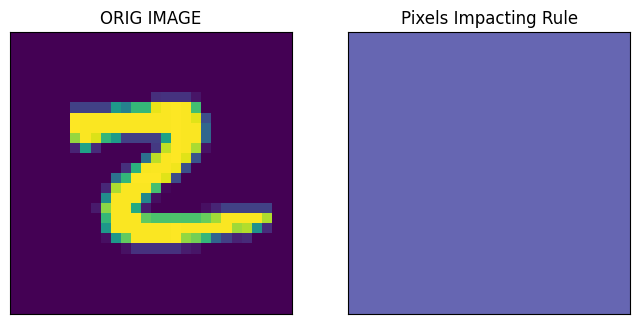

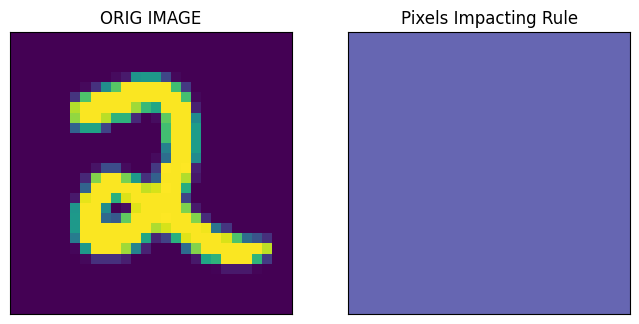

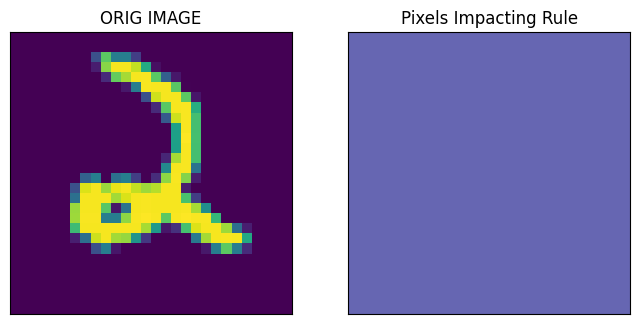

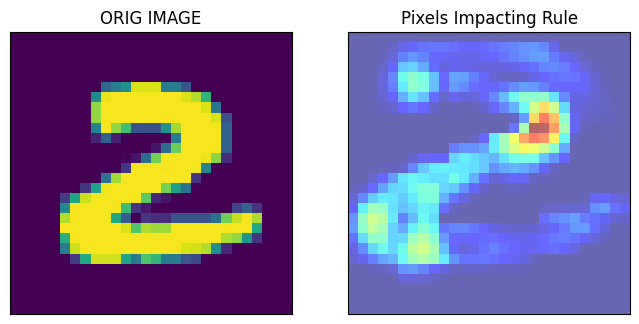

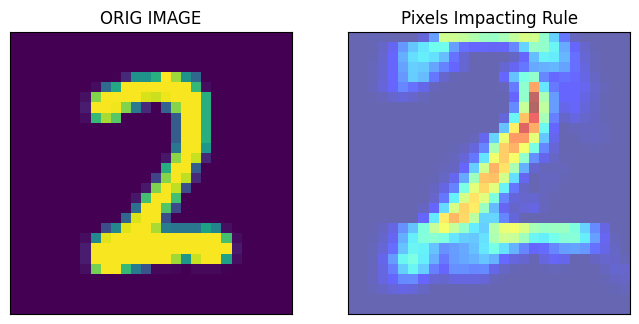

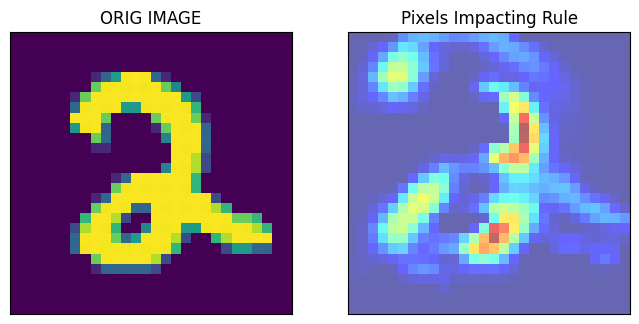

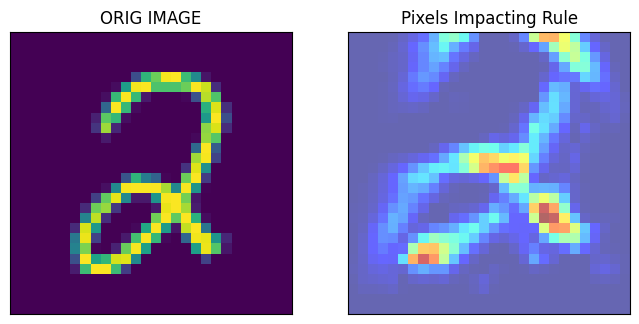

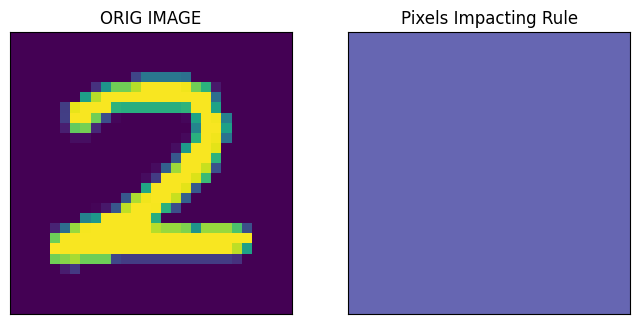

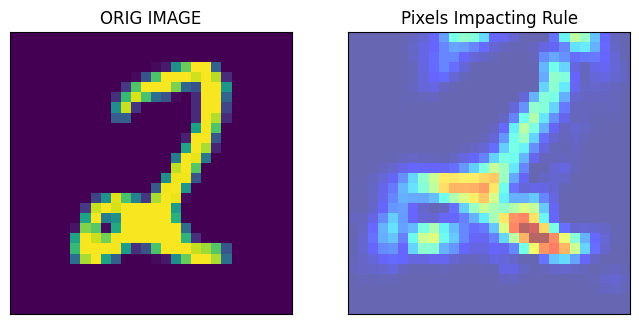

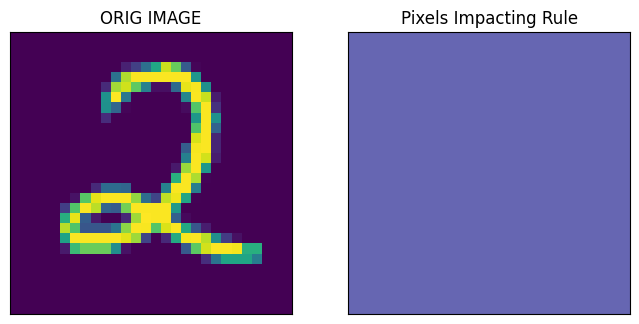

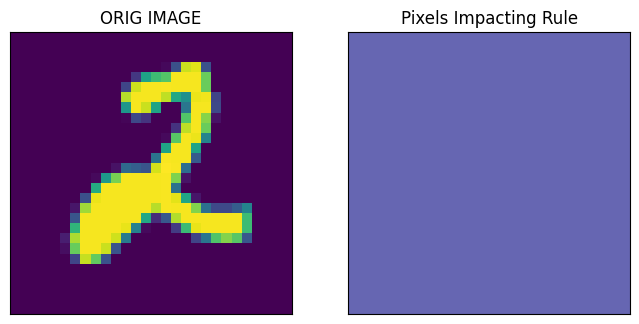

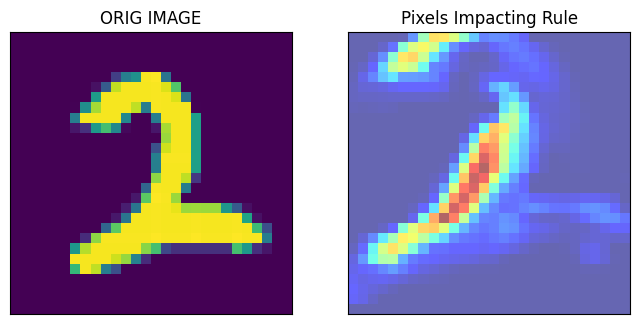

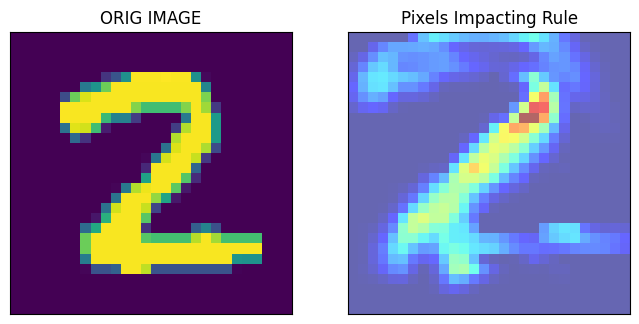

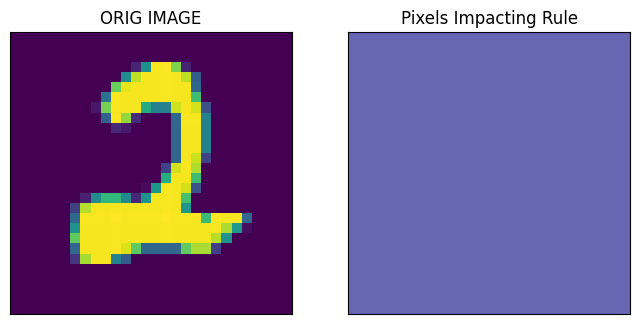

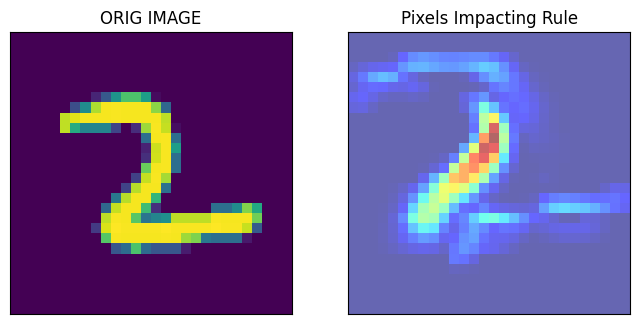

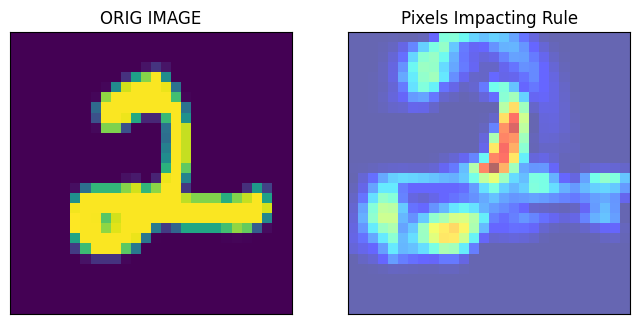

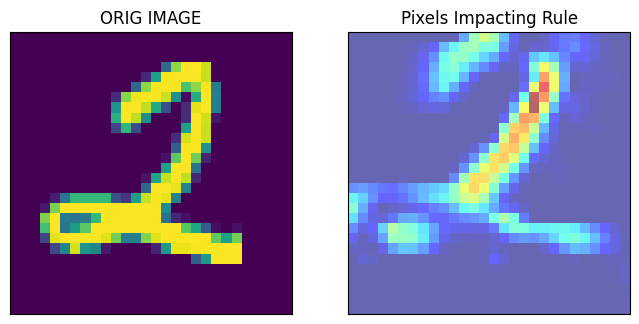

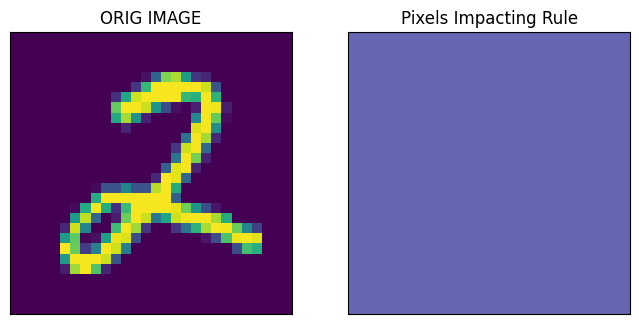

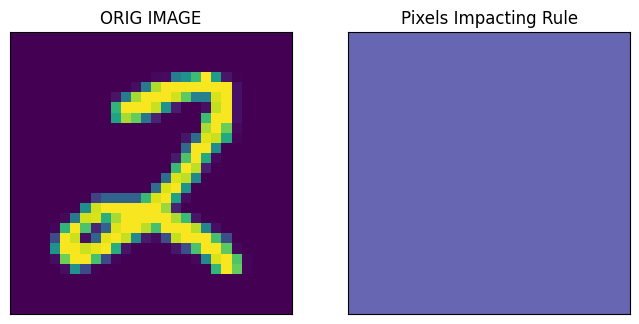

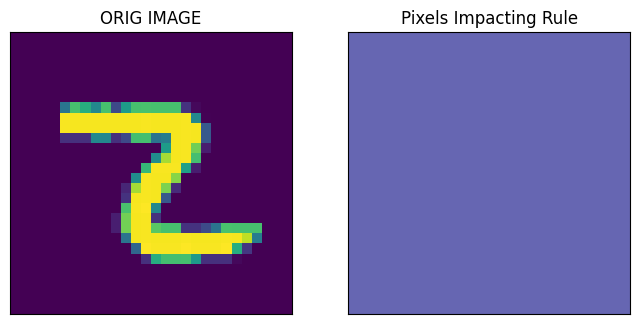

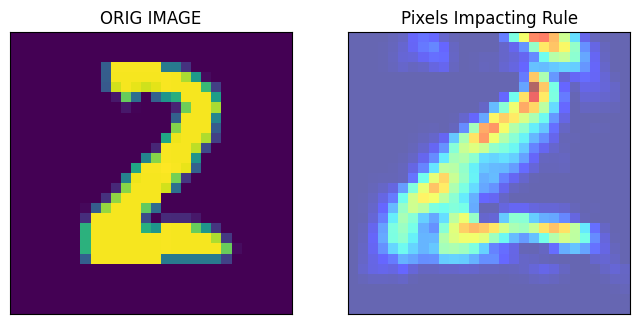

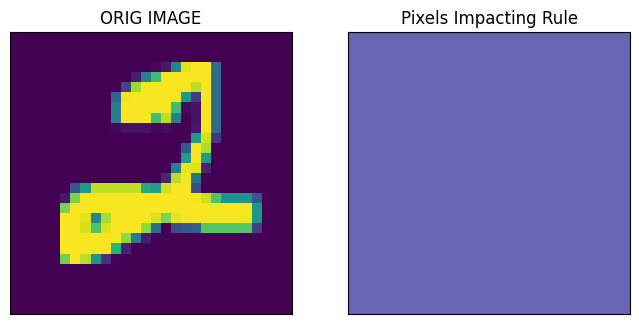

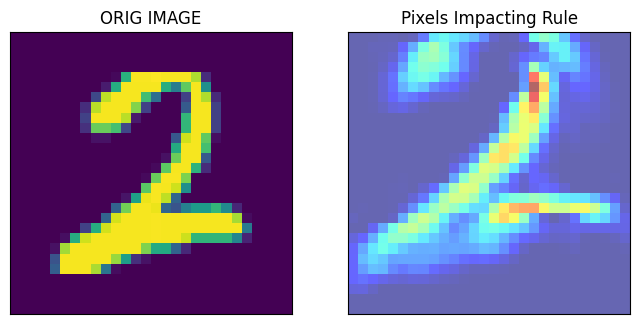

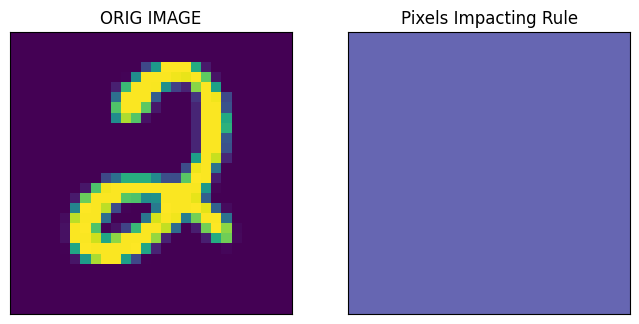

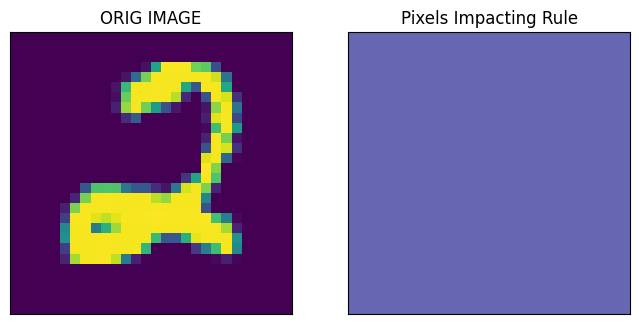

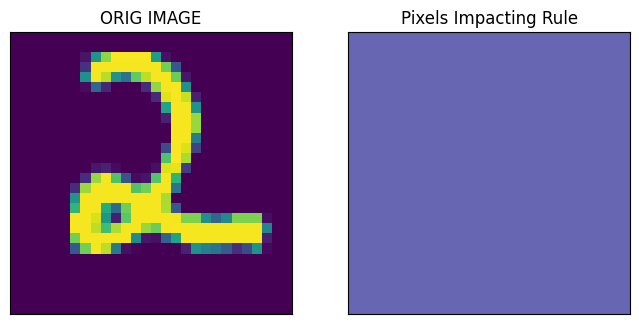

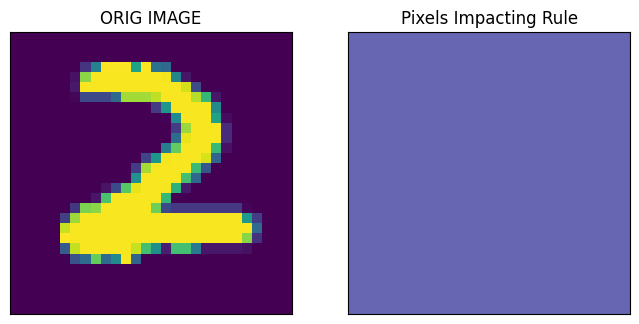

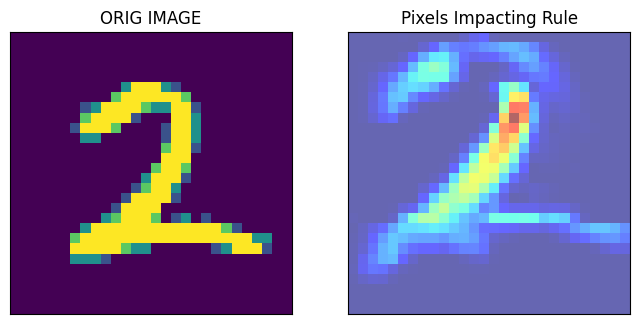

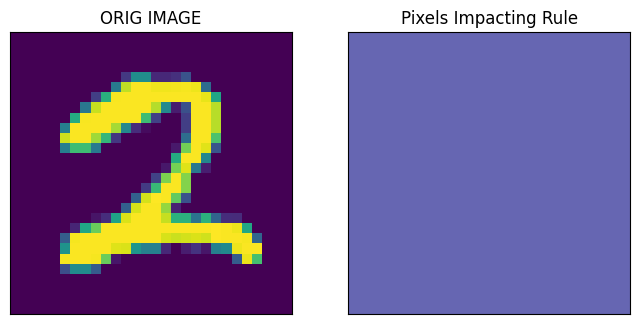

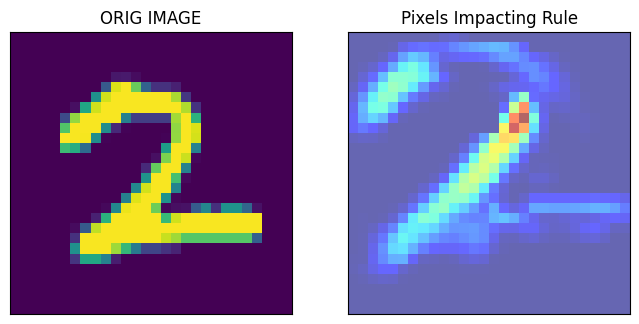

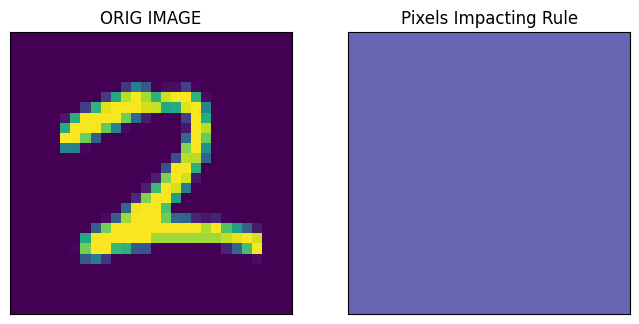

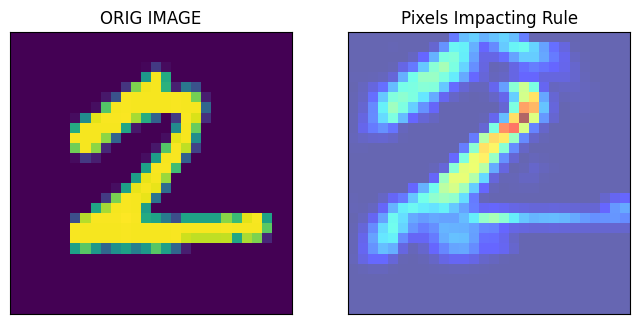

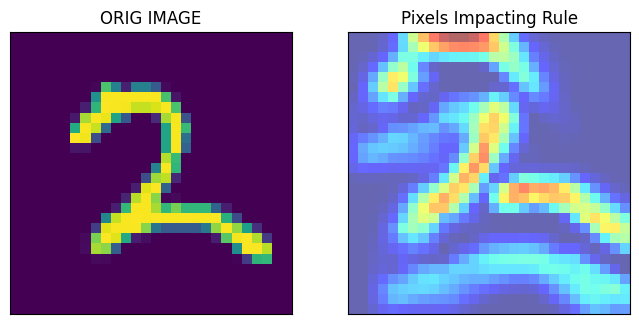

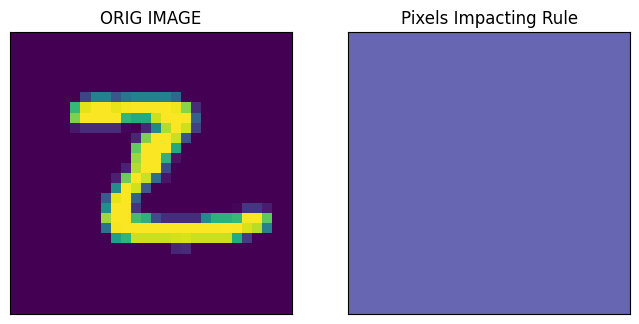

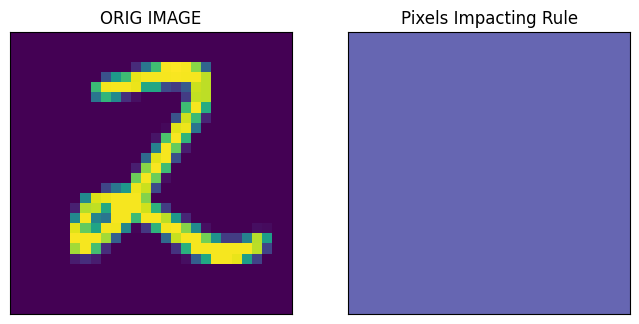

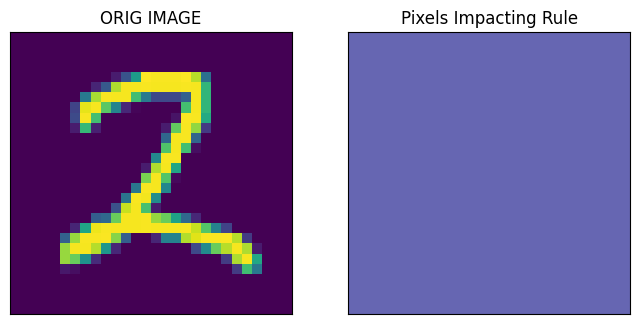

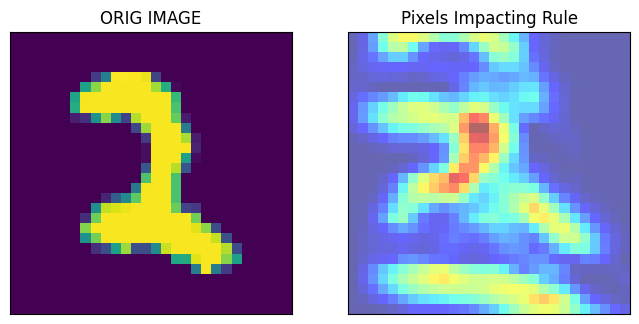

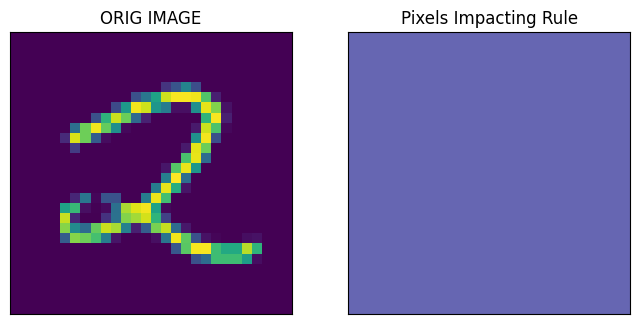

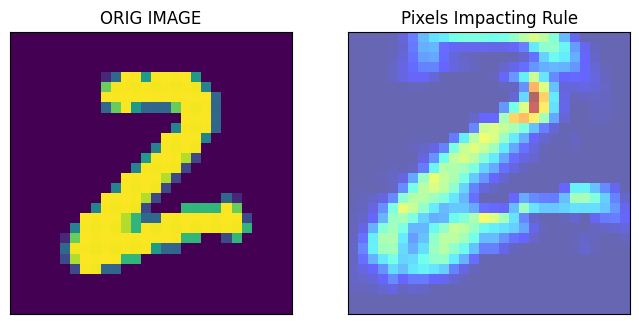

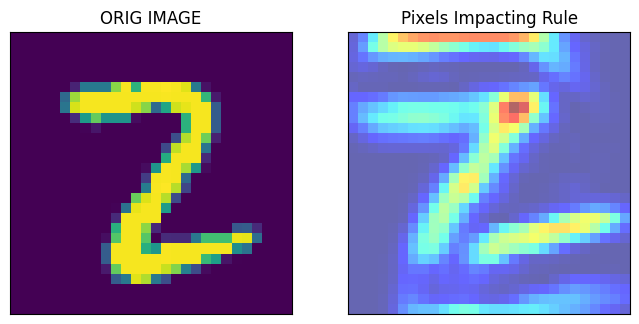

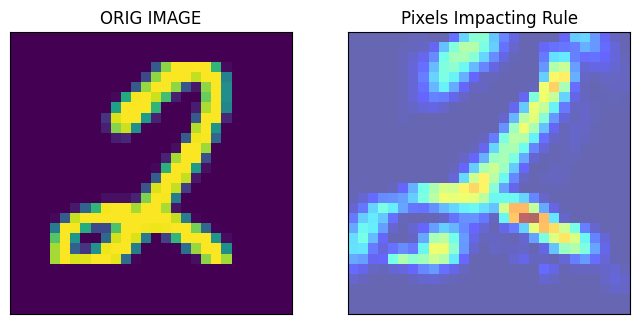

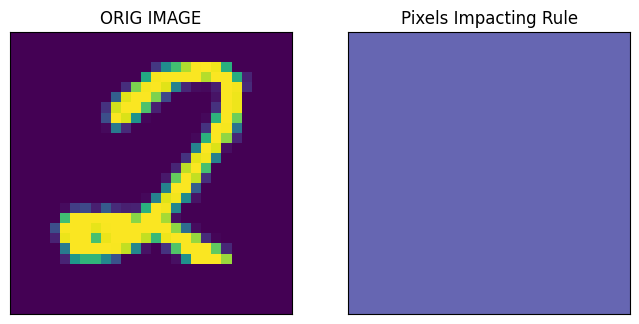

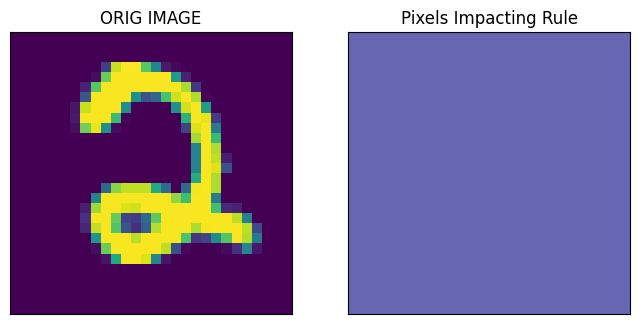

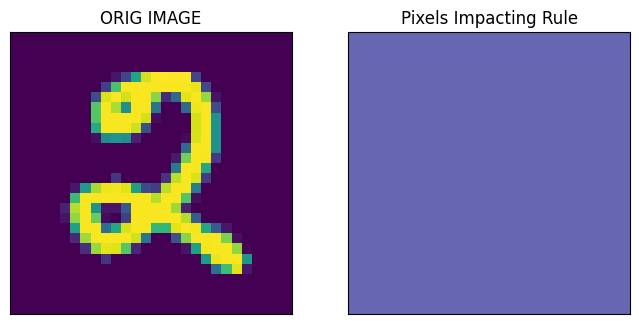

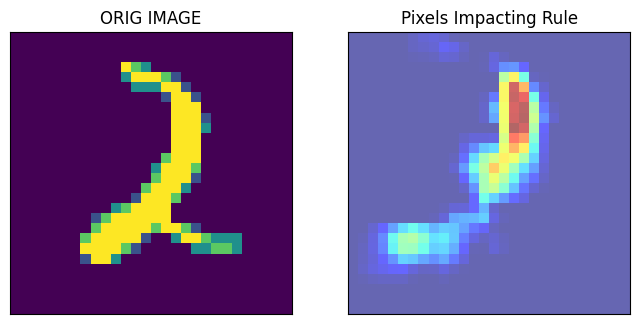

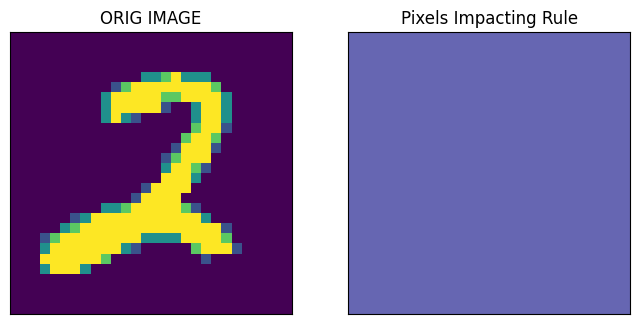

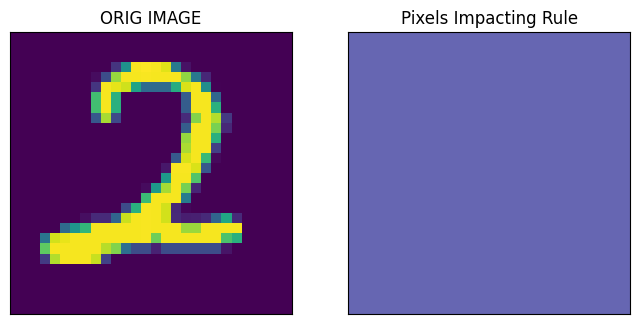

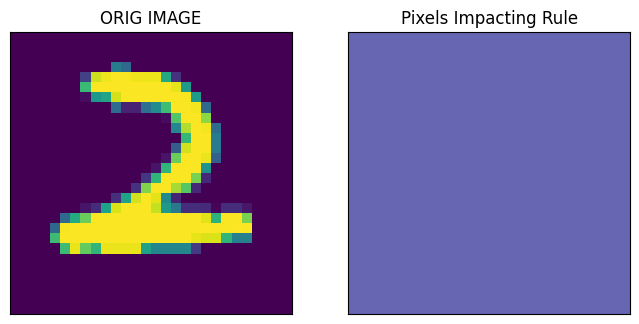

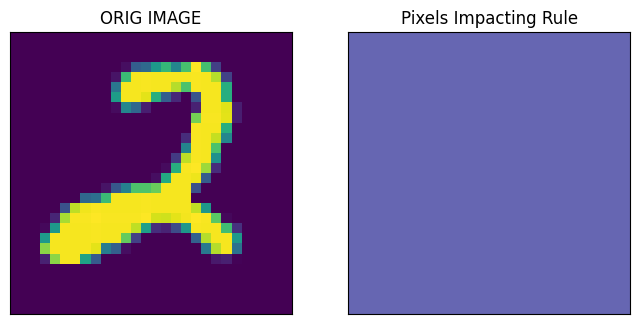

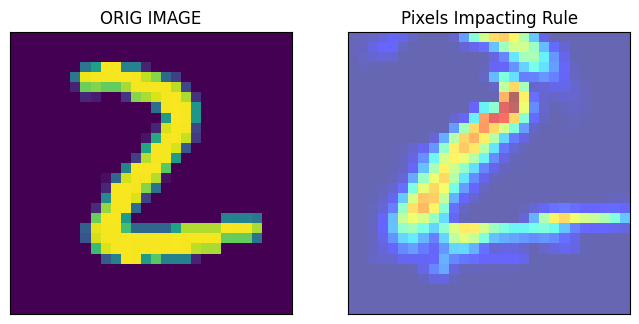

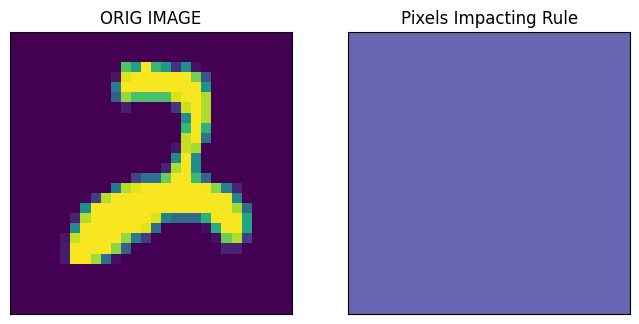

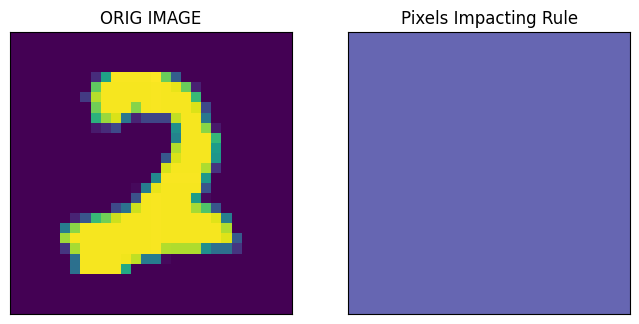

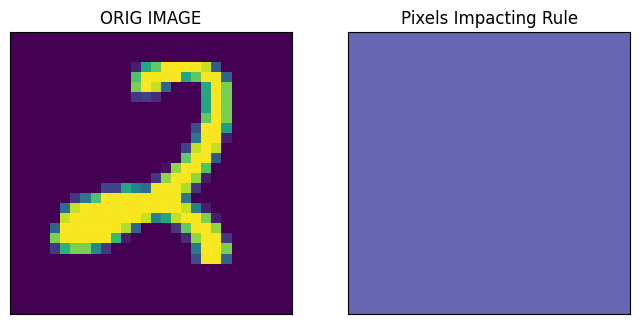

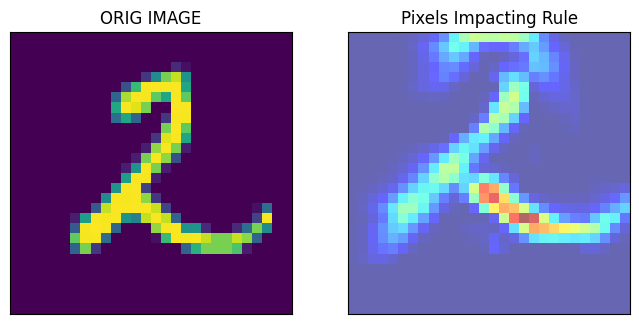

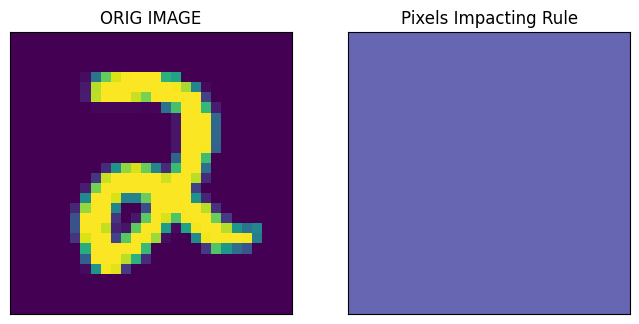

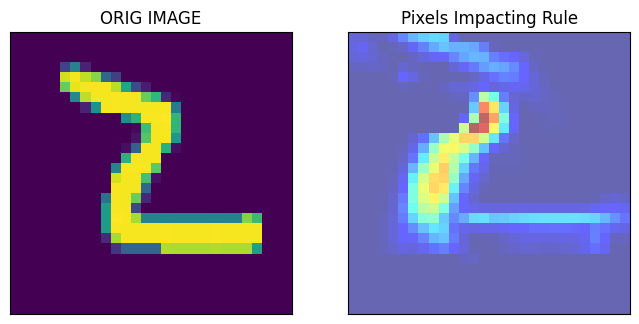

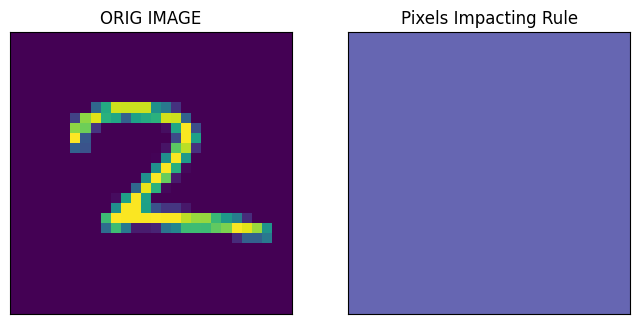

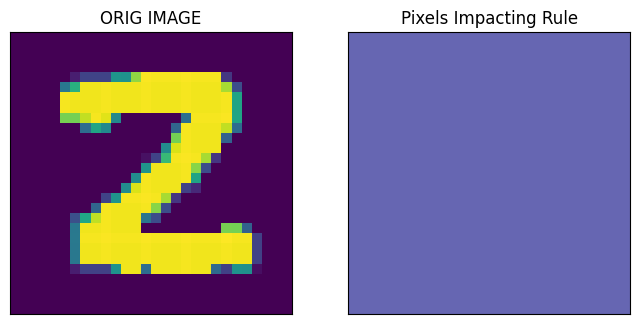

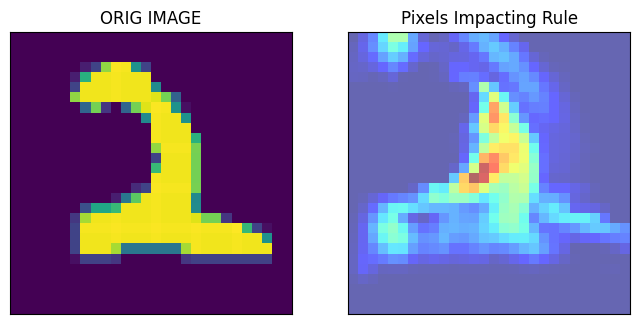

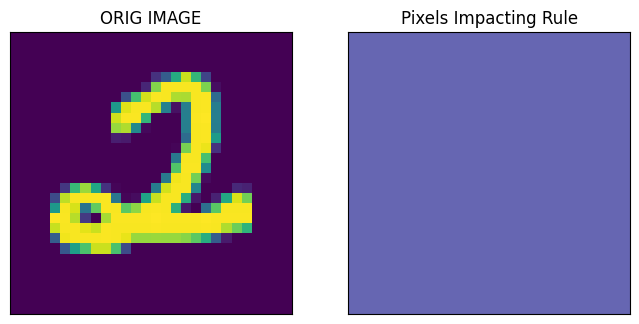

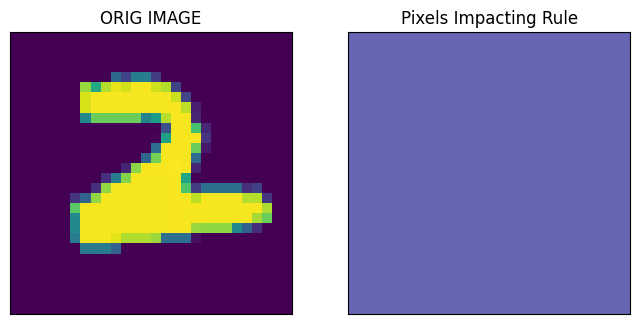

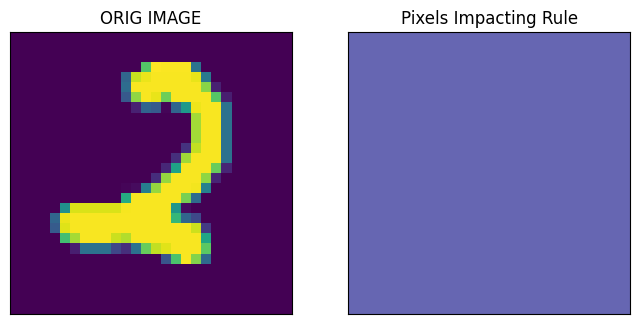

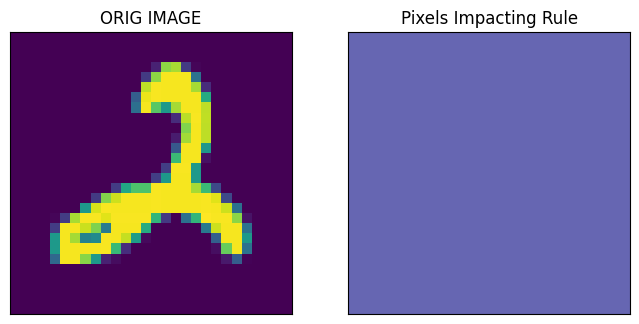

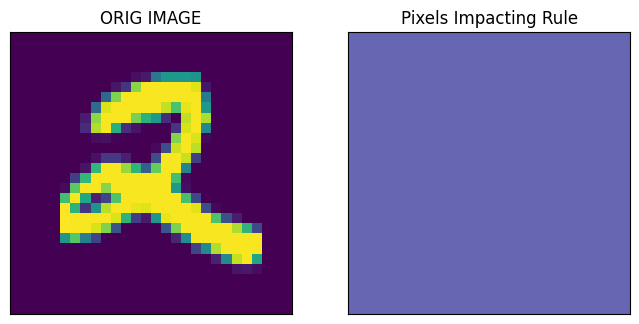

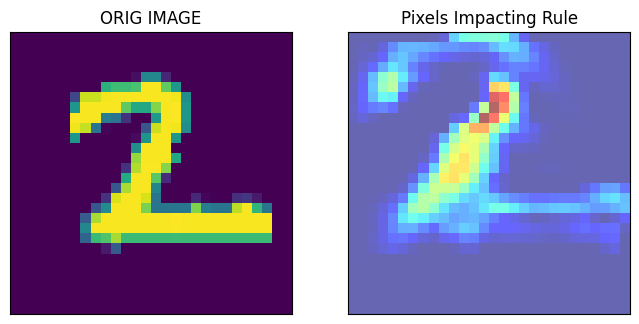

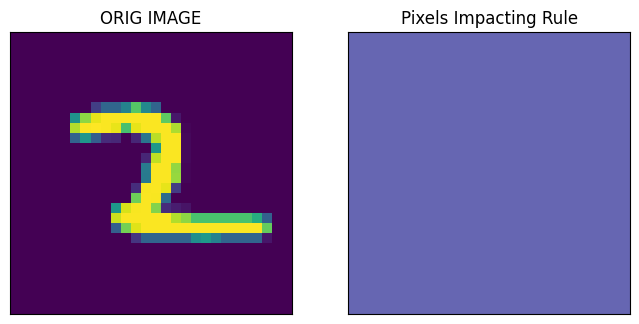

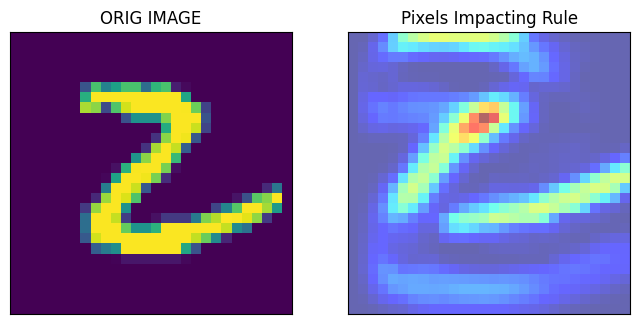

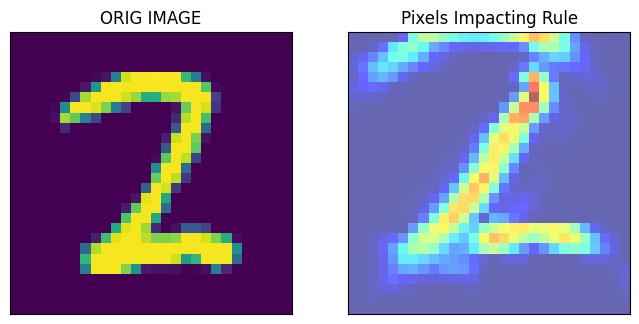

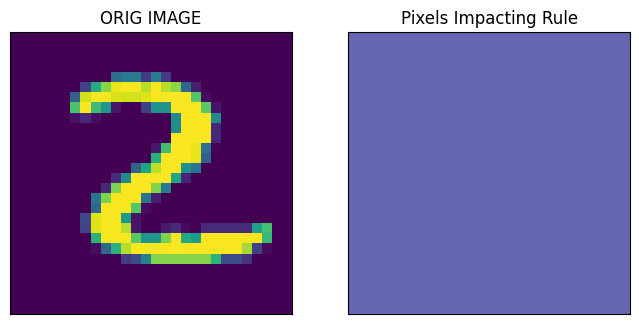

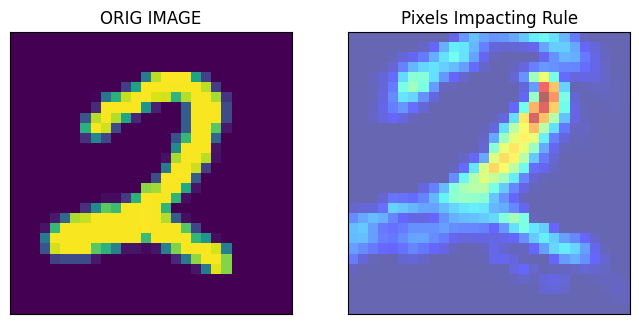

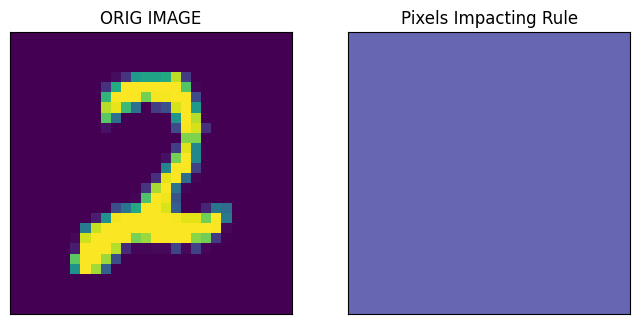

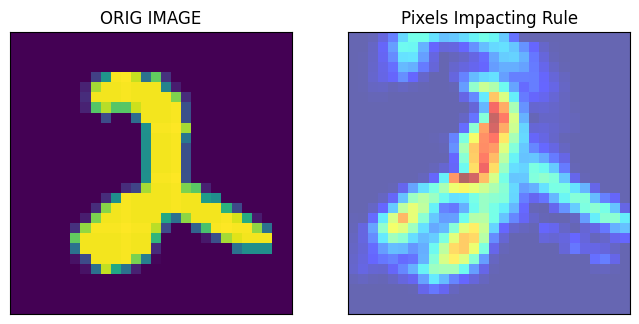

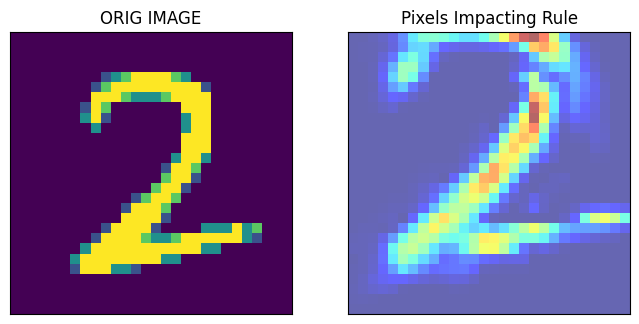

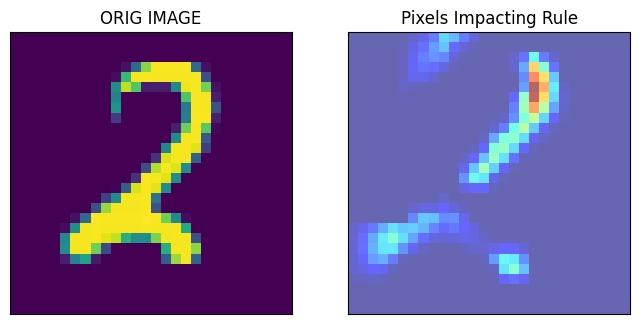

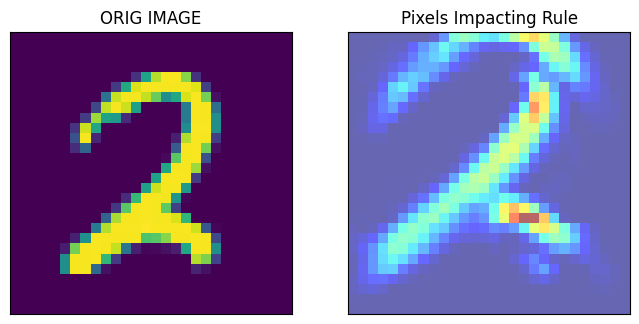

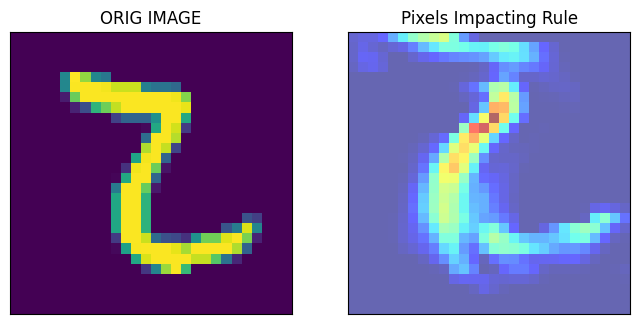

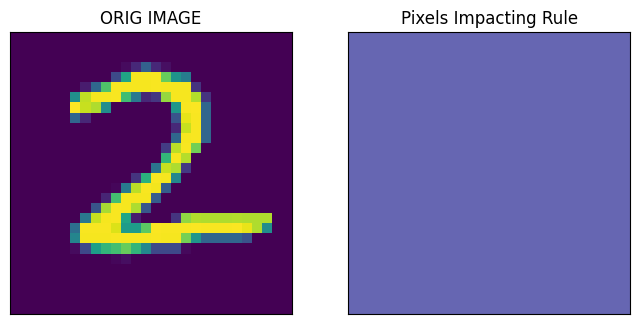

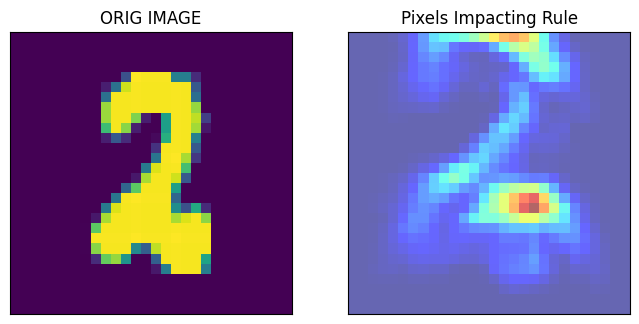

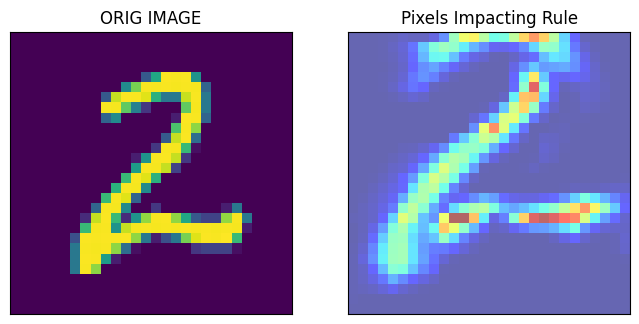

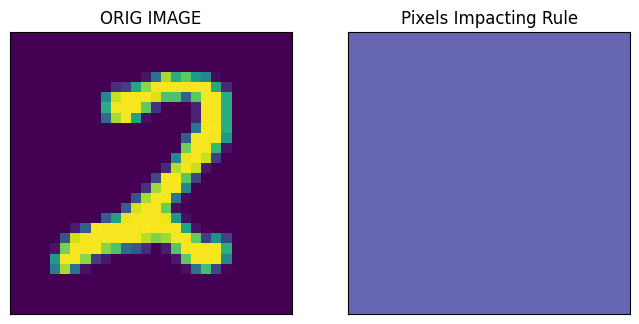

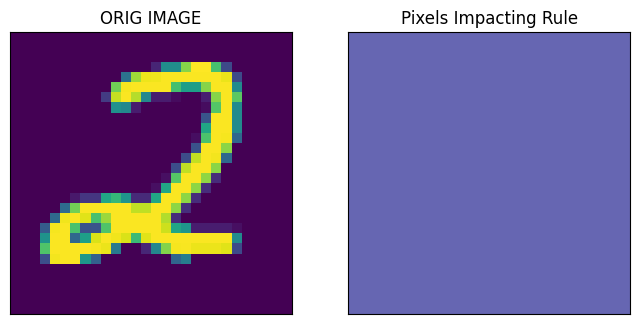

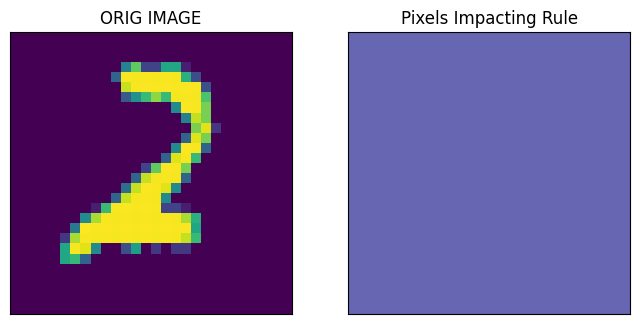

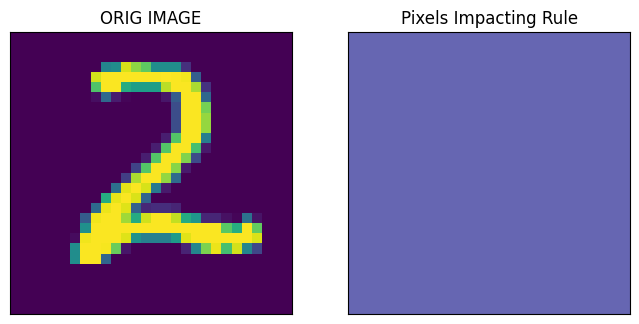

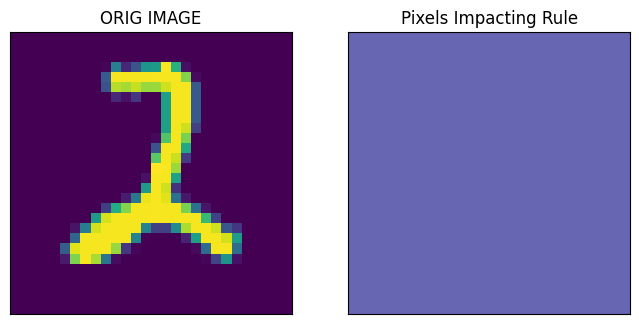

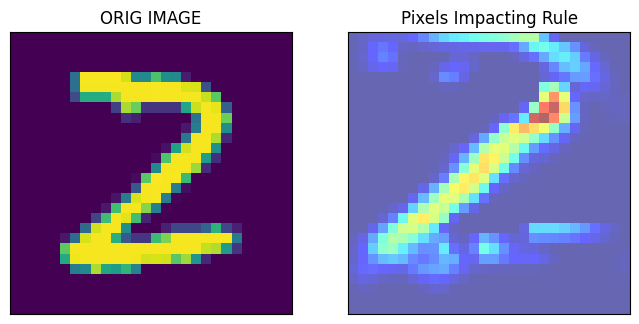

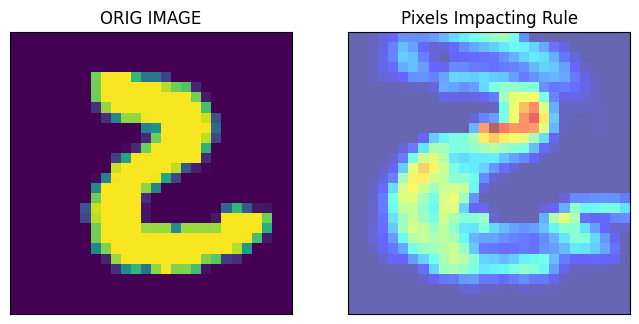

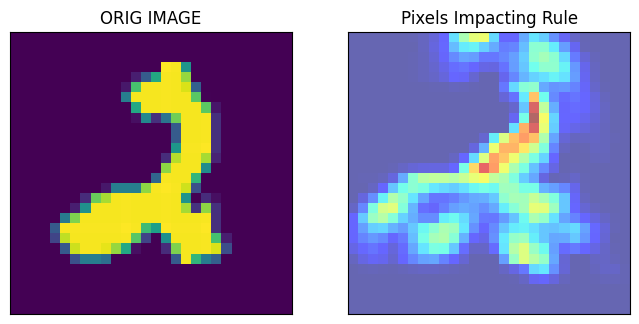

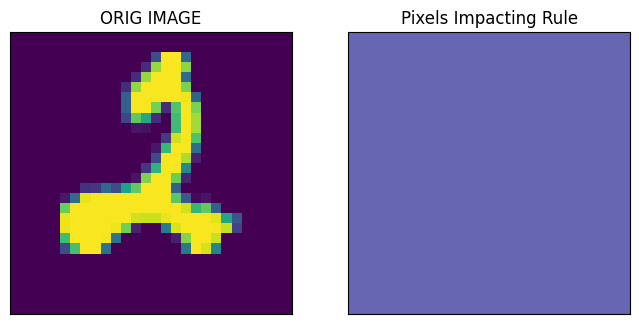

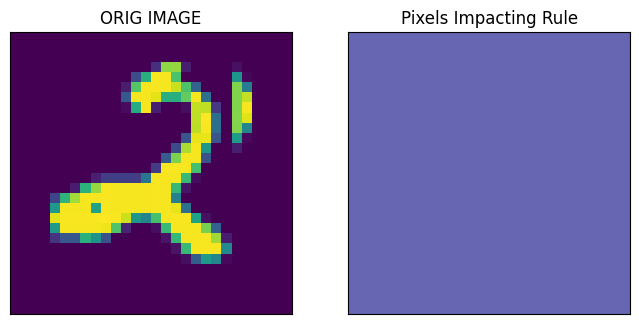

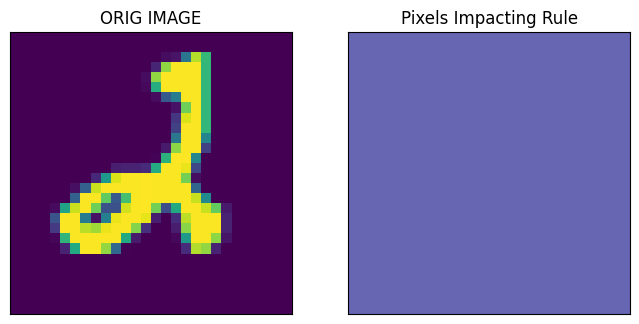

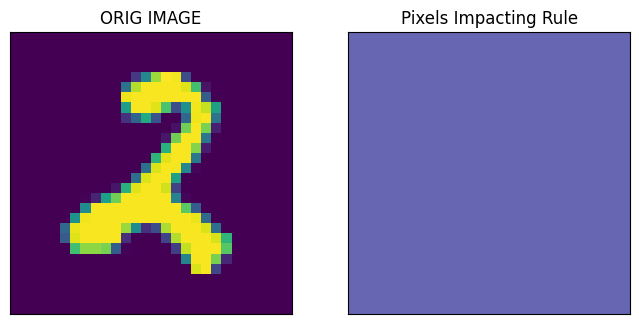

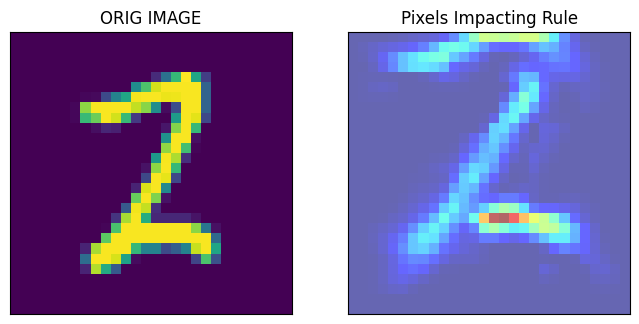

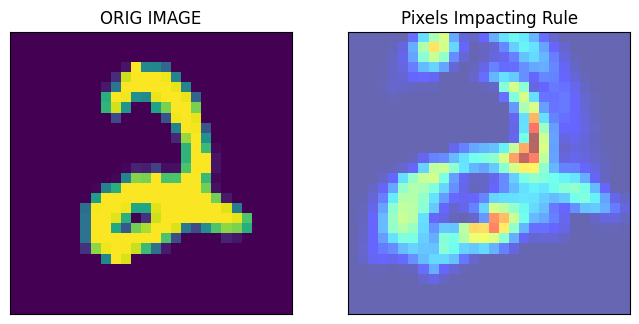

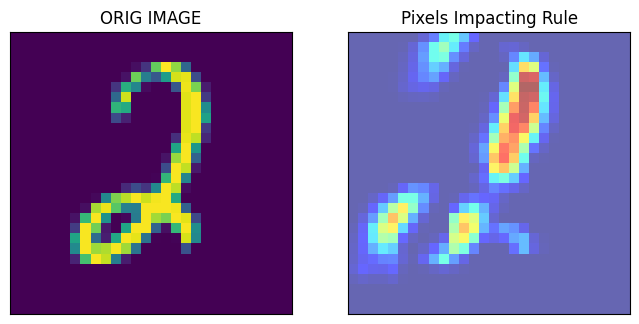

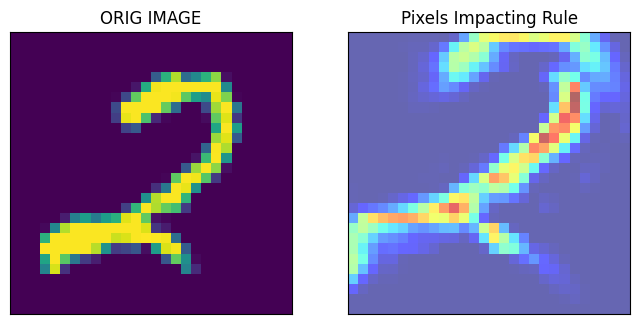

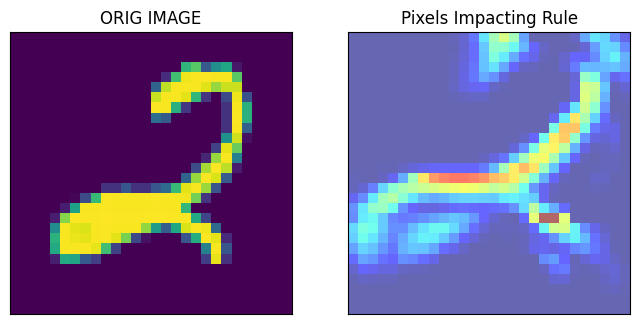

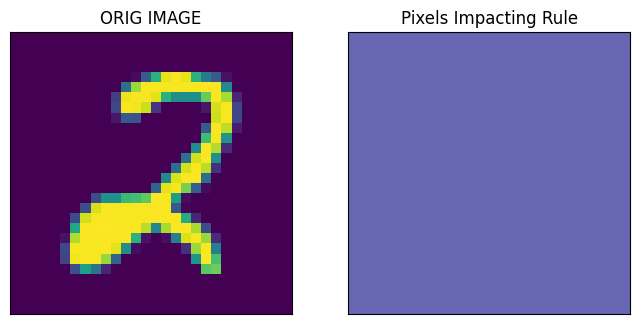

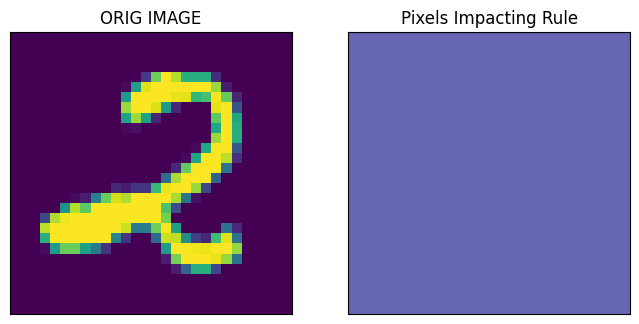

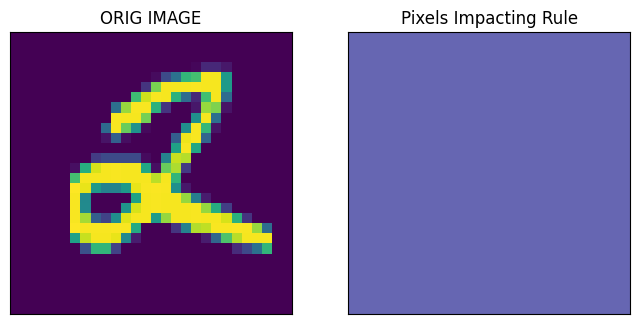

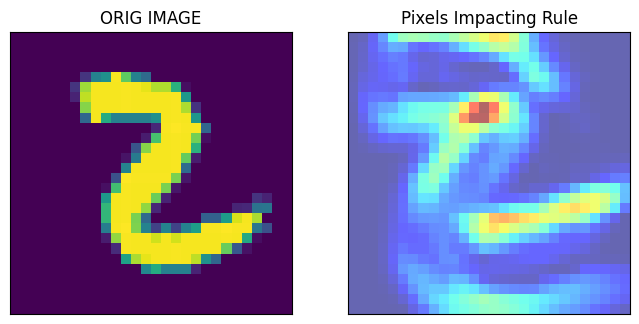

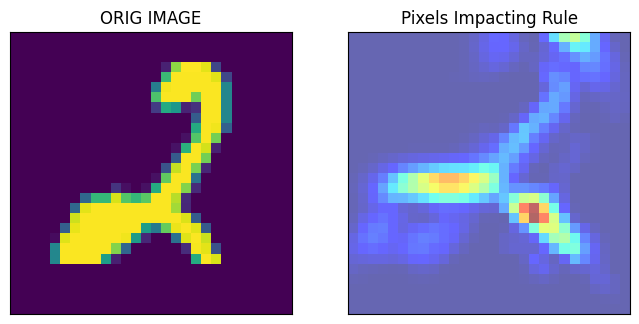

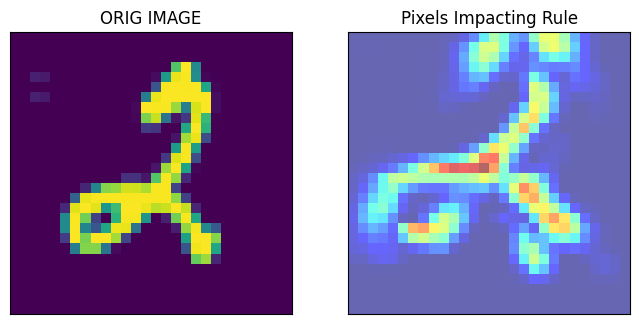

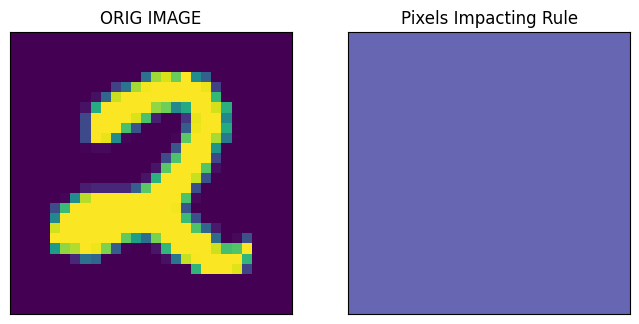

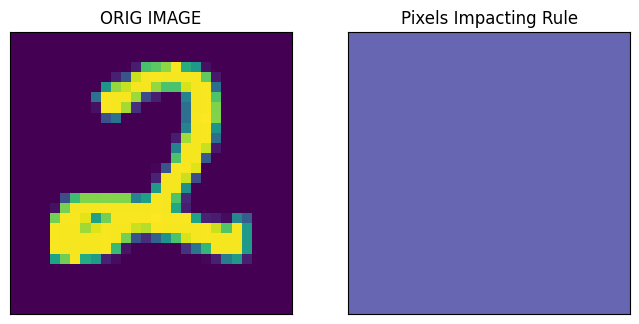

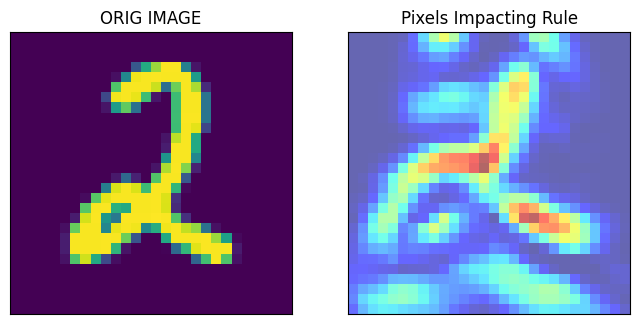

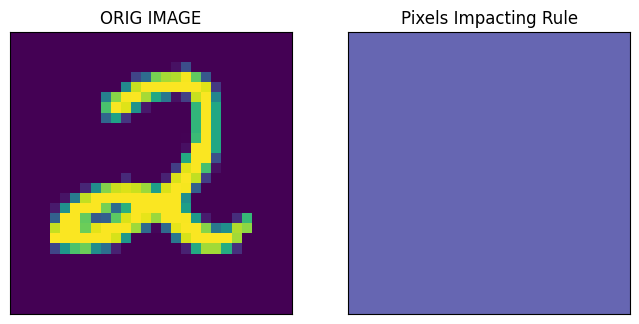

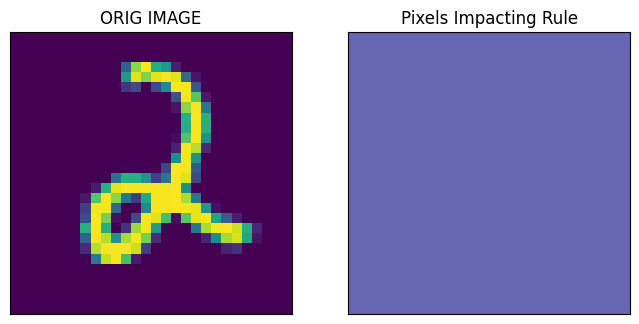

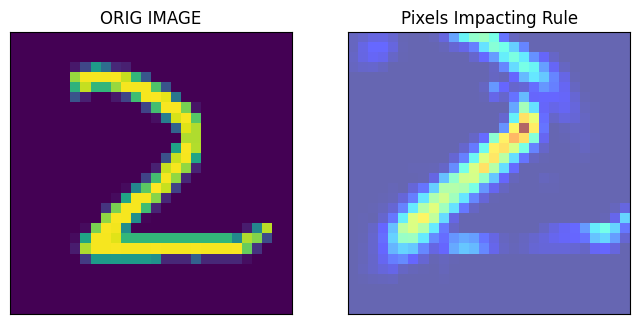

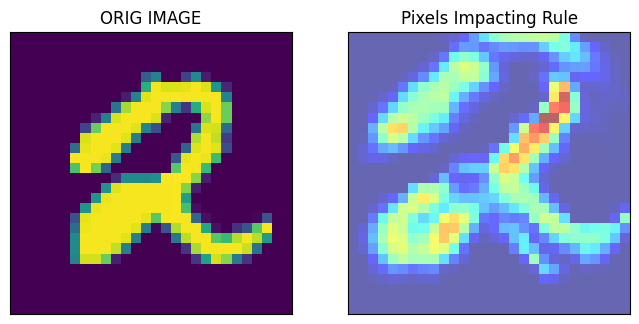

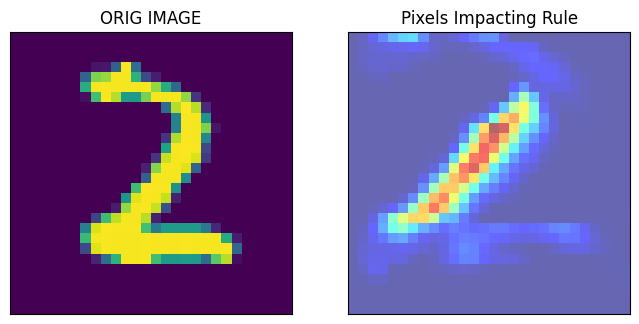

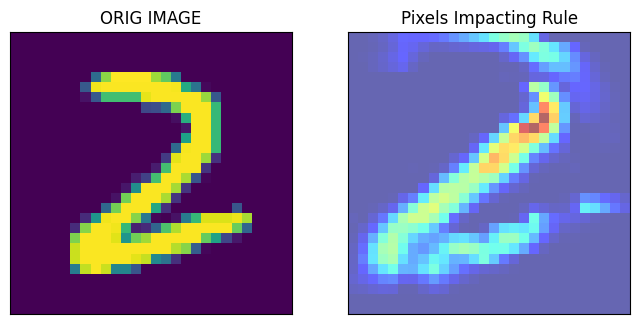

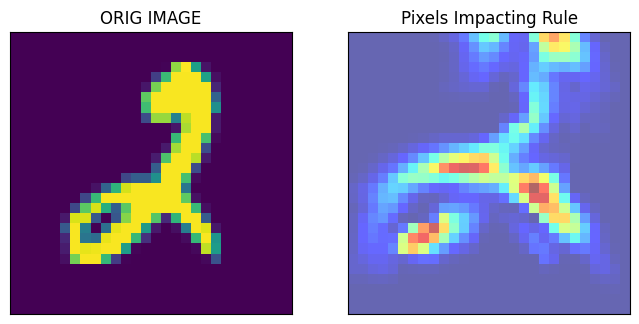

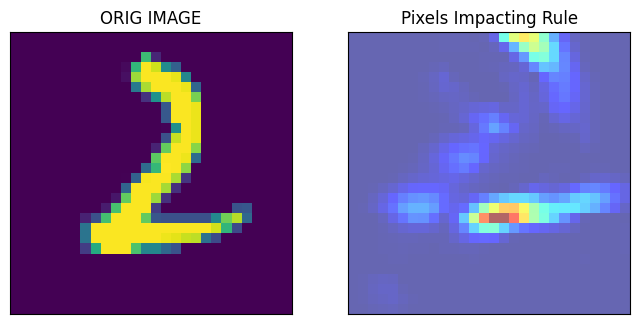

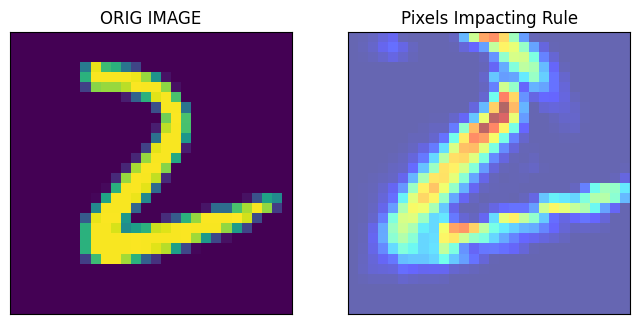

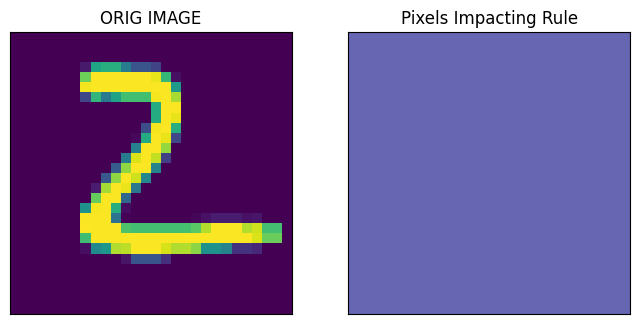

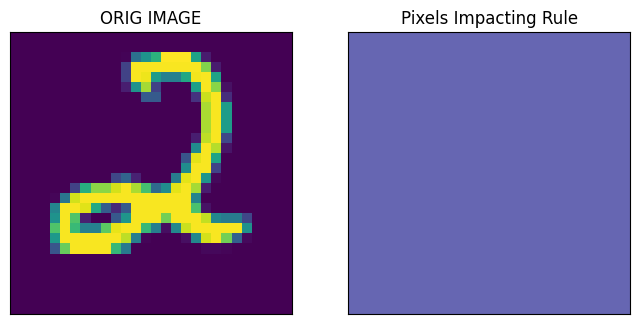

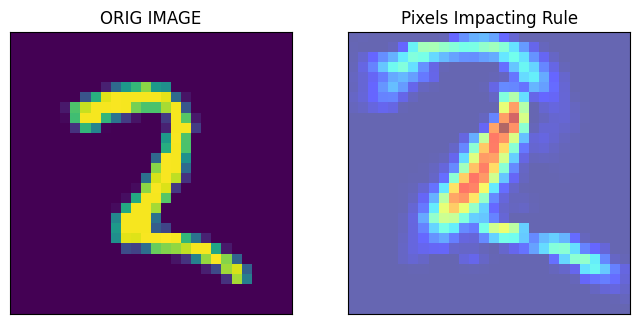

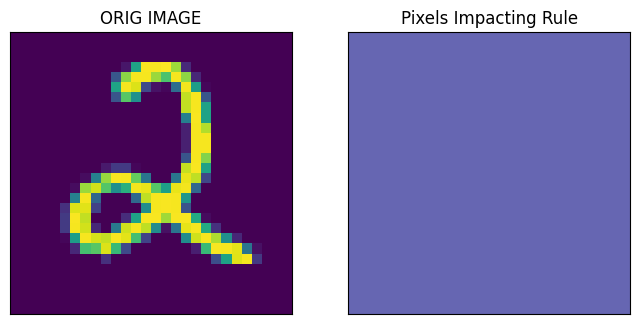

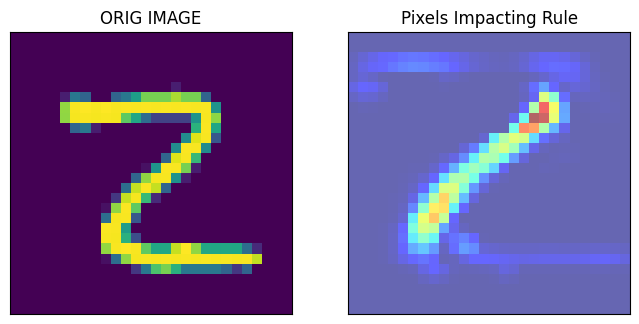

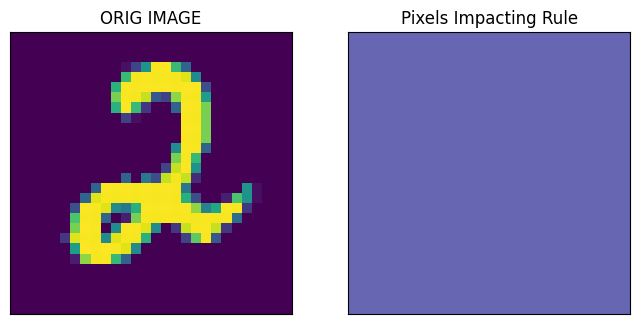

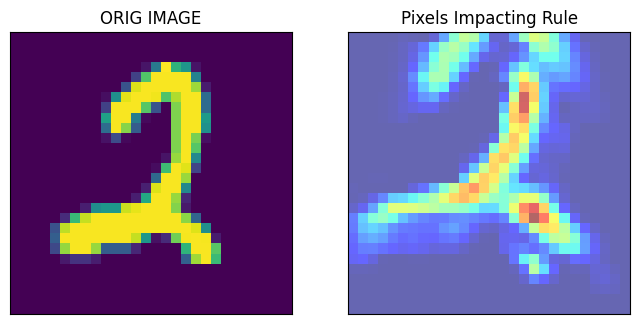

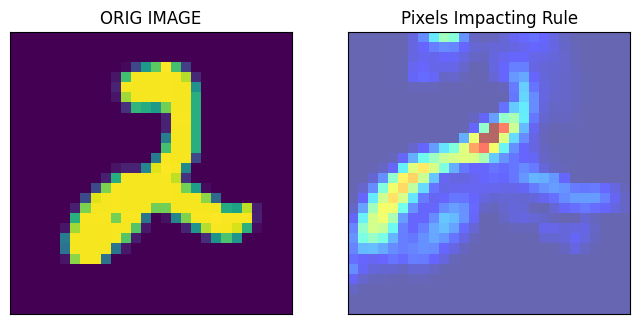

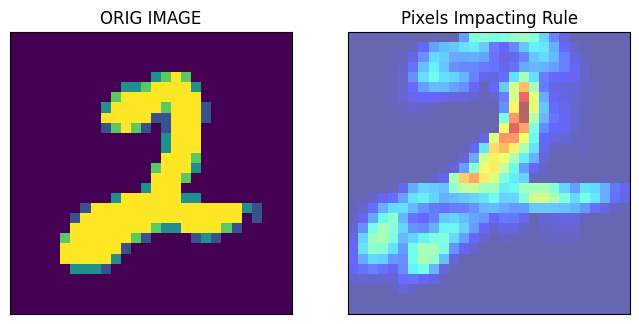

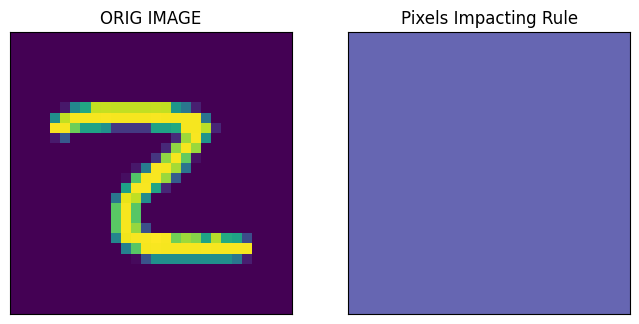

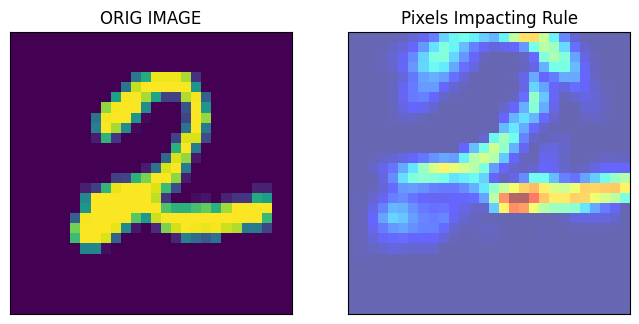

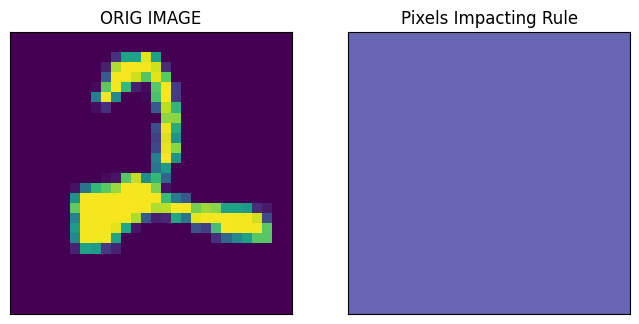

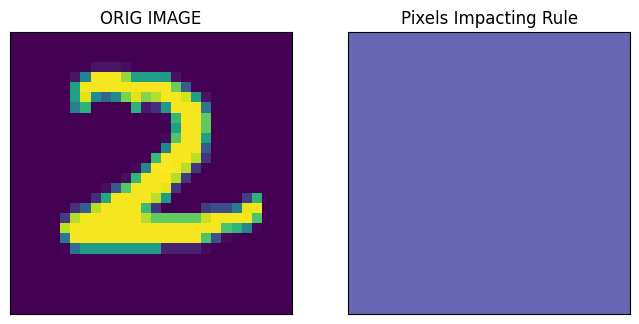

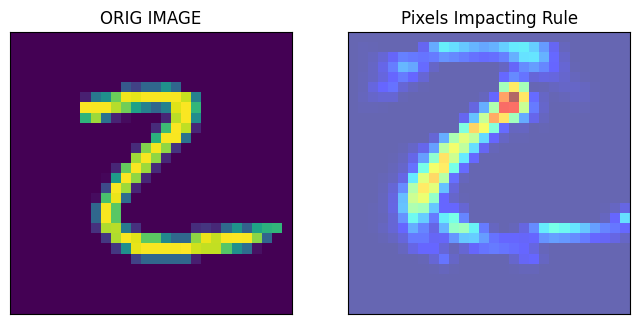

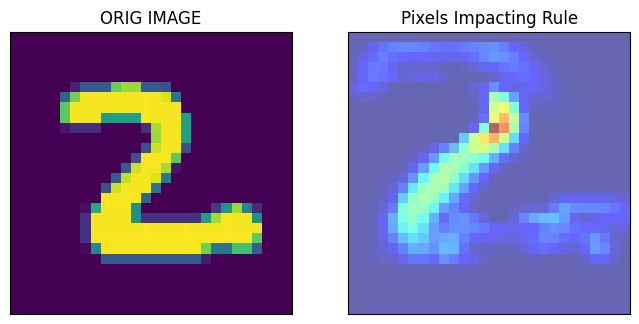

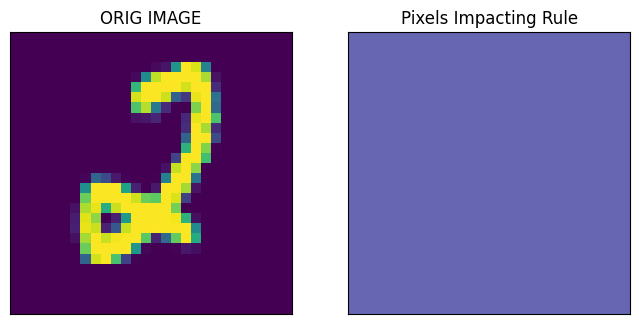

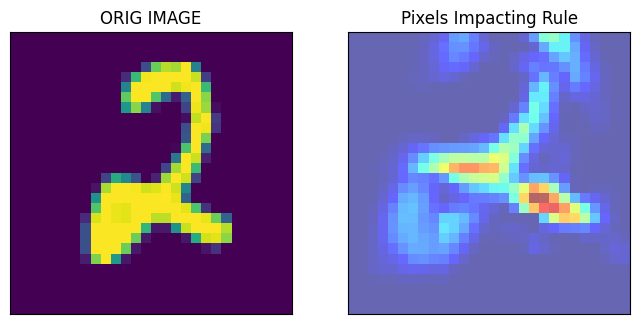

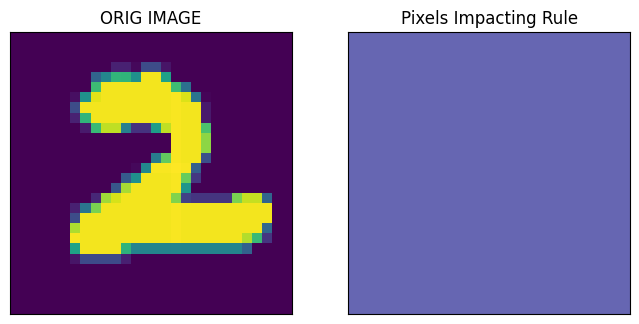

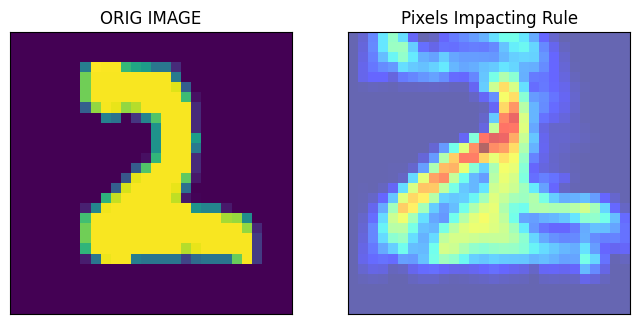

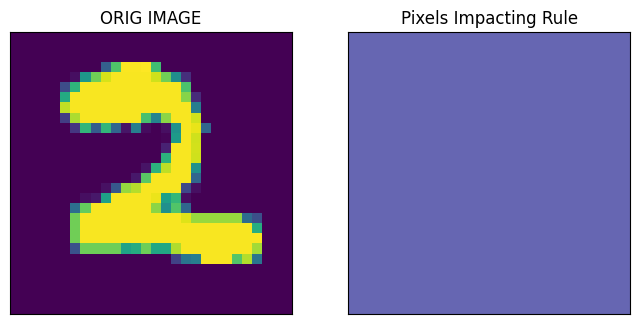

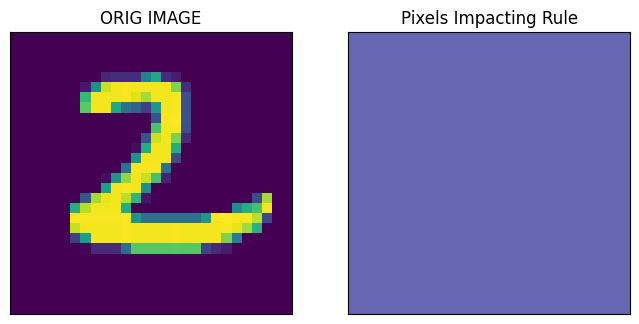

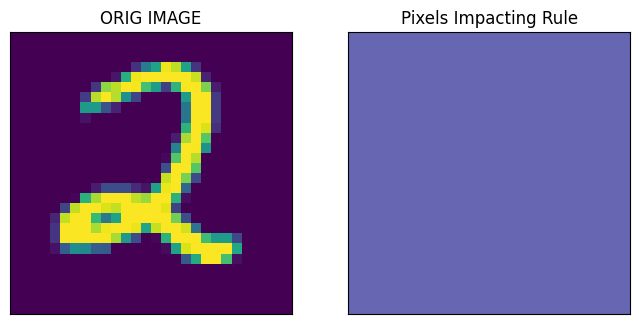

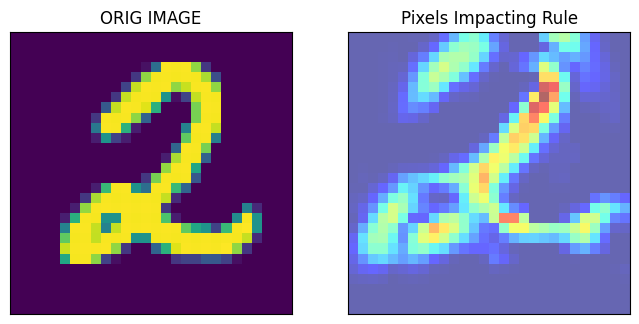

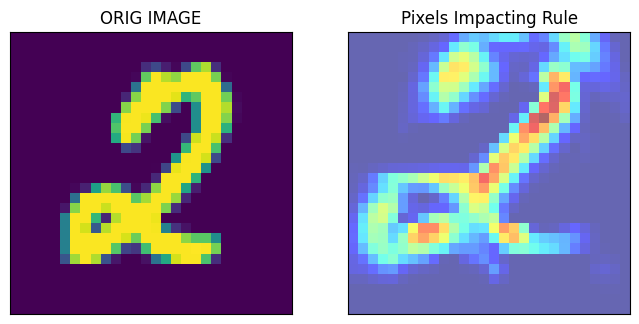

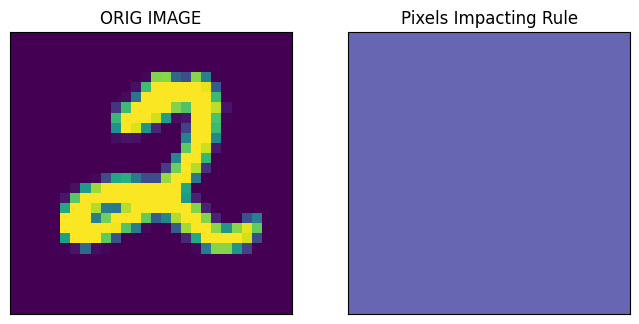

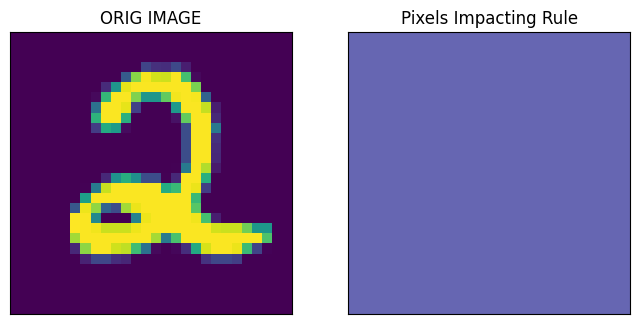

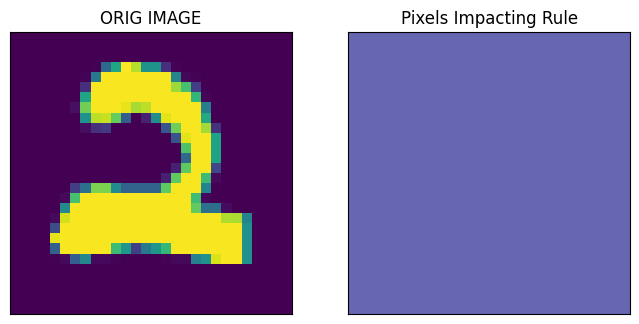

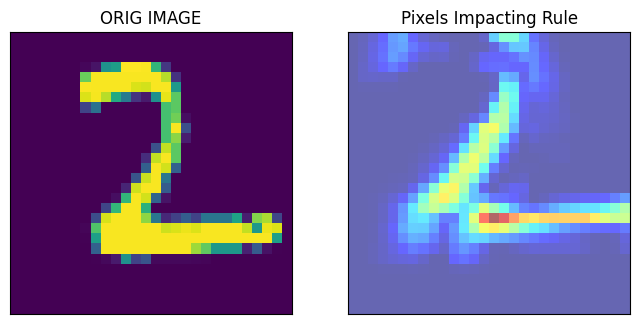

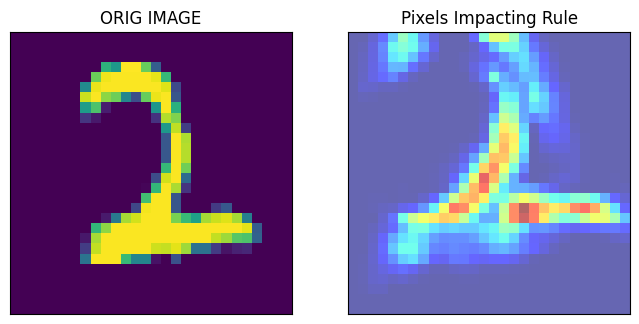

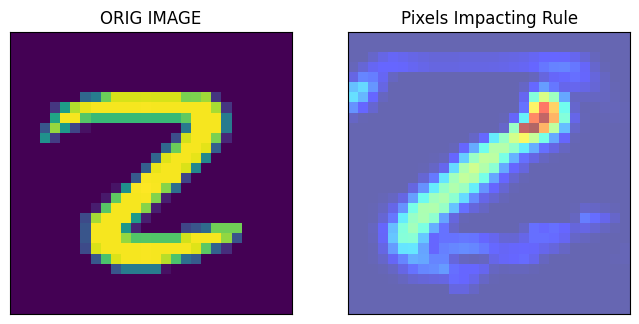

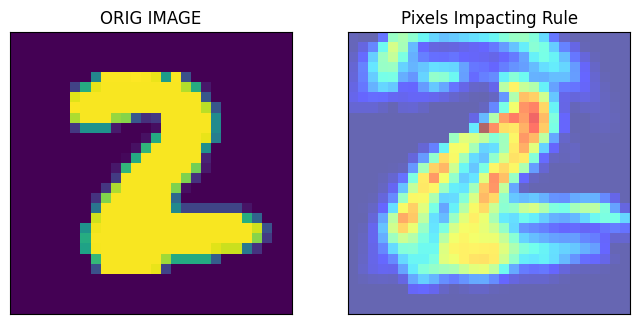

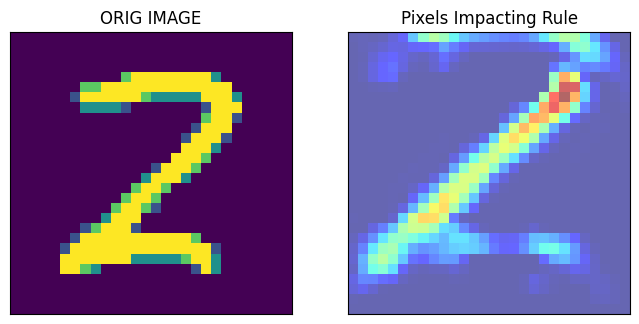

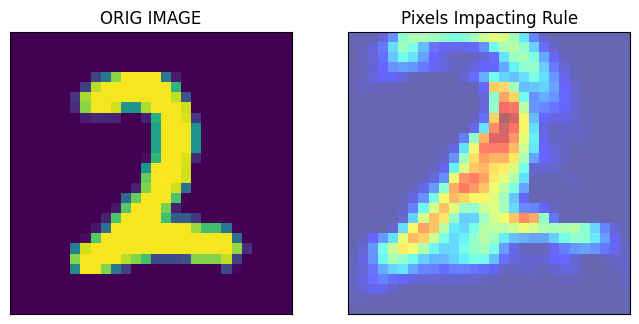

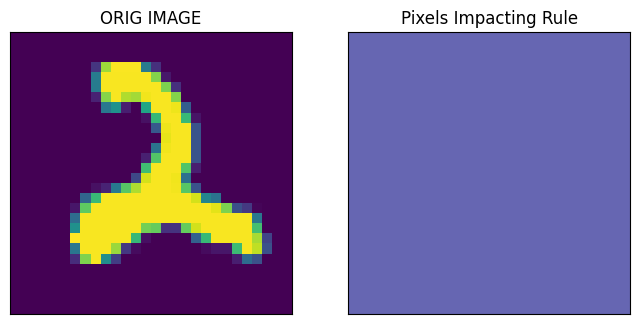

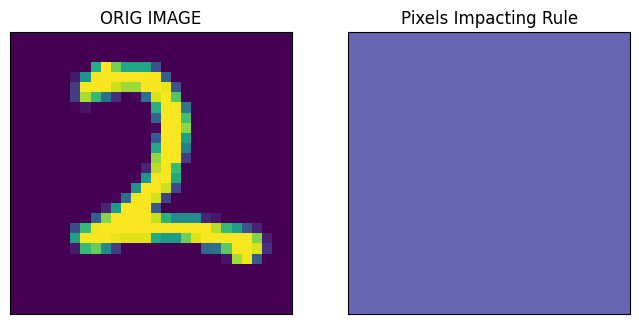

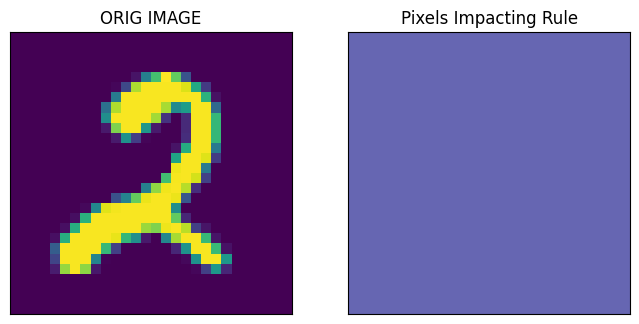

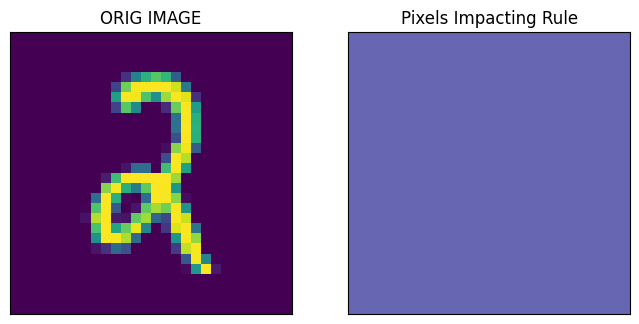

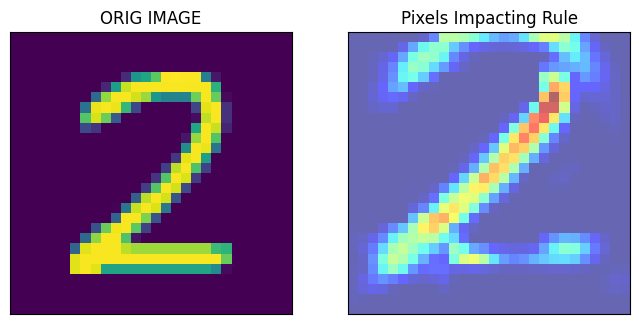

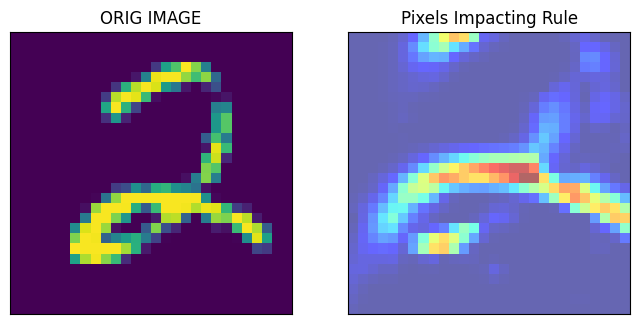

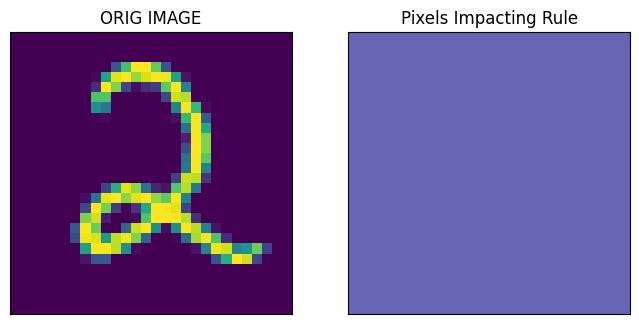

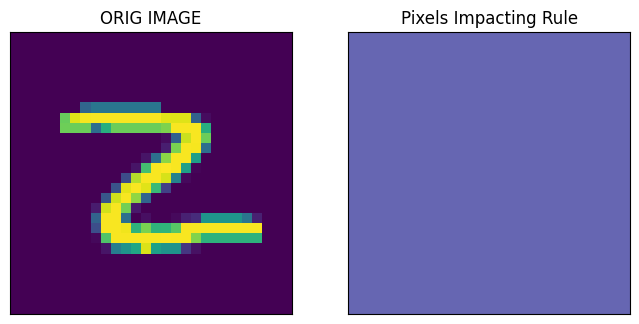

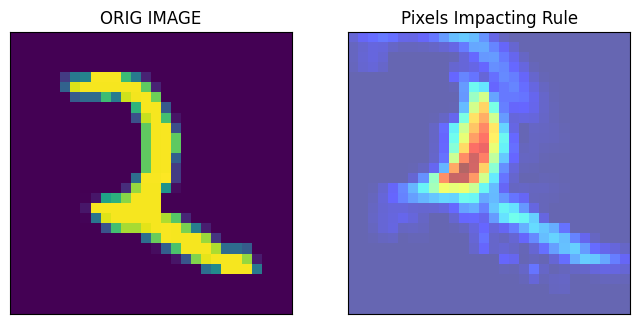

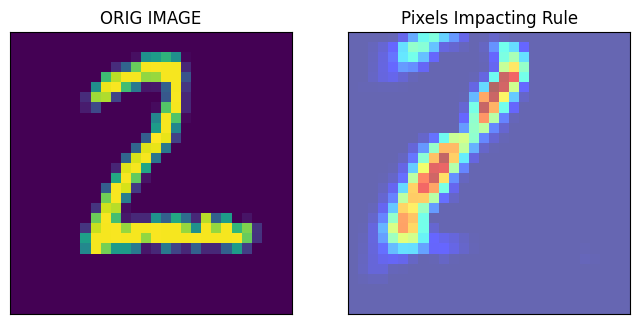

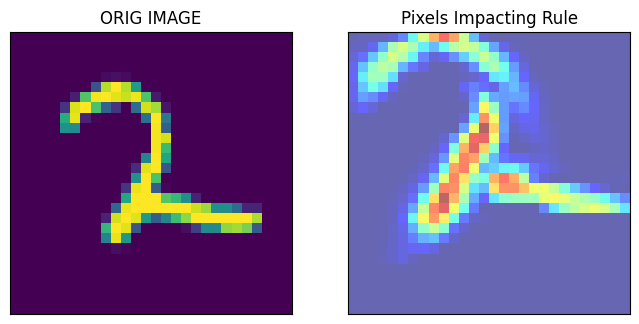

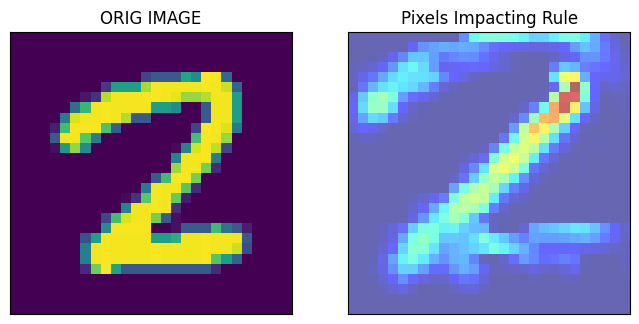

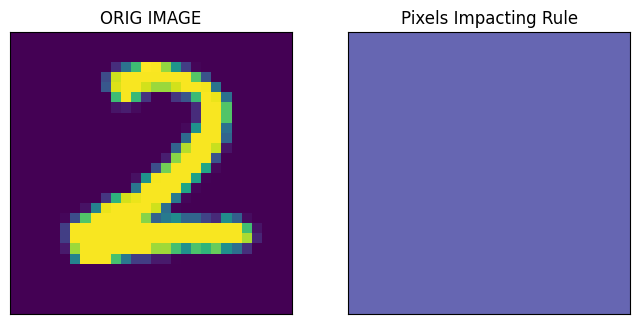

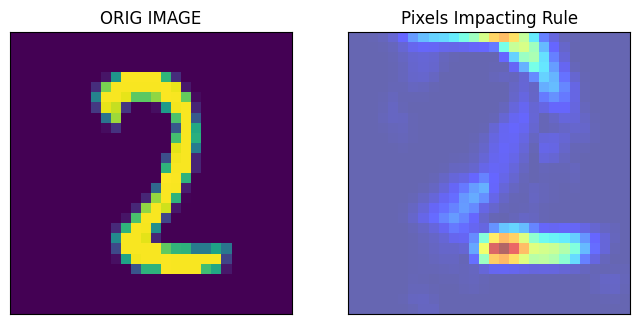

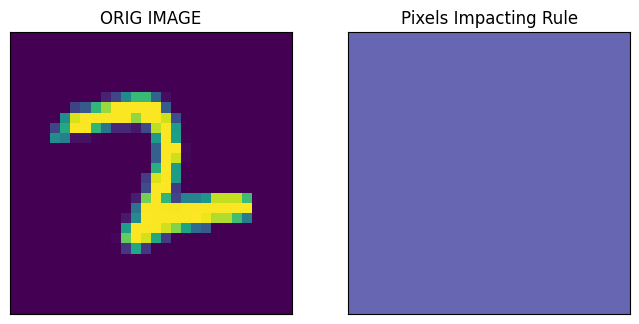

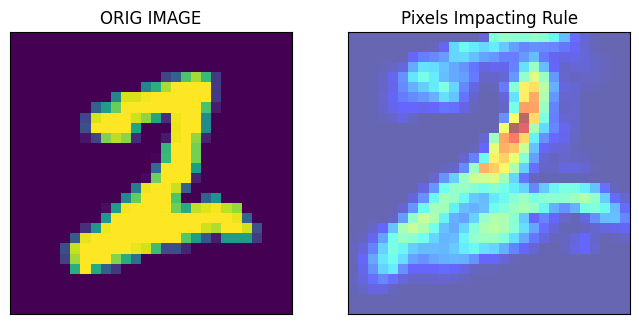

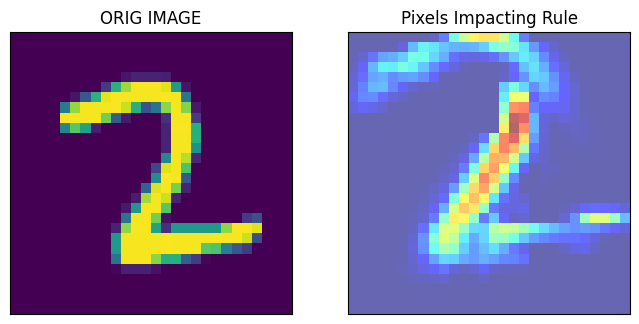

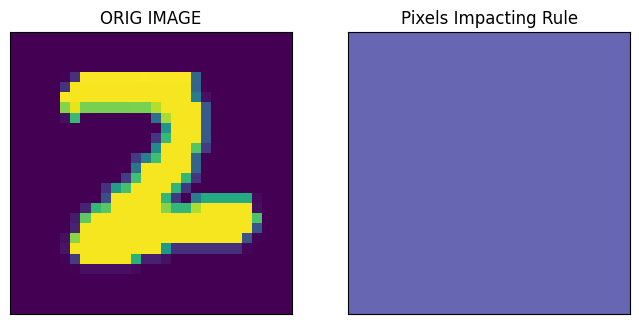

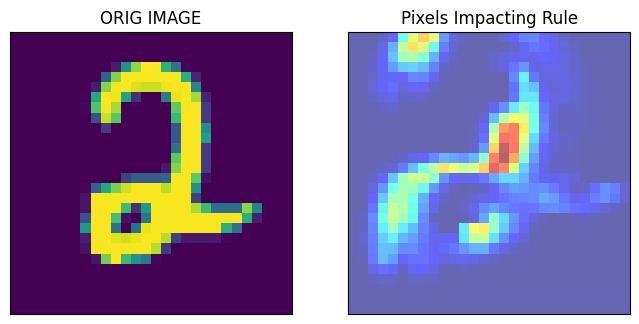

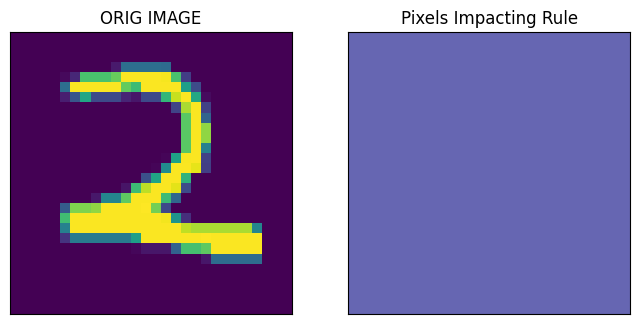

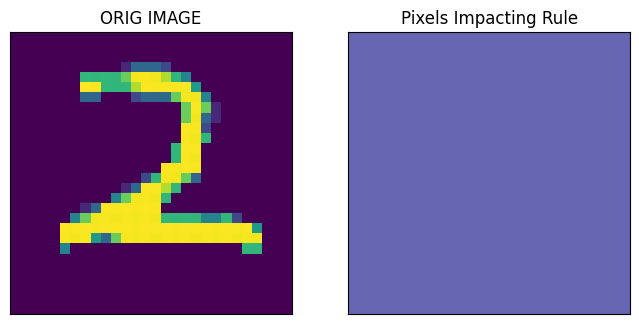

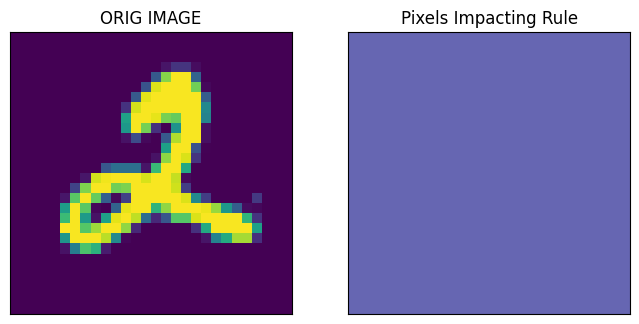

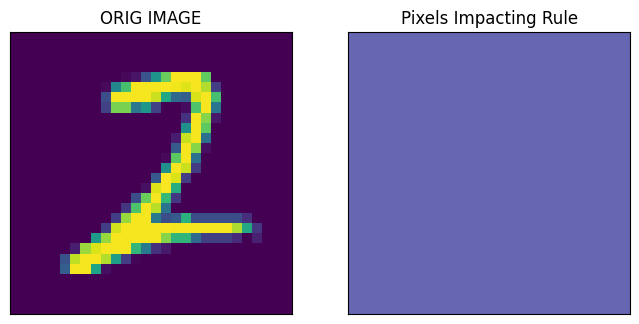

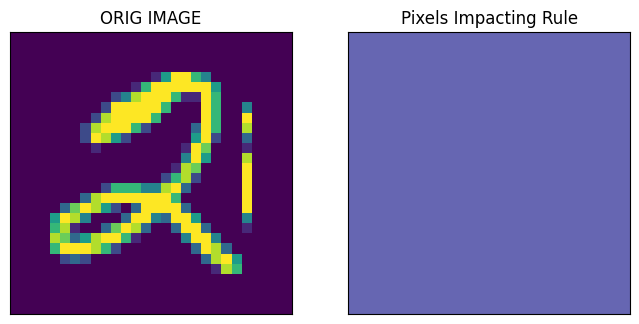

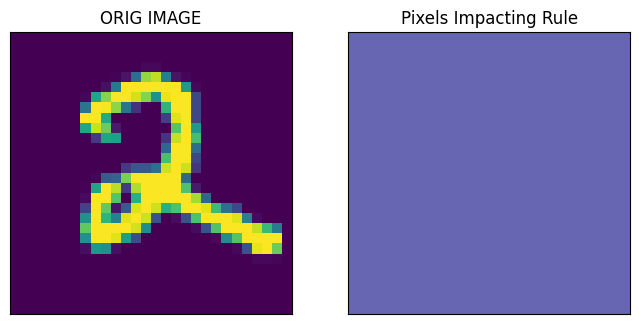

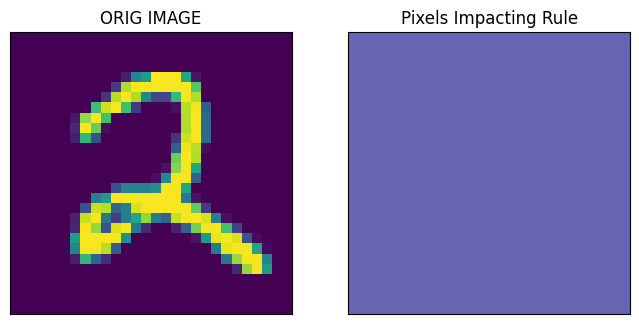

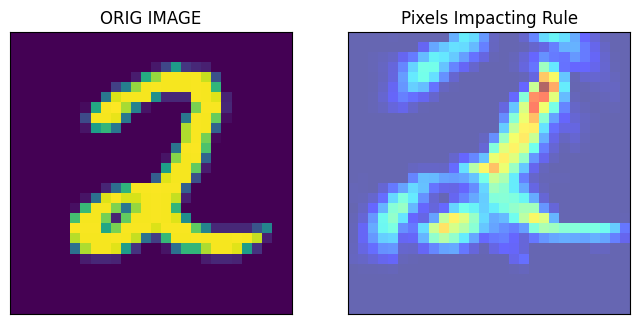

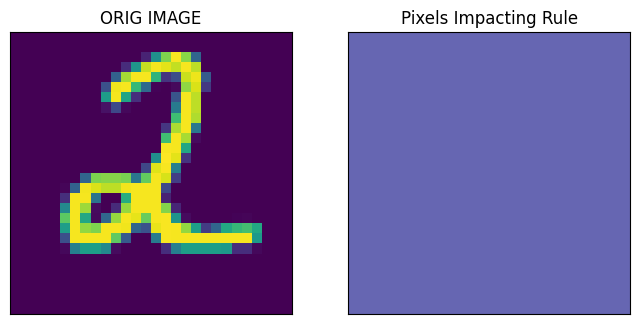

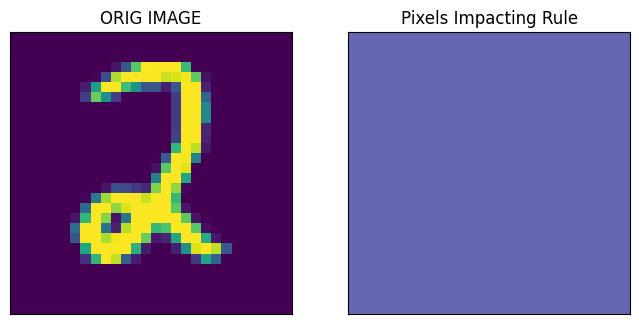

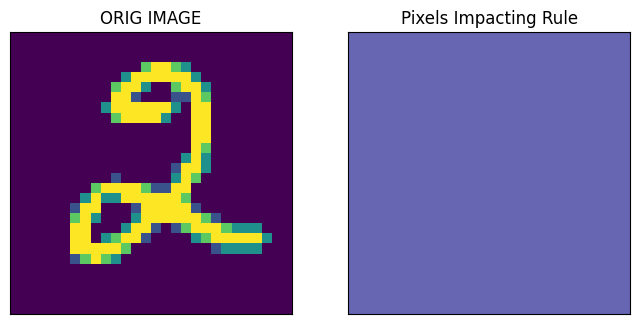

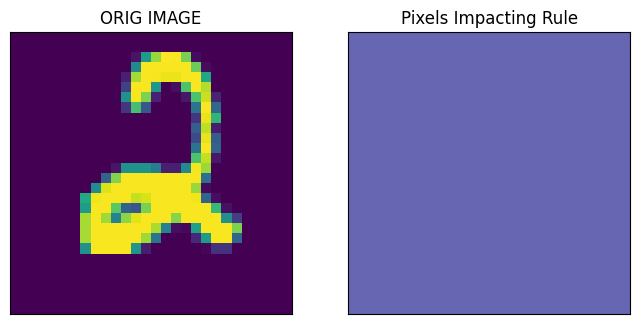

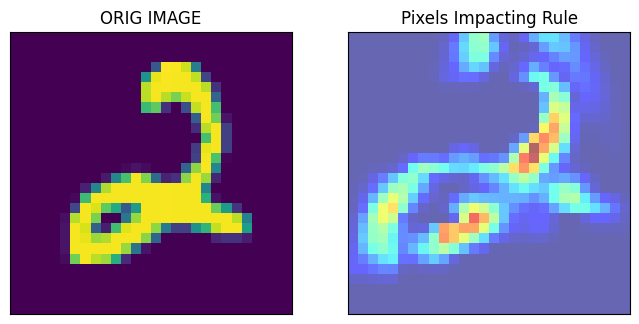

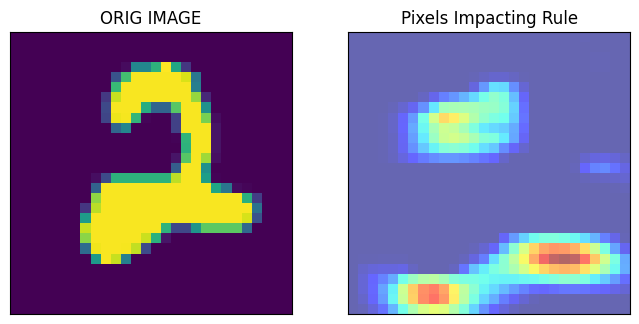

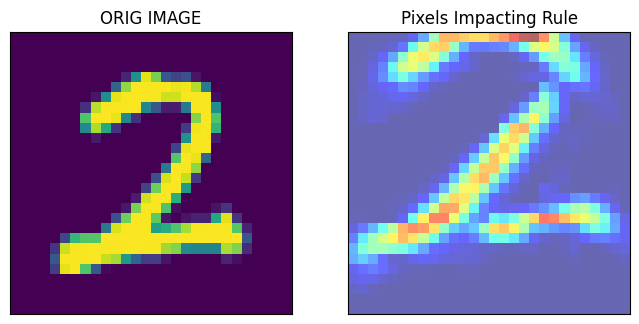

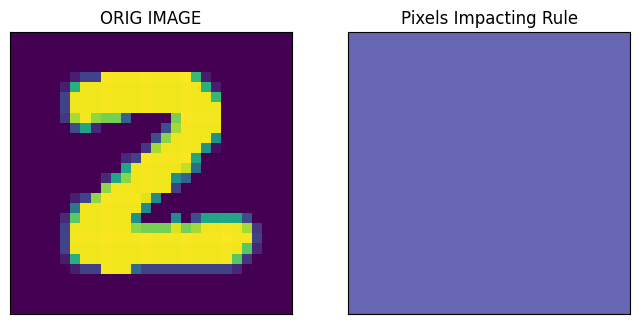

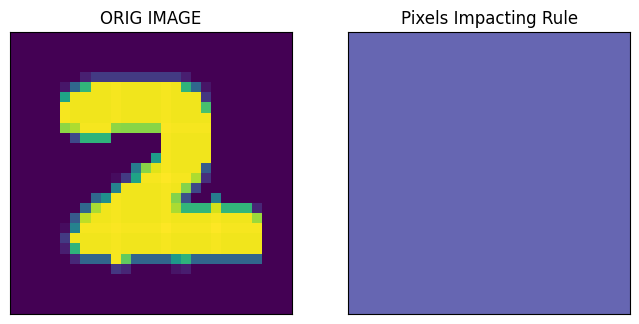

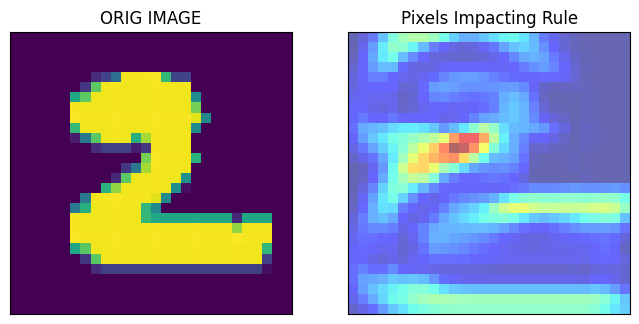

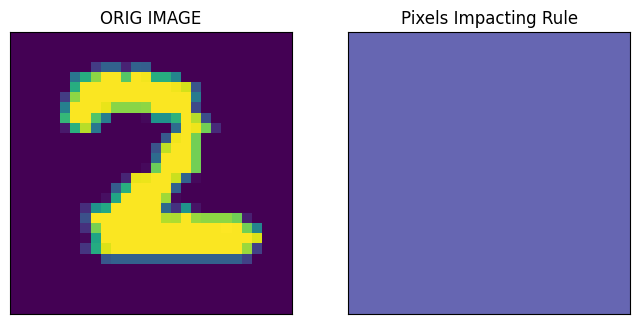

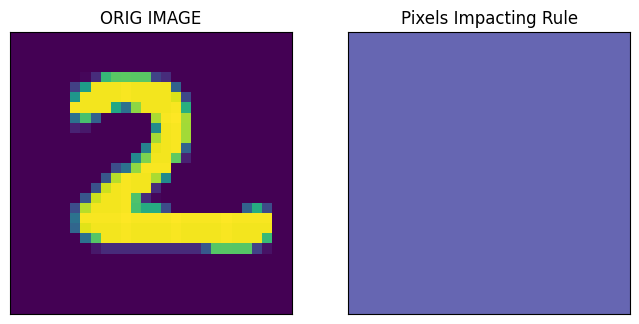

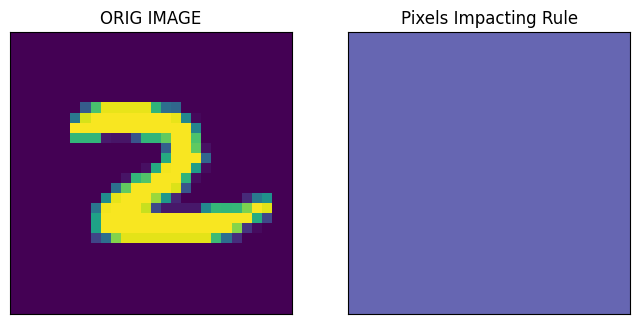

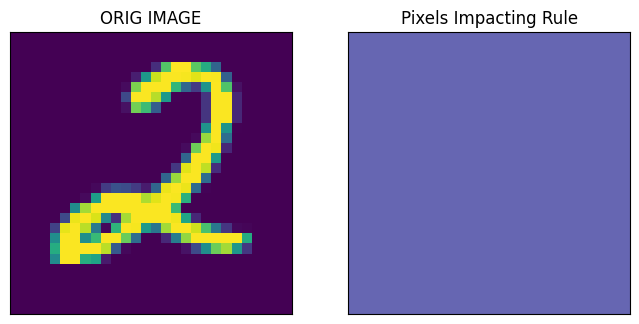

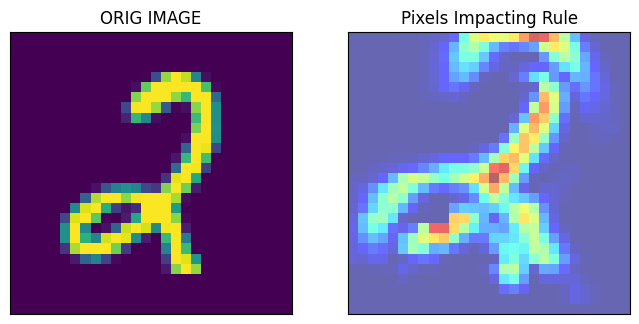

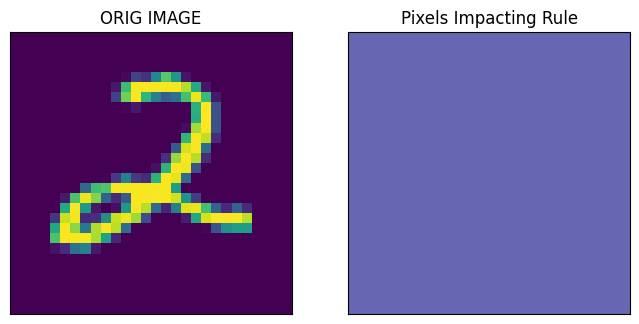

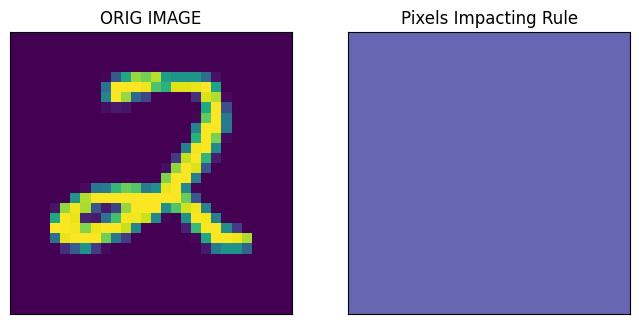

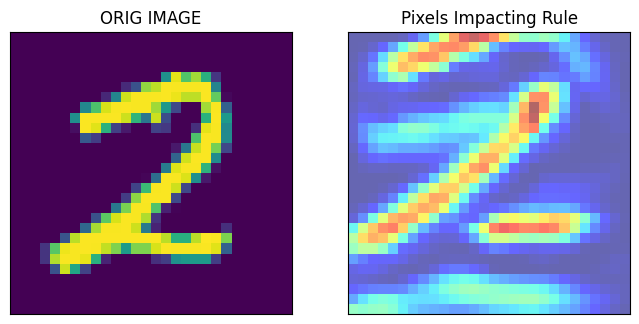

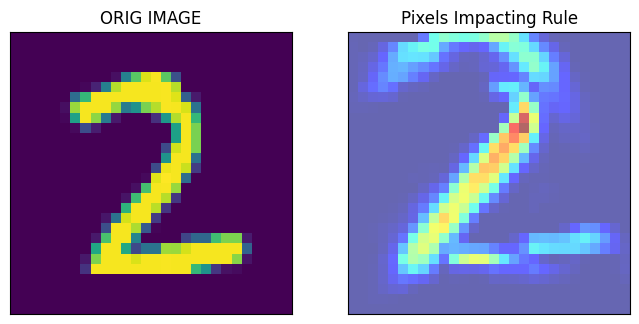

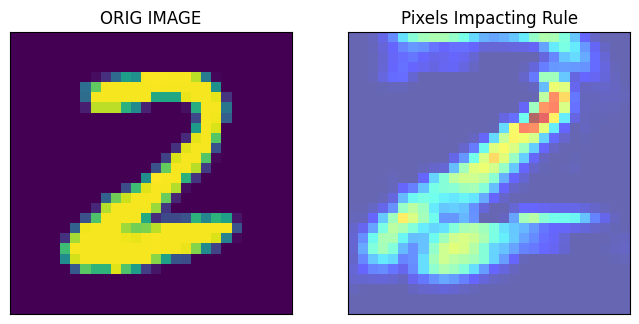

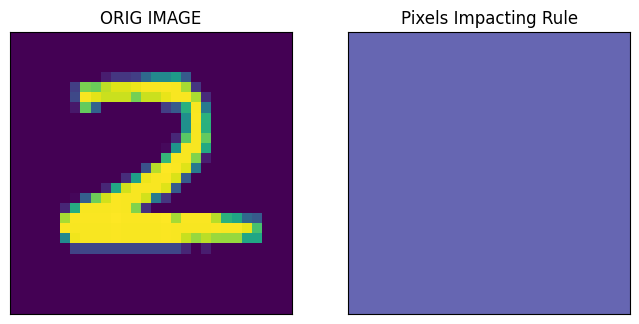

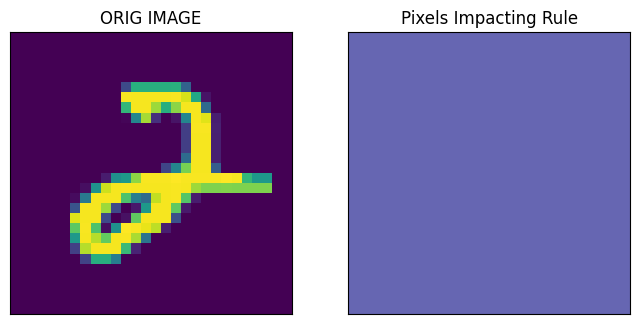

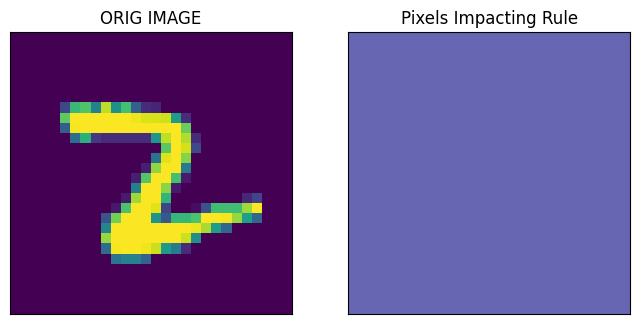

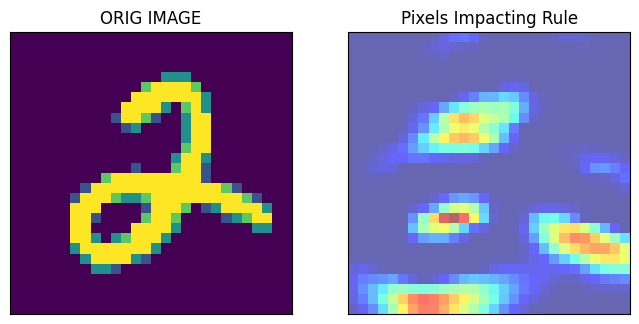

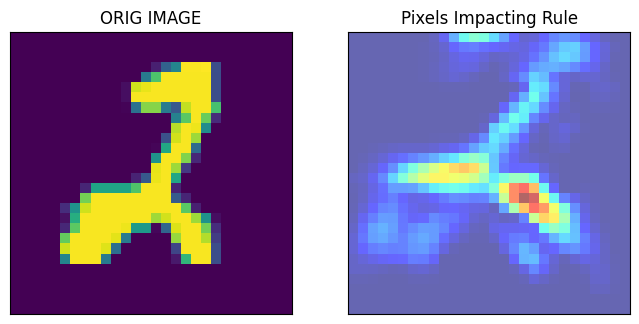

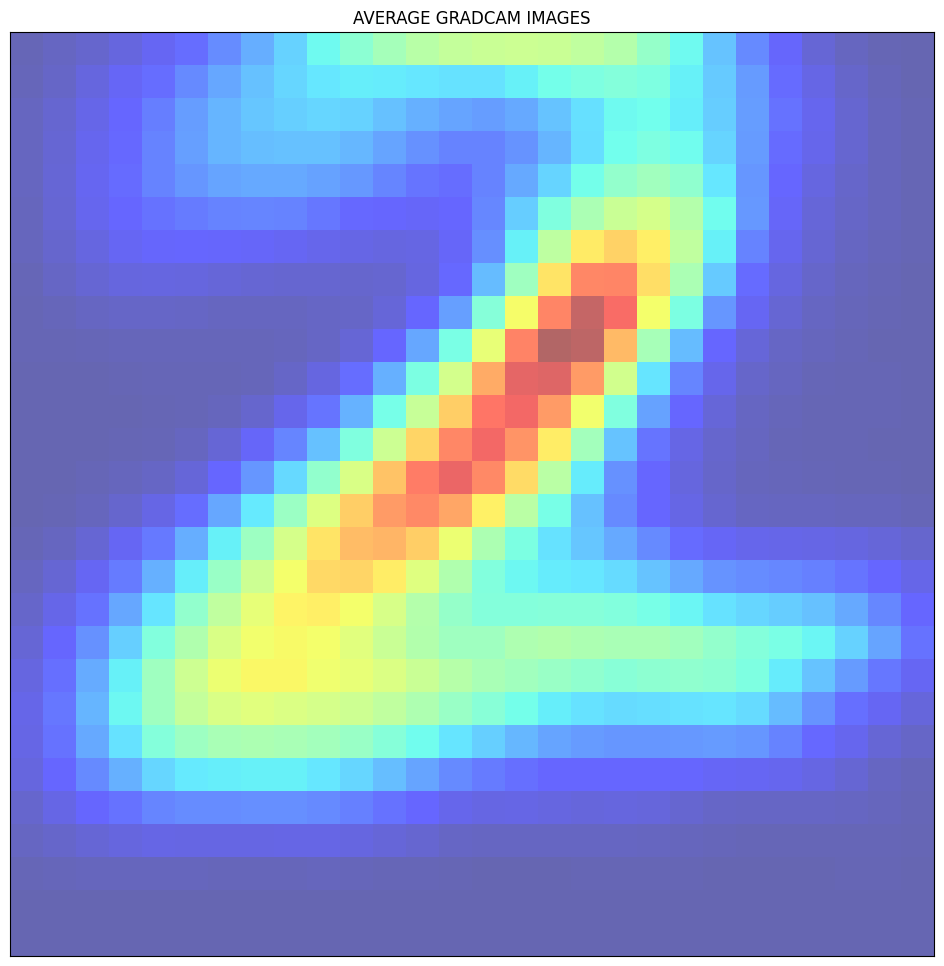

In [ ]:
print("Visualize Top Rule of Label 2 at dense_14:")
print("Highlight Pixels that impact the rule:")

fngprnt = (fingerprints14[0] > 0.0).astype('int')
visualize(rule_neurons_list2,rule_sig_list2,fngprnt, "dense_14", SUMMARY=True)

Visualize Top Rule of Label 7 at dense_15:
Highlight Pixels that impact the rule:
[0, 1, 7, 9, 4, 3, 5]
[0, 1, 1, 1, 0, 0, 1]
(60000, 10)
[0 0 0 1 0 1 0 0 0 0]
92


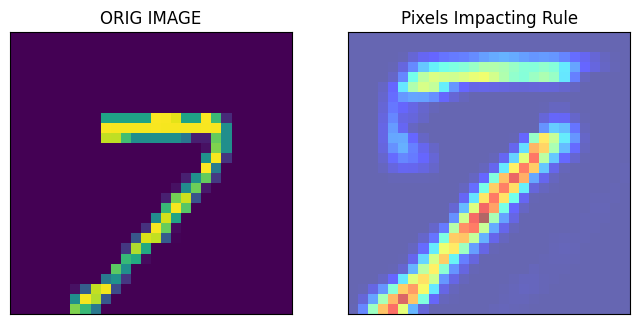

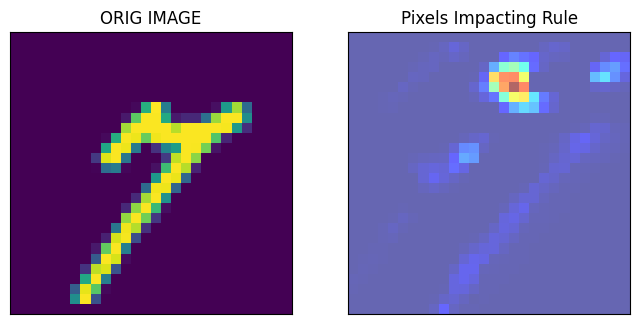

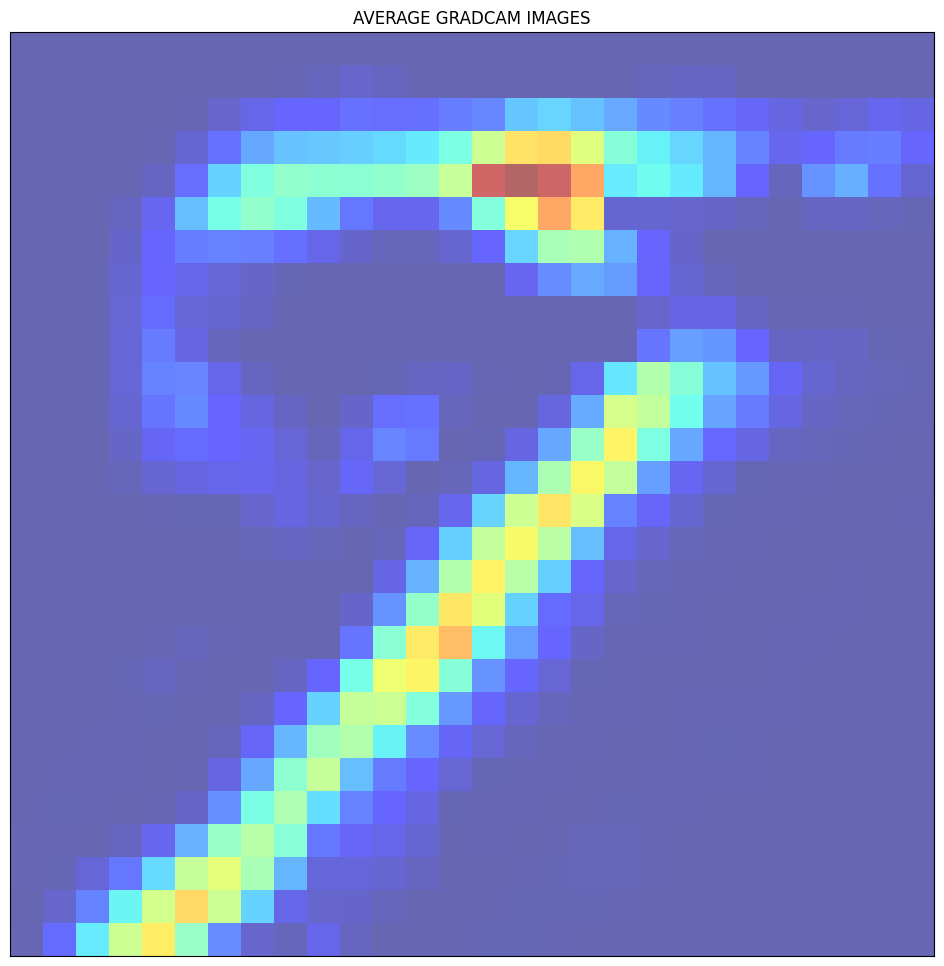

In [ ]:
print("Visualize Top Rule of Label 7 at dense_15:")
print("Highlight Pixels that impact the rule:")

fngprnt = (fingerprints15[0] > 0.0).astype('int')
visualize(rule_neurons_list7,rule_sig_list7,fngprnt, "dense_15", SUMMARY=True)

Visualize Top Rule of Label 8 at dense_15:
Highlight Pixels that impact the rule:
[0, 1, 7, 2, 4, 5, 8]
[0, 1, 0, 1, 0, 1, 1]
(60000, 10)
[0 0 0 1 0 1 0 0 0 0]
2


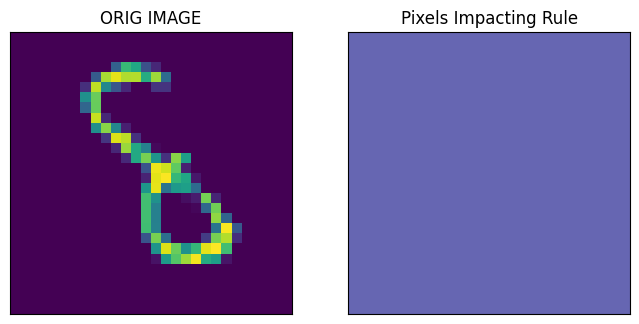

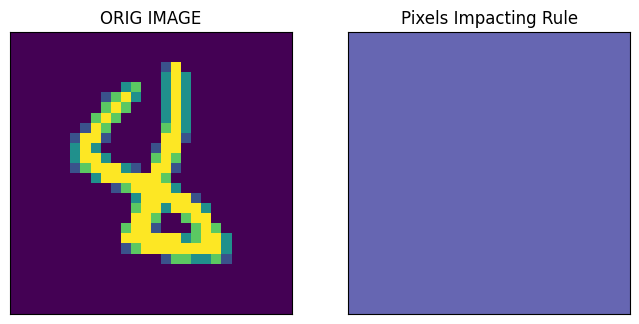

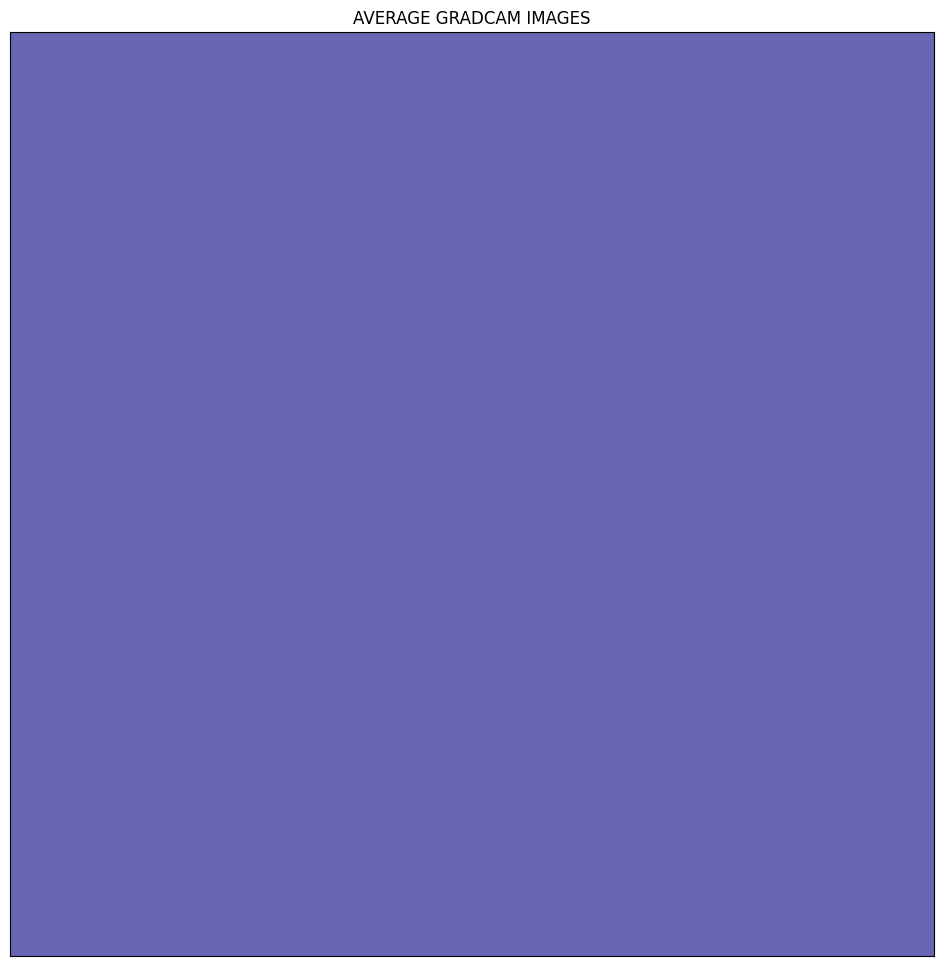

In [ ]:
print("Visualize Top Rule of Label 8 at dense_15:")
print("Highlight Pixels that impact the rule:")

fngprnt = (fingerprints15[0] > 0.0).astype('int')
visualize(rule_neurons_list8,rule_sig_list8,fngprnt, "dense_15", SUMMARY=True)